In [1]:
# Nieset - Final Project GGIS 407 March 16, 2025

In [ ]:
#Title: Refining and analyzing wetland field data in support of state wetland mapping in Illinois

In [2]:
# Please refer to the Project Report and Project Powerpoint presentation for more background details about this project although a summary is below: 

In [101]:
print (' Summary : This project looks at INHS wetlands dataset of delineated wetlands from 1987 - present. In addition to information in spatial wetland and project boundary dataset, basic info about 5 wetland types are compiled')

 Summary : This project is looking at INHS wetlands dataset of delineated wetlands from 1987 - present. In addition to information in spatial wetland and project boundary dataset, basic info about 5 wetland types are compiled


In [ ]:
#Section 1: Read and become familiar with the INHS Wetland dataset in Jupyter Notebook

In [6]:
# The first portion is to read the datasets. Due to the scale (totality of state of Illinois) the visuals don't show well, but there is a close up of some data in Section 3

In [ ]:
#Thus, importing fiona as well as pandas, geopandas, matplotlib

In [38]:
# import required libraries

%matplotlib inline
import os
import fiona
# pretty printing - makes some kinds of text output easier to read
import pprint
import IPython
from matplotlib import pyplot as plt

import pandas as pd
import geopandas as gpd


In [ ]:
#This is the wetlands shapefile of INHS file data locations. This includes the wetlands delineated throughout the state of Illinois.

In [39]:
input_file = 'Project/wetland_jun.shp'
if os.path.exists(input_file):
    print('Input file:', input_file)
else:
    print('Please download the tutorial data or fix the path!')

Input file: Project/wetland_jun.shp


In [40]:
with fiona.open(input_file) as src:
    #Schema
    print("Schema of the shapefile fields: ")
    pprint.pprint(src.schema)
    print()
    #Get first record
    #record = src.next()
    record = next(iter(src))
    print("Values of the first record: ")
    pprint.pprint(record['properties'])

Schema of the shapefile fields: 
{'geometry': '3D Polygon',
 'properties': OrderedDict([('Seq_Num', 'str:20'),
                            ('PID', 'int:5'),
                            ('Site', 'int:5'),
                            ('Site_New', 'str:15'),
                            ('SiteID', 'str:25'),
                            ('GlobalID', 'str:38'),
                            ('created_us', 'str:254'),
                            ('created_da', 'date'),
                            ('last_edite', 'str:254'),
                            ('last_edi_1', 'date'),
                            ('acre', 'float:8.5')])}

Values of the first record: 
OrderedDict([('Seq_Num', '15162'),
             ('PID', 1760),
             ('Site', 14),
             ('Site_New', '14'),
             ('SiteID', '1760-14'),
             ('GlobalID', '{17EA7108-98AD-4D7E-AFDD-0000BE01D410}'),
             ('created_us', None),
             ('created_da', None),
             ('last_edite', None),
            

In [ ]:
#The organization of this date includes 'Seq_Num' or Sequence Number given by the state agency assigning the project boundary to be evaluated.

In [ ]:
#PID is the internal number we utlize per project. Site is the wetland or area evaluated within a project boundary. These are assigned Site numbers that are connected to PID

In [ ]:
#For example if the first site evaluated at a project with PID 1529 was a forested wetland, that forested wetland would be tagged 1529-1

In [ ]:
#A global ID was created since sometimes there is more than one polygon GPS'd for one site, with different acreage and thus need a separator since ultimately can't have two 1529-1 when sorting even if there were 2 polygons. 

In [ ]:
#Acres are the size of the polygon of the wetland delineated

In [ ]:
# Note I opened data with fiona, but there are a lot of records so didn't want it was part of the homework due to length, but I utilized a clip of the table for the presentation. There are over 14K records I was a bit worried about size capacity as it was 56MB but handled ok

In [41]:
wet_gpd = gpd.read_file(os.path.join('Project/wetland_jun.shp'))



wet_table = pd.DataFrame(wet_gpd)

<Axes: >

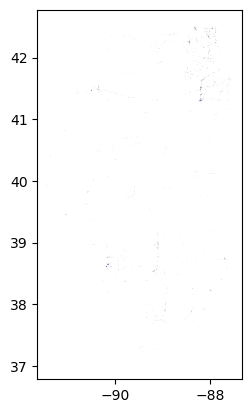

In [39]:
wet_gpd.plot()

In [ ]:
#ok - so the visuals of this isn't going to pop out like in ArcPRO but I see them, recall that a lot of the wetlands are small and the scale of this is statewide. 

<Axes: >

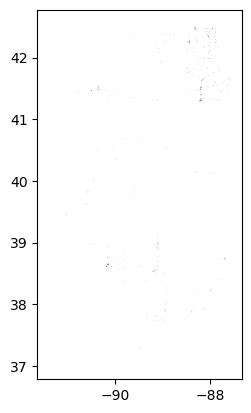

In [15]:
wet_gpd.plot(column='acre')

<Axes: >

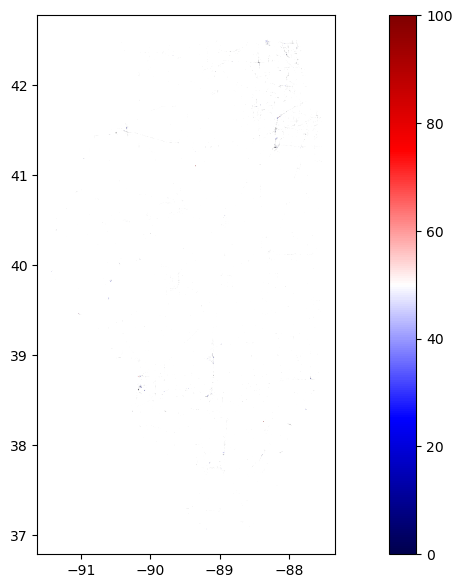

In [43]:
wet_gpd.plot(figsize=(14, 7), column='acre', 
           cmap='seismic',legend='true')

<Axes: >

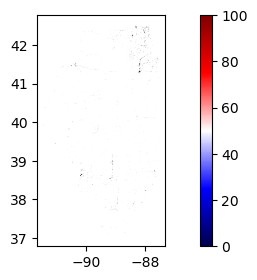

In [16]:
wet_gpd.plot(figsize=(9, 3), column='acre', 
           cmap='seismic',legend='true')

In [ ]:
# ok, for my project it is important for me to analyze the whole of the statewide data. However, I see that it doesn't provide a "popping" visual, It is due to the scale. 

In [ ]:
#I wanted to see what it would look like (very small wetlands in a large area). 

In [ ]:
#Note that there are clips of the overall map in the Powerpoint presentation that gives an ArcPro map that shows the visuals well. 

In [ ]:
#Section 2: Bring in the csv files for 1) Forested wetlands 2) Wet meadows 3) Wetland ponds 4) Marsh and 5) Wet shrubland and find out information about them.

In [ ]:
#The csv files were exported from shapefile attribute table in ArcPro

In [ ]:
#Starting with Forested Wetland data:

In [42]:
input_file2 = 'Project/ForestedWetland.csv'
if os.path.exists(input_file):
    print('Input file:', input_file)
else:
    print('Please download the tutorial data or fix the path!')

Input file: Project/wetland_jun.shp


In [43]:
with fiona.open(input_file2) as src:
    #Schema
    print("Schema of the shapefile fields: ")
    pprint.pprint(src.schema)
    print()
    #Get first record
    #record = src.next()
    record = next(iter(src))
    print("Values of the first record: ")
    pprint.pprint(record['properties'])

Schema of the shapefile fields: 
{'geometry': 'None',
 'properties': OrderedDict([('PID', 'str'),
                            ('Site_ID', 'str'),
                            ('Proj_County', 'str'),
                            ('Centroid_Lat', 'str'),
                            ('Centroid_Long', 'str'),
                            ('FieldWkDone', 'str'),
                            ('Site_Year', 'str'),
                            ('Applicant_Owner', 'str'),
                            ('Type_of_Report', 'str'),
                            ('Site_num', 'str'),
                            ('WetLand', 'str'),
                            ('CommunityType', 'str'),
                            ('NWI_Code', 'str'),
                            ('SiteArea', 'str'),
                            ('Site_Area', 'str'),
                            ('Area_in_Project', 'str'),
                            ('WatersType', 'str'),
                            ('CC_report', 'str'),
                          

In [ ]:
#So this is showing us that this first record was of a Forested wetland (in this case it was called community type as Forested depression). I do see a potential problem in that all the schema are listed as 'str'

In [ ]:
#The fieldwork was done August 6, 2009 in Cook County, Illinois. THe site area is 0.04 acres. The FQI value was 12.3. 

In [ ]:
#There would be a corrsponding species list for this record (it was not practical to input with this record set for this class project)

In [ ]:
#Using fiona to show the table and the features available. I won't show this kind of table for the rest of the community types but wanted to do so for one. 

In [ ]:
#Am not going to create a map of this data here either as these are mostly small wetlands, the geographical area is of Illinois so the data won't show up well at this scale here. 

In [44]:
with fiona.open(input_file2) as src:
    # make header row out of field names
    values="|"
    for field in src.schema['properties']:
        values += field
        values += "|"
    values += '\n|'
    # separates header row
    for i in range(len(src.schema['properties'])):
        values += "---|"
    values += "\n"
    # rows for each record
    for record in src:
        values += "|"
        for field in record['properties']:
            values += str(record['properties'][field])
            values += '|'
        values += '\n'
    print("\nProperties presented as table: ")
    IPython.display.display_markdown(values, raw=True)


Properties presented as table: 


|PID|Site_ID|Proj_County|Centroid_Lat|Centroid_Long|FieldWkDone|Site_Year|Applicant_Owner|Type_of_Report|Site_num|WetLand|CommunityType|NWI_Code|SiteArea|Site_Area|Area_in_Project|WatersType|CC_report|FQI_report|Acronym|PSID|Dom_tree|Dom_Shrub|Dom_Herb|Dom_vine|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|1549|1549-17|Cook|41.49757|-87.64716|8/6/2009|2009|IDOT District 1|Wetland Delineation|17|Yes|Forested depression|U (upland)|0.04|0.04|0|NULL|3.3|12.3|ANTVIR|Antenoron virginianum|0|0|1|0|
|1549|1549-14|Cook|41.49866|-87.65142|8/6/2009|2009|IDOT District 1|Wetland Delineation|14|Yes|Forested depression|U (upland)|0.01|0.01|0|NULL|3|9.9|RHACAT|Rhamnus cathartica|0|1|0|0|
|1549|1549-18|Cook|41.4968|-87.64737|8/6/2009|2009|IDOT District 1|Wetland Delineation|18|Yes|Forested depression|U (upland)|0.14|0.14|0|NULL|3.3|14.2|QUEMAC|Quercus macrocarpa|1|0|0|0|
|1549|1549-9|Cook|41.51717|-87.63243|8/6/2009|2009|IDOT District 1|Wetland Delineation|9|Yes|Forested depression|U (upland)|0.03|0.03|0|NULL|2.9|10.5|RHACAT|Rhamnus cathartica|0|1|0|0|
|1688|1688-1|Lake|42.20042|-87.88086|3/23/2010|2010|IDOT District 1|Wetland Delineation|1|Yes|Forested depression|U (upland)|0.05|0.05|0.02|ISOLATE|2.8|8.3|RHACAT|Rhamnus cathartica|0|1|0|0|
|1896|1896-6|Champaign and Vermilion|40.11286|-88.01212|7/30/2009|2009|IDOT District 5|Wetland Delineation|6|Yes|Forested depression|U (upland)|NULL|NULL|0.12|NULL|2|8.5|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1896|1896-15|Champaign and Vermilion|40.11388|-87.83986|7/30/2009|2009|IDOT District 5|Wetland Delineation|15|Yes|Forested depression|U (upland)|NULL|NULL|0.06|NULL|2.6|11.6|BOECYL|Boehmeria cylindrica|0|0|1|0|
|2341|2341-37|Cook and DuPage|NULL|NULL|8/16/2010|2010|IDOT District 1|Wetland Delineation|37|Yes|Forested depression|U (upland)|0.3|0.3|0.28|ISOLATE|2.7|8|ACESAI|Acer saccharinum|1|1|1|0|
|1549|1549-11|Cook|41.51351|-87.63832|8/6/2009|2009|IDOT District 1|Wetland Delineation|11|Yes|Forested depressions|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.11|0.11|0.09|NULL|3.2|14.9|SANODO|Sanicula odorata|0|0|1|0|
|1549|1549-7|Cook|41.55006|-87.61764|8/6/2009|2009|IDOT District 1|Wetland Delineation|7|Yes|Forested depressions|U (upland)|0.16|0.16|0.01|NULL|3|12|QUEPAL|Quercus palustris|1|0|0|0|
|1493|1493-7|Cook|41.54869|-87.62681|6/20/2009|2009|IDOT District 1|Wetland Delineation|7|Yes|Forested wetland|U (upland)|0.51|0.51|0.05|NULL|1.1|3.2|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1423|1423-6|Lake|42.46488|-88.09124|6/24/2008|2008|IDOT District 1|Wetland Delineation|6|Yes|Forested wetland|U (upland)|1.15|1.15|0.15|ISOLATE|2.6|11.1|PHAARU|Phalaris arundinacea|0|0|1|0|
|1423|1423-9|Lake|42.45101|-88.09155|6/24/2008|2008|IDOT District 1|Wetland Delineation|9|Yes|Forested wetland|U (upland)|0.17|0.17|0.11|NULL|2.4|9.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|1423|1423-14|Lake|42.44141|-88.09076|6/24/2008|2008|IDOT District 1|Wetland Delineation|14|Yes|Forested wetland|U (upland)|0.77|0.77|0.14|NULL|2.8|8.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|1423|1423-11|Lake|42.45043|-88.09059|6/24/2008|2008|IDOT District 1|Wetland Delineation|11|Yes|Forested wetland|U (upland)|0.37|0.37|0.08|NULL|3.1|11.1|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1522|1522-1|McHenry|42.24598|-88.42182|5/12/2009|2009|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.2|0.2|0|NULL|4|8|RHACAT|Rhamnus cathartica|0|1|0|0|
|1549|1549-12|Cook|41.5114|-87.63987|8/6/2009|2009|IDOT District 1|Wetland Delineation|12|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.13|0.13|0.07|NULL|3.9|19.6|RHACAT|Rhamnus cathartica|0|1|0|0|
|1567|1567-5|Will|41.45525|-87.72617|5/6/2010|2010|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|U (upland)|NULL|NULL|0.2|NULL|2.8|12.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|1589|1589-2|Lake|42.42981|-88.11519|5/17/2010|2010|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.04|0.04|0.04|NULL|2.1|8|PHAARU|Phalaris arundinacea|0|0|1|0|
|1549|1549-4|Cook|41.55015|-87.61286|8/6/2009|2009|IDOT District 1|Wetland Delineation|4|Yes|Forested wetland|U (upland)|0.71|0.71|0.13|NULL|2.8|14.3|RANFIC|Ranunculus ficaria|0|0|1|0|
|1591|1591-23|Lake|42.44283|-87.87426|8/31/2009|2009|IDOT District 1|Wetland Delineation|23|Yes|Forested wetland|U (upland)|0.08|0.08|0.08|ISOLATE|1.7|5|TYPANG|Typha angustifolia|0|0|1|0|
|1591|1591-25|Lake|42.44205|-87.87561|8/31/2009|2009|IDOT District 1|Wetland Delineation|25|Yes|Forested wetland|U (upland)|1.71|1.71|1.4|ISOLATE|2.6|12.2|ACESAI|Acer saccharinum|1|1|0|0|
|1607|1607-24|Lake|42.19891|-88.00941|9/2/2010|2010|IDOT District 1|Wetland Delineation|24|Yes|Forested wetland|U (upland)|0.06|0.06|0.03|NULL|2.7|9.2|RHACAT|Rhamnus cathartica|0|1|0|0|
|1609|1609-30|McHenry|42.24559|-88.42503|8/6/2009|2009|IDOT District 1|Wetland Delineation|30|Yes|Forested wetland|U (upland)|0.33|0.33|0.33|NULL|2.3|8.6|SALNIG|Salix nigra|1|0|0|0|
|1609|1609-25|McHenry|42.23823|-88.42212|8/6/2009|2009|IDOT District 1|Wetland Delineation|25|Yes|Forested wetland|U (upland)|0.93|0.93|0.66|NULL|2.1|9.8|PHRAUS|Phragmites australis|0|0|1|0|
|1609|1609-28|McHenry|42.24598|-88.42182|8/6/2009|2009|IDOT District 1|Wetland Delineation|28|Yes|Forested wetland|U (upland)|0.17|0.17|0.12|ISOLATE|4|8|ULMAME|Ulmus americana|1|0|0|0|
|1563|1563-19|Lake|NULL|NULL|8/19/2009|2009|IDOT District 1|Wetland Delineation|19|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|0.17|0.17|0.17|NULL|2.3|5.7|RHACAT|Rhamnus cathartica|0|1|0|0|
|1545|1545-1|Crawford|39.01699|-87.79636|9/24/2009|2009|IDOT District 7|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.09|0.09|0.08|NULL|3.7|13.3|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1549|1549-16|Cook|41.4943|-87.65551|8/6/2009|2009|IDOT District 1|Wetland Delineation|16|Yes|Forested wetland|U (upland)|0.34|0.34|0|NULL|3.4|19.5|POPDEL|Populus deltoides|1|0|0|0|
|1617|1617-2317-1|Cook|NULL|NULL|6/5/2017|2017|IDOT District 1|Do not change this!|2317-1|Yes|Forested wetland|U (upland)|0.02|0.02|NULL|NRPWW|2.6|7.4|GLETRI|Gleditsia triacanthos|1|0|0|0|
|1549|1549-5|Cook|41.54986|-87.61411|8/6/2009|2009|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|U (upland)|NULL|NULL|0.06|NULL|3.3|13.6|QUEMAC|Quercus macrocarpa|1|0|0|0|
|1556|1556-3|Crawford|39.01227|-87.6853|11/10/2009|2009|IDOT District 7|Wetland Delineation|3|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.17|0.17|0.03|NULL|2.3|7|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1566|1566-22|Lake|42.47835|-87.94637|9/9/2009|2009|IDOT District 1|Wetland Delineation|22|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.12|0.12|0.12|NULL|3|6|PHAARU|Phalaris arundinacea|0|0|1|0|
|1560|1560-7|St. Clair|38.55507|-90.01102|9/28/2009|2009|IDOT District 8|Wetland Delineation|7|Yes|Forested wetland|U (upland)|0.08|0.08|0|NULL|2|11|PILPUM|Pilea pumila|0|0|1|0|
|1585|1585-4|Cook|41.59304|-87.61151|5/12/2010|2010|IDOT District 1|Wetland Delineation|4|Yes|Forested wetland|U (upland)|0.43|0.43|0.43|NULL|3|15.5|POPDEL|Populus deltoides|1|0|0|0|
|1591|1591-18|Lake|42.44935|-87.87795|8/31/2009|2009|IDOT District 1|Wetland Delineation|18|Yes|Forested wetland|U (upland)|0.28|0.28|0.28|ISOLATE|2.1|8.9|ACENEG|Acer negundo|1|1|0|0|
|1591|1591-36|Lake|42.43588|-87.87487|8/31/2009|2009|IDOT District 1|Wetland Delineation|36|Yes|Forested wetland|U (upland)|0.08|0.08|0.08|ISOLATE|1|2.2|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1649|1649-112|McHenry|42.45283|-88.29797|10/11/2011|2011|IDOT District 1|Wetland Delineation|112|Yes|Forested wetland|U (upland)|0.02|0.02|0.02|ISOLATE|1.8|3.5|ACESAI|Acer saccharinum|1|0|1|0|
|1649|1649-115|McHenry|42.45258|-88.29267|10/11/2011|2011|IDOT District 1|Wetland Delineation|115|Yes|Forested wetland|U (upland)|0.11|0.11|0.11|ISOLATE|1.4|4.3|ACENEG|Acer negundo|1|0|0|0|
|1649|1649-65|McHenry|42.47509|-88.30144|10/11/2011|2011|IDOT District 1|Wetland Delineation|65|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), PEMC (seasonally flooded, emergent, palustrine wetland)|3.07|3.07|3.07|RPWWD|3.2|14|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1567|1567-6|Will|41.45761|-87.72498|5/6/2010|2010|IDOT District 1|Wetland Delineation|6|Yes|Forested wetland|U (upland)|0.04|0.04|0.04|NULL|1.8|5.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|1651|1651-463|Fayette, Shelby, Marion, Clinton and Washington|38.95667|-89.1822|8/31/2011|2011|IDOT District 7|Wetland Delineation|463|Yes|Forested wetland|PUBGh, U|0.31|0.31|0.31|NULL|2.9|14.6|ACESAI|Acer saccharinum|1|0|0|0|
|1570|1570-15|Lake|42.3752|-88.06157|8/31/2009|2009|IDOT District 1|Wetland Delineation|15|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|0.06|NULL|2.2|4.9|ACESAI|Acer saccharinum|1|1|0|0|
|1591|1591-33|Lake|42.43903|-87.87584|8/31/2009|2009|IDOT District 1|Wetland Delineation|33|Yes|Forested wetland|U (upland)|0.24|0.24|0.24|ISOLATE|3|17|PHAARU|Phalaris arundinacea|0|0|1|0|
|1607|1607-10|Lake|42.19692|-88.03574|9/2/2010|2010|IDOT District 1|Wetland Delineation|10|Yes|Forested wetland|U (upland)|0.66|0.66|0.66|ISOLATE|1.9|8|PHAARU|Phalaris arundinacea|0|0|1|0|
|1591|1591-49|Lake|42.41116|-87.8786|8/31/2009|2009|IDOT District 1|Wetland Delineation|49|Yes|Forested wetland|U (upland)|0.19|0.19|0.19|ISOLATE|1.4|3.9|RHACAT|Rhamnus cathartica|0|1|0|0|
|1566|1566-41|Lake|42.47151|-87.94653|9/9/2009|2009|IDOT District 1|Wetland Delineation|41|Yes|Forested wetland|U (upland)|NULL|NULL|0.44|NULL|2.2|7.5|ACENEG|Acer negundo|1|1|0|0|
|1570|1570-13|Lake|42.3768|-88.06216|8/31/2009|2009|IDOT District 1|Wetland Delineation|13|Yes|Forested wetland|U (upland)|NULL|NULL|0.08|NULL|1|1.7|RHACAT|Rhamnus cathartica|0|1|0|0|
|1651|1651-437|Fayette, Shelby, Marion, Clinton and Washington|39.06624|-89.11161|8/31/2011|2011|IDOT District 7|Wetland Delineation|437|Yes|Forested wetland|U (upland)|0.16|0.16|0.16|NULL|3.3|18.1|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|1651|1651-516|Fayette, Shelby, Marion, Clinton and Washington|38.53536|-89.17314|8/31/2011|2011|IDOT District 7|Wetland Delineation|516|Yes|Forested wetland|PFO1A, U|2.89|2.89|2.89|NULL|3.3|22.7|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1591|1591-27|Lake|42.45137|-87.8724|8/31/2009|2009|IDOT District 1|Wetland Delineation|27|Yes|Forested wetland|U (upland)|0.1|0.1|0.1|ISOLATE|2|6.3|SALEXI|Salix interior|0|1|0|0|
|1607|1607-25|Lake|42.19708|-88.00716|9/2/2010|2010|IDOT District 1|Wetland Delineation|25|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|ISOLATE|3.5|14.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|1651|1651-483|Fayette, Shelby, Marion, Clinton and Washington|38.9413|-89.13652|8/31/2011|2011|IDOT District 7|Wetland Delineation|483|Yes|Forested wetland|PFO1A, U|2.86|2.86|2.86|NULL|3|17.1|LEEVIR|Leersia virginica|0|0|1|0|
|1651|1651-524|Fayette, Shelby, Marion, Clinton and Washington|38.48368|-89.14729|8/31/2011|2011|IDOT District 7|Wetland Delineation|524|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.28|0.28|0.28|NULL|2.7|13.6|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|1640|1640-3|Will|41.30396|-88.18752|6/17/2010|2010|IDOT District 1|Wetland Delineation|3|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|3.73|3.73|0.84|ISOLATE|3.2|13.7|POPDEL|Populus deltoides|1|0|0|0|
|1607|1607-8|Lake|42.19684|-88.04085|9/2/2010|2010|IDOT District 1|Wetland Delineation|8|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|1.54|1.54|1.54|NULL|2.9|11.8|POPDEL|Populus deltoides|1|0|0|0|
|1595|1595-2|DuPage|41.93004|-88.06241|5/18/2010|2010|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.22|0.22|0.17|NULL|1.6|4.7|RHACAT|Rhamnus cathartica|0|1|0|0|
|1607|1607-26|Lake|42.19751|-88.00576|9/2/2010|2010|IDOT District 1|Wetland Delineation|26|Yes|Forested wetland|PEMA (temporarily flooded, emergent, palustrine wetland)|1.33|1.33|1.24|NULL|3.7|23.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|1607|1607-30|Lake|42.19742|-88.00042|9/2/2010|2010|IDOT District 1|Wetland Delineation|30|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|0.05|0.05|0.05|ISOLATE|2.5|7.1|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1607|1607-9|Lake|42.19678|-88.03991|9/2/2010|2010|IDOT District 1|Wetland Delineation|9|Yes|Forested wetland|U (upland)|1.78|1.78|1.78|NULL|2.1|7.5|RHACAT|Rhamnus cathartica|0|1|0|0|
|1585|1585-1|Cook|41.59148|-87.61262|5/12/2010|2010|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.3|0.3|0.3|NULL|2.7|11.5|PARQUI|Parthenocissus quinquefolia|0|0|1|0|
|1591|1591-11|Lake|42.46933|-87.88344|8/31/2009|2009|IDOT District 1|Wetland Delineation|11|Yes|Forested wetland|U (upland)|0.04|0.04|NULL|ISOLATE|1.4|4.4|ACESAI|Acer saccharinum|1|1|0|0|
|1591|1591-15|Lake|42.45787|-87.87919|8/31/2009|2009|IDOT District 1|Wetland Delineation|15|Yes|Forested wetland|U (upland)|0.03|0.03|0.03|ISOLATE|1.8|3.5|ACESAI|Acer saccharinum|1|0|0|0|
|1591|1591-42|Lake|42.42532|-87.87666|8/31/2009|2009|IDOT District 1|Wetland Delineation|42|Yes|Forested wetland|U (upland)|0.15|0.15|0.15|ISOLATE|3.1|13.2|ULMAME|Ulmus americana|0|1|0|0|
|1594|1594-1|Cook|41.63955|-87.66795|5/11/2010|2010|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.01|NULL|2.8|10.4|RHACAT|Rhamnus cathartica|0|1|0|0|
|1640|1640-1|Will|41.3039|-88.19207|6/17/2010|2010|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.22|0.22|0.05|ISOLATE|3|14.1|ULMAME|Ulmus americana|0|1|0|0|
|1609|1609-27|McHenry|42.24609|-88.42097|8/6/2009|2009|IDOT District 1|Wetland Delineation|27|Yes|Forested wetland|U (upland)|0.09|0.09|0.03|ISOLATE|3.3|12.3|TYPANG|Typha angustifolia|0|0|1|0|
|1653|1653-5|Lake|42.47148|-87.94656|8/8/2011|2011|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|U (upland)|NULL|NULL|0.35|RPWWD|2.1|7.5|ACENEG|Acer negundo|0|1|0|0|
|1607|1607-20|Lake|42.20021|-88.02117|9/2/2010|2010|IDOT District 1|Wetland Delineation|20|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|0.04|NULL|3.5|15.4|ACESAI|Acer saccharinum|1|0|0|0|
|1607|1607-35|Lake|42.19696|-87.99249|9/2/2010|2010|IDOT District 1|Wetland Delineation|35|Yes|Forested wetland|U (upland)|0.25|0.25|0.11|ISOLATE|1.1|3.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|1649|1649-88|McHenry|42.46751|-88.29771|10/11/2011|2011|IDOT District 1|Wetland Delineation|88|Yes|Forested wetland|U (upland)|0.05|0.05|0.05|RPWWN|1.3|3.3|ACENEG|Acer negundo|1|1|0|0|
|1651|1651-467|Fayette, Shelby, Marion, Clinton and Washington|38.95643|-89.17384|8/31/2011|2011|IDOT District 7|Wetland Delineation|467|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|3.54|3.54|3.54|NULL|3.1|20.6|TOXRAD|Toxicodendron radicans|0|1|1|0|
|1649|1649-14|McHenry|42.43778|-88.28585|10/11/2011|2011|IDOT District 1|Wetland Delineation|14|Yes|Forested wetland|U (upland)|0.23|0.23|0.23|RPWWD|3.1|9.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|1591|1591-17|Lake|42.4544|-87.8796|8/31/2009|2009|IDOT District 1|Wetland Delineation|17|Yes|Forested wetland|U (upland)|0.11|0.11|0.11|ISOLATE|2.5|8.4|RHACAT|Rhamnus cathartica|0|0|1|0|
|1591|1591-39|Lake|42.43102|-87.87544|8/31/2009|2009|IDOT District 1|Wetland Delineation|39|Yes|Forested wetland|U (upland)|0.93|0.93|0.46|ISOLATE|3.3|21.9|TYPANG|Typha angustifolia|0|0|1|0|
|1591|1591-52|Lake|42.40301|-87.87998|8/31/2009|2009|IDOT District 1|Wetland Delineation|52|Yes|Forested wetland|U (upland)|0.15|0.15|0.13|NRPWW|2.1|6|RHACAT|Rhamnus cathartica|0|1|0|0|
|1649|1649-47|McHenry|42.48099|-88.27657|10/11/2011|2011|IDOT District 1|Wetland Delineation|47|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland), U (upland)|0.05|0.05|0.04|RPWWN|3.4|10.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|1649|1649-79|McHenry|42.47082|-88.29547|10/11/2011|2011|IDOT District 1|Wetland Delineation|79|Yes|Forested wetland|PEM/SS1C (seasonally flooded, emergent and broad-leaved deciduous, scrub-shrub, palustrine wetland)|1.09|1.09|1.09|RPWWN|2.1|6.3|CORRAC|Cornus racemosa|0|1|0|0|
|1607|1607-28|Lake|42.19709|-88.00491|9/2/2010|2010|IDOT District 1|Wetland Delineation|28|Yes|Forested wetland|U (upland)|NULL|NULL|0.73|NULL|3.6|26.6|IMPCAP|Impatiens capensis|0|0|1|0|
|1617|1617-26|Cook|NULL|NULL|6/5/2017|2017|IDOT District 1|Do not change this!|26|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|NULL|NULL|2|6|AMPCOR|Ampelopsis cordata|0|0|0|1|
|1651|1651-434|Fayette, Shelby, Marion, Clinton and Washington|39.06948|-89.10865|8/31/2011|2011|IDOT District 7|Wetland Delineation|434|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.34|0.34|0.25|NULL|3|16.2|POPDEL|Populus deltoides|1|0|0|0|
|1651|1651-480|Fayette, Shelby, Marion, Clinton and Washington|38.94271|-89.15708|8/31/2011|2011|IDOT District 7|Wetland Delineation|480|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.13|0.13|0.13|NULL|3|13.7|CELOCC|Celtis occidentalis|1|0|0|0|
|1649|1649-24|McHenry|42.44539|-88.27963|10/11/2011|2011|IDOT District 1|Wetland Delineation|24|Yes|Forested wetland|U (upland)|0.18|0.18|0.18|NRPWW|2.6|8.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|1750|1750-22|McHenry|42.45194|-88.32128|6/25/2009|2009|IDOT District 1|Wetland Delineation|22|Yes|Forested wetland|PSSCd, PFO1Cd|0.46|0.46|0.16|NULL|3|11.6|RHACAT|Rhamnus cathartica|0|1|0|0|
|1750|1750-45|McHenry|42.49404|-88.30683|6/25/2009|2009|IDOT District 1|Wetland Delineation|45|Yes|Forested wetland|U (upland)|0.37|0.37|0.37|NULL|2.6|11.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|1609|1609-9|McHenry|42.19737|-88.42223|8/6/2009|2009|IDOT District 1|Wetland Delineation|9|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.44|NULL|2.6|10.9|SALFRA|Salix x fragilis|1|0|0|0|
|1651|1651-521|Fayette, Shelby, Marion, Clinton and Washington|38.4848|-89.14872|8/31/2011|2011|IDOT District 7|Wetland Delineation|521|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.29|0.29|0|NULL|3.3|13|CHALAT|Chasmanthium latifolium|0|0|1|0|
|1674|1674-10|Pulaski|37.28836|-88.98542|10/28/2011|2011|IDOT District 9|Wetland Delineation|10|Yes|Forested wetland|U (upland)|0.19|0.19|0.19|NULL|3.9|16.2|QUEPAL|Quercus palustris|1|0|0|0|
|1674|1674-6|Pulaski|37.27287|-88.9992|10/28/2011|2011|IDOT District 9|Wetland Delineation|6|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.64|NULL|3.3|21.3|ACERUB|Acer rubrum|1|0|0|0|
|1651|1651-472|Fayette, Shelby, Marion, Clinton and Washington|38.95704|-89.16692|8/31/2011|2011|IDOT District 7|Wetland Delineation|472|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|1.74|1.74|1.74|NULL|3.3|18.5|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1651|1651-496|Fayette, Shelby, Marion, Clinton and Washington|38.62683|-89.11043|8/31/2011|2011|IDOT District 7|Wetland Delineation|496|Yes|Forested wetland|U (upland)|NULL|NULL|1.25|NULL|3|18.7|BIDFRO|Bidens frondosa|0|0|1|0|
|1674|1674-11|Pulaski|37.29044|-88.98275|10/28/2011|2011|IDOT District 9|Wetland Delineation|11|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.43|0.43|0.31|NULL|4|23.8|SAUCER|Saururus cernuus|0|0|1|0|
|1674|1674-9|Pulaski|37.28333|-88.99026|10/28/2011|2011|IDOT District 9|Wetland Delineation|9|Yes|Forested wetland|U (upland)|0.08|0.08|0.08|NULL|3.6|22.7|QUEPAL|Quercus palustris|1|0|0|0|
|1651|1651-511|Fayette, Shelby, Marion, Clinton and Washington|38.53534|-89.17652|8/31/2011|2011|IDOT District 7|Wetland Delineation|511|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|6.85|6.85|6.82|NULL|2.8|16.3|QUEPAL|Quercus palustris|1|0|0|0|
|1674|1674-2|Pulaski|37.25545|-89.0162|10/28/2011|2011|IDOT District 9|Wetland Delineation|2|Yes|Forested wetland|PUBGh (diked/impounded, intermittently exposed, unconsolidated bottom, palustrine wetland)|0.19|0.19|0.02|NULL|2.8|15|PERCES|Persicaria longiseta|0|0|1|0|
|1674|1674-7|Pulaski|37.27303|-88.99856|10/28/2011|2011|IDOT District 9|Wetland Delineation|7|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.54|0.54|0|NULL|3|18.2|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|1649|1649-67|McHenry|42.47382|-88.30501|10/11/2011|2011|IDOT District 1|Wetland Delineation|67|Yes|Forested wetland|U (upland)|0.16|0.16|0.16|ISOLATE|2.8|9.5|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1617|1617-49|Cook|42.41116|-87.8786|6/5/2017|2017|IDOT District 1|Do not change this!|49|Yes|Forested wetland|U (upland)|0.19|0.19|0.08|ISOLATE|1.4|3.9|RHACAT|Rhamnus cathartica|0|1|0|0|
|1649|1649-48|McHenry|42.47913|-88.28488|10/11/2011|2011|IDOT District 1|Wetland Delineation|48|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland), U (Upland)|0.48|0.48|0.48|NRPWW|2.8|13.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|1688|1688-10|Lake|42.20008|-87.83779|3/23/2010|2010|IDOT District 1|Wetland Delineation|10|Yes|Forested wetland|U (upland)|0.01|0.01|NULL|ISOLATE|2.6|8.2|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1688|1688-4|Lake|42.20039|-87.87593|3/23/2010|2010|IDOT District 1|Wetland Delineation|4|Yes|Forested wetland|U (upland)|0.19|0.19|0.11|ISOLATE|2.2|7.5|QUEBIC|Quercus bicolor|1|0|0|0|
|1689|1689-12|Kane and Kendall|41.67154|-88.44221|7/8/2011|2011|IDOT District 3|Wetland Delineation|12|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.14|0.14|0.11|NULL|2|4.9|IMPCAP|Impatiens capensis|0|0|1|0|
|1765|1765-10|Madison and St. Clair|38.64977|-89.92908|6/3/2010|2010|IDOT District 8|Wetland Delineation|10|Yes|Forested wetland|U (upland)|0.41|0.41|0.41|NULL|2.4|9.9|ACENEG|Acer negundo|1|0|0|0|
|1765|1765-2|Madison and St. Clair|38.62314|-89.92256|6/3/2010|2010|IDOT District 8|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.02|0.02|0.02|NULL|3.1|8.3|PLAOCC|Platanus occidentalis|1|0|0|0|
|1765|1765-18|Madison and St. Clair|38.71105|-89.92871|6/3/2010|2010|IDOT District 8|Wetland Delineation|18|Yes|Forested wetland|U (upland)|0.18|0.18|0.04|NULL|2.6|12|ULMAME|Ulmus americana|1|0|0|0|
|1651|1651-518|Fayette, Shelby, Marion, Clinton and Washington|38.52922|-89.17494|8/31/2011|2011|IDOT District 7|Wetland Delineation|518|Yes|Forested wetland|PUBGh (diked/impounded, intermittently exposed, unconsolidated bottom, palustrine wetland)|0.87|0.87|0.87|NULL|2.5|11|SALNIG|Salix nigra|1|0|0|0|
|1651|1651-522|Fayette, Shelby, Marion, Clinton and Washington|38.48397|-89.14874|8/31/2011|2011|IDOT District 7|Wetland Delineation|522|Yes|Forested wetland|U, PFO1A|0.61|0.61|0.48|NULL|2.7|14|ACESAI|Acer saccharinum|1|0|0|0|
|1649|1649-89|McHenry|42.46698|-88.29883|10/11/2011|2011|IDOT District 1|Wetland Delineation|89|Yes|Forested wetland|PFO/SS1C (seasonally flooded, broad-leaved deciduous, forested and scrub-shrub, palustrine wetland)|0.22|0.22|0.22|RPWWD|3.1|10.3|ACENEG|Acer negundo|1|1|0|0|
|1716|1716-2|Cook|41.9886|-87.76507|6/21/2011|2011|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.1|0.1|NULL|ISOLATE|2.4|6.4|RHACAT|Rhamnus cathartica|0|1|0|0|
|1727|1727-27|McHenry|42.24622|-88.42099|6/15/2011|2011|IDOT District 1|Wetland Delineation|27|Yes|Forested wetland|U (upland)|0.09|0.09|0.09|ISOLATE|3.7|17.5|FRALAN|Fraxinus lanceolata|1|1|0|0|
|1733|1733-7|Will|41.45097|-88.20202|10/4/2011|2011|IDOT District 1|Wetland Delineation|7|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|0.05|0.05|0.05|ISOLATE|2.3|7.3|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1765|1765-5|Madison and St. Clair|38.63764|-89.92897|6/3/2010|2010|IDOT District 8|Wetland Delineation|5|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|NULL|2.4|9.3|CAMRAD|Campsis radicans|0|1|0|0|
|1649|1649-92|McHenry|42.46476|-88.29955|10/11/2011|2011|IDOT District 1|Wetland Delineation|92|Yes|Forested wetland|PFO/SS1C (seasonally flooded, broad-leaved deciduous, forested  and scrub-shrub, palustrine wetland), U (upland)|0.35|0.35|0.35|RPWWD|2.1|5.7|ACENEG|Acer negundo|1|1|0|0|
|1651|1651-446/127|Fayette, Shelby, Marion, Clinton and Washington|38.9754|-89.09202|8/31/2011|2011|IDOT District 7|Wetland Delineation|446/127|Yes|Forested wetland|PFO1A, PFO1C, PSS1C, PSS1F, PEMC, PEMF, PUBGx, U|NULL|NULL|55|NULL|3.6|38.3|SALNIG|Salix nigra|1|1|0|0|
|1774|1774-50|Will|NULL|NULL|9/17/2010|2010|IDOT District 1|Wetland Delineation|50|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|3.73|3.73|2.41|ISOLATE|3.2|13.7|RHACAT|Rhamnus cathartica|0|1|0|0|
|1674|1674-3|Pulaski|37.26221|-89.00889|10/28/2011|2011|IDOT District 9|Wetland Delineation|3|Yes|Forested wetland|U (upland)|0.04|0.04|0.03|NULL|3.6|15.1|ACERUB|Acer rubrum|1|0|0|0|
|1843|1843-2a|Cook|41.64284|-87.6151|8/11/2010|2010|IDOT District 1|Wetland Delineation|2a|Yes|Forested wetland|U (upland)|0.01|NULL|NULL|ISOLATE|2.2|8|RIBAME|Ribes americanum|0|1|0|0|
|1674|1674-5|Pulaski|37.26513|-89.00521|10/28/2011|2011|IDOT District 9|Wetland Delineation|5|Yes|Forested wetland|U (upland)|0.04|0.04|0.04|NULL|3.2|10.1|ACERUB|Acer rubrum|1|0|0|0|
|1774|1774-27|Will|41.30955|-88.20875|9/17/2010|2010|IDOT District 1|Wetland Delineation|27|Yes|Forested wetland|U (upland)|0.08|0.08|0.08|ISOLATE|2.9|15.5|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1750|1750-63|McHenry|42.46485|-88.32779|6/25/2009|2009|IDOT District 1|Wetland Delineation|63|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|NULL|1.4|3.8|PILPUM|Pilea pumila|0|0|1|0|
|1718|1718-3|Lake|42.33753|-88.16888|6/28/2010|2010|IDOT District 1|Wetland Delineation|3|Yes|Forested wetland|U (upland)|0.01|0.01|0.01|ISOLATE|2.8|6.9|RHACAT|Rhamnus cathartica|0|1|1|0|
|1651|1651-509|Fayette, Shelby, Marion, Clinton and Washington|38.53491|-89.18337|8/31/2011|2011|IDOT District 7|Wetland Delineation|509|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|4.17|NULL|3.5|22.2|ULMAME|Ulmus americana|1|0|0|0|
|1727|1727-28|McHenry|42.24599|-88.42203|6/15/2011|2011|IDOT District 1|Wetland Delineation|28|Yes|Forested wetland|U (upland)|0.17|0.17|0.17|ISOLATE|3.1|12.6|PHAARU|Phalaris arundinacea|0|0|1|0|
|1848|1848-12|DuPage|41.93882|-87.983|9/29/2010|2010|IDOT District 1|Wetland Delineation|12|Yes|Forested wetland|U, PEMC|NULL|NULL|0.19|ISOLATE|2.9|12.5|SALNIG|Salix nigra|1|0|0|0|
|1750|1750-82|McHenry|42.47994|-88.31217|6/25/2009|2009|IDOT District 1|Wetland Delineation|82|Yes|Forested wetland|U (upland)|0.05|0.05|0.05|NULL|2.3|7.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|1855|1855-34|Lake|42.36157|-88.03795|9/4/2012|2012|IDOT District 1|Wetland Delineation|34|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|0.13|0.13|0.13|RPWWN|2.5|7.1|ULMAME|Ulmus americana|1|0|0|0|
|1750|1750-1|McHenry|42.45162|-88.29951|6/25/2009|2009|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|PFO1C, PSS1C|3.92|3.92|3.92|NULL|3|18.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|1662|1662-1|Macoupin|39.43527|-89.86352|10/13/2011|2011|IDOT District 6|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.01|0.01|0.01|NULL|3|9.9|SALNIG|Salix nigra|1|1|0|0|
|1865|1865-8|Cook|41.58302|-87.64574|9/5/2012|2012|IDOT District 1|Wetland Delineation|8|Yes|Forested wetland|U (upland)|NULL|NULL|0.06|RPWWD|3.2|11|CXPELL|Carex pellita|0|0|1|0|
|1765|1765-13|Madison and St. Clair|38.65779|-89.92923|6/3/2010|2010|IDOT District 8|Wetland Delineation|13|Yes|Forested wetland|U (upland)|0.75|0.75|0.75|NULL|2.6|10.8|ACESAI|Acer saccharinum|1|0|0|0|
|1750|1750-50|McHenry|42.49883|-88.31139|6/25/2009|2009|IDOT District 1|Wetland Delineation|50|Yes|Forested wetland|PFO1/PEMBg|1.22|1.22|1.22|NULL|3.5|21.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|1765|1765-19|Madison and St. Clair|38.71134|-89.92835|6/3/2010|2010|IDOT District 8|Wetland Delineation|19|Yes|Forested wetland|U (upland)|0.03|0.03|0.03|NULL|2|7.7|PHRAU*|Phragmites australis|0|0|1|0|
|1773|1773-10|Lake|42.28894|-87.87518|11/15/2011|2011|IDOT District 1|Wetland Delineation|10|Yes|Forested wetland|U (upland)|0.13|0.13|0.13|ISOLATE|3.1|8.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|1774|1774-31|Will|41.30776|-88.20648|9/17/2010|2010|IDOT District 1|Wetland Delineation|31|Yes|Forested wetland|U (upland)|0.1|0.1|0.1|ISOLATE|2.5|9.2|CXPELL|Carex pellita|0|0|1|0|
|1865|1865-3|Cook|41.59485|-87.6463|9/5/2012|2012|IDOT District 1|Wetland Delineation|3|Yes|Forested wetland|U (upland)|0.12|0.12|0|ISOLATE|2|7.2|SALALB|Salix alba|1|0|0|0|
|1674|1674-8|Pulaski|37.28206|-88.99133|10/28/2011|2011|IDOT District 9|Wetland Delineation|8|Yes|Forested wetland|U (upland)|0.42|0.42|0.42|NULL|3.9|22.8|CELLAE|Celtis laevigata|1|1|0|0|
|1773|1773-4|Lake|42.28932|-87.87409|11/15/2011|2011|IDOT District 1|Wetland Delineation|4|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.18|0.18|0.18|ISOLATE|4.2|15.8|CXLUPN|Carex lupulina|0|0|1|0|
|1774|1774-17|Will|41.32412|-88.18665|9/17/2010|2010|IDOT District 1|Wetland Delineation|17|Yes|Forested wetland|U (upland)|0.52|0.52|0.52|ISOLATE|3.5|15.1|ULMAME|Ulmus americana|1|0|0|0|
|1904|1904-192|Will|41.33455|-88.13683|4/4/2013|2013|IDOT District 1|Wetland Delineation|192|Yes|Forested wetland|U (upland)|0.08|0.08|0.08|RPWWD|1.6|5.4|FRALAN|Fraxinus lanceolata|0|1|0|0|
|1904|1904-205|Will|41.32733|-88.14369|4/4/2013|2013|IDOT District 1|Wetland Delineation|205|Yes|Forested wetland|U (upland)|0.19|0.19|0.19|ISOLATE|2.5|12|ACESAI|Acer saccharinum|1|1|0|0|
|1774|1774-34|Will|NULL|NULL|9/17/2010|2010|IDOT District 1|Wetland Delineation|34|Yes|Forested wetland|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.22|0.22|0.22|ISOLATE|3|14.1|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1774|1774-56|Will|41.32536|-88.18659|9/17/2010|2010|IDOT District 1|Wetland Delineation|56|Yes|Forested wetland|U (upland)|0.18|0.18|0.08|ISOLATE|3.4|16.5|IMPCAP|Impatiens capensis|0|0|1|0|
|1765|1765-17|Madison and St. Clair|38.70834|-89.92815|6/3/2010|2010|IDOT District 8|Wetland Delineation|17|Yes|Forested wetland|U (upland)|0.21|0.21|0.21|NULL|2.5|12.4|ACENEG|Acer negundo|1|0|0|0|
|1750|1750-88|McHenry|42.48811|-88.33304|6/25/2009|2009|IDOT District 1|Wetland Delineation|88|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.61|0.61|0.61|NULL|2.6|10.3|IMPCAP|Impatiens capensis|0|0|1|0|
|1750|1750-93|McHenry|42.49031|-88.31727|6/25/2009|2009|IDOT District 1|Wetland Delineation|93|Yes|Forested wetland|U (upland)|0.05|0.05|0.05|NULL|2.8|10|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1774|1774-22|Will|41.30427|-88.20869|9/17/2010|2010|IDOT District 1|Wetland Delineation|22|Yes|Forested wetland|U (upland)|0.21|0.21|0.21|ISOLATE|3.5|16.9|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1904|1904-244|Will|41.32642|-88.16693|4/4/2013|2013|IDOT District 1|Wetland Delineation|244|Yes|Forested wetland|U (upland)|0.18|0.18|0.18|ISOLATE|2.9|11.4|ACESAI|Acer saccharinum|1|1|0|0|
|1904|1904-321|Will|41.30706|-88.1748|4/4/2013|2013|IDOT District 1|Wetland Delineation|321|Yes|Forested wetland|U (upland)|0.64|0.64|0.64|ISOLATE|3|8.5|ACESAI|Acer saccharinum|1|0|0|0|
|1765|1765-6|Madison and St. Clair|38.64311|-89.92897|6/3/2010|2010|IDOT District 8|Wetland Delineation|6|Yes|Forested wetland|U (upland)|0.48|0.48|0.48|NULL|2.5|10.2|CORDRU|Cornus drummondii|0|1|0|0|
|1765|1765-8|Madison and St. Clair|38.64728|-89.92914|6/3/2010|2010|IDOT District 8|Wetland Delineation|8|Yes|Forested wetland|U (upland)|0.11|0.11|0.11|NULL|2.2|9.6|ELYVIR|Elymus virginicus|0|0|1|0|
|1770|1770-4|Will|41.68606|-88.25421|10/26/2010|2010|IDOT District 1|Wetland Delineation|4|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|0.97|0.97|0.97|NULL|2.6|12.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|1843|1843-1a|Cook|41.64335|-87.61566|8/11/2010|2010|IDOT District 1|Wetland Delineation|1a|Yes|Forested wetland|U (upland)|NULL|NULL|0.12|ISOLATE|2.2|8.8|LYTSAL|Lythrum salicaria|0|0|1|0|
|1848|1848-13|DuPage|41.93359|-87.97918|9/29/2010|2010|IDOT District 1|Wetland Delineation|13|Yes|Forested wetland|U (upland)|0.43|0.43|0.41|ISOLATE|2.1|8|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1773|1773-2|Lake|42.28911|-87.87153|11/15/2011|2011|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|PSS1/PEMA|1.11|1.11|0.95|ISOLATE|3.6|19.9|RHACAT|Rhamnus cathartica|0|1|0|0|
|1774|1774-25|Will|41.30852|-88.20824|9/17/2010|2010|IDOT District 1|Wetland Delineation|25|Yes|Forested wetland|U (upland)|0.28|0.28|0.28|ISOLATE|2.7|11.5|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1855|1855-57|Lake|42.3371|-88.0346|9/4/2012|2012|IDOT District 1|Wetland Delineation|57|Yes|Forested wetland|U (upland)|0.21|0.21|0.21|ISOLATE|2.4|10.3|RHACAT|Rhamnus cathartica|1|1|0|0|
|1904|1904-336|Will|41.31086|-88.18352|4/4/2013|2013|IDOT District 1|Wetland Delineation|336|Yes|Forested wetland|U (upland)|0.15|0.15|0.15|ISOLATE|2.8|10.3|CEPOCC|Cephalanthus occidentalis|0|1|0|0|
|1904|1904-364|Will|41.31066|-88.19237|4/4/2013|2013|IDOT District 1|Wetland Delineation|364|Yes|Forested wetland|PEM/FO1C (seasonally flooded, emergent/broad-leaved deciduous forested, palustrine wetland)|2.35|2.35|2.35|RPWWD|2.5|14.4|MALSIE|Malus toringo|0|1|0|0|
|1904|1904-371|Will|41.30737|-88.18781|4/4/2013|2013|IDOT District 1|Wetland Delineation|371|Yes|Forested wetland|U (upland)|0.1|0.1|0.1|ISOLATE|2.3|6.4|ACESAI|Acer saccharinum|1|0|0|0|
|1904|1904-64|Will|41.31039|-87.79996|4/4/2013|2013|IDOT District 1|Wetland Delineation|64|Yes|Forested wetland|U (upland)|0.13|0.13|0.13|ISOLATE|1.8|5.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|1859|1859-6|Lake|42.19087|-88.15364|4/12/2012|2012|IDOT District 1|Wetland Delineation|6|Yes|Forested wetland|U (Upland)|0.08|0.08|0.08|ISOLATE|2.2|4.9|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1765|1765-14|Madison and St. Clair|38.65994|-89.9292|6/3/2010|2010|IDOT District 8|Wetland Delineation|14|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|NULL|2.2|8.8|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1765|1765-7|Madison and St. Clair|38.64353|-89.92915|6/3/2010|2010|IDOT District 8|Wetland Delineation|7|Yes|Forested wetland|U (upland)|0.55|0.55|0.55|NULL|2.6|10.7|CELOCC|Celtis occidentalis|0|1|0|0|
|1913|1913-22|Lake|42.16187|-88.12633|9/11/2012|2012|IDOT District 1|Wetland Delineation|22|Yes|Forested wetland|U (upland)|0.18|0.18|0.18|ISOLATE|1.4|5.4|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1750|1750-13|McHenry|42.44991|-88.31541|6/25/2009|2009|IDOT District 1|Wetland Delineation|13|Yes|Forested wetland|PEMCd (partially drained/ditched, seasonally flooded, emergent, palustrine wetland)|3.05|3.05|0.56|NULL|2.5|8.9|SALNIG|Salix nigra|1|0|0|0|
|1915|1915-32|Lawrence and Richland|38.7384|-87.68534|11/13/2012|2012|IDOT District 7|Wetland Delineation|32|Yes|Forested wetland|U (upland)|1.55|1.55|1.55|NULL|3.3|15.8|TAXDIS|Taxodium distichum|1|0|0|0|
|1765|1765-11|Madison and St. Clair|38.65328|-89.92922|6/3/2010|2010|IDOT District 8|Wetland Delineation|11|Yes|Forested wetland|U (upland)|0.09|0.09|0.09|NULL|1.9|7.2|ACENEG|Acer negundo|1|0|0|0|
|1765|1765-15|Madison and St. Clair|38.67904|-89.92963|6/3/2010|2010|IDOT District 8|Wetland Delineation|15|Yes|Forested wetland|U (upland)|0.02|0.02|0.02|NULL|2.9|11.9|ULMAME|Ulmus americana|1|0|0|0|
|1765|1765-4|Madison and St. Clair|38.63658|-89.92939|6/3/2010|2010|IDOT District 8|Wetland Delineation|4|Yes|Forested wetland|U (upland)|0.1|0.1|0|NULL|2.5|11.5|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1765|1765-9|Madison and St. Clair|38.64808|-89.92901|6/3/2010|2010|IDOT District 8|Wetland Delineation|9|Yes|Forested wetland|U (upland)|0.31|0.31|0.31|NULL|2.6|11.1|ULMAME|Ulmus americana|1|0|0|0|
|1750|1750-92|McHenry|42.49532|-88.33071|6/25/2009|2009|IDOT District 1|Wetland Delineation|92|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|1.9|1.9|1.18|NULL|3.1|12.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|1750|1750-97|McHenry|42.49527|-88.33168|6/25/2009|2009|IDOT District 1|Wetland Delineation|97|Yes|Forested wetland|PFO1/PSS1Bg|2.62|2.62|2.12|NULL|3|16.3|IMPCAP|Impatiens capensis|0|0|1|0|
|1904|1904-206|Will|41.32766|-88.14633|4/4/2013|2013|IDOT District 1|Wetland Delineation|206|Yes|Forested wetland|U (upland)|1.5|1.5|1.5|ISOLATE|2.6|16.1|POPDEL|Populus deltoides|1|0|0|0|
|1904|1904-213|Will|41.32998|-88.14707|4/4/2013|2013|IDOT District 1|Wetland Delineation|213|Yes|Forested wetland|U (upland)|3.03|3.03|3.03|ISOLATE|2.8|17.6|FRAPEN|Fraxinus lanceolata|0|1|0|0|
|1774|1774-46|Will|41.30737|-88.18781|9/17/2010|2010|IDOT District 1|Wetland Delineation|46|Yes|Forested wetland|U (upland)|0.1|0.1|0.1|ISOLATE|3.3|13|ACESAI|Acer saccharinum|1|1|1|0|
|1750|1750-99|McHenry|42.49451|-88.32703|6/25/2009|2009|IDOT District 1|Wetland Delineation|99|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|0.43|0.43|0.43|NULL|2.6|10.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|1904|1904-225|Will|41.31782|-88.15265|4/4/2013|2013|IDOT District 1|Wetland Delineation|225|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.46|0.46|0.46|TNWW|2.4|11.1|ACESAI|Acer saccharinum|1|0|0|0|
|1871|1871-1|Ogle and Winnebago|42.15122|-89.05245|6/12/2012|2012|IDOT District 2|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.22|0.22|0.19|NULL|2.2|12.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|1904|1904-233|Will|41.33399|-88.15494|4/4/2013|2013|IDOT District 1|Wetland Delineation|233|Yes|Forested wetland|PEMCf (farmed, seasonally flooded, emergent, palustrine wetland)|7.16|7.16|5.34|ISOLATE|2.5|14.3|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1855|1855-38|Lake|42.3603|-88.03379|9/4/2012|2012|IDOT District 1|Wetland Delineation|38|Yes|Forested wetland|U (upland)|0.37|0.37|0.37|RPWWN|3.1|16.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|1855|1855-11|Lake|42.40644|-88.06862|9/4/2012|2012|IDOT District 1|Wetland Delineation|11|Yes|Forested wetland|PEMFd (partly drained/ditched, semipermanently flooded, emergent, palustrine wetland)|NULL|NULL|0.18|RPWWD|3.2|16.1|SALAMY|Salix amygdaloides|1|0|0|0|
|1855|1855-5|Lake|42.41585|-88.06966|9/4/2012|2012|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|U (upland)|0.13|0.13|0.13|ISOLATE|3|13.1|RHACAT|Rhamnus cathartica|1|1|1|0|
|1855|1855-46|Lake|42.34634|-88.02828|9/4/2012|2012|IDOT District 1|Wetland Delineation|46|Yes|Forested wetland|PEM/FO1C (seasonally flooded, emergent, and broad-leaved deciduous, palustrine wetland)|0.08|0.08|0|RPWWN|1.2|2.9|VITRIP|Vitis riparia|0|0|1|0|
|1947|1947-1|McHenry|42.27786|-88.22784|8/9/2011|2011|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|U (upland)|NULL|NULL|0.04|NRPWW|2.1|8.3|RHACAT|Rhamnus cathartica|0|0|1|0|
|1904|1904-307|Will|41.30729|-88.1699|4/4/2013|2013|IDOT District 1|Wetland Delineation|307|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|0.99|0.99|0.99|ISOLATE|3.5|11.8|ACESAI|Acer saccharinum|1|0|0|0|
|1904|1904-320|Will|41.30699|-88.17602|4/4/2013|2013|IDOT District 1|Wetland Delineation|320|Yes|Forested wetland|PEMA (temporarily flooded, emergent, palustrine wetland)|1.63|1.63|1.63|ISOLATE|3.3|11.5|COROBL|Cornus obliqua|0|1|0|0|
|1855|1855-45|Lake|42.34689|-88.02943|9/4/2012|2012|IDOT District 1|Wetland Delineation|45|Yes|Forested wetland|U (upland)|0.45|0.45|0.45|RPWWD|2.3|9.9|TYPANG|Typha angustifolia|0|0|1|0|
|1865|1865-9|Cook|41.58134|-87.64563|9/5/2012|2012|IDOT District 1|Wetland Delineation|9|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|0.02|ISOLATE|2|7.2|ACESAI|Acer saccharinum|1|0|0|0|
|1862|1862-4|DeKalb and Kane|41.97092|-88.60161|5/30/2012|2012|IDOT District 3|Wetland Delineation|4|Yes|Forested wetland|U (upland)|NULL|NULL|0.07|NULL|2.1|8.3|ULMAME|Ulmus americana|1|0|0|0|
|1904|1904-201|Will|41.3342|-88.14271|4/4/2013|2013|IDOT District 1|Wetland Delineation|201|Yes|Forested wetland|U (upland)|0.82|0.82|0.82|ISOLATE|2.6|10.7|TOXRAD|Toxicodendron radicans|0|1|1|0|
|1904|1904-203|Will|41.33366|-88.14406|4/4/2013|2013|IDOT District 1|Wetland Delineation|203|Yes|Forested wetland|U (upland)|1.82|1.82|1.82|ISOLATE|2.3|11.9|FRAPEN|Fraxinus lanceolata|0|1|0|0|
|1904|1904-47|Will|41.31278|-87.78389|4/4/2013|2013|IDOT District 1|Wetland Delineation|47|Yes|Forested wetland|U (upland)|0.6|0.6|0.6|ISOLATE|2.3|14|POPDEL|Populus deltoides|1|0|0|0|
|1904|1904-56|Will|41.31963|-87.79943|4/4/2013|2013|IDOT District 1|Wetland Delineation|56|Yes|Forested wetland|U (upland)|0.21|0.21|0.06|ISOLATE|1.3|3.4|ACESAI|Acer saccharinum|1|1|0|0|
|1878|1878-3|Washington|38.35027|-89.5895|5/16/2012|2012|IDOT District 8|Wetland Delineation|3|Yes|Forested wetland|U (upland)|0.23|0.23|0.23|NULL|3.2|16|IMPCAP|Impatiens capensis|0|0|1|0|
|1904|1904-212|Will|41.33395|-88.14944|4/4/2013|2013|IDOT District 1|Wetland Delineation|212|Yes|Forested wetland|U (upland)|0.21|0.21|0.21|ISOLATE|2.8|10.4|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1904|1904-219|Will|41.32|-88.1525|4/4/2013|2013|IDOT District 1|Wetland Delineation|219|Yes|Forested wetland|PUBG (intermittently exposed, unconsolidated bottom, palustrine wetland)|0.53|0.53|0.53|TNWW|3.1|13.6|FRAPEN|Fraxinus lanceolata|0|1|0|0|
|1913|1913-11|Lake|42.16221|-88.12886|9/11/2012|2012|IDOT District 1|Wetland Delineation|11|Yes|Forested wetland|U (upland)|0.55|0.55|0.55|ISOLATE|1.7|4.1|ACESAI|Acer saccharinum|1|0|0|0|
|1904|1904-214|Will|41.32911|-88.1485|4/4/2013|2013|IDOT District 1|Wetland Delineation|214|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|1.65|1.65|1.65|ISOLATE|2.9|13.3|ACESAI|Acer saccharinum|1|0|0|0|
|1904|1904-235|Will|41.32947|-88.15427|4/4/2013|2013|IDOT District 1|Wetland Delineation|235|Yes|Forested wetland|PUBFx (excavated, semipermanently flooded, unconsolidated bottom, palustrine wetland)|2.38|2.38|2.38|ISOLATE|2.3|11.3|POPDEL|Populus deltoides|1|0|0|0|
|1904|1904-236|Will|41.32853|-88.15626|4/4/2013|2013|IDOT District 1|Wetland Delineation|236|Yes|Forested wetland|U (upland)|0.14|0.14|0.14|ISOLATE|2.7|13.9|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1843|1843-5|Cook|41.64025|-87.6146|8/11/2010|2010|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|U (upland)|NULL|NULL|0.19|ISOLATE|1.7|5|ACESAI|Acer saccharinum|1|0|0|0|
|1904|1904-252|Will|41.32786|-88.17747|4/4/2013|2013|IDOT District 1|Wetland Delineation|252|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland) and PFO1F (semipermanently flooded, broad-leaved deciduous, forested, palustrine wetland)|2.98|2.98|2.98|TNWW|3.3|21.8|ACESAI|Acer saccharinum|1|0|0|0|
|1852|1852-2|Madison|38.7205|-89.80089|5/7/2012|2012|IDOT District 8|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.01|0.01|0.01|NULL|2.7|12.6|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1855|1855-6|Lake|42.41519|-88.06943|9/4/2012|2012|IDOT District 1|Wetland Delineation|6|Yes|Forested wetland|PFO1/EMC (seasonally flooded, broad-leaved deciduous, forested and emergent, palustrine wetland)|0.06|0.06|0.01|ISOLATE|2|5.7|RHACAT|Rhamnus cathartica|0|1|1|0|
|1904|1904-228|Will|41.3155|-88.14977|4/4/2013|2013|IDOT District 1|Wetland Delineation|228|Yes|Forested wetland|PUBG (intermittently exposed, unconsolidated bottom, palustrine wetland)|0.78|0.78|0.78|TNWW|2.1|8.9|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1904|1904-265|Will|41.32535|-88.18669|4/4/2013|2013|IDOT District 1|Wetland Delineation|265|Yes|Forested wetland|U (upland)|0.18|0.18|0.18|RPWWN|2.9|16.1|CORDRU|Cornus drummondii|0|1|0|0|
|1904|1904-195|Will|41.33356|-88.14045|4/4/2013|2013|IDOT District 1|Wetland Delineation|195|Yes|Forested wetland|U (upland)|1.18|1.18|1.18|ISOLATE|2.3|13.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|1904|1904-196|Will|41.33267|-88.14018|4/4/2013|2013|IDOT District 1|Wetland Delineation|196|Yes|Forested wetland|U (upland)|0.69|0.69|0.69|ISOLATE|2.7|12.4|ACESAI|Acer saccharinum|1|0|0|0|
|1915|1915-44|Lawrence and Richland|38.72776|-87.75874|11/13/2012|2012|IDOT District 7|Wetland Delineation|44|Yes|Forested wetland|U (upland)|0.15|0.15|0.15|NULL|2.4|9.9|SALNIG|Salix nigra|1|0|0|0|
|1915|1915-45|Lawrence and Richland|38.72819|-87.76055|11/13/2012|2012|IDOT District 7|Wetland Delineation|45|Yes|Forested wetland|U (upland)|0.14|0.14|0.14|NULL|3.3|11.3|ACERUB|Acer rubrum|1|0|0|0|
|1915|1915-5|Lawrence and Richland|38.72447|-87.64133|11/13/2012|2012|IDOT District 7|Wetland Delineation|5|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|1.93|NULL|3.2|25.8|ACERUB|Acer rubrum|1|0|0|0|
|1915|1915-57|Lawrence and Richland|38.73052|-87.84103|11/13/2012|2012|IDOT District 7|Wetland Delineation|57|Yes|Forested wetland|U (upland)|0.03|0.03|0|NULL|3.1|11.8|POPDEL|Populus deltoides|1|0|0|0|
|1904|1904-280|Will|41.318|-88.17025|4/4/2013|2013|IDOT District 1|Wetland Delineation|280|Yes|Forested wetland|U (upland)|0.42|0.42|0.42|ISOLATE|3.2|10.1|ACESAI|Acer saccharinum|1|0|0|0|
|1904|1904-306|Will|41.30802|-88.16721|4/4/2013|2013|IDOT District 1|Wetland Delineation|306|Yes|Forested wetland|U (upland)|0.09|0.09|0.09|ISOLATE|2.6|6.8|ACESAI|Acer saccharinum|1|0|0|0|
|1902|1902-2|Champaign|40.15015|-88.2195|7/9/2012|2012|IDOT District 5|Wetland Delineation|2|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.05|0.05|0.05|NULL|2.9|13|LONMAA|Lonicera maackii|0|1|0|0|
|1904|1904-209|Will|41.33468|-88.1506|4/4/2013|2013|IDOT District 1|Wetland Delineation|209|Yes|Forested wetland|U (upland)|0.11|0.11|0.03|ISOLATE|2.5|10.8|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1904|1904-211|Will|41.33413|-88.14996|4/4/2013|2013|IDOT District 1|Wetland Delineation|211|Yes|Forested wetland|U (upland)|0.23|0.23|0.23|ISOLATE|2.3|10.3|ELYVIR|Elymus virginicus|0|0|1|0|
|1904|1904-249|Will|41.32631|-88.17374|4/4/2013|2013|IDOT District 1|Wetland Delineation|249|Yes|Forested wetland|U (upland)|0.54|0.54|0.54|TNWW|2.9|15.5|SOLGIG|Solidago gigantea|0|0|1|0|
|1904|1904-279|Will|41.31879|-88.17338|4/4/2013|2013|IDOT District 1|Wetland Delineation|279|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|0.82|0.82|0.82|ISOLATE|3.9|10.2|ACESAI|Acer saccharinum|1|0|1|0|
|1904|1904-303|Will|41.30974|-88.16792|4/4/2013|2013|IDOT District 1|Wetland Delineation|303|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|15.55|15.55|15.55|ISOLATE|3.4|17.9|COROBL|Cornus obliqua|0|1|0|0|
|1904|1904-322|Will|41.30682|-88.17385|4/4/2013|2013|IDOT District 1|Wetland Delineation|322|Yes|Forested wetland|U (upland)|0.43|0.43|0.43|ISOLATE|2.4|5.4|POPDEL|Populus deltoides|1|0|0|0|
|1855|1855-72|Lake|42.32326|-88.01831|9/4/2012|2012|IDOT District 1|Wetland Delineation|72|Yes|Forested wetland|U (upland)|0.21|0.21|0.21|ISOLATE|2.9|8.1|PHRAUS|Phragmites australis|0|0|1|0|
|1904|1904-267|Will|41.32412|-88.18665|4/4/2013|2013|IDOT District 1|Wetland Delineation|267|Yes|Forested wetland|U (upland)|0.52|0.52|0.52|RPWWN|3.2|17.1|ALLPET|Alliaria petiolata|0|0|1|0|
|1904|1904-281|Will|41.31663|-88.17049|4/4/2013|2013|IDOT District 1|Wetland Delineation|281|Yes|Forested wetland|U (upland)|12.48|12.48|12.48|ISOLATE|3.4|15|COROBL|Cornus obliqua|0|1|0|0|
|1904|1904-337|Will|41.31096|-88.18291|4/4/2013|2013|IDOT District 1|Wetland Delineation|337|Yes|Forested wetland|U (upland)|0.18|0.18|0.18|ISOLATE|2.4|7.6|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1904|1904-215|Will|41.32942|-88.15107|4/4/2013|2013|IDOT District 1|Wetland Delineation|215|Yes|Forested wetland|PUBFx (excavated, semipermanently flooded, unconsolidated bottom, palustrine wetland)|0.69|0.69|0.69|ISOLATE|2.5|12.9|FRAPEN|Fraxinus lanceolata|0|1|0|0|
|1904|1904-344|Will|41.31082|-88.17698|4/4/2013|2013|IDOT District 1|Wetland Delineation|344|Yes|Forested wetland|U (upland)|0.87|0.87|0.87|ISOLATE|3.5|11.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|1904|1904-395|Will|41.31001|-88.20669|4/4/2013|2013|IDOT District 1|Wetland Delineation|395|Yes|Forested wetland|U (upland)|0.4|0.4|0.4|ISOLATE|2.5|13|POPDEL|Populus deltoides|1|0|0|0|
|1904|1904-357|Will|41.31652|-88.19117|4/4/2013|2013|IDOT District 1|Wetland Delineation|357|Yes|Forested wetland|PEMA (temporarily flooded, emergent, palustrine wetland)|0.61|0.61|0.61|ISOLATE|1.8|4.5|ACESAI|Acer saccharinum|1|1|0|0|
|1904|1904-359|Will|41.31449|-88.19273|4/4/2013|2013|IDOT District 1|Wetland Delineation|359|Yes|Forested wetland|U (upland)|0.85|0.85|0.85|ISOLATE|1.3|3.4|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1904|1904-294|Will|41.31017|-88.16148|4/4/2013|2013|IDOT District 1|Wetland Delineation|294|Yes|Forested wetland|U (upland)|0.17|0.17|0.17|ISOLATE|3.7|16.5|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2006|2006-40|Will, DuPage and Cook|41.71335|-88.01475|8/28/2013|2013|IDOT District 1|Wetland Delineation|40|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|0.4|NRPWW|2.3|12|SALAMY|Salix amygdaloides|1|0|0|0|
|1904|1904-396|Will|41.30852|-88.20824|4/4/2013|2013|IDOT District 1|Wetland Delineation|396|Yes|Forested wetland|U (upland)|0.44|0.44|0.44|ISOLATE|3|14.8|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1904|1904-407|Will|41.30101|-88.21281|4/4/2013|2013|IDOT District 1|Wetland Delineation|407|Yes|Forested wetland|PEMCx (excavated, seasonally flooded, emergent, palustrine wetland)|1.1|1.1|1.1|ISOLATE|2.2|7|POPDEL|Populus deltoides|1|0|0|0|
|1913|1913-14|Lake|42.15877|-88.12231|9/11/2012|2012|IDOT District 1|Wetland Delineation|14|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|ISOLATE|0.8|1.8|RHACAT|Rhamnus cathartica|0|1|0|0|
|1904|1904-62|Will|41.3112|-87.80213|4/4/2013|2013|IDOT District 1|Wetland Delineation|62|Yes|Forested wetland|U (upland)|0.11|0.11|0.11|ISOLATE|2.6|12.5|POPDEL|Populus deltoides|1|0|0|0|
|1916|1916-8|Sangamon|39.9121|-89.58382|8/22/2012|2012|IDOT District 6|Wetland Delineation|8|Yes|Forested wetland|PFO1/EMA (temporarily flooded, broad-leaved deciduous, forested, emergent, palustrine wetland)|0.41|0.41|0.41|NULL|2.4|9.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|1918|1918-552|Fayette, Christian, Shelby, Marion, Clinton and Washington|38.47772|-89.15114|8/29/2012|2012|IDOT District 7|Wetland Delineation|552|Yes|Forested wetland|U (upland)|0.05|0.05|0.05|NULL|2.7|11.3|DIOVIN|Diospyros virginiana|1|0|0|0|
|1918|1918-553|Fayette, Christian, Shelby, Marion, Clinton and Washington|38.47941|-89.15014|8/29/2012|2012|IDOT District 7|Wetland Delineation|553|Yes|Forested wetland|U (upland)|0.26|0.26|0.26|NULL|1.5|4.8|PHRAU*|Phragmites australis|0|0|1|0|
|1918|1918-559|Fayette, Christian, Shelby, Marion, Clinton and Washington|38.48579|-89.14834|8/29/2012|2012|IDOT District 7|Wetland Delineation|559|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.08|0.08|0.06|NULL|2.7|11.9|ACESAI|Acer saccharinum|1|0|0|0|
|1913|1913-13|Lake|42.16044|-88.12642|9/11/2012|2012|IDOT District 1|Wetland Delineation|13|Yes|Forested wetland|U (upland)|0.11|0.11|0.11|ISOLATE|1.1|3|RHACAT|Rhamnus cathartica|0|1|0|0|
|1904|1904-278|Will|41.31899|-88.17631|4/4/2013|2013|IDOT District 1|Wetland Delineation|278|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|ISOLATE|3.8|9.4|POPDEL|Populus deltoides|1|0|0|0|
|1904|1904-296|Will|41.30957|-88.15781|4/4/2013|2013|IDOT District 1|Wetland Delineation|296|Yes|Forested wetland|U (upland)|0.02|0.02|0.02|ISOLATE|2.4|6.4|ACESAI|Acer saccharinum|1|0|0|0|
|1904|1904-30|Will|41.32133|-87.63118|4/4/2013|2013|IDOT District 1|Wetland Delineation|30|Yes|Forested wetland|U (upland)|0.21|0.21|0.21|ISOLATE|2.5|9.8|AMBTRI|Ambrosia trifida|0|0|1|0|
|1904|1904-331|Will|41.3132|-88.17551|4/4/2013|2013|IDOT District 1|Wetland Delineation|331|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|1.71|1.71|1.71|ISOLATE|3.5|11.8|SALAMY|Salix amygdaloides|1|0|0|0|
|1913|1913-10|Lake|42.16294|-88.12582|9/11/2012|2012|IDOT District 1|Wetland Delineation|10|Yes|Forested wetland|U (upland)|0.38|0.38|0.38|ISOLATE|2.4|7.3|ACESAI|Acer saccharinum|1|0|0|0|
|1913|1913-3|Lake|42.16268|-88.12105|9/11/2012|2012|IDOT District 1|Wetland Delineation|3|Yes|Forested wetland|U (upland)|0.53|0.53|0.53|RPWWD|1.5|5.6|ACESAI|Acer saccharinum|1|0|0|0|
|2022|2022-33|Will|41.45434|-87.75503|9/13/2011|2011|IDOT District 1|Wetland Delineation|33|Yes|Forested wetland|U (upland)|0.05|0.05|0.05|ISOLATE|1.1|3|PHAARU|Phalaris arundinacea|0|0|1|0|
|1904|1904-398|Will|41.30776|-88.20648|4/4/2013|2013|IDOT District 1|Wetland Delineation|398|Yes|Forested wetland|U (upland)|0.1|0.1|0.1|ISOLATE|2.6|10.5|CXPELL|Carex pellita|0|0|1|0|
|1904|1904-68|Will|41.30808|-87.80375|4/4/2013|2013|IDOT District 1|Wetland Delineation|68|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|ISOLATE|2.1|7.8|ULMAME|Ulmus americana|1|0|0|0|
|1904|1904-202|Will|41.33454|-88.14454|4/4/2013|2013|IDOT District 1|Wetland Delineation|202|Yes|Forested wetland|U (upland)|NULL|NULL|1.01|ISOLATE|3|17.2|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1915|1915-53|Lawrence and Richland|38.73059|-87.80971|11/13/2012|2012|IDOT District 7|Wetland Delineation|53|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|NULL|2.9|13|ACERUB|Acer rubrum|1|0|0|0|
|1915|1915-6|Lawrence and Richland|38.7235|-87.64771|11/13/2012|2012|IDOT District 7|Wetland Delineation|6|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|NULL|2.4|11.7|QUEPAL|Quercus palustris|1|0|0|0|
|1915|1915-64|Lawrence and Richland|38.73273|-87.87282|11/13/2012|2012|IDOT District 7|Wetland Delineation|64|Yes|Forested wetland|U (upland)|0.1|0.1|0.1|NULL|2.7|15.3|SCIATR|Scirpus atrovirens|0|0|1|0|
|1934|1934-2|Lake|42.41568|-88.05184|11/2/2011|2011|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.72|0.72|0.68|RPWWD|2.6|10.5|ACESAI|Acer saccharinum|1|0|0|0|
|1904|1904-342|Will|41.31003|-88.1779|4/4/2013|2013|IDOT District 1|Wetland Delineation|342|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland), PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|2.47|2.47|2.47|NRPWW|2|4.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|1904|1904-343|Will|41.31139|-88.17624|4/4/2013|2013|IDOT District 1|Wetland Delineation|343|Yes|Forested wetland|U (upland)|0.32|0.32|0.32|NRPWW|4.4|13.3|ACESAI|Acer saccharinum|1|0|0|0|
|1915|1915-1|Lawrence and Richland|38.72198|-87.62184|11/13/2012|2012|IDOT District 7|Wetland Delineation|1|Yes|Forested wetland|PFO1Cx (excavated, seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.08|NULL|2.6|17.3|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1915|1915-50|Lawrence and Richland|38.72983|-87.79538|11/13/2012|2012|IDOT District 7|Wetland Delineation|50|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|NULL|2.8|11.6|ACERUB|Acer rubrum|1|0|0|0|
|1915|1915-51|Lawrence and Richland|38.7294|-87.79557|11/13/2012|2012|IDOT District 7|Wetland Delineation|51|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|NULL|3.1|15.1|ACERUB|Acer rubrum|1|0|0|0|
|1918|1918-532|Fayette, Christian, Shelby, Marion, Clinton and Washington|38.99024|-89.10586|8/29/2012|2012|IDOT District 7|Wetland Delineation|532|Yes|Forested wetland|U (upland)|0.07|0.07|0|NULL|2.8|10.3|FRALAN|Fraxinus lanceolata|0|1|0|0|
|1918|1918-551|Fayette, Christian, Shelby, Marion, Clinton and Washington|38.47411|-89.15219|8/29/2012|2012|IDOT District 7|Wetland Delineation|551|Yes|Forested wetland|U (upland)|0.05|0.05|0.05|NULL|2.6|11.1|TOXRAD|Toxicodendron radicans|0|0|0|1|
|1904|1904-301|Will|41.31282|-88.17195|4/4/2013|2013|IDOT District 1|Wetland Delineation|301|Yes|Forested wetland|U (upland)|1.82|1.82|1.82|ISOLATE|3.3|11.5|CXTRIB|Carex tribuloides|0|0|1|0|
|1916|1916-14|Sangamon|39.94812|-89.55433|8/22/2012|2012|IDOT District 6|Wetland Delineation|14|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|NULL|2.2|7.8|EQUHYE|Equisetum hyemale var. affine|0|0|1|0|
|1950|1950-3|McHenry|42.16176|-88.52689|7/15/2011|2011|IDOT District 1|Wetland Delineation|3|Yes|Forested wetland|U (upland)|NULL|NULL|0.23|ISOLATE|2.5|8.7|ACESAI|Acer saccharinum|1|0|0|0|
|1904|1904-356|Will|41.30549|-88.18266|4/4/2013|2013|IDOT District 1|Wetland Delineation|356|Yes|Forested wetland|U (upland)|0.28|0.28|0.28|ISOLATE|2.5|9.4|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1904|1904-401|Will|41.30427|-88.20869|4/4/2013|2013|IDOT District 1|Wetland Delineation|401|Yes|Forested wetland|U (upland)|0.22|0.22|0.22|RPWWN|2.5|10.4|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1904|1904-48|Will|41.31205|-87.78182|4/4/2013|2013|IDOT District 1|Wetland Delineation|48|Yes|Forested wetland|U (upland)|0.04|0.04|0.04|ISOLATE|2.9|16.4|POPDEL|Populus deltoides|1|0|0|0|
|1913|1913-12|Lake|42.16065|-88.12792|9/11/2012|2012|IDOT District 1|Wetland Delineation|12|Yes|Forested wetland|U (upland)|0.14|0.14|0.14|ISOLATE|2.6|5.8|ELYVIR|Elymus virginicus|0|0|1|0|
|1913|1913-23|Lake|42.16201|-88.12573|9/11/2012|2012|IDOT District 1|Wetland Delineation|23|Yes|Forested wetland|U (upland)|0.4|0.4|0.4|ISOLATE|1.4|3.8|CXBLAN|Carex blanda|0|0|1|0|
|1915|1915-4|Lawrence and Richland|38.72343|-87.6301|11/13/2012|2012|IDOT District 7|Wetland Delineation|4|Yes|Forested wetland|PUBGx (excavated, intermittently exposed, unconsolidated bottom, palustrine wetland)|0.97|0.97|0.97|NULL|2.6|14.7|SALNIG|Salix nigra|1|0|0|0|
|1915|1915-55|Lawrence and Richland|38.72987|-87.81266|11/13/2012|2012|IDOT District 7|Wetland Delineation|55|Yes|Forested wetland|U (upland)|0.12|0.12|0.12|NULL|2.5|9.2|FRALAN|Fraxinus lanceolata|0|1|0|0|
|1918|1918-556|Fayette, Christian, Shelby, Marion, Clinton and Washington|38.48323|-89.14513|8/29/2012|2012|IDOT District 7|Wetland Delineation|556|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.08|0.08|0|NULL|2.9|14.8|BETNIG|Betula nigra|1|0|0|0|
|1950|1950-2|McHenry|42.16068|-88.52335|7/15/2011|2011|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|U (upland)|NULL|NULL|0.05|ISOLATE|2.8|8.9|SOLDUL|Solanum dulcamara|0|0|1|0|
|1904|1904-319|Will|41.30875|-88.17371|4/4/2013|2013|IDOT District 1|Wetland Delineation|319|Yes|Forested wetland|U (upland)|0.76|0.76|0.76|ISOLATE|4|14.4|COROBL|Cornus obliqua|0|1|0|0|
|1904|1904-338|Will|41.31095|-88.18195|4/4/2013|2013|IDOT District 1|Wetland Delineation|338|Yes|Forested wetland|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|2.02|2.02|2.02|NRPWW|3.1|11.1|ONOSEN|Onoclea sensibilis|0|0|1|0|
|1916|1916-13|Sangamon|39.93094|-89.56956|8/22/2012|2012|IDOT District 6|Wetland Delineation|13|Yes|Forested wetland|U (upland)|0.19|0.19|0.19|NULL|2.7|8.5|SPAPEC|Spartina pectinata|0|0|1|0|
|1919|1919-1|Williamson|37.74438|-89.10521|10/18/2011|2011|IDOT District 9|Wetland Delineation|1|Yes|Forested wetland|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.02|NULL|2.5|11.2|LONJAP|Lonicera japonica|0|0|1|0|
|1915|1915-84|Lawrence and Richland|38.71811|-88.07202|11/13/2012|2012|IDOT District 7|Wetland Delineation|84|Yes|Forested wetland|U (upland)|0.1|0.1|0.1|NULL|3.2|18|ACERUB|Acer rubrum|1|0|0|0|
|1915|1915-85|Lawrence and Richland|38.71776|-88.07296|11/13/2012|2012|IDOT District 7|Wetland Delineation|85|Yes|Forested wetland|U (upland)|0.09|0.09|0.09|NULL|3.2|15.8|ACERUB|Acer rubrum|1|0|0|0|
|1918|1918-527|Fayette, Christian, Shelby, Marion, Clinton and Washington|39.05865|-89.0865|8/29/2012|2012|IDOT District 7|Wetland Delineation|527|Yes|Forested wetland|U (upland)|0.16|0.16|0.05|NULL|2.9|15.2|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1918|1918-531|Fayette, Christian, Shelby, Marion, Clinton and Washington|38.99142|-89.10628|8/29/2012|2012|IDOT District 7|Wetland Delineation|531|Yes|Forested wetland|U (upland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.78|0.78|0.6|NULL|3|18.1|CEPOCC|Cephalanthus occidentalis|0|1|0|0|
|2085|2085-375|Will|41.3039|-88.19207|7/17/2013|2013|IDOT District 1|Wetland Delineation|375|Yes|Forested wetland|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.18|0.18|0.18|ISOLATE|2.5|9.2|ULMAME|Ulmus americana|1|1|0|0|
|2088|2088-16|Will|41.28284|-88.18876|8/27/2013|2013|IDOT District 1|Wetland Delineation|16|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|NRPWW|2.7|10.2|COROBL|Cornus obliqua|0|1|0|0|
|2088|2088-6|Will|41.27321|-88.2003|8/27/2013|2013|IDOT District 1|Wetland Delineation|6|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|NRPWW|3.1|14.2|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1915|1915-52|Lawrence and Richland|38.72947|-87.79673|11/13/2012|2012|IDOT District 7|Wetland Delineation|52|Yes|Forested wetland|U (upland)|0.09|0.09|0.09|NULL|3.6|13.4|ELYVIR|Elymus virginicus|0|0|1|0|
|1915|1915-81|Lawrence and Richland|38.73341|-88.00718|11/13/2012|2012|IDOT District 7|Wetland Delineation|81|Yes|Forested wetland|U (upland)|0.05|0.05|0.05|NULL|3.3|8.2|CELOCC|Celtis occidentalis|1|0|0|0|
|1904|1904-340|Will|41.31146|-88.1794|4/4/2013|2013|IDOT District 1|Wetland Delineation|340|Yes|Forested wetland|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), PSS1F (semipermanently flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|2.57|2.57|2.57|NRPWW|2.8|12.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|1926|1926-7|Williamson|37.81366|-88.99875|8/16/2012|2012|IDOT District 9|Wetland Delineation|7|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|0.82|NULL|2.8|13.8|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1926|1926-15|Williamson|37.81712|-88.99009|8/16/2012|2012|IDOT District 9|Wetland Delineation|15|Yes|Forested wetland|U (upland)|NULL|NULL|0.21|NULL|3.6|11.4|QUESTE|Quercus stellata|1|0|0|0|
|1961|1961-31|McLean|40.55032|-88.92775|8/29/2012|2012|IDOT District 5|Wetland Delineation|31|Yes|Forested wetland|PUBGx (excavated, intermittently exposed, unconsolidated bottom, palustrine wetland)|23.1|23.1|23.1|NULL|2.4|11.1|TYPANG|Typha angustifolia|0|0|1|0|
|1934|1934-4|Lake|42.4159|-88.04198|11/2/2011|2011|IDOT District 1|Wetland Delineation|4|Yes|Forested wetland|PEMCd (partially drained/ditched, seasonally flooded, emergent, palustrine wetland)|0.28|0.28|0.05|ISOLATE|1.8|4.5|ACESAI|Acer saccharinum|1|0|1|0|
|1918|1918-544|Fayette, Christian, Shelby, Marion, Clinton and Washington|38.59066|-89.14077|8/29/2012|2012|IDOT District 7|Wetland Delineation|544|Yes|Forested wetland|PEMA (temporarily flooded, emergent, palustrine wetland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.55|0.55|0.55|NULL|2.9|14.9|CXTRIB|Carex tribuloides|0|0|1|0|
|1915|1915-3|Lawrence and Richland|38.72336|-87.62921|11/13/2012|2012|IDOT District 7|Wetland Delineation|3|Yes|Forested wetland|PUBGx (excavated, intermittently exposed, unconsolidated bottom, palustrine wetland)|NULL|NULL|0.74|NULL|3.1|22.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|1963|1963-12|Rock Island, Henry and Bureau|41.48583|-90.36257|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|12|Yes|Forested wetland|U (upland)|0.01|0.01|0.01|NULL|2.4|12.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|1963|1963-34|Rock Island, Henry and Bureau|41.47164|-90.23449|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|34|Yes|Forested wetland|U (upland)|0.84|0.84|0.24|NULL|2.7|14.5|POPDEL|Populus deltoides|1|0|0|0|
|1934|1934-7|Lake|42.39912|-88.01984|11/2/2011|2011|IDOT District 1|Wetland Delineation|7|Yes|Forested wetland|U (upland)|0.23|0.23|0.23|ISOLATE|3.6|15.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|1965|1965-117|Kane, Kendall and Grundy|41.59559|-88.505|6/22/2006|2006|IDOT District 1 & 3|Wetland Delineation|117|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|NULL|NULL|1.9|9|SALEXI|Salix interior|0|1|0|0|
|1967|1967-2|DuPage|41.86265|-88.19299|9/17/2012|2012|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.17|0.17|0.17|RPWWN|2.3|8.8|RHACAT|Rhamnus cathartica|1|1|0|0|
|1915|1915-54|Lawrence and Richland|38.72862|-87.80939|11/13/2012|2012|IDOT District 7|Wetland Delineation|54|Yes|Forested wetland|U (upland)|0.05|0.05|0.05|NULL|2.4|9.1|ACERUB|Acer rubrum|1|0|0|0|
|1915|1915-58|Lawrence and Richland|38.73137|-87.85371|11/13/2012|2012|IDOT District 7|Wetland Delineation|58|Yes|Forested wetland|U (upland)|0.09|0.09|0.09|NULL|2.6|10.5|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1918|1918-539|Fayette, Christian, Shelby, Marion, Clinton and Washington|38.68939|-89.09712|8/29/2012|2012|IDOT District 7|Wetland Delineation|539|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.13|0.13|0.13|NULL|3.5|18.1|FRALAN|Fraxinus lanceolata|0|1|0|0|
|1926|1926-3|Williamson|37.81076|-89.00343|8/16/2012|2012|IDOT District 9|Wetland Delineation|3|Yes|Forested wetland|U (upland)|NULL|NULL|0.03|NULL|3|13.9|ELYVIR|Elymus virginicus|0|0|1|0|
|1976|1976-1|Will|41.71976|-88.0678|10/29/2012|2012|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.08|RPWWD|2.3|9|ALLPET|Alliaria petiolata|0|0|1|0|
|1973|1973-2|Saline|37.69727|-88.49911|9/25/2012|2012|IDOT District 9|Wetland Delineation|2|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.02|0.02|NULL|NULL|4.3|13.6|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1949|1949-2|Kane|41.93852|-88.47912|5/11/2011|2011|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0|NULL|2|5.7|ACENEG|Acer negundo|1|0|0|0|
|1949|1949-6|Kane|41.93937|-88.47593|5/11/2011|2011|IDOT District 1|Wetland Delineation|6|Yes|Forested wetland|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0.04||2|5.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|1949|1949-4|Kane|41.93906|-88.47373|5/11/2011|2011|IDOT District 1|Wetland Delineation|4|Yes|Forested wetland|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0|NULL|2.5|7.1|ACENEG|Acer negundo|1|0|0|0|
|2004|2004-6-2013|McHenry|42.4436|-88.43466|6/26/2017|2017|IDOT District 1|Wetland Delineation|Jun-13|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|0.49|0.49|0.49|ISOLATE|3.2|10.6|POPDEL|Populus deltoides|1|0|0|0|
|2022|2022-24|Will|41.45328|-87.75539|9/13/2011|2011|IDOT District 1|Wetland Delineation|24|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|1.26|1.26|1.26|ISOLATE|1.9|8.5|POPDEL|Populus deltoides|1|0|0|0|
|2006|2006-92|Will, DuPage and Cook|41.76893|-87.8675|8/28/2013|2013|IDOT District 1|Wetland Delineation|92|Yes|Forested wetland|U (upland)|0.04|0.04|0.02|NRPWW|2.8|8.9|RHACAT|Rhamnus cathartica|1|1|0|0|
|2022|2022-30|Will|41.45465|-87.7571|9/13/2011|2011|IDOT District 1|Wetland Delineation|30|Yes|Forested wetland|U (upland)|0.2|0.2|0.2|ISOLATE|2.2|6.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|1963|1963-6|Rock Island, Henry and Bureau|41.49676|-90.38549|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|6|Yes|Forested wetland|PEM/SS1A (temporarily flooded, broad-leaved deciduous, emergent/scrub-shrub, palustrine wetland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|4.38|4.38|2.01|NULL|2.8|21.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|2018|2018-2|Peoria|40.82506|-89.56457|9/16/2013|2013|IDOT District 4|Wetland Delineation|2|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.04|0.04|0.04|NULL|2.6|11.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|2022|2022-28|Will|41.45506|-87.75503|9/13/2011|2011|IDOT District 1|Wetland Delineation|28|Yes|Forested wetland|U (upland)|0.13|0.13|0.13|ISOLATE|2|6|JUNTOR|Juncus torreyi|0|0|1|0|
|2022|2022-8|Will|41.45522|-87.77476|9/13/2011|2011|IDOT District 1|Wetland Delineation|8|Yes|Forested wetland|PEMF, PEMC|NULL|NULL|5.35|ISOLATE|3.3|19.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|2080|2080-2|Lake|42.37254|-87.92115|9/2/2010|2010|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|U (Upland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.11|0.11|0.11|RPWWD|3.1|15.4|ACESAI|Acer saccharinum|1|0|0|0|
|1963|1963-13|Rock Island, Henry and Bureau|41.48729|-90.36531|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|13|Yes|Forested wetland|PUBGx (excavated, intermittently exposed, unconsolidated bottom, palustrine wetland), U (upland)|NULL|NULL|0|NULL|2.8|10.3|PHRAU*|Phragmites australis|0|0|1|0|
|1963|1963-35|Rock Island, Henry and Bureau|41.46779|-90.21586|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|35|Yes|Forested wetland|PEMAf (farmed, temporarily flooded, emergent, palustrine wetland), U (upland)|0.92|0.92|0.17|NULL|2.6|11.5|BOLFLU|Bolboschoenus fluviatilis|0|0|1|0|
|2024|2024-11|Kane and Kendall|41.72701|-88.35898|7/17/2013|2013|IDOT District 1|Wetland Delineation|11|Yes|Forested wetland|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), PEMF (semipermanently flooded, emergent, palustrine wetland)|NULL|NULL|0.45|ISOLATE|2.5|13|ACENEG|Acer negundo|1|0|0|0|
|2080|2080-5|Lake|42.3708|-87.91973|9/2/2010|2010|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|U (Upland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|1.19|1.19|1.19|RPWWD|3.1|20.2|RHACAT|Rhamnus cathartica|0|1|0|0|
|1964|1964-112|Kane, Kendall and Grundy|NULL|NULL|5/18/2006|2006|IDOT District 1 & 3|Wetland Delineation|112|Yes|Forested wetland|U (upland)|1.42|1.42|1.42|NULL|2.5|14.3|ALLPET|Alliaria petiolata|0|0|1|0|
|2022|2022-2|Will|41.45627|-87.79038|9/13/2011|2011|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.82|0.82|0.82|ISOLATE|1.9|8.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|1978|1978-1|Kane and DuPage|41.7663|-88.29822|11/9/2012|2012|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.3|0.3|0|ISOLATE|2.5|8.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|2148|2148-35|Lake|42.19684|-87.99246|8/8/2011|2011|IDOT District 1|Wetland Delineation|35|Yes|Forested wetland|U (upland)|0.25|0.25|0.23|ISOLATE|1.1|3.2|ACESAI|Acer saccharinum|1|1|0|0|
|2085|2085-444|Will|41.28968|-88.22995|7/17/2013|2013|IDOT District 1|Wetland Delineation|444|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland) and U (upland)|0.1|0.1|0.1|NRPWW|1.6|5.4|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2088|2088-22|Will|41.28793|-88.18221|8/27/2013|2013|IDOT District 1|Wetland Delineation|22|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland); U (upland)|NULL|NULL|1.11|RPWWN|3.8|26.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|1973|1973-1|Saline|37.69849|-88.49977|9/25/2012|2012|IDOT District 9|Wetland Delineation|1|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.01|NULL|NULL|NULL|4|17.4|CHALAT|Chasmanthium latifolium|0|0|1|0|
|1978|1978-14|Kane and DuPage|41.7752|-88.23888|11/9/2012|2012|IDOT District 1|Wetland Delineation|14|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|0.48|ISOLATE|2.5|11.9|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1967|1967-3|DuPage|41.85995|-88.19502|9/17/2012|2012|IDOT District 1|Wetland Delineation|3|Yes|Forested wetland|U (upland)|NULL|NULL|0.25|RPWWN|1.9|7.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|2022|2022-26|Will|41.4556|-87.75509|9/13/2011|2011|IDOT District 1|Wetland Delineation|26|Yes|Forested wetland|U (upland)|0.16|0.16|0.16|ISOLATE|1.5|4.7|POPDEL|Populus deltoides|1|0|0|0|
|2022|2022-31|Will|41.45285|-87.75633|9/13/2011|2011|IDOT District 1|Wetland Delineation|31|Yes|Forested wetland|U (upland)|0.18|0.18|0.18|ISOLATE|2.4|7.8|POPDEL|Populus deltoides|1|0|0|0|
|2022|2022-34|Will|41.45465|-87.75486|9/13/2011|2011|IDOT District 1|Wetland Delineation|34|Yes|Forested wetland|U (upland)|0.03|0.03|0.03|ISOLATE|1.4|5.3|BIDARI|Bidens aristosa|0|0|1|0|
|2022|2022-6|Will|41.45691|-87.78106|9/13/2011|2011|IDOT District 1|Wetland Delineation|6|Yes|Forested wetland|U (upland)|0.15|0.15|0.12|NRPWW|1.7|6.8|TYPANG|Typha angustifolia|0|0|1|0|
|2030|2030-2|Lake|42.41575|-88.10804|10/2/2013|2013|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|PEMA (temporarily flooded, emergent, palustrine wetland)|0.97|0.97|0.31|ISOLATE|1.9|7.8|ACENEG|Acer negundo|1|0|0|0|
|2022|2022-14|Will|41.45638|-87.75949|9/13/2011|2011|IDOT District 1|Wetland Delineation|14|Yes|Forested wetland|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.68|0.68|0.68|ISOLATE|2.4|8.4|POPDEL|Populus deltoides|1|0|0|0|
|2043|2043-9|Will|41.63728|-88.17111|10/7/2010|2010|IDOT District 1|Wetland Delineation|9|Yes|Forested wetland|L1UBHx (excavated, permanently flooded, unconsolidated bottom, limnetic, lacustrine wetland)|0.1|0.1|0.02|ISOLATE|1.8|7.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|2101|2101-5|Cook and Will|41.6198|-87.71959|12/19/2013|2013|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|U (upland)|0.09|0.09|0.07|RPWWN|2.1|6.3|ULMAME|Ulmus americana|1|0|0|0|
|2022|2022-27|Will|41.45473|-87.75585|9/13/2011|2011|IDOT District 1|Wetland Delineation|27|Yes|Forested wetland|U (upland)|0.7|0.7|0.7|ISOLATE|1.4|3.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|2024|2024-8|Kane and Kendall|41.72466|-88.3664|7/17/2013|2013|IDOT District 1|Wetland Delineation|8|Yes|Forested wetland|U (upland)|0.88|0.88|0.58|ISOLATE|2.1|8|RHACAT|Rhamnus cathartica|0|1|0|0|
|2066|2066-2|Champaign|40.26556|-88.39449|7/25/2013|2013|IDOT District 5|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.12|0.12|0.12|NULL|2.9|12.6|ULMRUB|Ulmus rubra|1|1|0|0|
|2065|2065-2|McHenry|42.21678|-88.56686|8/1/2013|2013|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|U (upland)|NULL|NULL|0.51|NRPWW|2.5|10|SOLDUL|Solanum dulcamara|0|0|1|0|
|2072|2072-4|Rock Island|41.42161|-90.81024|10/23/2013|2013|IDOT District 2|Wetland Delineation|4|Yes|Forested wetland|U (upland)|NULL|NULL|0.16|NULL|3|13.5|ROSMUL|Rosa multiflora|0|1|0|0|
|2022|2022-17|Will|41.4588|-87.75572|9/13/2011|2011|IDOT District 1|Wetland Delineation|17|Yes|Forested wetland|U (upland)|1.62|1.62|1.62|NRPWW|2|5.7|POPDEL|Populus deltoides|1|0|0|0|
|2022|2022-29|Will|41.45421|-87.75568|9/13/2011|2011|IDOT District 1|Wetland Delineation|29|Yes|Forested wetland|U (upland)|0.19|0.19|0.19|ISOLATE|2.8|10|POPDEL|Populus deltoides|1|0|0|0|
|2022|2022-32|Will|41.45393|-87.75451|9/13/2011|2011|IDOT District 1|Wetland Delineation|32|Yes|Forested wetland|U (upland)|0.39|0.39|0.39|ISOLATE|1.9|4.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|2068|2068-9|Jackson and Williamson|37.74462|-89.11273|7/9/2013|2013|IDOT District 9|Wetland Delineation|9|Yes|Forested wetland|U (upland)|0.12|0.12|0.06|NULL|3.2|13.8|POLHYO|Persicaria hydropiperoides|0|0|1|0|
|2085|2085-377|Will|41.30396|-88.18752|7/17/2013|2013|IDOT District 1|Wetland Delineation|377|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|3.73|3.73|3.53|ISOLATE|2.3|7.3|ACESAI|Acer saccharinum|1|0|0|0|
|2088|2088-23|Will|41.28959|-88.18044|8/27/2013|2013|IDOT District 1|Wetland Delineation|23|Yes|Forested wetland|U (upland)|0.14|0.14|0.05|ISOLATE|2.6|9.4|POPDEL|Populus deltoides|1|0|0|0|
|2088|2088-4|Will|41.27045|-88.2042|8/27/2013|2013|IDOT District 1|Wetland Delineation|4|Yes|Forested wetland|U (upland)|0.35|0.35|0.35|NRPWW|3.5|20.8|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2093|2093-2|Sangamon|39.94844|-89.55621|10/9/2013|2013|IDOT District 6|Wetland Delineation|2|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.54|0.54|0.54|NULL|1.8|6|PHAARU|Phalaris arundinacea|0|0|1|0|
|2167|2167-384|Fayette, Christian, Shelby, Marion, Clinton and Washington|NULL|NULL|9/16/2010|2010|IDOT District 6,7,8|Wetland Delineation|384|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|4.37|NULL|3.3|28.8|SANODO|Sanicula odorata|0|0|1|0|
|2088|2088-11|Will|41.27511|-88.19826|8/27/2013|2013|IDOT District 1|Wetland Delineation|11|Yes|Forested wetland|U (upland)|0.05|0.05|0.05|NRPWW|3.3|15.4|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2094|2094-6|Rock Island, Henry and Bureau|NULL|NULL|8/29/2013|2013|IDOT District 2 & 3|Wetland Delineation|6|Yes|Forested wetland|PEM/SS1A (temporarily flooded, broad-leaved deciduous, emergent/scrub-shrub, palustrine wetland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|4.38|4.38|2.02|NULL|2.8|21.7|ACESAI|Acer saccharinum|1|0|0|0|
|2065|2065-1|McHenry|42.23334|-88.57504|8/1/2013|2013|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|U (upland)|NULL|NULL|0.03|NRPWW|2.7|9.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|2124|2124-19|Jackson and Williamson|37.744|-89.10904|4/16/2014|2014|IDOT District 9|Wetland Delineation|19|Yes|Forested wetland|U (upland)|0.14|0.14|0.14|NULL|2.7|4.6|ACESAI|Acer saccharinum|1|1|0|0|
|2124|2124-27|Jackson and Williamson|37.74382|-89.10189|4/16/2014|2014|IDOT District 9|Wetland Delineation|27|Yes|Forested wetland|U (upland)|0.37|0.37|0.37|NULL|3.4|13.8|QUEPAL|Quercus palustris|1|0|0|0|
|2167|2167-410|Fayette, Christian, Shelby, Marion, Clinton and Washington|NULL|NULL|9/16/2010|2010|IDOT District 6,7,8|Wetland Delineation|410|Yes|Forested wetland|PFO1Ah|NULL|NULL|0.11|NULL|3.2|13.8|CXTRIB|Carex tribuloides|0|0|1|0|
|2126|2126-90|Lake|42.46367|-87.93488|5/14/2014|2014|IDOT District 1|Wetland Delineation|90|Yes|Forested wetland|U (upland)|0.25|0.25|0.23|NRPWW|4|18.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|2148|2148-28|Lake|42.19703|-88.00465|8/8/2011|2011|IDOT District 1|Wetland Delineation|28|Yes|Forested wetland|U (upland)|NULL|NULL|1.09|RPWWD|3.6|26.6|PHAARU|Phalaris arundinacea|0|0|1|0|
|2124|2124-20|Jackson and Williamson|37.74315|-89.10843|4/16/2014|2014|IDOT District 9|Wetland Delineation|20|Yes|Forested wetland|U (upland)|0.47|0.47|0.47|NULL|3.2|12|ELYVIR|Elymus virginicus|0|0|1|0|
|2126|2126-78|Lake|42.4679|-87.93841|5/14/2014|2014|IDOT District 1|Wetland Delineation|78|Yes|Forested wetland|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)/PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|1.17|RPWWN|3.1|14.5|ACESAI|Acer saccharinum|1|0|0|0|
|2094|2094-66|Rock Island, Henry and Bureau|NULL|NULL|8/29/2013|2013|IDOT District 2 & 3|Wetland Delineation|66|Yes|Forested wetland|U (upland)|0.17|0.17|0.17|NULL|2.6|6.8|SPAPEC|Spartina pectinata|0|0|1|0|
|2095|2095-5|Sangamon|39.76156|-89.65896|10/8/2013|2013|IDOT District 6|Wetland Delineation|5|Yes|Forested wetland|U (upland)|0.13|0.13|0.13|NULL|2.5|7.1|SALNIG|Salix nigra|1|0|0|0|
|2126|2126-86|Lake|42.46518|-87.93607|5/14/2014|2014|IDOT District 1|Wetland Delineation|86|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|ISOLATE|3.1|10.3|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2182|2182-255|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|255|Yes|Forested wetland|PEMFx (excavated, semipermanently flooded, emergent, palustrine wetland)|NULL|NULL|0.46|NULL|3.3|14.8|CEPOCC|Cephalanthus occidentalis|0|1|0|0|
|2124|2124-26|Jackson and Williamson|37.74177|-89.10142|4/16/2014|2014|IDOT District 9|Wetland Delineation|26|Yes|Forested wetland|U (upland)|0.03|0.03|0.03|NULL|2.4|6.4|ACESAI|Acer saccharinum|1|0|0|0|
|2126|2126-5|Lake|NULL|NULL|5/14/2014|2014|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|U (upland)|0.95|0.95|0.95|RPWWD|2.1|7.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|2126|2126-84|Lake|42.46568|-87.93511|5/14/2014|2014|IDOT District 1|Wetland Delineation|84|Yes|Forested wetland|U (upland)|0.68|0.68|0.68|ISOLATE|3|13.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|2112|2112-8|Madison and St. Clair|38.68207|-90.17367|12/19/2013|2013|IDOT District 8|Wetland Delineation|8|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland), U (upland)|1.23|1.23|1.23|NULL|2|8|PERCOC|Persicaria coccinea|0|0|1|0|
|2126|2126-87|Lake|42.46459|-87.93545|5/14/2014|2014|IDOT District 1|Wetland Delineation|87|Yes|Forested wetland|U (upland)|0.03|0.03|0.03|ISOLATE|1.5|3|ULMAME|Ulmus americana|1|1|0|0|
|2124|2124-21|Jackson and Williamson|37.74269|-89.10712|4/16/2014|2014|IDOT District 9|Wetland Delineation|21|Yes|Forested wetland|U (upland)|0.26|0.26|0.26|NULL|3.7|12.7|CINARU|Cinna arundinacea|0|0|1|0|
|2167|2167-389|Fayette, Christian, Shelby, Marion, Clinton and Washington|NULL|NULL|9/16/2010|2010|IDOT District 6,7,8|Wetland Delineation|389|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.93|NULL|2.4|8.4|ACESAI|Acer saccharinum|1|0|0|0|
|2167|2167-395|Fayette, Christian, Shelby, Marion, Clinton and Washington|NULL|NULL|9/16/2010|2010|IDOT District 6,7,8|Wetland Delineation|395|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|1.25|NULL|3|19.4|CXHYAL|Carex hyalinolepis|0|0|1|0|
|2182|2182-274|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|274|Yes|Forested wetland|PFO1A, PSSA/EMA|NULL|NULL|1.13|NULL|3.5|25.2|CAMRAD|Campsis radicans|0|0|1|0|
|2126|2126-75|Lake|42.46835|-87.94724|5/14/2014|2014|IDOT District 1|Wetland Delineation|75|Yes|Forested wetland|U (upland)|0.03|0.03|0.03|RPWWN|2.4|5.4|POPDEL|Populus deltoides|1|0|0|0|
|2126|2126-80|Lake|42.46739|-87.93494|5/14/2014|2014|IDOT District 1|Wetland Delineation|80|Yes|Forested wetland|U (upland)|NULL|NULL|2.86|NRPWW|3.6|18.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|2139|2139-5|Lake|42.46835|-87.94724|4/9/2014|2014|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|U (upland)|0.03|0.03|0|NRPWW|2.4|5.4|POPDEL|Populus deltoides|1|0|0|0|
|2148|2148-25|Lake|42.19705|-88.00717|8/8/2011|2011|IDOT District 1|Wetland Delineation|25|Yes|Forested wetland|U (upland)|0.08|0.08|0.08|NRPWW|3.5|14.3|IMPCAP|Impatiens capensis|0|0|1|0|
|2167|2167-427|Fayette, Christian, Shelby, Marion, Clinton and Washington|NULL|NULL|9/16/2010|2010|IDOT District 6,7,8|Wetland Delineation|427|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.09|NULL|2.9|9.6|ULMAME|Ulmus americana|1|1|0|0|
|2171|2171-18|Madison|38.92794|-90.15187|7/24/2014|2014|IDOT District 8|Wetland Delineation|18|Yes|Forested wetland|U (upland)|0.2|0.2|0.2|NULL|2.8|15.6|IMPCAP|Impatiens capensis|0|0|1|0|
|2167|2167-388|Fayette, Christian, Shelby, Marion, Clinton and Washington|NULL|NULL|9/16/2010|2010|IDOT District 6,7,8|Wetland Delineation|388|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.24|NULL|2.7|13.5|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2182|2182-280|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|280|Yes|Forested wetland|U (upland)|0.46|0.46|0.46|NULL|3.2|14|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2171|2171-24|Madison|38.93238|-90.17517|7/24/2014|2014|IDOT District 8|Wetland Delineation|24|Yes|Forested wetland|PEMFh (diked/impounded, semipermanently flooded, emergent, palustrine wetland)|0.31|0.31|0.31|NULL|2.5|11.2|PILPUM|Pilea pumila|0|0|1|0|
|2182|2182-226|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|226|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|7.88|NULL|3.3|21.9|QUEPAL|Quercus palustris|1|0|0|0|
|2182|2182-245|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|245|Yes|Forested wetland|PEMCx(l) (linear, excavated, seasonally flooded, emergent, palustrine wetland)|NULL|NULL|0.54|NULL|3.5|21|TOXRAD|Toxicodendron radicans|0|1|0|0|
|2182|2182-326|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|326|Yes|Forested wetland|PABFh (diked/impounded, semipermanently flooded, aquatic bed, palustrine wetland)|NULL|NULL|0|NULL|3.5|13.7|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|2171|2171-13|Madison|38.94926|-90.16181|7/24/2014|2014|IDOT District 8|Wetland Delineation|13|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|NULL|2.1|10.8|GLEHED|Glechoma hederacea|0|0|1|0|
|2126|2126-83|Lake|42.46607|-87.93194|5/14/2014|2014|IDOT District 1|Wetland Delineation|83|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|ISOLATE|2.7|8|PHAARU|Phalaris arundinacea|0|0|1|0|
|2138|2138-5|Lake|42.41573|-88.05104|5/12/2014|2014|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland); U (upland)|0.57|0.57|0.56|RPWWD|3.2|12|RHACAT|Rhamnus cathartica|1|1|0|0|
|2182|2182-252|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|252|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.97|NULL|3.3|17.6|ACENEG|Acer negundo|1|0|0|0|
|2182|2182-219|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|219|Yes|Forested wetland|U (upland)|NULL|NULL|1.44|NULL|3|19.1|GLYSTR|Glyceria striata|0|0|1|0|
|2182|2182-339|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|339|Yes|Forested wetland|PSS1/EMC (seasonally flooded, shrub-scrub/emergent, palustrine wetland)|NULL|NULL|3.31|NULL|3.2|15.4|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|2182|2182-261|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|261|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.59|NULL|2.9|21.4|FESARU|Festuca arundinacea|0|0|1|0|
|2192|2192-111|St. Clair and Madison|38.6448|-90.12411|8/26/2014|2014|IDOT District 8|Wetland Delineation|111|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|1.02|NULL|2.4|16.2|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2192|2192-22|St. Clair and Madison|38.65974|-90.13017|8/26/2014|2014|IDOT District 8|Wetland Delineation|22|Yes|Forested wetland|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|1.84|1.84|1.84|NULL|2.5|20.4|CXHYAL|Carex hyalinolepis|0|0|1|0|
|2192|2192-57|St. Clair and Madison|38.64996|-90.14547|8/26/2014|2014|IDOT District 8|Wetland Delineation|57|Yes|Forested wetland|U (upland)|0.18|0.18|0.18|NULL|2.1|11.3|ACESAI|Acer saccharinum|1|0|0|0|
|2182|2182-333|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|333|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0|NULL|3.6|16.6|LINBEN|Lindera benzoin|0|1|0|0|
|2182|2182-342|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|342|Yes|Forested wetland|PFO1A, PFO1C, PEMC|NULL|NULL|15.28|NULL|3.7|28.9|CINARU|Cinna arundinacea|0|0|1|0|
|2182|2182-221|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|221|Yes|Forested wetland|U (upland)|4.34|4.34|4.34|NULL|3.2|27|ASTONT|Symphyotrichum ontarionis|0|0|1|0|
|2182|2182-244|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|244|Yes|Forested wetland|PEMF (semipermanently flooded, emergent, palustrine wetland)|NULL|NULL|1.69|NULL|3.8|22.1|SALNIG|Salix nigra|1|0|0|0|
|2182|2182-246|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|246|Yes|Forested wetland|U (upland)|NULL|NULL|0.35|NULL|3.5|18.7|ACESAI|Acer saccharinum|1|0|0|0|
|2192|2192-114|St. Clair and Madison|38.6425|-90.1259|8/26/2014|2014|IDOT District 8|Wetland Delineation|114|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|5.22|NULL|2.1|13|ACESAI|Acer saccharinum|1|0|0|0|
|2182|2182-303|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|303|Yes|Forested wetland|PSS1/EMC (seasonally flooded, broad-leaved deciduous, shrub-scrub/emergent, palustrine wetland)|NULL|NULL|5.14|NULL|3.1|22.3|AMBTRI|Ambrosia trifida|0|0|1|0|
|2169|2169-95|Lawrence and Richland|38.71714|-88.0927|6/18/2014|2014|IDOT District 7|Wetland Delineation|95|Yes|Forested wetland|U (upland)|0.21|0.21|0.19|NULL|2.5|11|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2171|2171-26|Madison|38.93243|-90.17292|7/24/2014|2014|IDOT District 8|Wetland Delineation|26|Yes|Forested wetland|PEMFh (diked/impounded, semipermanently flooded, emergent, palustrine wetland)|1.76|1.76|1.76|NULL|2.7|17.5|PILPUM|Pilea pumila|0|0|1|0|
|2192|2192-59|St. Clair and Madison|38.65192|-90.14108|8/26/2014|2014|IDOT District 8|Wetland Delineation|59|Yes|Forested wetland|PEMAf (farmed, temporarily flooded, emergent, palustrine wetland)|0.48|0.48|0.48|NULL|2.6|17.2|POPDEL|Populus deltoides|1|0|0|0|
|2182|2182-314|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|314|Yes|Forested wetland|PUBGh (diked/impounded, intermittently exposed, unconsolidated bottom, palustrine wetland)|NULL|NULL|0.1|NULL|3|14.1|LEMMIR|Lemna minor|0|0|1|0|
|2182|2182-288|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|288|Yes|Forested wetland|PFO1A, PFO1C|NULL|NULL|3.55|NULL|3.8|28.9|FRAPEN|Fraxinus lanceolata|0|1|0|0|
|2192|2192-56|St. Clair and Madison|38.65168|-90.14739|8/26/2014|2014|IDOT District 8|Wetland Delineation|56|Yes|Forested wetland|PEMCdf (farmed, partially drained/ditched, seasonally flooded, emergent, palustrine wetland)|1.56|1.56|1.56|NULL|2.5|15.9|ACESAI|Acer saccharinum|1|0|1|0|
|2182|2182-348|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|348|Yes|Forested wetland|PFO1A, PABFd, PEMAd|NULL|NULL|25.4|NULL|3.1|24.5|PLAOCC|Platanus occidentalis|1|1|0|0|
|2182|2182-371|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|371|Yes|Forested wetland|PSS1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.01|0.01|0.01|NULL|2.7|10.8|QUEPAL|Quercus palustris|1|0|0|0|
|2182|2182-315|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|315|Yes|Forested wetland|PFO1A, PAB/UBGh|NULL|NULL|0.18|NULL|2.8|13.2|IMPCAP|Impatiens capensis|0|0|1|0|
|2182|2182-297|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|297|Yes|Forested wetland|U (upland)|6.56|6.56|NULL|NULL|3|24.1|BIDARI|Bidens aristosa|0|0|1|0|
|2182|2182-323|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|323|Yes|Forested wetland|PFO1A, PFO1C|15.21|15.21|15.21|NULL|3.6|29.1|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|2192|2192-88|St. Clair and Madison|38.64702|-90.14055|8/26/2014|2014|IDOT District 8|Wetland Delineation|88|Yes|Forested wetland|PEMAdf (farmed, partially drained/ditched, temporarily flooded, emergent, palustrine wetland)|0.63|0.63|0.63|NULL|2.1|12.8|ACESAI|Acer saccharinum|1|1|0|0|
|2182|2182-337|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|337|Yes|Forested wetland|PEMC, PUBFh|NULL|NULL|1.53|NULL|2.9|13.6|PHRAUS|Phragmites australis|0|0|1|0|
|2182|2182-360|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|360|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|2.7|NULL|2.6|11.1|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|2182|2182-349|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|349|Yes|Forested wetland|PFO1A, PFO1/EMC|NULL|NULL|5.79|NULL|3.5|25.2|ASTONT|Symphyotrichum ontarionis|0|0|1|0|
|2192|2192-116|St. Clair and Madison|38.64089|-90.12735|8/26/2014|2014|IDOT District 8|Wetland Delineation|116|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland), U (upland)|1.05|1.05|1.05|NULL|3.3|14.2|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2182|2182-361|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|361|Yes|Forested wetland|PEMA (temporarily flooded, emergent, palustrine wetland)|NULL|NULL|2.43|NULL|2.1|8.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|2182|2182-345|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|345|Yes|Forested wetland|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0.81|NULL|3.2|21|SALNIG|Salix nigra|1|0|0|0|
|2182|2182-347|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|347|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|3.61|NULL|3.2|18|RUBPEN|Rubus pensilvanicus|0|1|0|0|
|2192|2192-91|St. Clair and Madison|38.64577|-90.14039|8/26/2014|2014|IDOT District 8|Wetland Delineation|91|Yes|Forested wetland|U (upland)|0.16|0.16|0.16|NULL|2.3|10.7|ACESAI|Acer saccharinum|0|1|0|0|
|2182|2182-356|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|356|Yes|Forested wetland|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.44|0.44|0.44|NULL|3|12.7|ULMAME|Ulmus americana|1|1|0|0|
|2192|2192-17|St. Clair and Madison|38.65849|-90.14193|8/26/2014|2014|IDOT District 8|Wetland Delineation|17|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.08|0.08|0.08|NULL|1.9|6.9|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2192|2192-32|St. Clair and Madison|38.65208|-90.15647|8/26/2014|2014|IDOT District 8|Wetland Delineation|32|Yes|Forested wetland|U (upland)|0.22|0.22|0.22|NULL|2.3|12.4|CXHYAL|Carex hyalinolepis|0|0|1|0|
|2213|2213-450|Will|41.32035|-87.79674|7/24/2014|2014|IDOT District 1|Wetland Delineation|450|Yes|Forested wetland|U (upland)|0.16|0.16|0.16|ISOLATE|2.3|7.5|CRAMOL|Crataegus mollis|1|0|0|0|
|2216|2216-11|Kane and Kendall|NULL|NULL|10/23/2014|2014|IDOT District 1|Wetland Delineation|11|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland) / PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|2.1|2.1|2.06|NRPWW|2.8|20.7|RHACAT|Rhamnus cathartica|0|1|0|0|
|2192|2192-12|St. Clair and Madison|38.66129|-90.14324|8/26/2014|2014|IDOT District 8|Wetland Delineation|12|Yes|Forested wetland|U (upland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.2|0.2|0.2|NULL|2.2|12|PERPUN|Persicaria punctata|0|0|1|0|
|2197|2197-5|Kane|41.81118|-88.30123|7/16/2014|2014|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|U (upland)|0.03|0.03|0.03|ISOLATE|1.6|4.7|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2192|2192-62|St. Clair and Madison|38.64827|-90.13857|8/26/2014|2014|IDOT District 8|Wetland Delineation|62|Yes|Forested wetland|PEMAf (farmed, temporarily flooded, emergent, palustrine wetland)|0.55|0.55|0.55|NULL|1.9|10.6|PERCOC|Persicaria coccinea|0|0|1|0|
|2206|2206-1|Clay|NULL|NULL|5/21/2004|2004|IDOT District 7|Mitigation Site Assessment|1|Yes|Forested wetland|U (upland)|NULL|NULL|0.8|NULL|3.3|17.9|SCIATR|Scirpus atrovirens|0|0|1|0|
|2215|2215-10|Rock Island|41.46718|-90.49412|8/21/2014|2014|IDOT District 2|Wetland Delineation|10|Yes|Forested wetland|PEMCd (partially drained/ditched, seasonally flooded, emergent, palustrine wetland)|0.88|0.88|0.02|NULL|3.1|9.3|SALINT|Salix interior|1|1|0|0|
|2236|2236-2|Cook|42.01211|-87.78987|10/27/2014|2014|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|1.35|1.35|0.03|ISOLATE|2.4|10.1|RHACAT|Rhamnus cathartica|1|1|0|0|
|2192|2192-72|St. Clair and Madison|38.64712|-90.15451|8/26/2014|2014|IDOT District 8|Wetland Delineation|72|Yes|Forested wetland|PUBGx (excavated, intermittently exposed, unconsolidated bottom, palustrine wetland)|0.6|0.6|0.6|NULL|2.2|14.2|SALNIG|Salix nigra|1|0|0|0|
|2270|2270-115|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|115|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.59|NULL|3.2|14.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|2213|2213-451|Will|41.32236|-87.79547|7/24/2014|2014|IDOT District 1|Wetland Delineation|451|Yes|Forested wetland|U (upland)|0.28|0.28|0|ISOLATE|3|9|ULMAME|Ulmus americana|1|0|0|0|
|2270|2270-122|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|122|Yes|Forested wetland|PFO1A, PFO1C|NULL|NULL|1.97|NULL|3.4|27.7|QUEPAL|Quercus palustris|1|0|0|0|
|2270|2270-138|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|138|Yes|Forested wetland|PFO1A, PEMF|NULL|NULL|1.13|NULL|3.1|15.9|ACESAI|Acer saccharinum|1|0|0|0|
|2270|2270-161|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|161|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|3.23|NULL|3.2|22|ELYVIR|Elymus virginicus|0|0|1|0|
|2270|2270-127|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|127|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.42|NULL|3.6|35.6|CXHYAL|Carex hyalinolepis|0|0|1|0|
|2240|2240-5|Will|41.60227|-88.07569|11/5/2014|2014|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|U (upland)|0.02|0.02|0.01|ISOLATE|1.8|3.5|PERPUN|Persicaria punctata|0|0|1|0|
|2259|2259-1|Cook|41.58814|-87.88125|5/6/2015|2015|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.14|0.14|0.03|ISOLATE|2.3|6.4|ACESAI|Acer saccharinum|1|0|0|0|
|2270|2270-135|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|135|Yes|Forested wetland|PEM1Cx, PEMCx, PSS1A, PSS1/EMA, PSS1C|NULL|NULL|41.56|NULL|2.8|15|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2236|2236-1|Cook|42.01179|-87.79107|10/27/2014|2014|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.01|ISOLATE|1.7|7|RHACAT|Rhamnus cathartica|0|1|0|0|
|2270|2270-33|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|33|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.38|NULL|3.2|20.5|LAPCAN|Laportea canadensis|0|0|1|0|
|2270|2270-177|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|177|Yes|Forested wetland|PFO1A, PFO1C|NULL|NULL|2.24|NULL|3|26|QUEPAL|Quercus palustris|1|0|0|0|
|2270|2270-201|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|201|Yes|Forested wetland|U (upland)|NULL|NULL|0.42|NULL|3|16.8|QUEPAL|Quercus palustris|0|1|0|0|
|2259|2259-4|Cook|41.59652|-87.8818|5/6/2015|2015|IDOT District 1|Wetland Delineation|4|Yes|Forested wetland|U (upland)|NULL|NULL|0.26|RPW|2.2|5.3|SALALB|Salix alba|1|0|0|0|
|2270|2270-61|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|61|Yes|Forested wetland|PEM/SS1Ah, PFO1Ah, PEMAh|NULL|NULL|1.41|NULL|2.9|18.2|IMPCAP|Impatiens capensis|0|0|1|0|
|2270|2270-184|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|184|Yes|Forested wetland|PSS1/EMC|NULL|NULL|0.99|NULL|2.9|16.9|AMBTRI|Ambrosia trifida|0|0|1|0|
|2270|2270-208|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|208|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.31|NULL|3.1|15|CINARU|Cinna arundinacea|0|0|1|0|
|2270|2270-34|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|34|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.38|NULL|3.4|17.5|CINARU|Cinna arundinacea|0|0|1|0|
|2270|2270-126|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|126|Yes|Forested wetland|PFO1A/EMF|NULL|NULL|0.32|NULL|3.4|14.1|ELYVIR|Elymus virginicus|0|0|1|0|
|2270|2270-141|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|141|Yes|Forested wetland|PFO1A, PFO1C, PEMCh, PUBGh|NULL|NULL|8.74|NULL|3.6|25.3|LAPCAN|Laportea canadensis|0|0|1|0|
|2270|2270-190|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|190|Yes|Forested wetland|PFO1A, PFO1C, PEMC, PFO1/EMA|NULL|NULL|25.45|NULL|3.5|32.3|QUEPAL|Quercus palustris|1|0|0|0|
|2270|2270-96|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|96|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.06|NULL|2.8|12|ACESAI|Acer saccharinum|1|0|0|0|
|2270|2270-98|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|98|Yes|Forested wetland|PFO1A, PEMC|NULL|NULL|0.14|NULL|2.9|16.8|ULMAME|Ulmus americana|1|0|0|0|
|2272|2272-1|Cook|41.70463|-87.84606|5/7/2015|2015|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|PEMF (semipermanently flooded, emergent, palustrine wetland), U (upland)|NULL|NULL|0.53|RPWWD|3.4|11.8|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|2270|2270-158|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|158|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.31|NULL|2.9|15.1|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2282|2282-6|Lake|42.36968|-87.89471|5/4/2015|2015|IDOT District 1|Wetland Delineation|6|Yes|Forested wetland|U (upland)|0.22|0.22|0.22|ISOLATE|1.6|4.7|ACESAI|Acer saccharinum|1|0|0|0|
|2270|2270-31|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|31|Yes|Forested wetland|PEM/SS1A (temporarily flooded, emergent/broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|2.98|NULL|3.1|21.4|FRAPEN|Fraxinus lanceolata|0|1|0|0|
|2270|2270-210|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|210|Yes|Forested wetland|U (upland)|NULL|NULL|0.03|NULL|2.4|10.1|CAMRAD|Campsis radicans|0|1|0|0|
|2270|2270-22|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|22|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.18|NULL|3|14.1|POPDEL|Populus deltoides|1|0|0|0|
|2289|2289-28|Lake|42.28464|-87.90581|8/1/2015|2015|IDOT District 1|Wetland Delineation|28|Yes|Forested wetland|U (upland)|0.21|0.21|0.02|NRPWW|2.4|6.7|POPDEL|Populus deltoides|1|0|0|0|
|2322|2322-11|Madison and St. Clair|38.65697|-89.92921|8/5/2015|2015|IDOT District 8|Wetland Delineation|11|Yes|Forested wetland|U (upland)|0.75|0.75|0.75|NULL|2.2|11.7|PLAOCC|Platanus occidentalis|1|0|0|0|
|2322|2322-18|Madison and St. Clair|38.64199|-89.92915|8/5/2015|2015|IDOT District 8|Wetland Delineation|18|Yes|Forested wetland|U (upland)|0.55|0.55|0.55|NULL|2.2|9.2|CORDRU|Cornus drummondii|0|1|0|0|
|2322|2322-10|Madison and St. Clair|38.65983|-89.92921|8/5/2015|2015|IDOT District 8|Wetland Delineation|10|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|NULL|2|10.2|CORDRU|Cornus drummondii|0|1|0|0|
|2322|2322-12|Madison and St. Clair|38.65599|-89.9292|8/5/2015|2015|IDOT District 8|Wetland Delineation|12|Yes|Forested wetland|U (upland)|0.86|0.86|0.86|NULL|2.7|12.9|LEMMIR|Lemna minor|0|0|1|0|
|2322|2322-19|Madison and St. Clair|38.63755|-89.92894|8/5/2015|2015|IDOT District 8|Wetland Delineation|19|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|NULL|2.5|8.9|CELOCC|Celtis occidentalis|0|1|0|0|
|2322|2322-3|Madison and St. Clair|38.70865|-89.92813|8/5/2015|2015|IDOT District 8|Wetland Delineation|3|Yes|Forested wetland|U (upland)|0.21|0.21|0.21|NULL|2.3|8.8|ULMAME|Ulmus americana|1|0|0|0|
|2322|2322-2|Madison and St. Clair|38.71104|-89.9287|8/5/2015|2015|IDOT District 8|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.18|0.18|0.04|NULL|2.6|11.6|ULMAME|Ulmus americana|0|1|0|0|
|2322|2322-6|Madison and St. Clair|38.67577|-89.92958|8/5/2015|2015|IDOT District 8|Wetland Delineation|6|Yes|Forested wetland|U (upland)|0.03|0.03|0.03|NULL|2.1|6|ACENEG|Acer negundo|1|1|0|0|
|2318|2318-57|Lake|42.3371|-88.0346|7/30/2015|2015|IDOT District 1|Wetland Delineation|57|Yes|Forested wetland|U (upland)|0.21|0.21|0.08|ISOLATE|2.4|10.3|IMPCAP|Impatiens capensis|0|0|1|0|
|2359|2359-10|Lake|NULL|NULL|10/10/1995|1995|IDOT District 1|Wetland Delineation|10|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|2|2|0.3|NULL|1.5|3.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|2302|2302-2|Cook|42.13946|-87.90206|8/30/2010|2010|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.51|0.51|0.32|ISOLATE|2.7|8|ACESAI|Acer saccharinum|1|0|0|0|
|2359|2359-25|Lake|NULL|NULL|10/10/1995|1995|IDOT District 1|Wetland Delineation|25|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.26|0.26|0.15|NULL|3.8|22.7|CXLUPN|Carex lupulina|0|0|1|0|
|2255|2255-1|Cook|41.82421|-87.90034|4/30/2015|2015|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.12|0.12|NULL|RPWWN|3|7.9|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2322|2322-1|Madison and St. Clair|38.71132|-89.92833|8/5/2015|2015|IDOT District 8|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.02|0.02|0.02|NULL|2.3|7.8|PHRAU*|Phragmites australis|0|0|1|0|
|2322|2322-14|Madison and St. Clair|38.64948|-89.92909|8/5/2015|2015|IDOT District 8|Wetland Delineation|14|Yes|Forested wetland|U (upland)|0.41|0.41|0.41|NULL|2.7|15|CELOCC|Celtis occidentalis|0|1|0|0|
|2322|2322-22|Madison and St. Clair|38.62195|-89.92235|8/5/2015|2015|IDOT District 8|Wetland Delineation|22|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|NULL|2.2|8.5|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2267|2267-28|Montgomery|39.18725|-89.42716|7/21/2015|2015|IDOT District 6|Wetland Delineation|28|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|NULL|2.5|9.8|ACENEG|Acer negundo|1|0|0|0|
|2359|2359-30|Lake|NULL|NULL|10/10/1995|1995|IDOT District 1|Wetland Delineation|30|Yes|Forested wetland|U (upland)|0.22|0.22|0.01|NULL|3.7|18.8|ULMAME|Ulmus americana|1|1|0|0|
|2359|2359-29|Lake|NULL|NULL|10/10/1995|1995|IDOT District 1|Wetland Delineation|29|Yes|Forested wetland|U (upland)|0.13|0.13|0|NULL|3.5|8.6|ULMAME|Ulmus americana|1|1|0|0|
|2270|2270-119|Fayette, Jefferson, Marion, Shelby, and Washington|NULL|NULL|11/7/2008|2008|NULL|Wetland Delineation|119|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|7.15|NULL|2.7|16.2|ULMAME|Ulmus americana|1|0|0|0|
|2359|2359-28|Lake|NULL|NULL|10/10/1995|1995|IDOT District 1|Wetland Delineation|28|Yes|Forested wetland|U (upland)|0.27|0.27|0.04|NULL|3.8|17.7|IMPCAP|Impatiens capensis|0|0|1|0|
|2322|2322-5|Madison and St. Clair|38.67896|-89.92965|8/5/2015|2015|IDOT District 8|Wetland Delineation|5|Yes|Forested wetland|U (upland)|0.02|0.02|0.02|NULL|2.9|11.5|SASALB|Sassafras albidum|1|0|0|0|
|2322|2322-13|Madison and St. Clair|38.65353|-89.92924|8/5/2015|2015|IDOT District 8|Wetland Delineation|13|Yes|Forested wetland|U (upland)|0.09|0.09|0.09|NULL|2.5|10|LONMAA|Lonicera maackii|0|1|0|0|
|2398|2398-3|Franklin|37.96293|-88.92933|4/28/2016|2016|IDOT District 9|Wetland Delineation|3|Yes|Forested wetland|U (upland)|0.08|0.08|0.1|NULL|3|14|SENGLA|Packera glabella|0|0|1|0|
|2359|2359-51|Lake|NULL|NULL|10/10/1995|1995|IDOT District 1|Wetland Delineation|51|Yes|Forested wetland|U (upland)|0.18|0.18|0.08|NULL|2.9|11|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|2322|2322-7|Madison and St. Clair|38.66779|-89.92907|8/5/2015|2015|IDOT District 8|Wetland Delineation|7|Yes|Forested wetland|U (upland)|0.03|0.03|0.03|NULL|2.9|8.7|LIQSTY|Liquidambar styraciflua|0|1|0|0|
|2322|2322-9|Madison and St. Clair|38.6623|-89.92903|8/5/2015|2015|IDOT District 8|Wetland Delineation|9|Yes|Forested wetland|U (upland)|0.07|0.07|0.02|NULL|2.7|14.2|ULMAME|Ulmus americana|1|0|0|0|
|2414|2414-23|Madison|38.75624|-90.1645|9/2/2016|2016|IDOT District 8|Wetland Delineation|23|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland) and PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|4.24|4.24|4.01|NULL|2.4|18.3|AMBTRI|Ambrosia trifida|0|0|1|0|
|2322|2322-17|Madison and St. Clair|38.64173|-89.92899|8/5/2015|2015|IDOT District 8|Wetland Delineation|17|Yes|Forested wetland|U (upland)|0.47|0.47|0.47|NULL|2.5|10.8|CORDRU|Cornus drummondii|0|1|0|0|
|2414|2414-36|Madison|38.76215|-90.15296|9/2/2016|2016|IDOT District 8|Wetland Delineation|36|Yes|Forested wetland|U (upland)|0.24|0.24|0.24|NULL|2.4|10.3|PERCOC|Persicaria coccinea|0|0|1|0|
|2414|2414-41|Madison|38.76143|-90.15116|9/2/2016|2016|IDOT District 8|Wetland Delineation|41|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.17|0.17|0.17|NULL|1.5|6.3|CAMRAD|Campsis radicans|0|0|1|0|
|2422|2422-11|McHenry|42.25697|-88.49131|4/26/2016|2016|IDOT District 1|Wetland Delineation|11|Yes|Forested wetland|U (upland)|NULL|NULL|0.09|ISOLATE|2.3|8.3|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2422|2422-25|McHenry|42.25463|-88.47214|4/26/2016|2016|IDOT District 1|Wetland Delineation|25|Yes|Forested wetland|U (upland)|0.31|0.31|0.19|NRPWW|2.3|8.6|PHAARU|Phalaris arundinacea|0|0|1|0|
|2424|2424-3|Kankakee|41.06321|-87.84462|5/11/2016|2016|IDOT District 3|Wetland Delineation|3|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|0.07|0.07|0.07|NULL|2.6|11.1|ACESAI|Acer saccharinum|1|0|0|0|
|2394|2394-1|Cook|41.76948|-87.83223|4/27/2016|2016|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)/PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.54|NRPWW|2.3|6|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|2359|2359-67|Lake|NULL|NULL|10/10/1995|1995|IDOT District 1|Wetland Delineation|67|Yes|Forested wetland|PEMFh (diked/impounded, semipermanently flooded, emergent, palustrine wetland)|4|4|0.38|NULL|3.2|14.3|SALDIS|Salix discolor|0|1|0|0|
|2422|2422-19|McHenry|42.2552|-88.47585|4/26/2016|2016|IDOT District 1|Wetland Delineation|19|Yes|Forested wetland|U (upland)|0.03|0.03|0.03|ISOLATE|6|8.5|RHACAT|Rhamnus cathartica|1|1|0|0|
|2422|2422-20|McHenry|42.25523|-88.47548|4/26/2016|2016|IDOT District 1|Wetland Delineation|20|Yes|Forested wetland|U (upland)|0.03|0.03|0.03|ISOLATE|6|8.5|ULMAME|Ulmus americana|1|0|0|0|
|2305|2305-2|Cass|NULL|NULL|11/3/2010|2010|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.77|0.77|0.77|NULL|3.4|19.1|LAPCAN|Laportea canadensis|0|0|1|0|
|2322|2322-15|Madison and St. Clair|38.649|-89.92904|8/5/2015|2015|IDOT District 8|Wetland Delineation|15|Yes|Forested wetland|U (upland)|0.31|0.31|0.31|NULL|2.2|7.8|ULMAME|Ulmus americana|1|0|0|0|
|2322|2322-16|Madison and St. Clair|38.64702|-89.92914|8/5/2015|2015|IDOT District 8|Wetland Delineation|16|Yes|Forested wetland|U (upland)|0.11|0.11|0.11|NULL|2.8|12.7|LONMAA|Lonicera maackii|0|1|0|0|
|2322|2322-21|Madison and St. Clair|38.6231|-89.92256|8/5/2015|2015|IDOT District 8|Wetland Delineation|21|Yes|Forested wetland|U (upland)|0.02|0.02|0.02|NULL|2.6|7.7|PLAOCC|Platanus occidentalis|1|0|0|0|
|2414|2414-39|Madison|38.75862|-90.15467|9/2/2016|2016|IDOT District 8|Wetland Delineation|39|Yes|Forested wetland|PEMCx (excavated, seasonally flooded, emergent, palustrine wetland)|0.7|0.7|0.7|NULL|2|6.6|PERCOC|Persicaria coccinea|0|0|1|0|
|2378|2378-18|Lake|42.42897|-87.86214|11/4/2015|2015|IDOT District 1|Wetland Delineation|18|Yes|Forested wetland|U (upland)|0.34|0.34|0.34|ISOLATE|1.6|4.6|ACENEG|Acer negundo|1|0|0|0|
|2359|2359-11|Lake|NULL|NULL|10/10/1995|1995|IDOT District 1|Wetland Delineation|11|Yes|Forested wetland|U (upland)|0.3|0.3|0.17|NULL|1.6|3.6|ACESAI|Acer saccharinum|1|0|0|0|
|2359|2359-31|Lake|NULL|NULL|10/10/1995|1995|IDOT District 1|Wetland Delineation|31|Yes|Forested wetland|U (upland)|0.66|0.66|0.14|NULL|4.1|16.7|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|2359|2359-47|Lake|NULL|NULL|10/10/1995|1995|IDOT District 1|Wetland Delineation|47|Yes|Forested wetland|U (upland)|0.3|0.3|0.09|NULL|2.2|4.9|FRAPEN|Fraxinus lanceolata|1|0|1|0|
|2414|2414-58|Madison|38.76912|-90.14536|9/2/2016|2016|IDOT District 8|Wetland Delineation|58|Yes|Forested wetland|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), PEMC (seasonally flooded, emergent, palustrine wetland) and PFO1Cx (excavated, seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|15.71|15.71|15.71|NULL|2.3|15.8|SALNIG|Salix nigra|1|0|0|0|
|2422|2422-15|McHenry|42.25487|-88.48326|4/26/2016|2016|IDOT District 1|Wetland Delineation|15|Yes|Forested wetland|U (upland)|NULL|NULL|0.35|ISOLATE|3|10.4|ACESAI|Acer saccharinum|1|1|0|0|
|2414|2414-45|Madison|38.75966|-90.15063|9/2/2016|2016|IDOT District 8|Wetland Delineation|45|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.49|0.49|0.49|NULL|1.8|10.2|ACESAI|Acer saccharinum|1|0|0|0|
|2422|2422-26|McHenry|42.25516|-88.46972|4/26/2016|2016|IDOT District 1|Wetland Delineation|26|Yes|Forested wetland|U (upland)|0.05|0.05|0.04|NRPWW|3|10.4|RHACAT|Rhamnus cathartica|0|1|0|0|
|2499|2499-46|Lake|42.34641|-88.0284|10/26/2016|2016|IDOT District 1|Wetland Delineation|46|Yes|Forested wetland|PEM/FO1C (seasonally flooded, emergent/broad-leaved deciduous, forested, palustrine wetland)|0.08|0.08|NULL|RPWWN|1.2|2.9|ACESAI|Acer saccharinum|1|1|0|0|
|2499|2499-6|Lake|42.41526|-88.06946|10/26/2016|2016|IDOT District 1|Wetland Delineation|6|Yes|Forested wetland|PFO1/EMC (seasonally flooded, broad-leaved deciduous, forested and emergent, palustrine wetland)  and emergent, palustrine wetland)|NULL|NULL|0.02|RPWWD|2.2|6.7|POPDEL|Populus deltoides|1|0|0|0|
|2422|2422-8|McHenry|42.25487|-88.49503|4/26/2016|2016|IDOT District 1|Wetland Delineation|8|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|0.44|0.44|0.28|NRPWW|2.6|9.6|SALINT|Salix interior|0|1|0|0|
|2423|2423-8|Jefferson|38.30454|-88.96335|7/18/2016|2016|IDOT District 9|Wetland Delineation|8|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|NULL|4.4|12.4|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2427|2427-1|Williamson|NULL|NULL|6/10/2016|2016|IDOT District 9|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.01|0.01|0.01|NULL|4.3|12|BETNIG|Betula nigra|1|0|0|0|
|2423|2423-1|Jefferson|38.30875|-88.96809|7/18/2016|2016|IDOT District 9|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.08|0.08|0.08|NULL|2.8|11.6|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|2499|2499-87|Lake|42.41532|-88.07108|10/26/2016|2016|IDOT District 1|Wetland Delineation|87|Yes|Forested wetland|U (upland)|0.04|0.04|0.03|ISOLATE|1.3|3.4|RHACAT|Rhamnus cathartica|0|1|0|0|
|2515|2515-22|Jackson|37.78044|-89.33088|5/30/2017|2017|IDOT District 9|Wetland Delineation|22|Yes|Forested wetland|PEMF1h (diked/impounded, semipermanently flooded, persistent, emergent, palustrine wetland), PUBGx (excavated, intermittently exposed, unconsolidated bottom, palustrine wetland), R4SBC (seasonally flooded, streambed, intermittent, riverine wetland), R5UBH (permanently flooded, unconsolidated bottom, unknown perenial, riverine wetland), U (upland)|0.99|0.99|0.99|NULL|2.8|18.9|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2471|2471-3|Jo Daviess|42.35682|-90.02766|11/5/2016|2016|IDOT District 2|Wetland Delineation|3|Yes|Forested wetland|U (upland)|0.08|0.08|NULL|NULL|2.1|6.9|CRYCAN|Cryptotaenia canadensis|0|0|1|0|
|2414|2414-22|Madison|38.75674|-90.16218|9/2/2016|2016|IDOT District 8|Wetland Delineation|22|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|0.14|0.14|0.14|NULL|1.9|7.8|AMBTRI|Ambrosia trifida|0|0|1|0|
|2422|2422-30|McHenry|42.25522|-88.45689|4/26/2016|2016|IDOT District 1|Wetland Delineation|30|Yes|Forested wetland|U (upland)|NULL|NULL|0.17|ISOLATE|1.9|6|ACESAI|Acer saccharinum|0|1|0|0|
|2499|2499-34|Lake|42.36177|-88.03794|10/26/2016|2016|IDOT District 1|Wetland Delineation|34|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|0.13|0.13|0.13|RPWWN|1.9|7.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|2513|2513-1|Grundy|41.41768|-88.33634|6/5/2017|2017|IDOT District 3|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.02|0.02|0.02|NULL|2.5|9.6|ULMAME|Ulmus americana|1|0|0|0|
|2557|2557-15|DuPage|41.85756|-88.1454|5/23/2017|2017|IDOT District 1|Wetland Delineation|15|Yes|Forested wetland|U (upland)|0.09|0.09|0.09|RPWWN|3|10.4|RHACAT|Rhamnus cathartica|1|1|0|0|
|2557|2557-2|DuPage|41.85669|-88.16275|5/23/2017|2017|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|PFO1F (semipermanently flooded, broad-leaved deciduous forested, palustrine wetland), U (upland), PEM1F (semipermanently flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.48|ISOLATE|3|15.4|RHACAT|Rhamnus cathartica|0|1|0|0|
|2499|2499-5|Lake|42.41568|-88.06952|10/26/2016|2016|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|0.13|0.13|0.13|RPWWD|2.6|11.5|RHACAT|Rhamnus cathartica|1|1|0|0|
|2427|2427-2|Williamson|NULL|NULL|6/10/2016|2016|IDOT District 9|Wetland Delineation|2|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|1.27|1.27|1.27|NULL|3.6|27.9|CXCONJ|Carex conjuncta|0|0|1|0|
|2557|2557-9|DuPage|41.85687|-88.15798|5/23/2017|2017|IDOT District 1|Wetland Delineation|9|Yes|Forested wetland|U (upland)|0.24|0.24|0.15|ISOLATE|2.2|9.8|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2561|2561-39|Lake|42.24691|-87.88615|9/20/2017|2017|IDOT District 1|Wetland Delineation|39|Yes|Forested wetland|U (upland)|0.17|0.17|0.12|NRPWW|2.8|8.9|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2499|2499-57|Lake|42.33713|-88.03449|10/26/2016|2016|IDOT District 1|Wetland Delineation|57|Yes|Forested wetland|U (upland)|0.21|0.21|0.21|RPWWN|2.3|9.9|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2464|2464-1|Marion|38.71649|-89.0309|8/4/2016|2016|IDOT District 8|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.04|0.04|0.04|NULL|2.7|15|GLYSTR|Glyceria striata|0|0|1|0|
|2515|2515-13|Jackson|37.78457|-89.3307|5/30/2017|2017|IDOT District 9|Wetland Delineation|13|Yes|Forested wetland|U (upland)|0.1|0.1|0.1|NULL|2.9|13.6|CXVULP|Carex vulpinoidea|0|0|1|0|
|2515|2515-9|Jackson|37.7875|-89.32806|5/30/2017|2017|IDOT District 9|Wetland Delineation|9|Yes|Forested wetland|PEM1Ch (diked/impounded, seasonally flooded, persistent, emergent, palustrine wetland),PFO1/PEMAh (temporarily flooded, broad-leaved deciduous, forested, emergent, palustrine wetland)|1.5|1.5|1.5|NULL|2.8|18.9|ACESAI|Acer saccharinum|1|0|0|0|
|2569|2569-5|Rock Island|41.4245|-90.80978|8/2/2017|2017|IDOT District 2|Wetland Delineation|5|Yes|Forested wetland|U (upland)|0.09|0.09|0.09|NULL|2.4|12.7|IMPCAP|Impatiens capensis|0|0|1|0|
|2474|2474-2|McLean|40.53098|-88.94413|9/1/2016|2016|IDOT District 5|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.44|0.44|0.15|NULL|2|11|POPDEL|Populus deltoides|1|0|0|0|
|2475|2475-1|McLean|40.53098|-88.94413|9/1/2016|2016|IDOT District 5|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.44|0.44|0.19|NULL|2|11|PHAARU|Phalaris arundinacea|0|0|1|0|
|2515|2515-4|Jackson|37.78636|-89.333|5/30/2017|2017|IDOT District 9|Wetland Delineation|4|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.81|0.81|0.81|NULL|2.8|15.7|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2499|2499-26|Lake|42.37257|-88.05296|10/26/2016|2016|IDOT District 1|Wetland Delineation|26|Yes|Forested wetland|U (upland)|0.29|0.29|0.22|ISOLATE|2|5.7|CIRARV|Cirsium arvense|0|0|1|0|
|2557|2557-4|DuPage|41.85732|-88.1593|5/23/2017|2017|IDOT District 1|Wetland Delineation|4|Yes|Forested wetland|U (upland)|NULL|NULL|0.23|ISOLATE|2.8|13.5|ACESAI|Acer saccharinum|1|0|0|0|
|2515|2515-25|Jackson|37.78118|-89.32714|5/30/2017|2017|IDOT District 9|Wetland Delineation|25|Yes|Forested wetland|U (upland)|0.29|0.29|0.29|NULL|3.2|16|LIQSTY|Liquidambar styraciflua|1|0|0|0|
|2557|2557-1|DuPage|41.85674|-88.16299|5/23/2017|2017|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.08|ISOLATE|3.1|10.7|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|2566|2566-6|Will|41.48582|-88.08285|6/22/2017|2017|IDOT District 1|Wetland Delineation|6|Yes|Forested wetland|U (upland)|0.15|0.15|0.14|ISOLATE|2|6.6|POPDEL|Populus deltoides|1|0|0|0|
|2569|2569-2|Rock Island|41.43301|-90.81077|8/2/2017|2017|IDOT District 2|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.09|0.09|0.09|NULL|2.3|10.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|2569|2569-9|Rock Island|41.41985|-90.81087|8/2/2017|2017|IDOT District 2|Wetland Delineation|9|Yes|Forested wetland|U (upland)|0.04|0.04|0.04|NULL|2.8|15.8|ULMAME|Ulmus americana|1|0|0|0|
|2499|2499-72|Lake|42.32321|-88.01816|10/26/2016|2016|IDOT District 1|Wetland Delineation|72|Yes|Forested wetland|U (upland)|0.21|0.21|0.21|ISOLATE|2.4|9.1|PHRAUS|Phragmites australis|0|0|1|0|
|2515|2515-14|Jackson|37.78324|-89.33329|5/30/2017|2017|IDOT District 9|Wetland Delineation|14|Yes|Forested wetland|PEM1Cd (partially drained/ditched, seasonally flooded, persistent, emergent, palustrine wetland)|1.72|1.72|1.72|NULL|2.7|13.6|GLYSTR|Glyceria striata|0|0|1|0|
|2566|2566-1|Will|41.49169|-88.08082|6/22/2017|2017|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|U (upland)|NULL|NULL|0.02|ISOLATE|1.3|4.9|ACESAI|Acer saccharinum|1|0|0|0|
|2626|2626-63|Will|41.51318|-88.17486|11/21/2017|2017|IDOT District 1|Wetland Delineation|63|Yes|Forested wetland|U (upland)|0.19|0.19|0.19|ISOLATE|3|16.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|2557|2557-5|DuPage|41.85714|-88.15786|5/23/2017|2017|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|U (upland)|0.2|0.2|0.15|ISOLATE|2.6|8.9|RHACAT|Rhamnus cathartica|0|1|0|0|
|2569|2569-4|Rock Island|41.42615|-90.81031|8/2/2017|2017|IDOT District 2|Wetland Delineation|4|Yes|Forested wetland|U (upland)|0.04|0.04|0.04|NULL|2.2|11.5|PILPUM|Pilea pumila|0|0|1|0|
|2561|2561-48|Lake|42.23021|-87.8774|9/20/2017|2017|IDOT District 1|Wetland Delineation|48|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.13|0.13|0.13|NRPWW|3.6|15.1|RHACAT|Rhamnus cathartica|1|1|0|0|
|2589|2589-1|Jersey|39.02608|-90.25182|9/21/2017|2017|IDOT District 8|Wetland Delineation|1|Yes|Forested wetland|PUBGh (diked/impounded, intermittently exposed, unconsolidated bottom, palustrine wetland)|0.14|0.14|0.14|NULL|2|11.7|SALNIG|Salix nigra|1|0|0|0|
|2544|2544-2|Vermilion|NULL|NULL|7/14/2017|2017|IDOT District 5|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.05|0.05|0.05|NULL|2.7|7.2|CORDRU|Cornus drummondii|0|1|0|0|
|2630|2630-76|Will, Grundy, and Kendall|41.5074|-88.08141|5/16/2018|2018|IDOT District 1|Wetland Delineation|76|Yes|Forested wetland|U (upland)|0.2|0.2|0.05|NRPWW|1.7|7.3|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|2557|2557-7|DuPage|41.85719|-88.1565|5/23/2017|2017|IDOT District 1|Wetland Delineation|7|Yes|Forested wetland|U (upland)|0.01|0.01|0.01|ISOLATE|3|8.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|2561|2561-40|Lake|42.24599|-87.88584|9/20/2017|2017|IDOT District 1|Wetland Delineation|40|Yes|Forested wetland|U (upland)|0.13|0.13|0.01|NRPWW|3|8.5|ULMAME|Ulmus americana|1|0|0|0|
|2561|2561-46|Lake|42.23828|-87.88101|9/20/2017|2017|IDOT District 1|Wetland Delineation|46|Yes|Forested wetland|U (upland)|NULL|NULL|0.9|NRPWW|2.6|13.3|ACESAI|Acer saccharinum|1|0|0|0|
|2561|2561-8|Lake|42.2477|-87.88562|9/20/2017|2017|IDOT District 1|Wetland Delineation|8|Yes|Forested wetland|U (upland)|0.33|0.33|0.12|NRPWW|4|22.3|SCIFLU|Bolboschoenus fluviatilis|0|0|1|0|
|2651|2651-3|Will|41.37462|-88.19212|5/10/2018|2018|IDOT District 1|Wetland Delineation|3|Yes|Forested wetland|U (upland)|0.03|0.03|0.02|RPWWN|1.8|5.7|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2626|2626-3|Will|41.4902|-88.19884|11/21/2017|2017|IDOT District 1|Wetland Delineation|3|Yes|Forested wetland|U (upland)|0.09|0.09|0.09|NRPWW|1.5|4.8|PHRAU*|Phragmites australis|0|0|1|0|
|2629|2629-1|Jefferson|38.18821|-88.90468|11/1/2017|2017|IDOT District 9|Wetland Delineation|1|Yes|Forested wetland|L2UBGh/R4SBC/U/PFO1Fh/PFO2F|NULL|NULL|3.03|NULL|3|21.8|TAXDI*|Taxodium distichum|1|0|0|0|
|2626|2626-67|Will|41.50908|-88.17703|11/21/2017|2017|IDOT District 1|Wetland Delineation|67|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|NRPWW|2|5.7|RHACAT|Rhamnus cathartica|1|1|0|0|
|2618|2618-1|Cook|41.76944|-87.83162|9/5/2017|2017|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|PEM1A (temporarily flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.02|NRPWW|2|5.7|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2626|2626-48|Will|41.51357|-88.1784|11/21/2017|2017|IDOT District 1|Wetland Delineation|48|Yes|Forested wetland|U (upland)|0.03|0.03|0.03|ISOLATE|2.5|7.9|POPDEL|Populus deltoides|1|1|0|0|
|2606|2606-3|McHenry|42.16174|-88.5268|8/25/2017|2017|IDOT District 1|Wetland Delineation|3|Yes|Forested wetland|U (upland)|0.23|0.23|0.16|ISOLATE|3|9.5|RHACAT|Rhamnus cathartica|0|1|0|0|
|2605|2605-3|Will|41.30369|-88.16094|9/7/2017|2017|IDOT District 1|Wetland Delineation|3|Yes|Forested wetland|U (upland)|NULL|NULL|0.28|ISOLATE|2.3|10.3|ACESAI|Acer saccharinum|1|0|0|0|
|2606|2606-4|McHenry|42.16257|-88.52736|8/25/2017|2017|IDOT District 1|Wetland Delineation|4|Yes|Forested wetland|U (upland)|NULL|NULL|0.12|ISOLATE|2.6|8.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|2626|2626-49|Will|41.51347|-88.17855|11/21/2017|2017|IDOT District 1|Wetland Delineation|49|Yes|Forested wetland|U (upland)|0.09|0.09|0.09|ISOLATE|2.4|8.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|2619|2619-15|Jefferson|NULL|NULL|11/1/2017|2017|IDOT District 9|Wetland Delineation|15|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.21|0.21|0.21|NULL|3.4|15|CEPOCC|Cephalanthus occidentalis|0|1|0|0|
|2691|2691-1|Williamson|37.83643|-88.92738|7/31/2018|2018|IDOT District 9|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.13|0.13|0.07|NULL|3.4|15.8|ULMAME|Ulmus americana|1|0|0|0|
|2703|2703-25|Lake|42.36334|-87.99902|10/25/2018|2018|IDOT District 1|Wetland Delineation|25|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|NRPWW|2.3|4|RHACAT|Rhamnus cathartica|0|1|0|0|
|2677|2677-87|Will|41.51839|-88.19219|6/1/2018|2018|IDOT District 1|Wetland Delineation|87|Yes|Forested wetland|PEMA (temporarily flooded, emergent, palustrine wetland), U (upland)|NULL|NULL|1.26|ISOLATE|2.4|9.5|TYPANG|Typha angustifolia|0|0|1|0|
|2626|2626-54|Will|41.5138|-88.17651|11/21/2017|2017|IDOT District 1|Wetland Delineation|54|Yes|Forested wetland|U (upland)|0.04|0.04|0.04|ISOLATE|2.9|14|ECHMUS|Echinochloa crus-galli|0|0|1|0|
|2626|2626-57|Will|41.51309|-88.17589|11/21/2017|2017|IDOT District 1|Wetland Delineation|57|Yes|Forested wetland|U (upland)|0.08|0.08|0.08|ISOLATE|3.1|16.4|POPDEL|Populus deltoides|1|0|0|0|
|2763|2763-14|Will|41.62312|-88.18191|7/25/2019|2019|IDOT District 1|Wetland Delineation|14|Yes|Forested wetland|U (upland)|0.02|0.02|0.01|RPWWN|1.6|3.6|ACESAI|Acer saccharinum|1|0|0|0|
|2765|2765-12|Champaign|40.11295|-87.99647|6/3/2019|2019|IDOT District 5|Wetland Delineation|12|Yes|Forested wetland|U (upland)|0.11|0.11|0.11|NULL|2.5|11.9|LEEORY|Leersia oryzoides|0|0|1|0|
|2675|2675-1|Will|41.49169|-88.08082|5/2/2018|2018|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|U (upland)|NULL|NULL|0.08|ISOLATE|1|3.9|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2765|2765-8|Champaign|40.11286|-88.0115|6/3/2019|2019|IDOT District 5|Wetland Delineation|8|Yes|Forested wetland|U (upland)|0.23|0.23|0.23|NULL|2.4|11.1|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2782|2782-2|Grundy and Kendall|41.46101|-88.26505|7/26/2019|2019|IDOT District 3|Wetland Delineation|2|Yes|Forested wetland|U (upland)|1.02|1.02|1.02|NULL|3.2|20.1|PHAARU|Phalaris arundinacea|0|0|1|0|
|2677|2677-94|Will|41.52225|-88.18113|6/1/2018|2018|IDOT District 1|Wetland Delineation|94|Yes|Forested wetland|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), R2UBH (permanently flooded, unconsolidated bottom, lower perennial, riverine wetland), U (upland)|0.18|0.18|0.16|RPWWD|2.7|13.1|FRAPEN|Fraxinus lanceolata|0|0|1|0|
|2682|2682-41|Lake|NULL|NULL|7/20/2018|2018|IDOT District 1|Wetland Delineation|41|Yes|Forested wetland|U (upland)|0.28|0.28|0.06|ISOLATE|1.1|3|POPDEL|Populus deltoides|1|0|0|0|
|2677|2677-99|Will|41.52544|-88.18939|6/1/2018|2018|IDOT District 1|Wetland Delineation|99|Yes|Forested wetland|PEM1C (seasonally flooded, persistent emergent, palustrine wetland), U (upland)|NULL|NULL|0.65|RPWWD|2.6|13.1|PHAARU|Phalaris arundinacea|0|0|1|0|
|2675|2675-6|Will|41.48582|-88.08285|5/2/2018|2018|IDOT District 1|Wetland Delineation|6|Yes|Forested wetland|U (upland)|0.15|0.15|0.14|ISOLATE|1.6|5.4|POPDEL|Populus deltoides|1|0|0|0|
|2682|2682-31|Lake|NULL|NULL|7/20/2018|2018|IDOT District 1|Wetland Delineation|31|Yes|Forested wetland|U (upland)|0.08|0.08|0.07|RPWWN|3.4|13.2|RHACAT|Rhamnus cathartica|1|1|0|0|
|2682|2682-6|Lake|NULL|NULL|7/20/2018|2018|IDOT District 1|Wetland Delineation|6|Yes|Forested wetland|R4SBC (seasonally flooded, streambed, intermittent, riverine wetland) and U (upland)|0.03|0.03|0.02|RPWWD|2.6|10.3|ACENEG|Acer negundo|1|0|0|0|
|2682|2682-35|Lake|NULL|NULL|7/20/2018|2018|IDOT District 1|Wetland Delineation|35|Yes|Forested wetland|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|0.05|0.05|0.02|NRPWW|2|4.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|2703|2703-24|Lake|NULL|NULL|10/25/2018|2018|IDOT District 1|Wetland Delineation|24|Yes|Forested wetland|U (upland)|0.09|0.09|0.06|NRPWW|0.8|1.8|ACESAI|Acer saccharinum|1|0|0|0|
|2719|2719-3|DuPage|41.7097|-87.9444|10/1/2018|2018|IDOT District 1|Wetland Delineation|3|Yes|Forested wetland|U (upland)|0.2|0.2|0.2|NRPWW|2.6|13.7|PERCOC|Persicaria coccinea|0|0|1|0|
|2682|2682-4|Lake|NULL|NULL|7/20/2018|2018|IDOT District 1|Wetland Delineation|4|Yes|Forested wetland|U (upland)|0.2|0.2|0.2|RPWWN|2|8.2|PHRAUS|Phragmites australis|0|0|1|0|
|2765|2765-13|Champaign|40.11295|-87.9948|6/3/2019|2019|IDOT District 5|Wetland Delineation|13|Yes|Forested wetland|U (upland)|0.01|NULL|NULL|NULL|2.4|9.7|MORALB|Morus alba|1|0|0|0|
|2763|2763-8|Will|41.62457|-88.19926|7/25/2019|2019|IDOT District 1|Wetland Delineation|8|Yes|Forested wetland|U (upland)|0.02|0.02|0.02|ISOLATE|4.3|8.5|RHACAT|Rhamnus cathartica|0|1|0|0|
|2765|2765-21|Champaign|40.11265|-87.94782|6/3/2019|2019|IDOT District 5|Wetland Delineation|21|Yes|Forested wetland|U (upland)|0.15|0.15|0.15|NULL|1.9|8|ACESAI|Acer saccharinum|1|0|0|0|
|2769|2769-9|Jackson|37.80522|-89.32226|6/5/2019|2019|IDOT District 9|Wetland Delineation|9|Yes|Forested wetland|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.02|NULL|2.5|12|PLAOCC|Platanus occidentalis|1|0|0|0|
|2703|2703-5|Lake|42.3886|-88.00725|10/25/2018|2018|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|U (upland)|NULL|NULL|0.13|NRPWW|3|4.2|ULMAME|Ulmus americana|1|0|0|0|
|2786|2786-17|Will|41.32537|-88.18666|11/5/2019|2019|IDOT District 1|Wetland Delineation|17|Yes|Forested wetland|U (upland)|0.18|0.18|0.18|NRPWW|3.2|18.9|GLYSTR|Glyceria striata|0|0|1|0|
|2786|2786-93|Will|41.28973|-88.22986|11/5/2019|2019|IDOT District 1|Wetland Delineation|93|Yes|Forested wetland|U (upland)|0.19|0.19|0.19|NRPWW|2.8|13.2|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2792|2792-2|Clark|39.20347|-87.95464|7/11/2019|2019|IDOT District 7|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.07|0.07|0.03|NULL|3.1|19.4|IMPCAP|Impatiens capensis|0|0|1|0|
|2765|2765-19|Champaign|40.11273|-87.95915|6/3/2019|2019|IDOT District 5|Wetland Delineation|19|Yes|Forested wetland|U (upland)|NULL|NULL|0.09|NULL|1.3|3.5|POAPRA|Poa pratensis|0|0|1|0|
|2765|2765-7|Champaign|40.11286|-88.01203|6/3/2019|2019|IDOT District 5|Wetland Delineation|7|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|NULL|1.8|6.7|CELOCC|Celtis occidentalis|1|0|0|0|
|2779|2779-1|Cook|41.67202|-87.77911|4/23/2019|2019|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|U (upland)|NULL|NULL|0.02|RPWWN|1.4|3.1|ACENEG|Acer negundo|1|0|0|0|
|2786|2786-18|Will|41.32411|-88.18825|11/5/2019|2019|IDOT District 1|Wetland Delineation|18|Yes|Forested wetland|U (upland)|0.32|0.32|0.32|NRPWW|3.3|19.6|POPDEL|Populus deltoides|1|0|0|0|
|2786|2786-24|Will|41.31662|-88.19103|11/5/2019|2019|IDOT District 1|Wetland Delineation|24|Yes|Forested wetland|PEM1A (temporarily flooded, persistent emergent, palustrine wetland)|0.74|0.74|0.74|NRPWW|3|10.4|QUEPAL|Quercus palustris|1|0|0|0|
|2786|2786-41|Will|41.3075|-88.18779|11/5/2019|2019|IDOT District 1|Wetland Delineation|41|Yes|Forested wetland|U (upland)|0.1|0.1|0.1|ISOLATE|2.6|6.8|ACESAI|Acer saccharinum|1|1|0|0|
|2786|2786-47|Will|41.30408|-88.18957|11/5/2019|2019|IDOT District 1|Wetland Delineation|47|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.14|0.14|0.14|NRPWW|2.9|9.2|ACESAI|Acer saccharinum|1|0|0|0|
|2786|2786-65|Will|41.30911|-88.20687|11/5/2019|2019|IDOT District 1|Wetland Delineation|65|Yes|Forested wetland|U (upland)|1.36|1.36|1.36|NRPWW|2.4|12.7|TOXRAD|Toxicodendron radicans|0|1|1|0|
|2786|2786-69|Will|41.30779|-88.20572|11/5/2019|2019|IDOT District 1|Wetland Delineation|69|Yes|Forested wetland|U (upland)|0.05|0.05|0.05|NRPWW|1.7|4.5|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2725|2725-23|McHenry|42.24645|-88.43315|10/18/2018|2018|IDOT District 1|Wetland Delineation|23|Yes|Forested wetland|U (upland)|0.2|0.2|0.04|NRPWW|1.8|6.7|SALALB|Salix alba|1|0|0|0|
|2786|2786-68|Will|41.30758|-88.20641|11/5/2019|2019|IDOT District 1|Wetland Delineation|68|Yes|Forested wetland|U (upland)|0.04|0.04|0.04|NRPWW|1.4|4.3|POPDEL|Populus deltoides|1|0|0|0|
|2725|2725-21|McHenry|42.24793|-88.43313|10/18/2018|2018|IDOT District 1|Wetland Delineation|21|Yes|Forested wetland|U (upland)|NULL|NULL|0.02|NRPWW|2|4.9|ACESAI|Acer saccharinum|1|1|0|0|
|2786|2786-13|Will|41.33312|-88.19811|11/5/2019|2019|IDOT District 1|Wetland Delineation|13|Yes|Forested wetland|U (upland)|2.34|2.34|0.28|NRPWW|3.5|19.6|COROBL|Cornus obliqua|0|1|0|0|
|2813|2813-18|Bureau, Henry, and Rock Island|41.48572|-90.36252|6/16/2020|2020|IDOT District 2|Wetland Delineation|18|Yes|Forested wetland|U (upland)|NULL|NULL|0.05|NULL|2.9|15|ACESAI|Acer saccharinum|1|0|0|0|
|2813|2813-40|Bureau, Henry, and Rock Island|41.47175|-90.23657|6/16/2020|2020|IDOT District 2|Wetland Delineation|40|Yes|Forested wetland|U (upland)|0.84|0.84|0.41|NULL|2.5|14.3|POPDEL|Populus deltoides|1|0|0|0|
|2765|2765-20|Champaign|40.11266|-87.95039|6/3/2019|2019|IDOT District 5|Wetland Delineation|20|Yes|Forested wetland|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|0.23|0.23|0.14|NULL|1.6|6.8|ACESAI|Acer saccharinum|1|1|1|0|
|2765|2765-9|Champaign|40.11284|-88.00746|6/3/2019|2019|IDOT District 5|Wetland Delineation|9|Yes|Forested wetland|U (upland)|0.13|0.13|0.13|NULL|2.9|15.2|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2786|2786-35|Will|41.3104|-88.19258|11/5/2019|2019|IDOT District 1|Wetland Delineation|35|Yes|Forested wetland|PEM1/FO1C (seasonally flooded, persistent emergent/broad-leaved deciduous, forested, palustrine wetland)|2.35|2.35|2.35|NRPWW|2.9|12.3|ACESAI|Acer saccharinum|1|1|1|0|
|2786|2786-82|Will|41.30069|-88.21619|11/5/2019|2019|IDOT District 1|Wetland Delineation|82|Yes|Forested wetland|U (upland)|0.3|0.3|0.3|NRPWW|2.8|6.3|PHRAU*|Phragmites australis|0|0|1|0|
|2792|2792-12|Clark|39.19329|-87.92869|7/11/2019|2019|IDOT District 7|Wetland Delineation|12|Yes|Forested wetland|U (upland)|NULL|NULL|1.58|NULL|3.1|25.4|ULMAME|Ulmus americana|1|1|0|0|
|2792|2792-16|Clark|39.17572|-87.92754|7/11/2019|2019|IDOT District 7|Wetland Delineation|16|Yes|Forested wetland|U (upland)|NULL|NULL|0.16|NULL|3|16.5|ANTVIR|Antenoron virginianum|0|0|1|0|
|2813|2813-41|Bureau, Henry, and Rock Island|41.46765|-90.21594|6/16/2020|2020|IDOT District 2|Wetland Delineation|41|Yes|Forested wetland|PEM1Af (farmed, temporarily flooded, persistent emergent, palustrine wetland)|0.92|0.92|0.42|NULL|2.6|10.5|ACESAI|Acer saccharinum|1|1|0|0|
|2813|2813-72|Bureau, Henry, and Rock Island|41.41812|-89.99658|6/16/2020|2020|IDOT District 2|Wetland Delineation|72|Yes|Forested wetland|U (upland)|0.04|0.04|0.04|NULL|2.2|8|SALEXI|Salix interior|1|1|0|0|
|2765|2765-6|Champaign|40.11287|-88.01438|6/3/2019|2019|IDOT District 5|Wetland Delineation|6|Yes|Forested wetland|U (upland)|0.09|0.09|0.09|NULL|2.1|6.3|COROBL|Cornus obliqua|0|1|0|0|
|2813|2813-42|Bureau, Henry, and Rock Island|41.46718|-90.2156|6/16/2020|2020|IDOT District 2|Wetland Delineation|42|Yes|Forested wetland|U (upland)|0.15|0.15|0.15|NULL|2.7|13.1|ACESAI|Acer saccharinum|1|1|0|0|
|2813|2813-88|Bureau, Henry, and Rock Island|41.38363|-89.84665|6/16/2020|2020|IDOT District 2|Wetland Delineation|88|Yes|Forested wetland|U (upland)|NULL|NULL|1.09|NULL|1.8|7.5|POPDEL|Populus deltoides|1|0|0|0|
|2813|2813-z1268|Bureau, Henry, and Rock Island|NULL|NULL|6/16/2020|2020|IDOT District 2|Wetland Delineation|z1268|Yes|Forested wetland|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|NULL|NULL|NULL|NULL|1.5|3.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|2829|2829-10|Franklin|37.89359|-88.94781|8/17/2020|2020|IDOT District 9|Wetland Delineation|10|Yes|Forested wetland|U (upland)|0.05|0.05|0.05|NULL|3.1|9.3|LIQSTY|Liquidambar styraciflua|1|1|0|0|
|2829|2829-34|Franklin|37.89061|-88.94157|8/17/2020|2020|IDOT District 9|Wetland Delineation|34|Yes|Forested wetland|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland) and Upland (U)|NULL|NULL|1.31|NULL|2.8|15.9|ACERUB|Acer rubrum|1|1|0|0|
|2798|2798-56|Sangamon|39.86344|-89.59604|11/1/2019|2019|IDOT District 6|Wetland Delineation|56|Yes|Forested wetland|U (upland)|0.12|0.12|0.12|NULL|2|9.2|PHRAUS|Phragmites australis|0|0|1|0|
|2829|2829-27|Franklin|37.88824|-88.94559|8/17/2020|2020|IDOT District 9|Wetland Delineation|27|Yes|Forested wetland|U (upland)|NULL|NULL|3.61|NULL|3.5|25|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2786|2786-34|Will|41.30998|-88.19484|11/5/2019|2019|IDOT District 1|Wetland Delineation|34|Yes|Forested wetland|PEM1/FO1C (seasonally flooded, persistent emergent/broad-leaved deciduous, forested, palustrine wetland)|1.23|1.23|1.23|NRPWW|3.5|23.5|ACESAI|Acer saccharinum|1|0|0|0|
|2786|2786-72|Will|41.30426|-88.20866|11/5/2019|2019|IDOT District 1|Wetland Delineation|72|Yes|Forested wetland|U (upland)|0.38|0.38|0.38|NRPWW|3.6|21.9|POPDEL|Populus deltoides|1|0|0|0|
|2786|2786-79|Will|41.30321|-88.21371|11/5/2019|2019|IDOT District 1|Wetland Delineation|79|Yes|Forested wetland|U (upland)|0.29|0.29|0.18|NRPWW|4.5|6.4|SALAMY|Salix amygdaloides|1|0|0|0|
|2813|2813-60|Bureau, Henry, and Rock Island|41.4414|-90.10066|6/16/2020|2020|IDOT District 2|Wetland Delineation|60|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|NULL|2.2|10.4|ACESAI|Acer saccharinum|1|1|1|0|
|2829|2829-2|Franklin|37.9032|-88.94716|8/17/2020|2020|IDOT District 9|Wetland Delineation|2|Yes|Forested wetland|U (upland)|NULL|NULL|0.36|NULL|3.2|20.2|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2829|2829-23|Franklin|37.89451|-88.94387|8/17/2020|2020|IDOT District 9|Wetland Delineation|23|Yes|Forested wetland|U (upland)|0.04|0.04|0.04|NULL|2.7|14.4|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2829|2829-31|Franklin|37.89209|-88.9443|8/17/2020|2020|IDOT District 9|Wetland Delineation|31|Yes|Forested wetland|PEM1Fx (excavated, semipermanently flooded,persistent emergent, palustrine wetland), PEM1C (seasonally flooded, persistent emergent, palustrine wetland), and U (upland)|9.82|9.82|9.82|NULL|3|23.4|RUBALL|Rubus allegheniensis|0|1|0|0|
|2829|2829-12|Franklin|37.89193|-88.94778|8/17/2020|2020|IDOT District 9|Wetland Delineation|12|Yes|Forested wetland|U (upland)|10.52|10.52|10.52|NULL|3.3|24|LIQSTY|Liquidambar styraciflua|1|0|0|0|
|2829|2829-15|Franklin|37.89568|-88.95477|8/17/2020|2020|IDOT District 9|Wetland Delineation|15|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|NULL|2.6|16.1|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2829|2829-8|Franklin|37.89467|-88.9474|8/17/2020|2020|IDOT District 9|Wetland Delineation|8|Yes|Forested wetland|U (upland)|0.08|0.08|0.08|NULL|2.6|14.1|LEEORY|Leersia oryzoides|0|0|1|0|
|2786|2786-20|Will|41.32412|-88.18676|11/5/2019|2019|IDOT District 1|Wetland Delineation|20|Yes|Forested wetland|U (upland)|0.52|0.52|0.52|NRPWW|3.6|17.6|ULMAME|Ulmus americana|1|0|0|0|
|2829|2829-44|Franklin|37.89094|-88.93314|8/17/2020|2020|IDOT District 9|Wetland Delineation|44|Yes|Forested wetland|PABG (intermittently exposed, aquatic bed, palustrine wetland) and U (upland)|1.65|1.65|1.57|NULL|3.4|13.5|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2813|2813-67|Bureau, Henry, and Rock Island|41.42787|-90.03978|6/16/2020|2020|IDOT District 2|Wetland Delineation|67|Yes|Forested wetland|U (upland)|0.21|0.21|0.21|NULL|2.1|6.9|TYPGLA|Typha x glauca|0|0|1|0|
|2829|2829-21|Franklin|37.89061|-88.95078|8/17/2020|2020|IDOT District 9|Wetland Delineation|21|Yes|Forested wetland|PFO1Ad (partially drained/ditched, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|0.94|NULL|3.3|22|IMPCAP|Impatiens capensis|0|0|1|0|
|2786|2786-77|Will|41.30384|-88.2028|11/5/2019|2019|IDOT District 1|Wetland Delineation|77|Yes|Forested wetland|U (upland)|0.13|0.13|0.1|NRPWW|1.1|3|PHRAU*|Phragmites australis|0|0|1|0|
|2829|2829-41|Franklin|37.8916|-88.93546|8/17/2020|2020|IDOT District 9|Wetland Delineation|41|Yes|Forested wetland|U (upland)|0.28|0.28|0.28|NULL|2.8|14.5|ELYVIR|Elymus virginicus|0|0|1|0|
|2829|2829-46|Franklin|37.89128|-88.93591|8/17/2020|2020|IDOT District 9|Wetland Delineation|46|Yes|Forested wetland|U (upland)|NULL|NULL|1.68|NULL|3.1|22.1|ULMRUB|Ulmus rubra|1|0|0|0|
|2829|2829-43|Franklin|37.89093|-88.93426|8/17/2020|2020|IDOT District 9|Wetland Delineation|43|Yes|Forested wetland|U (upland)|0.01|0.01|0.01|NULL|2.9|9.6|ACERUB|Acer rubrum|1|0|0|0|
|2829|2829-7|Franklin|37.89528|-88.94697|8/17/2020|2020|IDOT District 9|Wetland Delineation|7|Yes|Forested wetland|U (upland)|0.04|0.04|0.04|NULL|2.3|9|DIOVIN|Diospyros virginiana|1|0|0|0|
|2855|2855-18|Franklin|38.01731|-88.93829|8/27/2020|2020|IDOT District 9|Wetland Delineation|18|Yes|Forested wetland|U (upland)|0.06|0.06|0.05|NULL|3.5|14.8|ACESAI|Acer saccharinum|1|0|0|0|
|2855|2855-28|Franklin|38.01641|-88.93014|8/27/2020|2020|IDOT District 9|Wetland Delineation|28|Yes|Forested wetland|PUBFh (diked/impounded, semipermanently flooded, unconsolidated bottom, palustrine wetland)|0.45|0.45|0.45|NULL|2.5|10.6|PHRAU*|Phragmites australis|0|0|1|0|
|2855|2855-19|Franklin|38.01712|-88.93783|8/27/2020|2020|IDOT District 9|Wetland Delineation|19|Yes|Forested wetland|PUBGh (diked/impounded, intermittently exposed, unconsolidated bottom, palustrine wetland)|0.09|0.09|0.09|NULL|2.9|10.7|ULMAME|Ulmus americana|1|0|0|0|
|2829|2829-6|Franklin|37.903|-88.94528|8/17/2020|2020|IDOT District 9|Wetland Delineation|6|Yes|Forested wetland|U (upland)|0.3|0.3|0.24|NULL|3|13.9|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2792|2792-13|Clark|39.18542|-87.92845|7/11/2019|2019|IDOT District 7|Wetland Delineation|13|Yes|Forested wetland|U (upland)|NULL|NULL|1.97|NULL|3.4|23.9|ULMAME|Ulmus americana|1|0|0|0|
|2859|2859-11|St. Clair|38.37533|-89.7783|7/10/2020|2020|IDOT District 8|Wetland Delineation|11|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|NULL|3.7|19.1|ULMAME|Ulmus americana|0|1|0|0|
|2859|2859-9|St. Clair|38.37554|-89.78173|7/10/2020|2020|IDOT District 8|Wetland Delineation|9|Yes|Forested wetland|U (upland)|0.23|0.23|0.23|NULL|3.3|15.9|CXTRIB|Carex tribuloides|0|0|1|0|
|2855|2855-39|Franklin|38.00158|-88.93084|8/27/2020|2020|IDOT District 9|Wetland Delineation|39|Yes|Forested wetland|U (upland)|0.28|0.28|0.28|NULL|2.5|13.4|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2859|2859-13|St. Clair|38.3767|-89.77829|7/10/2020|2020|IDOT District 8|Wetland Delineation|13|Yes|Forested wetland|U (upland)|NULL|NULL|1.3|NULL|3.4|23.3|CXSQUA|Carex squarrosa|0|0|1|0|
|2848|2848-2|Effingham|39.14238|-88.61257|7/8/2020|2020|IDOT District 7|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.05|0.05|0.05|NULL|2.1|6.6|ACESAI|Acer saccharinum|1|0|0|0|
|2848|2848-4|Effingham|39.14175|-88.61175|7/8/2020|2020|IDOT District 7|Wetland Delineation|4|Yes|Forested wetland|U (upland)|0.22|0.22|0.22|NULL|2.7|11.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|2859|2859-10|St. Clair|38.37548|-89.78039|7/10/2020|2020|IDOT District 8|Wetland Delineation|10|Yes|Forested wetland|U (upland)|0.74|0.74|0.74|NULL|3.5|21.6|CAMRAD|Campsis radicans|0|0|1|0|
|2867|2867-10|Marion|38.52251|-88.9618|9/21/2020|2020|IDOT District 8|Wetland Delineation|10|Yes|Forested wetland|PUBGh (diked/impounded, intermittently exposed, unconsolidated bottom, palustrine wetland)|NULL|NULL|0.26|NULL|3.1|13.6|BETNIG|Betula nigra|1|0|0|0|
|2853|2853-14|Williamson|37.6792|-88.94203|6/3/2020|2020|IDOT District 9|Wetland Delineation|14|Yes|Forested wetland|U (upland)|0.04|0.04|0.04|NULL|2.9|11.1|ACESAI|Acer saccharinum|0|1|0|0|
|2875|2875-25|Jackson and Williamson|37.80901|-89.1312|10/21/2020|2020|IDOT District 9|Wetland Delineation|25|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|NULL|3.1|15.6|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2899|2899-2|Winnebago|42.2372|-88.95523|10/28/2021|2021|IDOT District 2|Wetland Delineation|2|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.09|0.09|0.05|NULL|2.9|10.7|ACESAI|Acer saccharinum|1|0|0|0|
|2907|2907-1|Lake|42.46331|-87.91311|6/16/2021|2021|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.01|NRPWW|2.1|7.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|2894|2894-107|Will|41.30651|-88.1873|6/17/2021|2021|IDOT District 1|Wetland Delineation|107|Yes|Forested wetland|U (upland)|0.6|0.6|0.6|ISOLATE|1.8|6.4|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2923|2923-25|Rock Island|41.54975|-90.33642|9/17/2021|2021|IDOT District 2|Wetland Delineation|25|Yes|Forested wetland|U (upland)|0.15|0.15|0.15|NULL|1.9|7.8|ACESAI|Acer saccharinum|1|0|0|0|
|2884|2884-2|Cumberland|39.23619|-88.10452|8/17/2020|2020|IDOT District 7|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.04|0.04|0.02|NULL|3.1|16.3|ELYVIR|Elymus virginicus|0|0|1|0|
|2881|2881-12|Ogle|42.09857|-89.07653|8/20/2020|2020|IDOT District 2|Wetland Delineation|12|Yes|Forested wetland|U (upland)|0.36|0.36|0.36|NULL|1.9|6|POPDEL|Populus deltoides|1|0|0|0|
|2939|2939-10|Cook|42.0151|-88.22058|10/21/2021|2021|IDOT District 1|Wetland Delineation|10|Yes|Forested wetland|U (upland)|0.08|0.08|0.08|NRPWW|2.4|7.3|PERVUL|Persicaria maculosa|0|0|1|0|
|2867|2867-19|Marion|38.4943|-88.95995|9/21/2020|2020|IDOT District 8|Wetland Delineation|19|Yes|Forested wetland|R4SBC (seasonally flooded, streambed, intermittent, riverine wetland) and U (upland)|0.15|0.15|0.15|NULL|2.9|16.9|AMBTRI|Ambrosia trifida|0|0|1|0|
|2867|2867-23|Marion|38.47894|-88.95922|9/21/2020|2020|IDOT District 8|Wetland Delineation|23|Yes|Forested wetland|U (upland)|0.08|0.08|0.08|NULL|2.8|15.8|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2813|2813-92|Bureau, Henry, and Rock Island|41.37436|-89.80417|6/16/2020|2020|IDOT District 2|Wetland Delineation|92|Yes|Forested wetland|U (upland)|0.08|0.08|0.08|NULL|2.3|6.4|SPAPEC|Spartina pectinata|0|0|1|0|
|2813|2813-95|Bureau, Henry, and Rock Island|41.35901|-89.73115|6/16/2020|2020|IDOT District 2|Wetland Delineation|95|Yes|Forested wetland|PEMC (seasonally flooded, emergent, palustrine wetland)|0.08|0.08|0|NULL|1.8|4.5|EUOFOR|Euonymus hederaceus|0|0|1|0|
|2829|2829-33|Franklin|37.89004|-88.94332|8/17/2020|2020|IDOT District 9|Wetland Delineation|33|Yes|Forested wetland|PEM1A (temporarily flooded, persistent emergent, palustrine wetland), U (upland)|3.89|3.89|3.89|NULL|3.4|27.1|ROSMUL|Rosa multiflora|0|1|0|0|
|2829|2829-24|Franklin|37.8942|-88.94324|8/17/2020|2020|IDOT District 9|Wetland Delineation|24|Yes|Forested wetland|PSS1F (semipermanently flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland and U (upland)|NULL|NULL|9.04|NULL|3.5|22.1|LONJAP|Lonicera japonica|0|0|1|0|
|2829|2829-37|Franklin|37.88932|-88.94366|8/17/2020|2020|IDOT District 9|Wetland Delineation|37|Yes|Forested wetland|U (upland)|2.82|2.82|2.82|NULL|3.5|22.5|CINARU|Cinna arundinacea|0|0|1|0|
|2894|2894-101|Will|41.33511|-88.20123|6/17/2021|2021|IDOT District 1|Wetland Delineation|101|Yes|Forested wetland|PEM1Af (farmed, temporarily flooded, persistent emergent, palustrine wetland)|NULL|NULL|2.7|NRPWW|3.6|14.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|2922|2922-1|Cook|41.58797|-87.8813|6/30/2021|2021|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.04|0.04|0.04|NRPWW|2|6.6|RHACAT|Rhamnus cathartica|0|1|0|0|
|2923|2923-13|Rock Island|41.56295|-90.35243|9/17/2021|2021|IDOT District 2|Wetland Delineation|13|Yes|Forested wetland|U (upland)|0.36|0.36|0.36|NULL|2.7|12.9|IMPCAP|Impatiens capensis|0|0|1|0|
|2943|2943-1|Will|42.34606|-88.06734|11/5/2021|2021|IDOT District 1|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.01|0.01|0.01|RPWWD|1.4|4.5|ACENEG|Acer negundo|1|0|0|0|
|2894|2894-108|Will|41.307|-88.18742|6/17/2021|2021|IDOT District 1|Wetland Delineation|108|Yes|Forested wetland|PUBGx (excavated, intermittently exposed, unconsolidated bottom, palustrine wetland)|0.01|0.01|0.01|ISOLATE|2.7|11.2|ACESAI|Acer saccharinum|0|0|1|0|
|2958|2958-51|Cook|41.63479|-87.57737|6/1/2022|2022|IDOT District 1|Wetland Delineation|51|Yes|Forested wetland|U (upland)|0.15|0.15|0.15|NRPWW|2|7.5|PHRAU*|Phragmites australis|0|0|1|0|
|2881|2881-10|Ogle|42.09741|-89.07655|8/20/2020|2020|IDOT District 2|Wetland Delineation|10|Yes|Forested wetland|U (upland)|0.22|0.22|0.22|NULL|2.5|8.9|BIDFRO|Bidens frondosa|0|0|1|0|
|2894|2894-103|Will|41.30489|-88.18621|6/17/2021|2021|IDOT District 1|Wetland Delineation|103|Yes|Forested wetland|U (upland)|NULL|NULL|0.2|ISOLATE|2.4|12|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2848|2848-5|Effingham|39.14294|-88.61007|7/8/2020|2020|IDOT District 7|Wetland Delineation|5|Yes|Forested wetland|U (upland)|0.2|0.2|0.23|NULL|2.6|10.8|SALINT|Salix interior|1|0|0|0|
|2875|2875-11|Jackson and Williamson|37.80277|-89.13826|10/21/2020|2020|IDOT District 9|Wetland Delineation|11|Yes|Forested wetland|U (upland)|0.07|0.07|0.07|NULL|2.9|11|PERPUN|Persicaria punctata|0|0|1|0|
|2922|2922-9|Cook|41.59757|-87.87988|6/30/2021|2021|IDOT District 1|Wetland Delineation|9|Yes|Forested wetland|U (upland)|0.07|0.07|0.04|RPWWN|1.6|4.6|PHAARU|Phalaris arundinacea|0|0|1|0|
|2923|2923-12|Rock Island|41.5633|-90.35519|9/17/2021|2021|IDOT District 2|Wetland Delineation|12|Yes|Forested wetland|U (upland)|0.17|0.17|0.17|NULL|2.1|11.5|IMPCAP|Impatiens capensis|0|0|1|0|
|2899|2899-1|Winnebago|42.23937|-88.95477|10/28/2021|2021|IDOT District 2|Wetland Delineation|1|Yes|Forested wetland|U (upland)|NULL|NULL|0.57|NULL|2.1|11.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|2920|2920-7|White and Gallatin|37.91183|-88.35601|8/16/2021|2021|IDOT District 9|Wetland Delineation|7|Yes|Forested wetland|U (upland)|0.09|0.09|0.09|NULL|2.9|15.7|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2920|2920-9|White and Gallatin|37.91494|-88.35472|8/16/2021|2021|IDOT District 9|Wetland Delineation|9|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|NULL|3.5|11.5|CAMRAD|Campsis radicans|0|0|1|0|
|2923|2923-19|Rock Island|41.55963|-90.33708|9/17/2021|2021|IDOT District 2|Wetland Delineation|19|Yes|Forested wetland|U (upland)/PUBGh|0.67|0.67|0.67|NULL|2.4|13.4|LAPCAN|Laportea canadensis|0|0|1|0|
|2923|2923-21|Rock Island|41.55566|-90.34879|9/17/2021|2021|IDOT District 2|Wetland Delineation|21|Yes|Forested wetland|R4SBC (seasonally flooded, streambed, intermittent, riverine wetland) and U (upland)|NULL|NULL|0.43|NULL|2.4|13.3|ACENEG|Acer negundo|1|0|0|0|
|2899|2899-9|Winnebago|42.23922|-88.94816|10/28/2021|2021|IDOT District 2|Wetland Delineation|9|Yes|Forested wetland|U (upland)|1.79|1.79|1.79|NULL|3|13.4|ACENEG|Acer negundo|1|0|0|0|
|3033|3033-1|Livingston|NULL|NULL|6/30/2023|2023|IDOT District 3|Wetland Delineation|1|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.06|NRPWW|2.3|8.1|VIOSOR|Viola sororia|0|0|1|0|
|3036|3036-3|Williamson|NULL|NULL|4/27/2023|2023|IDOT District 9|Wetland Delineation|3|Yes|Forested wetland|U (upland)|0.09|0.09|0.07|RPWWD|3.4|19.9|CEPOCC|Cephalanthus occidentalis|0|1|0|0|
|2987|2987-1|Williamson and Jackson|37.7432|-89.14719|7/20/2022|2022|IDOT District 9|Wetland Delineation|1|Yes|Forested wetland|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.06|NULL|3.6|17.1|SALNIG|Salix nigra|1|1|0|0|
|2934|2934-10|Rock Island|41.45171|-90.59383|10/8/2021|2021|IDOT District 2|Wetland Delineation|10|Yes|Forested wetland|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), PFO1A|NULL|NULL|1.78|NULL|3|15.9|ACESAI|Acer saccharinum|1|0|0|0|
|2920|2920-6|White and Gallatin|NULL|NULL|8/16/2021|2021|IDOT District 9|Wetland Delineation|6|Yes|Forested wetland|U (upland)|0.04|0.04|0.04|NULL|3|12.4|ACERUB|Acer rubrum|1|0|0|0|
|2921|2921-2|Cook|41.627|-87.8921|6/23/2021|2021|IDOT District 1|Wetland Delineation|2|Yes|Forested wetland|U (upland)|0.4|0.4|0.4|NRPWW|2.3|8.6|PHRAU*|Phragmites australis|0|0|1|0|
|2923|2923-17|Rock Island|41.56234|-90.33915|9/17/2021|2021|IDOT District 2|Wetland Delineation|17|Yes|Forested wetland|U and R4SBC|0.43|0.43|0.43|NULL|2.8|14.7|ACENEG|Acer negundo|1|1|0|0|
|3036|3036-5|Williamson|NULL|NULL|4/27/2023|2023|IDOT District 9|Wetland Delineation|5|Yes|Forested wetland|L1UBHh (diked/impounded, permanently flooded, unconsolidated bottom, limnetic, lacustrine wetland), U (upland)|NULL|NULL|3.1|RPWWD|3.5|22|TOXRAD|Toxicodendron radicans|0|0|1|0|
|3010|3010-18|Williamson|NULL|NULL|10/27/2022|2022|IDOT District 9|Wetland Delineation|18|Yes|Forested wetland|U (upland)|0.1|0.1|0.1|NULL|3.1|12.6|BOECYL|Boehmeria cylindrica|0|0|1|0|
|3020|3020-14|Sangamon|NULL|NULL|5/11/2023|2023|IDOT District 6|Wetland Delineation|14|Yes|Forested wetland|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|0.12|0.12|0.31|RPWWD|1.6|6.3|SALINT|Salix interior|1|1|0|0|
|2915|2915-4|McHenry|42.3407|-88.51142|7/27/2021|2021|IDOT District 1|Wetland Delineation|4|Yes|Forested wetland|U (upland)|NULL|NULL|0.13|NRPWW|2.7|9.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|3020|3020-11|Sangamon|NULL|NULL|5/11/2023|2023|IDOT District 6|Wetland Delineation|11|Yes|Forested wetland|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.32|0.32|0.32|RPWWD|1.8|7.5|SENGLA|Packera glabella|0|0|1|0|
|3020|3020-4|Sangamon|NULL|NULL|5/11/2023|2023|IDOT District 6|Wetland Delineation|4|Yes|Forested wetland|U (upland)|0.33|0.33|0.21|NRPWW|2.1|9.2|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|3020|3020-6|Sangamon|NULL|NULL|5/11/2023|2023|IDOT District 6|Wetland Delineation|6|Yes|Forested wetland|U (upland)|0.46|0.46|0.37|NRPWW|2|8.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|3041|3041-10|Washington|NULL|NULL|9/22/2023|2023|IDOT District 8|Wetland Delineation|10|Yes|Forested wetland|U (upland)|NULL|NULL|0.39|RPWWD|2.7|15.2|GLYSTR|Glyceria striata|0|0|1|0|
|3041|3041-35|Washington|NULL|NULL|9/22/2023|2023|IDOT District 8|Wetland Delineation|35|Yes|Forested wetland|U (upland)|NULL|NULL|NULL|RPWWN|2.8|12.9|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|2982|2982-3|Williamson|37.77411|-88.98294|7/20/2022|2022|IDOT District 9|Wetland Delineation|3|Yes|Forested wetland|PEM1A (temporarily flooded, persistent emergent, palustrine wetland)|NULL|NULL|1.06|NULL|3|18.5|BOECYL|Boehmeria cylindrica|0|0|1|0|
|3020|3020-1|Sangamon|NULL|NULL|5/11/2023|2023|IDOT District 6|Wetland Delineation|1|Yes|Forested wetland|U (upland)|1|1|0.9|NRPWW|2.1|8.7|ACESAI|Acer saccharinum|1|0|0|0|
|3081|3081-7|Whiteside|NULL|NULL|6/8/2023|2023|IDOT District 2|Wetland Delineation|7|Yes|Forested wetland|U (upland)|0.24|0.24|0.14|NRPWW|1.7|7.1|POPDEL|Populus deltoides|1|0|0|0|
|2934|2934-9|Rock Island|41.45246|-90.59598|10/8/2021|2021|IDOT District 2|Wetland Delineation|9|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.89|NULL|3.8|19.4|ACESAI|Acer saccharinum|1|0|0|0|
|2934|2934-5|Rock Island|41.45307|-90.59404|10/8/2021|2021|IDOT District 2|Wetland Delineation|5|Yes|Forested wetland|PEM1C (seasonally flooded, persistent emergent, palustrine wetland), U|NULL|NULL|2.1|NULL|2.7|13.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|2921|2921-16|Cook|41.5866|-87.89131|6/23/2021|2021|IDOT District 1|Wetland Delineation|16|Yes|Forested wetland|U (upland)|0.27|0.27|0.27|RPWWN|2|9.8|SALNIG|Salix nigra|1|0|0|0|
|2922|2922-4|Cook|41.59713|-87.88194|6/30/2021|2021|IDOT District 1|Wetland Delineation|4|Yes|Forested wetland|U (upland)|NULL|NULL|0.6|NRPWW|2.9|14.8|SALALB|Salix alba|1|0|0|0|
|3036|3036-1|Williamson|NULL|NULL|4/27/2023|2023|IDOT District 9|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.03|0.03|0.03|ISOLATE|3|8.5|ULMAME|Ulmus americana|1|1|0|0|
|3036|3036-8|Williamson|NULL|NULL|4/27/2023|2023|IDOT District 9|Wetland Delineation|8|Yes|Forested wetland|U (upland)|NULL|NULL|0.35|NRPWW|3|14.4|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2939|2939-8|Cook|42.01884|-88.23662|10/21/2021|2021|IDOT District 1|Wetland Delineation|8|Yes|Forested wetland|U (upland)|0.05|0.05|0.05|NRPWW|2|6.6|RHACAT|Rhamnus cathartica|1|0|0|0|
|2923|2923-5|Rock Island|41.5716|-90.36245|9/17/2021|2021|IDOT District 2|Wetland Delineation|5|Yes|Forested wetland|U (upland), R4SBC|0.18|0.18|0.18|NULL|2.6|12.8|ULMAME|Ulmus americana|1|0|0|0|
|2975|2975-5|McHenry|42.30977|-88.43103|7/26/2022|2022|IDOT District 1|Wetland Delineation|5|Yes|Forested wetland|PUBFx (excavated, semipermanently flooded, unconsolidated bottom, palustrine wetland)|0.04|0.04|0.04|NRPWW|2.1|6.3|POPDEL|Populus deltoides|1|0|0|0|
|2977|2977-9|Perry|NULL|NULL|9/28/2022|2022|IDOT District 9|Wetland Delineation|9|Yes|Forested wetland|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0.19|NULL|2.8|8.9|TAXDI*|Taxodium distichum|1|0|0|0|
|3101|3101-26|Boone and McHenry|NULL|NULL|11/2/2023|2023|IDOT District 2|Wetland Delineation|26|Yes|Forested wetland|U (upland)|0.09|0.09|0.09|RPWWN|2.5|12.1|ACENEG|Acer negundo|1|0|0|0|
|2958|2958-22|Cook|41.65932|-87.59497|6/1/2022|2022|IDOT District 1|Wetland Delineation|22|Yes|Forested wetland|U (upland)|0.41|0.41|0.41|NRPWW|2.2|7.8|SANODO|Sanicula odorata|0|0|1|0|
|2958|2958-47|Cook|41.63558|-87.57943|6/1/2022|2022|IDOT District 1|Wetland Delineation|47|Yes|Forested wetland|PEM1/FO1C (seasonally flooded, persistent emergent/broad-leaved deciduous, forested, palustrine wetland) and U (upland)|0.2|0.2|0.2|NRPWW|2.4|7.8|RHACAT|Rhamnus cathartica|1|0|0|0|
|2961|2961-4|Rock Island|41.46965|-90.49258|6/15/2022|2022|IDOT District 2|Wetland Delineation|4|Yes|Forested wetland|U (upland)|0.09|0.09|0.02|NULL|2.8|11.6|ULMAME|Ulmus americana|1|0|0|0|
|2962|2962-4|Rock Island|41.46965|-90.49258|6/15/2022|2022|IDOT District 2|Wetland Delineation|4|Yes|Forested wetland|U (upland)|0.09|0.09|0.03|NULL|2.8|11.6|ULMAME|Ulmus americana|1|0|0|0|
|2977|2977-11|Perry|NULL|NULL|9/28/2022|2022|IDOT District 9|Wetland Delineation|11|Yes|Forested wetland|U (upland)|NULL|NULL|0.27|NULL|2.7|14.4|BIDFRO|Bidens frondosa|0|0|1|0|
|3166|3166-2|Wayne|NULL|NULL|6/7/2024|2024|IDOT District 7|Wetland Delineation|2|Yes|Forested wetland|U (upland)|NULL|NULL|0.01|RPWWN|3.2|12.8|ACERUB|Acer rubrum|1|1|0|0|
|2978|2978-3|Henry|41.44365|-90.33197|7/16/2022|2022|IDOT District 2|Wetland Delineation|3|Yes|Forested wetland|U (upland)|0.77|0.77|0.77|NULL|2.3|10.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|2987|2987-3|Williamson and Jackson|37.74416|-89.14109|7/20/2022|2022|IDOT District 9|Wetland Delineation|3|Yes|Forested wetland|L1UBHh (diked/impounded, permanently flooded, unconsolidated bottom, limnetic, lacustrine wetland)|NULL|NULL|0.11|NULL|4.3|25.7|ACESAI|Acer saccharinum|1|0|0|0|
|2977|2977-22|Perry|NULL|NULL|9/28/2022|2022|IDOT District 9|Wetland Delineation|22|Yes|Forested wetland|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.1|NULL|1.7|5.4|CYPESC|Cyperus esculentus|0|0|1|0|
|3194|3194-12|St. Clair|NULL|NULL|9/27/2024|2024|IDOT District 8|Wetland Delineation|12|Yes|Forested wetland|U (upland)|NULL|NULL|NULL|NULL|3.3|9.2|WOLCOL|Wolffia columbiana|0|0|1|0|
|3017|3017-1|Franklin|NULL|NULL|10/21/2022|2022|IDOT District 9|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|NULL|3.1|15.7|QUEPAL|Quercus palustris|1|0|0|0|
|3036|3036-2|Williamson|NULL|NULL|4/27/2023|2023|IDOT District 9|Wetland Delineation|2|Yes|Forested wetland|U (upland)|NULL|NULL|0.36|RPWWD|2.8|14.7|QUEPAL|Quercus palustris|1|0|0|0|
|3041|3041-34|Washington|NULL|NULL|9/22/2023|2023|IDOT District 8|Wetland Delineation|34|Yes|Forested wetland|U (upland)|NULL|NULL|NULL|ISOLATE|2.9|14.3|SCIGEO|Scirpus georgianus|0|0|1|0|
|3125|3125-2|Coles|NULL|NULL|11/20/2023|2023|IDOT District 7|Wetland Delineation|2|Yes|Forested wetland|U (upland)|NULL|NULL|0.13|RPWWN|3.3|14.5|CINARU|Cinna arundinacea|0|0|1|0|
|3010|3010-14|Williamson|NULL|NULL|10/27/2022|2022|IDOT District 9|Wetland Delineation|14|Yes|Forested wetland|PUBGh (diked/impounded, intermittently exposed, unconsolidated bottom, palustrine wetland)|NULL|NULL|0.03|NULL|3.5|13.1|ACERUB|Acer rubrum|1|0|0|0|
|3017|3017-3|Franklin|NULL|NULL|10/21/2022|2022|IDOT District 9|Wetland Delineation|3|Yes|Forested wetland|L2UBGh (diked/impounded, intermittently exposed, unconsolidated bottom, littoral, lacustrine wetland), PEM1Ch (diked/impounded, seasonally flooded, persistent emergent, palustrine wetland), PSS1Ch (diked/impounded, seasonally flooded, scrub-shrub, palustrine wetland), U (upland)|NULL|NULL|1.22|NULL|3.8|23.9|PHRAU*|Phragmites australis|0|0|1|0|
|3131|3131-6|Henry and Rock Island|NULL|NULL|6/7/2024|2024|IDOT District 2|Wetland Delineation|6|Yes|Forested wetland|U (upland)|NULL|NULL|0.04|ISOLATE|1.9|7.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|3113|3113-2|Williamson|NULL|NULL|4/16/2024|2024|IDOT District 9|Wetland Delineation|2|Yes|Forested wetland|U (upland)|NULL|NULL|0.04|NRPWW|2.8|11.6|ACHJAP|Achyranthes japonica|0|0|1|0|
|3113|3113-4|Williamson|NULL|NULL|4/16/2024|2024|IDOT District 9|Wetland Delineation|4|Yes|Forested wetland|U (upland)|NULL|NULL|0.08|RPWWD|2.9|17.4|CXVULP|Carex vulpinoidea|0|0|1|0|
|3078|3078-15|Madison|NULL|NULL|9/28/2023|2023|IDOT District 8|Wetland Delineation|15|Yes|Forested wetland|U (upland)|0.02|0.02|0.02|NRPWW|2.9|10.5|ULMAME|Ulmus americana|0|1|0|0|
|3101|3101-27|Boone and McHenry|NULL|NULL|11/2/2023|2023|IDOT District 2|Wetland Delineation|27|Yes|Forested wetland|U (upland)|0.08|0.08|0.08|ISOLATE|2.9|11.5|SYMONT|Symphyotrichum ontarionis|0|0|1|0|
|3183|3183-3|Clark|NULL|NULL|6/12/2024|2024|IDOT District 7|Wetland Delineation|3|Yes|Forested wetland|U (upland)|NULL|NULL|0.14|RPWWN|2.5|11.5|QUEPAL|Quercus palustris|1|0|0|0|
|3109|3109-5|Stephenson|NULL|NULL|5/21/2024|2024|IDOT District 2|Wetland Delineation|5|Yes|Forested wetland|U (upland)|0.08|0.08|0.08|RPWWD|2.3|8.1|SALNIG|Salix nigra|1|0|0|0|
|3123|3123-11|St. Clair|38.3767|-89.77829|6/10/2024|2024|IDOT District 8|Wetland Delineation|11|Yes|Forested wetland|U (upland)|NULL|NULL|1.4|RPWWN|3.4|23.7|SCIGEO|Scirpus georgianus|0|0|1|0|
|3081|3081-5|Whiteside|NULL|NULL|6/8/2023|2023|IDOT District 2|Wetland Delineation|5|Yes|Forested wetland|PEM1Fh (diked/impounded, (semipermanently flooded, persistent emergent, palustrine wetland), PEM1Ch (diked/impounded, seasonally flooded, persistent emergent, palustrine wetland), PUBHh (diked/impounded, permanently flooded, unconsolidated bottom, palustrine wetland), U (upland)|NULL|NULL|0.38|RPWWD|2.6|13|CORDRU|Cornus drummondii|0|1|0|0|
|3123|3123-5|St. Clair|38.37612|-89.78645|6/10/2024|2024|IDOT District 8|Wetland Delineation|5|Yes|Forested wetland|PEM1F (semipermanently flooded, persistent emergent, palustrine wetland), U (upland)|2.3|2.3|2.3|NRPWW|3.1|25.3|ACESAI|Acer saccharinum|1|0|0|0|
|3123|3123-10|St. Clair|38.37554|-89.78173|6/10/2024|2024|IDOT District 8|Wetland Delineation|10|Yes|Forested wetland|U (upland)|0.23|0.23|0.23|NRPWW|3.3|15.9|QUEPAL|Quercus palustris|1|0|0|0|
|3123|3123-13DEL|St. Clair|38.37533|-89.7783|6/10/2024|2024|IDOT District 8|Wetland Delineation|13DEL|No|Forested wetland|U (upland)|0.07|0.07|0.07|RPWWN|3.4|33.7|ELEVER|Eleocharis verrucosa|0|0|1|0|
|3194|3194-13|St. Clair|NULL|NULL|9/27/2024|2024|IDOT District 8|Wetland Delineation|13|Yes|Forested wetland|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|NULL|NULL|NULL|NULL|2.3|8.1|DIOVIN|Diospyros virginiana|0|1|0|0|
|3194|3194-5|St. Clair|NULL|NULL|9/27/2024|2024|IDOT District 8|Wetland Delineation|5|Yes|Forested wetland|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|NULL|NULL|NULL|NULL|3.1|16.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|3125|3125-1|Coles|NULL|NULL|11/20/2023|2023|IDOT District 7|Wetland Delineation|1|Yes|Forested wetland|U (upland)|0.03|0.03|0.03|NRPWW|3.4|10.3|ULMAME|Ulmus americana|1|1|0|0|
|3126|3126-4|Clinton|NULL|NULL|6/26/2024|2024|IDOT District 8|Wetland Delineation|4|Yes|Forested wetland|U (upland)|0.06|0.06|0.06|ISOLATE|2.9|13.1|ACESAI|Acer saccharinum|1|0|0|0|
|3205|3205-3|LaSalle|NULL|NULL|NULL|NULL|IDOT District 3|Wetland Delineation|3|Yes|Forested wetland|U (upland)|NULL|NULL|0.59|NRPWW|2.3|12.3|PHRAU*|Phragmites australis|0|0|1|0|
|3132|3132-2|Winnebago|NULL|NULL|6/3/2024|2024|IDOT District 2|Wetland Delineation|2|Yes|Forested wetland|R4SBC (seasonally flooded, streambed, intermittent, riverine wetland) and U (upland)|NULL|NULL|0.45|RPWWN|2|8.5|ULMAME|Ulmus americana|1|1|0|0|
|3123|3123-9|St. Clair|38.37548|-89.78039|6/10/2024|2024|IDOT District 8|Wetland Delineation|9|Yes|Forested wetland|U (upland)|0.74|0.74|0.74|NRPWW|3.5|21.6|CAMRAD|Campsis radicans|0|0|1|0|
|3130|3130-7|Henry|NULL|NULL|6/19/2024|2024|IDOT District 2|Wetland Delineation|7|Yes|Forested wetland|U (upland)|0.13|0.13|0.13|RPWWD|2.3|10.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|1591|1591-50|Lake|42.40787|-87.87947|8/31/2009|2009|IDOT District 1|Wetland Delineation|50|Yes|Forested wetland/Marsh|PABF (semipermanently flooded, aquatic bed, palustrine wetland)|1.4|1.4|0.86|ISOLATE|3.4|19.5|TYPANG|Typha angustifolia|0|0|1|0|
|1607|1607-7|Lake|42.19426|-88.04248|9/2/2010|2010|IDOT District 1|Wetland Delineation|7|Yes|Forested wetland/Marsh|PEM/FO1C (palustrine, emergent/forested, deciduous, seasonally flooded)|NULL|NULL|0.48|NULL|3|14.5|POPDEL|Populus deltoides|1|0|0|0|
|1617|1617-50|Cook|42.40787|-87.87947|6/5/2017|2017|IDOT District 1|Do not change this!|50|Yes|Forested wetland/Marsh|PABF (semipermanently flooded, aquatic bed, palustrine wetland)|1.4|1.4|0.37|ISOLATE|3.4|19.5|TYPANG|Typha angustifolia|0|0|1|0|
|1591|1591-41|Lake|42.4262|-87.87841|8/31/2009|2009|IDOT District 1|Wetland Delineation|41|Yes|Forested wetland/Marsh|PEMAd (partially drained/ditched, temporarily flooded, emergent, palustrine wetland)|NULL|NULL|0|ISOLATE|3.3|22.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|1531|1531-13|Cook|41.68056|-87.82175|7/8/2009|2009|IDOT District 1|Wetland Delineation|13|Yes|Forested wetland/Pond|U (upland)|0.48|0.48|0.13|NULL|3.1|16.2|POPDEL|Populus deltoides|1|0|0|0|
|1649|1649-90|McHenry|42.46581|-88.30037|10/11/2011|2011|IDOT District 1|Wetland Delineation|90|Yes|Forested wetland/scrub-shrub wetland|PFO/SS1C (seasonally flooded, broad-leaved deciduous, forested  and scrub-shrub, palustrine wetland), U (upland)|0.23|0.23|0.23|RPWWN|2|6|PHAARU|Phalaris arundinacea|0|0|1|0|
|2182|2182-247|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|247|Yes|Forested wetland/Seep|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.43|NULL|4.1|33.9|LYSNUM|Lysimachia nummularia|0|0|1|0|
|2167|2167-374|Fayette, Christian, Shelby, Marion, Clinton and Washington|NULL|NULL|9/16/2010|2010|IDOT District 6,7,8|Wetland Delineation|374|Yes|Forested wetland/Seep|U (upland)|NULL|NULL|0.1|NULL|3|23.4|ACESAI|Acer saccharinum|1|0|0|0|
|2182|2182-259|Fayette, Christian, Clinton, Marion, Shelby and Washington|NULL|NULL|11/2/2009|2009|IDOT District 6,7,8|Wetland Delineation|259|Yes|Forested wetland/Seep|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|2.39|2.39|NULL|NULL|3.8|28.2|SAUCER|Saururus cernuus|0|0|1|0|
|1591|1591-29|Lake|42.45072|-87.87497|8/31/2009|2009|IDOT District 1|Wetland Delineation|29|Yes|Forested wetland/Wet meadow|PEMC (seasonally flooded, emergent, palustrine wetland)|0.96|0.96|0.88|ISOLATE|2.2|11.7|ACESAI|Acer saccharinum|1|0|0|0|
|1609|1609-34|McHenry|42.24495|-88.43287|8/6/2009|2009|IDOT District 1|Wetland Delineation|34|Yes|Forested wetland/Wet meadow|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|0.76|NULL|3.2|16.3|SALEXI|Salix interior|0|1|0|0|
|2359|2359-54|Lake|NULL|NULL|10/10/1995|1995|IDOT District 1|Wetland Delineation|54|Yes|Forested wetland/Wet meadow|U (upland)|0.25|0.25|0.11|NULL|3.5|15.4|ULMAME|Ulmus americana|1|1|0|0|
|2359|2359-48|Lake|NULL|NULL|10/10/1995|1995|IDOT District 1|Wetland Delineation|48|Yes|Forested wetland/Wet meadow|U (upland)|0.4|0.4|0.13|NULL|3.2|18.9|CXCRIS|Carex cristatella|0|0|1|0|
|2331|2331-34|McHenry|NULL|NULL|5/28/2015|2015|IDOT District 1|Other|34|Yes|Forested wetland/wet meadow complex|NULL|NULL|NULL|NULL|NULL|3.6|22.6|SALEXI|Salix interior|0|1|0|0|
|2331|2331-9|McHenry|NULL|NULL|5/28/2015|2015|IDOT District 1|Other|9|Yes|Forested wetland/wet meadow complex|NULL|NULL|NULL|NULL|NULL|2.7|15.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|1774|1774-4|Will|41.33342|-88.199|9/17/2010|2010|IDOT District 1|Wetland Delineation|4|Yes|Forested wetland/Wet shrubland|U (upland)|2.35|2.35|2.35|NULL|3.4|17.7|COROBL|Cornus obliqua|0|1|0|0|
|2085|2085-378|Will|41.33342|-88.199|7/17/2013|2013|IDOT District 1|Wetland Delineation|378|Yes|Forested wetland/wet shrubland|U (upland)|2.35|2.35|2.35|RPWWN|3.1|21.2|TYPANG|Typha angustifolia|0|0|1|0|
|1904|1904-300|Will|41.31426|-88.17336|4/4/2013|2013|IDOT District 1|Wetland Delineation|300|Yes|Forested wetland/wetland pond|PEMF (semipermanently flooded, emergent, palustrine wetland)|3.57|3.57|3.57|ISOLATE|3.6|8|ACESAI|Acer saccharinum|1|0|1|0|
|1011|1011-9|DuPage|41.78416|-88.20596|5/5/2004|2004|IDOT District 1|Wetland Delineation|9|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.02|NULL|1.1|3.5|RHACAT|Rhamnus cathartica|0|1|1|0|
|1052|1052-18|St. Clair|38.62334|-89.47754|10/27/2004|2004|IDOT District 8|Wetland Delineation|18|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.33|0.33|0.33|NULL|3.1|16.7|POPDEL|Populus deltoides|1|0|0|0|
|1025|1025-5|Winnebago and Boone|42.36984|-88.93469|5/20/2004|2004|IDOT District 2|Wetland Delineation|5|Yes|Wet floodplain forest|PEMA (temporarily flooded, emergent, palustrine wetland)|NULL|NULL|0.96|NULL|2.9|21.2|CXSTRC|Carex stricta|0|0|1|0|
|1025|1025-6|Winnebago and Boone|42.36977|-88.90678|5/20/2004|2004|IDOT District 2|Wetland Delineation|6|Yes|Wet floodplain forest|PEMAd (partially drained/ditched, temporarily flooded, emergent, palustrine wetland)|NULL|NULL|0.47|NULL|1.9|7.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|1025|1025-18|Winnebago and Boone|42.38157|-88.96714|5/20/2004|2004|IDOT District 2|Wetland Delineation|18|Yes|Wet floodplain forest|PEMA (temporarily flooded, emergent, palustrine wetland)|NULL|NULL|0.06|NULL|2.7|10.2|POPDEL|Populus deltoides|1|0|0|0|
|1052|1052-23|St. Clair|38.62537|-89.44877|10/27/2004|2004|IDOT District 8|Wetland Delineation|23|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|33.28|33.28|9.84|NULL|3.3|21.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|1025|1025-8|Winnebago and Boone|42.3714|-88.90127|5/20/2004|2004|IDOT District 2|Wetland Delineation|8|Yes|Wet floodplain forest|PEMCd (partially drained/ditched, seasonally flooded, emergent, palustrine wetland)|NULL|NULL|0.93|NULL|1.8|6.7|ACENEG|Acer negundo|1|0|0|0|
|1034|1034-1|Henderson|40.81836|-91.06129|5/12/2005|2005|IDOT District 4|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|6.22|6.22|5.4|NULL|2.8|19.8|EUPRUG|Ageratina altissima|0|0|1|0|
|1052|1052-6|St. Clair|38.61243|-89.73331|10/27/2004|2004|IDOT District 8|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.47|0.47|0.21|NULL|1.9|9|ELYVIR|Elymus virginicus|0|0|1|0|
|1052|1052-2|St. Clair|38.5898|-89.79857|10/27/2004|2004|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|17.42|17.42|7.34|NULL|2.4|13.4|ACESAI|Acer saccharinum|1|1|0|0|
|1|1-Jan|Calhoun and Greene|NULL|NULL|4/17/1996|1996|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|2.1|7.5|SALNIG|Salix nigra|1|0|0|0|
|1159|1159-3|Saline|NULL|NULL|4/20/2006|2006|IDOT District 9|Mitigation Site Assessment|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.45|NULL|3.3|21.2|ULMALA|Ulmus alata|0|1|0|0|
|1052|1052-1|St. Clair|38.58948|-89.80659|10/27/2004|2004|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|1.62|1.62|0.41|NULL|2.8|12.5|ULMAME|Ulmus americana|0|1|0|0|
|1052|1052-20|St. Clair|38.62418|-89.47404|10/27/2004|2004|IDOT District 8|Wetland Delineation|20|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|1.15|1.15|0.87|NULL|3|13.9|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1052|1052-17|St. Clair|38.62395|-89.47858|10/27/2004|2004|IDOT District 8|Wetland Delineation|17|Yes|Wet floodplain forest|U (upland)|0.28|0.28|0.27|NULL|2.7|10.6|POPDEL|Populus deltoides|1|0|0|0|
|1052|1052-22|St. Clair|38.62584|-89.47322|10/27/2004|2004|IDOT District 8|Wetland Delineation|22|Yes|Wet floodplain forest|PEMF, P(EM/FO1)C|0.37|0.37|0.37|NULL|3.1|9.3|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1159|1159-5|Saline|NULL|NULL|4/20/2006|2006|IDOT District 9|Mitigation Site Assessment|5|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.12|NULL|3.5|15.4|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1159|1159-6|Saline|NULL|NULL|4/20/2006|2006|IDOT District 9|Mitigation Site Assessment|6|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.48|NULL|3.4|18.1|ACESAI|Acer saccharinum|1|0|0|0|
|1317|1317-7|Kane|42.14044|-88.27789|6/25/2007|2007|IDOT District 1|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.24|NULL|1.3|4.3|ALLPET|Alliaria petiolata|0|0|1|0|
|1419|1419-6|Winnebago|42.2392|-88.94975|9/24/2008|2008|IDOT District 2|Wetland Delineation|6|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.08|NULL|2.6|8.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|1424|1424-2|Kane|41.92895|-88.32144|6/26/2008|2008|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1Ch (diked or impounded, seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.49|TNWW|4|25.1|RHACAT|Rhamnus cathartica|0|1|0|0|
|1373|1373-13|DuPage and Kane|41.91953|-88.23253|6/19/2007|2007|IDOT District 1|Wetland Delineation|13|Yes|Wet floodplain forest|PUBF, PFO1C, PEMC|NULL|NULL|1.78|NULL|2.7|11.2|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1412|1412-2|Perry|38.0024|-89.3367|8/29/2008|2008|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.25|NULL|4.1|27.6|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1419|1419-1|Winnebago|42.23855|-88.94969|9/24/2008|2008|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|0.1|NULL|2.3|11.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|1441|1441-12|Will|41.31075|-88.19233|9/19/2008|2008|IDOT District 1|Wetland Delineation|12|Yes|Wet floodplain forest|PEMC, PFO1C|2.76|2.76|2.76|NULL|3.1|16.7|POPDEL|Populus deltoides|1|0|0|0|
|1373|1373-19|DuPage and Kane|41.91673|-88.22014|6/19/2007|2007|IDOT District 1|Wetland Delineation|19|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|0.2|0.2|0.2|NULL|1.6|4.6|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1388|1388-2|Madison|38.95342|-89.7286|4/10/2008|2008|IDOT District 7 & 8|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.17|NULL|3.9|16|RANSEP|Ranunculus septentrionalis|0|0|1|0|
|12|3-Dec|Jackson|NULL|NULL|7/28/2003|2003|IDOT District 9|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.28|NULL|3.3|15.6|SALNIG|Salix nigra|1|0|0|0|
|1419|1419-2|Winnebago|42.23865|-88.95255|9/24/2008|2008|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.14|0.14|0.14|NULL|2.2|12.1|PHAARU|Phalaris arundinacea|0|0|1|0|
|1419|1419-3|Winnebago|42.23863|-88.9545|9/24/2008|2008|IDOT District 2|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.34|NULL|2.5|11.9|ACENEG|Acer negundo|1|0|0|0|
|1441|1441-16|Will|41.31448|-88.19265|9/19/2008|2008|IDOT District 1|Wetland Delineation|16|Yes|Wet floodplain forest|U (upland)|1.24|1.24|1.24|NULL|1.3|3.3|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1339|1339-2|Stephenson|42.33275|-89.67101|8/10/2007|2007|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|3.65|3.65|NULL|NULL|2.7|15|BOLAST|Boltonia asteroides|0|0|1|0|
|1419|1419-4|Winnebago|42.23933|-88.95446|9/24/2008|2008|IDOT District 2|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.21|NULL|2.8|15.8|LYSNUM|Lysimachia nummularia|0|0|1|0|
|1452|1452-2|White|38.16127|-88.31095|11/6/2007|2007|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.46|NULL|2.7|14.2|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|1416|1416-1|Jefferson|38.35326|-89.14109|11/20/2008|2008|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.84|NULL|3|14.8|ACESAI|Acer saccharinum|1|0|0|0|
|1493|1493-6|Cook|41.54651|-87.62532|6/20/2009|2009|IDOT District 1|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.02|0.02|NULL|NULL|3.1|9.3|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1432|1432-11|Alexander|37.29499|-89.45557|10/4/2008|2008|IDOT District 9|Wetland Delineation|11|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.17|NULL|3|19.4|IPOLAC|Ipomoea lacunosa|0|0|1|0|
|1423|1423-2|Lake|42.49354|-88.09488|6/24/2008|2008|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.42|NULL|1.7|5.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|1498|1498-10|Madison|38.76855|-90.12518|5/18/2009|2009|IDOT District 8|Wetland Delineation|10|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.22|NULL|2.3|12|POPDEL|Populus deltoides|1|0|0|0|
|1500|1500-2|Vermilion|40.18453|-87.60378|6/30/2009|2009|IDOT District 5|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.04|NULL|2.6|15.7|ELYVIR|Elymus virginicus|0|0|1|0|
|1490|1490-2|Vermilion|40.31364|-87.92652|4/16/2009|2009|IDOT District 5|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.49|NULL|2.2|12.6|RUDLAC|Rudbeckia laciniata|0|0|1|0|
|1439|1439-1|Lawrence|38.73633|-87.68424|11/3/2008|2008|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|4.22|NULL|2.9|19.5|LEEVIR|Leersia virginica|0|0|1|0|
|1441|1441-17|Will|41.31652|-88.19117|9/19/2008|2008|IDOT District 1|Wetland Delineation|17|Yes|Wet floodplain forest|PEMA (temporarily flooded, emergent, palustrine wetland)|0.61|0.61|0.61|NULL|3.3|14.8|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1498|1498-5|Madison|38.76298|-90.14476|5/18/2009|2009|IDOT District 8|Wetland Delineation|5|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|1.6|1.6|1.6|NULL|2.1|11.3|POLSPP|Polygonum sp.|0|0|1|0|
|1441|1441-2|Will|41.28968|-88.22995|9/19/2008|2008|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|0.19|0.19|0.19|NULL|2.9|12.5|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1429|1429-6|Fulton|40.57207|-90.04667|10/1/2008|2008|IDOT District 4|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.13|0.13|NULL|NULL|2.8|14.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|1493|1493-2|Cook|41.548|-87.62372|6/20/2009|2009|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.88|0.88|0.7|NULL|2.5|10.4|ACESAI|Acer saccharinum|1|1|0|0|
|1489|1489-2|Winnebago|42.16493|-89.10059|4/28/2009|2009|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.02|NULL|3|14.6|LYSNUM|Lysimachia nummularia|0|0|1|0|
|1520|1520-1|Pulaski|37.27276|-89.18448|5/20/2009|2009|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.21|NULL|3.4|26.3|ULMAME|Ulmus americana|0|1|0|0|
|1537|1537-7|St. Clair|38.49289|-89.96451|11/12/2009|2009|IDOT District 8|Wetland Delineation|7|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|1.79|NULL|3.1|15.6|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1524|1524-5|Mercer|41.18817|-90.9668|7/15/2009|2009|IDOT District 4|Wetland Delineation|5|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.89|NULL|2.5|10.2|ACESAI|Acer saccharinum|1|0|1|0|
|1564|1564-15|Saline, Gallatin and White|37.89347|-88.38173|7/2/2008|2008|IDOT District 9|Wetland Delineation|15|Yes|Wet floodplain forest|PFO1A, PEM2F, PEM/SS1C|NULL|NULL|16.51|NULL|3.5|24.1|LIQSTY|Liquidambar styraciflua|1|0|0|0|
|1485|1485-3|Mason|40.32356|-89.92778|6/4/2009|2009|IDOT District 6|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1F (semipermanently flooded, broad-leaved deciduous, forested, palustrine wetland)|0.09|0.09|NULL|NULL|2.3|13.5|CRYCAN|Cryptotaenia canadensis|0|0|1|0|
|1529|1529-1|Will|41.52188|-87.99275|5/5/2009|2009|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.04|NULL|3.6|22.6|LYSNUM|Lysimachia nummularia|0|0|1|0|
|1564|1564-19|Saline, Gallatin and White|37.8899|-88.3835|7/2/2008|2008|IDOT District 9|Wetland Delineation|19|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.56|0.56|0.56|NULL|3|11.2|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1564|1564-41|Saline, Gallatin and White|37.85744|-88.40594|7/2/2008|2008|IDOT District 9|Wetland Delineation|41|Yes|Wet floodplain forest|U (upland)|0.16|0.16|0.16|NULL|3.5|15.4|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|1493|1493-1|Cook|41.54755|-87.62346|6/20/2009|2009|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.62|NULL|3.9|25.2|QUEMAC|Quercus macrocarpa|1|0|0|0|
|1524|1524-2|Mercer|41.18641|-90.9694|7/15/2009|2009|IDOT District 4|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.51|NULL|2.7|12.9|CELOCC|Celtis occidentalis|1|0|0|0|
|1529|1529-4|Will|41.52149|-87.98893|5/5/2009|2009|IDOT District 1|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.37|NULL|3.8|22.3|ACENEG|Acer negundo|1|1|0|0|
|1564|1564-37|Saline, Gallatin and White|37.87624|-88.39453|7/2/2008|2008|IDOT District 9|Wetland Delineation|37|Yes|Wet floodplain forest|U (upland)|0.08|0.08|0.08|NULL|2.9|13|POPDEL|Populus deltoides|1|0|0|0|
|1564|1564-38|Saline, Gallatin and White|37.8706|-88.39783|7/2/2008|2008|IDOT District 9|Wetland Delineation|38|Yes|Wet floodplain forest|U (upland)|2.06|2.06|2.06|NULL|2.8|12.3|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1564|1564-43|Saline, Gallatin and White|37.85296|-88.40885|7/2/2008|2008|IDOT District 9|Wetland Delineation|43|Yes|Wet floodplain forest|U (upland)|0.85|0.85|0.85|NULL|3.5|20.8|QUEPAL|Quercus palustris|1|0|0|0|
|1564|1564-5|Saline, Gallatin and White|37.89547|-88.37637|7/2/2008|2008|IDOT District 9|Wetland Delineation|5|Yes|Wet floodplain forest|PEMAf (farmed, temporarily flooded, emergent, palustrine wetland)|0.02|0.02|0.02|NULL|2.6|9.6|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|1533|1533-3|McHenry|42.16955|-88.62166|5/5/2009|2009|IDOT District 1|Wetland Delineation|3|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|0.25|0.25|0.19|NULL|3.5|14.6|PHAARU|Phalaris arundinacea|0|0|1|0|
|1524|1524-6|Mercer|41.1877|-90.96591|7/15/2009|2009|IDOT District 4|Wetland Delineation|6|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.14|NULL|2.4|7.3|ACESAI|Acer saccharinum|1|0|1|0|
|1524|1524-9|Mercer|41.18793|-90.96435|7/15/2009|2009|IDOT District 4|Wetland Delineation|9|Yes|Wet floodplain forest|PFO1A, PUBG, PEMA|NULL|NULL|4.56|NULL|2.8|14.9|ACESAI|Acer saccharinum|1|1|0|0|
|1564|1564-46|Saline, Gallatin and White|37.85309|-88.40757|7/2/2008|2008|IDOT District 9|Wetland Delineation|46|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.37|NULL|3.3|17.3|CXSPP|Carex sp.|0|0|1|0|
|1564|1564-56|Saline, Gallatin and White|37.83098|-88.4218|7/2/2008|2008|IDOT District 9|Wetland Delineation|56|Yes|Wet floodplain forest|U (upland)|0.2|0.2|0.2|NULL|2.7|12.2|ULMAME|Ulmus americana|1|0|0|0|
|1564|1564-59|Saline, Gallatin and White|37.82871|-88.42384|7/2/2008|2008|IDOT District 9|Wetland Delineation|59|Yes|Wet floodplain forest|U (upland)|0.03|0.03|0.03|NULL|1.6|5.1|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1510|1510-2|Richland|38.8031|-88.10308|4/15/2009|2009|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.31|NULL|3.2|20.4|RANSEP|Ranunculus septentrionalis|0|0|1|0|
|1584|1584-2|Saline and Gallatin|37.82253|-88.37449|7/6/2010|2010|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.01|NULL|3.3|19|ULMAME|Ulmus americana|1|0|0|0|
|1524|1524-13|Mercer|41.18603|-90.96228|7/15/2009|2009|IDOT District 4|Wetland Delineation|13|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.18|NULL|3|16|LEMMIR|Lemna minor|0|0|1|0|
|1537|1537-5|St. Clair|38.49246|-89.96212|11/12/2009|2009|IDOT District 8|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|1.78|1.78|1.78|NULL|3|21.6|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|1521|1521-2|Will|41.64158|-88.00281|5/13/2009|2009|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.04|NULL|2.7|9.7|SANGRE|Sanicula odorata|0|0|1|0|
|1557|1557-2|Shelby|39.31813|-89.04323|12/11/2009|2009|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|1.02|1.02|0.06|NULL|3.2|19.1|POPDEL|Populus deltoides|1|0|0|0|
|1572|1572-1|Lawrence|38.72875|-87.66373|9/14/2009|2009|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.07|NULL|3.1|13.3|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1562|1562-5|Madison|38.76799|-90.11921|9/30/2009|2009|IDOT District 8|Wetland Delineation|5|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|1.2|1.2|1.2|NULL|2.8|18.8|SALNIG|Salix nigra|1|1|0|0|
|1524|1524-7|Mercer|41.18634|-90.96591|7/15/2009|2009|IDOT District 4|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1A, PEMC|NULL|NULL|3.99|NULL|2.6|14|POPDEL|Populus deltoides|1|0|0|0|
|1537|1537-9|St. Clair|38.49249|-89.96351|11/12/2009|2009|IDOT District 8|Wetland Delineation|9|Yes|Wet floodplain forest|U (upland)|0.81|0.81|0.81|NULL|2.7|15.4|FESARU|Festuca arundinacea|0|0|1|0|
|1564|1564-21|Saline, Gallatin and White|37.89063|-88.38378|7/2/2008|2008|IDOT District 9|Wetland Delineation|21|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|6.23|NULL|3.9|27|FRAAMC|Fraxinus americana|0|1|0|0|
|1537|1537-8|St. Clair|38.49084|-89.96329|11/12/2009|2009|IDOT District 8|Wetland Delineation|8|Yes|Wet floodplain forest|U (upland)|0.56|0.56|0.56|NULL|2.5|14.2|ACENEG|Acer negundo|1|0|0|0|
|1564|1564-11|Saline, Gallatin and White|37.89298|-88.38009|7/2/2008|2008|IDOT District 9|Wetland Delineation|11|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.98|0.98|0.98|NULL|4.3|16.8|SALNIG|Salix nigra|1|1|0|0|
|1564|1564-12|Saline, Gallatin and White|37.89219|-88.38086|7/2/2008|2008|IDOT District 9|Wetland Delineation|12|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.32|NULL|3.2|14|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1613|1613-6|Will|41.56016|-87.91006|9/16/2010|2010|IDOT District 1|Wetland Delineation|6|Yes|Wet floodplain forest|U (upland)|0.83|0.83|0.83|NULL|1.7|4.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|1564|1564-32|Saline, Gallatin and White|37.88278|-88.3895|7/2/2008|2008|IDOT District 9|Wetland Delineation|32|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.37|0.37|0.37|NULL|3.4|18.1|ULMAME|Ulmus americana|1|1|0|0|
|1564|1564-34|Saline, Gallatin and White|37.88215|-88.39024|7/2/2008|2008|IDOT District 9|Wetland Delineation|34|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.04|0.04|0.04|NULL|2.5|10.8|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1564|1564-22|Saline, Gallatin and White|37.89077|-88.38468|7/2/2008|2008|IDOT District 9|Wetland Delineation|22|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.67|0.67|0.67|NULL|3.2|16.5|FORACU|Forestiera acuminata|0|1|0|0|
|1562|1562-4|Madison|38.76863|-90.12138|9/30/2009|2009|IDOT District 8|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|1.19|1.19|1.19|NULL|2.2|12.4|POPDEL|Populus deltoides|1|0|0|0|
|1615|1615-36|Will, Grundy and Kendall|41.48756|-88.18742|9/10/2010|2010|IDOT District 1|Wetland Delineation|36|Yes|Wet floodplain forest|PEMF, PFO1A|NULL|NULL|1.71|NULL|2.8|14.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|1617|1617-2768-100|Cook|NULL|NULL|6/5/2017|2017|IDOT District 1|Do not change this!|2768-100|Yes|Wet floodplain forest|PEM1/SS1A (temporarily flooded, persistent emergent/broad-leaved deciduous, scrub-shrub, palustrine wetland)/PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)/U (upland)|NULL|NULL|4.02|NULL|3|20.1|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1617|1617-2626-202|Cook|NULL|NULL|6/5/2017|2017|IDOT District 1|Do not change this!|2626-202|Yes|Wet floodplain forest|NULL|NULL|NULL|NULL|NULL|2.8|13.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|1564|1564-7|Saline, Gallatin and White|37.89468|-88.37813|7/2/2008|2008|IDOT District 9|Wetland Delineation|7|Yes|Wet floodplain forest|U (upland)|0.08|0.08|0.08|NULL|2.9|10.7|ULMAME|Ulmus americana|0|1|0|0|
|1564|1564-24|Saline, Gallatin and White|37.88614|-88.38599|7/2/2008|2008|IDOT District 9|Wetland Delineation|24|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.98|NULL|3.9|30.1|CAROVT|Carya ovata|1|1|0|0|
|1564|1564-35|Saline, Gallatin and White|37.88125|-88.39063|7/2/2008|2008|IDOT District 9|Wetland Delineation|35|Yes|Wet floodplain forest|U (upland)|0.55|0.55|0.55|NULL|3.8|22.5|ELYVIR|Elymus virginicus|0|0|1|0|
|1564|1564-36|Saline, Gallatin and White|37.87764|-88.39368|7/2/2008|2008|IDOT District 9|Wetland Delineation|36|Yes|Wet floodplain forest|U (upland)|0.04|0.04|0.04|NULL|2.4|11.1|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1564|1564-55|Saline, Gallatin and White|37.83565|-88.4189|7/2/2008|2008|IDOT District 9|Wetland Delineation|55|Yes|Wet floodplain forest|U (upland)|0.08|0.08|0.08|NULL|2.6|13.5|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1564|1564-6|Saline, Gallatin and White|37.89505|-88.37731|7/2/2008|2008|IDOT District 9|Wetland Delineation|6|Yes|Wet floodplain forest|PEMAf (farmed, temporarily flooded, emergent, palustrine wetland)|0.07|0.07|0.07|NULL|3.1|11.8|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1564|1564-54|Saline, Gallatin and White|37.8388|-88.41703|7/2/2008|2008|IDOT District 9|Wetland Delineation|54|Yes|Wet floodplain forest|U (upland)|0.05|0.05|0.05|NULL|2.8|14.2|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1564|1564-61|Saline, Gallatin and White|37.8282|-88.42447|7/2/2008|2008|IDOT District 9|Wetland Delineation|61|Yes|Wet floodplain forest|U (upland)|0.06|0.06|0.06|NULL|2|6.6|ACESAI|Acer saccharinum|1|1|0|0|
|1564|1564-39|Saline, Gallatin and White|37.86448|-88.4018|7/2/2008|2008|IDOT District 9|Wetland Delineation|39|Yes|Wet floodplain forest|U (upland)|0.98|0.98|0.98|NULL|3.3|23.8|CORDRU|Cornus drummondii|0|1|0|0|
|1564|1564-62|Saline, Gallatin and White|37.82802|-88.4247|7/2/2008|2008|IDOT District 9|Wetland Delineation|62|Yes|Wet floodplain forest|U (upland)|0.06|0.06|0.06|NULL|2.6|8.2|QUEPAL|Quercus palustris|1|0|0|0|
|1576|1576-2|Peoria|40.69895|-89.65207|5/4/2010|2010|IDOT District 4|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.02|0.02|0.02|NULL|2.3|8.1|ALLPET|Alliaria petiolata|0|0|1|0|
|1564|1564-28|Saline, Gallatin and White|37.88472|-88.38909|7/2/2008|2008|IDOT District 9|Wetland Delineation|28|Yes|Wet floodplain forest|PFO1A, PFO1C, PSS1A, PABF|NULL|NULL|11.75|NULL|4|26.7|ULMAME|Ulmus americana|1|1|0|0|
|1564|1564-51|Saline, Gallatin and White|37.84877|-88.41108|7/2/2008|2008|IDOT District 9|Wetland Delineation|51|Yes|Wet floodplain forest|U (upland)|0.09|0.09|0.09|NULL|3.1|11.8|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1564|1564-52|Saline, Gallatin and White|37.8458|-88.41288|7/2/2008|2008|IDOT District 9|Wetland Delineation|52|Yes|Wet floodplain forest|U (upland)|0.55|0.55|0.55|NULL|3.4|20.2|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1582|1582-1|Madison|38.74288|-89.63878|6/1/2010|2010|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.25|0.25|0.25|NULL|2.6|16.7|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1582|1582-2|Madison|38.74256|-89.63853|6/1/2010|2010|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.25|NULL|2.9|19.8|LYSNUM|Lysimachia nummularia|0|0|1|0|
|1562|1562-6|Madison|38.76704|-90.11701|9/30/2009|2009|IDOT District 8|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.34|NULL|3|16.9|CXHYAL|Carex hyalinolepis|0|0|1|0|
|1564|1564-16|Saline, Gallatin and White|37.89052|-88.38344|7/2/2008|2008|IDOT District 9|Wetland Delineation|16|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.91|0.91|0.91|NULL|3.6|15.3|POPDEL|Populus deltoides|1|0|0|0|
|1564|1564-9|Saline, Gallatin and White|37.8935|-88.37853|7/2/2008|2008|IDOT District 9|Wetland Delineation|9|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.27|NULL|3.3|14.5|CAROVT|Carya ovata|1|0|0|0|
|1621|1621-2|Douglas|39.70581|-88.38711|10/13/2010|2010|IDOT District 5|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.07|0.07|NULL|NULL|3.1|9.3|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|1630|1630-1|Gallatin and Saline|37.70064|-88.37389|7/7/2010|2010|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.19|0.19|0.19|NULL|2.9|16.9|ULMAME|Ulmus americana|1|0|0|0|
|1564|1564-3|Saline, Gallatin and White|37.89949|-88.36766|7/2/2008|2008|IDOT District 9|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|0.08|0.08|0.08|NULL|3.1|16.5|QUEPAG|Quercus pagoda|1|0|0|0|
|1575|1575-2|St. Clair|38.40319|-89.97422|4/20/2010|2010|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.07|0.07|0.07|NULL|2.5|15.1|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|1576|1576-3|Peoria|40.69789|-89.65102|5/4/2010|2010|IDOT District 4|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.05|0.05|0.05|NULL|2.3|9|POLPUN|Persicaria punctata|0|0|1|0|
|1615|1615-27|Will, Grundy and Kendall|41.47784|-88.19794|9/10/2010|2010|IDOT District 1|Wetland Delineation|27|Yes|Wet floodplain forest|PAB4F (semipermanently flooded, floating vascular, aquatic bed, palustrine wetland)|NULL|NULL|0.03|NULL|3.8|23.5|TYPLAT|Typha latifolia|0|0|1|0|
|1613|1613-3|Will|41.55604|-87.91751|9/16/2010|2010|IDOT District 1|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|3.25|3.25|3.93|NULL|2.7|15.7|POPDEL|Populus deltoides|1|0|0|0|
|1564|1564-44|Saline, Gallatin and White|37.8529|-88.40837|7/2/2008|2008|IDOT District 9|Wetland Delineation|44|Yes|Wet floodplain forest|U (upland)|0.31|0.31|0.31|NULL|3.6|20.5|TOXRAD|Toxicodendron radicans|0|1|1|0|
|1564|1564-60|Saline, Gallatin and White|37.82846|-88.42419|7/2/2008|2008|IDOT District 9|Wetland Delineation|60|Yes|Wet floodplain forest|U (upland)|0.04|0.04|0.04|NULL|2.1|8|ACESAI|Acer saccharinum|1|1|0|0|
|1720|1720-2|Fulton|40.5554|-90.04947|5/25/2011|2011|IDOT District 4|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.02|NULL|2.6|12.4|ACESAI|Acer saccharinum|1|0|0|0|
|1612|1612-1|Pope|37.32774|-88.67447|7/7/2010|2010|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.13|NULL|3.4|21.9|CELOCC|Celtis occidentalis|0|1|0|0|
|1612|1612-3|Pope|37.32796|-88.675|7/7/2010|2010|IDOT District 9|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.09|NULL|3.4|14.4|ACESAI|Acer saccharinum|1|0|1|0|
|1612|1612-4|Pope|37.32901|-88.67498|7/7/2010|2010|IDOT District 9|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.49|NULL|4.1|25|ACESAI|Acer saccharinum|1|0|1|0|
|1613|1613-4|Will|41.5556|-87.91949|9/16/2010|2010|IDOT District 1|Wetland Delineation|4|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|3.58|3.58|NULL|NULL|3.2|19.7|POLPUN|Persicaria punctata|0|0|1|0|
|1735|1735-1|Fayette|38.97539|-89.09203|8/31/2011|2011|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A, PFO1C, PSS1F, PSS1C, PEMF, PUBGx|NULL|NULL|5.99|NULL|3.6|38|CXGRAY|Carex grayi|0|0|1|0|
|1615|1615-33|Will, Grundy and Kendall|41.48497|-88.18589|9/10/2010|2010|IDOT District 1|Wetland Delineation|33|Yes|Wet floodplain forest|PEMF (semipermanently flooded, emergent, palustrine wetland)|NULL|NULL|0.13|NULL|2.4|9.1|RHACAT|Rhamnus cathartica|0|1|0|0|
|1735|1735-5|Fayette|38.97621|-89.07879|8/31/2011|2011|IDOT District 7|Wetland Delineation|5|Yes|Wet floodplain forest|PFO1A, PUBGx|NULL|NULL|2.59|NULL|2.9|20.4|PERCOC|Persicaria coccinea|0|0|1|0|
|1676|1676-1|Madison|38.95713|-90.26891|10/11/2011|2011|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.36|NULL|2.4|14.8|ACESAI|Acer saccharinum|1|0|0|0|
|1685|1685-2|Hardin|37.54934|-88.16942|5/31/2011|2011|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.21|0.21|0.06|NULL|3.6|22.6|CHALAT|Chasmanthium latifolium|0|0|1|0|
|1613|1613-2|Will|41.55472|-87.92009|9/16/2010|2010|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|0.54|0.54|0.61|NULL|3.1|17.2|ACENEG|Acer negundo|0|1|0|0|
|1615|1615-31|Will, Grundy and Kendall|41.47759|-88.19645|9/10/2010|2010|IDOT District 1|Wetland Delineation|31|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.28|NULL|3.3|14.1|PHAARU|Phalaris arundinacea|0|0|1|0|
|1668|1668-4|Sangamon|39.86072|-89.71184|6/7/2011|2011|IDOT District 6|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.94|NULL|3.1|13|LAPCAN|Laportea canadensis|0|0|1|0|
|1678|1678-2|St. Clair|38.53327|-89.97643|5/24/2011|2011|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.04|0.04|0.04|NULL|2.2|9.4|LONMAA|Lonicera maackii|0|1|0|0|
|1684|1684-2|Edgar|39.50259|-87.56212|10/26/2011|2011|IDOT District 5|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.11|0.11|0.1|NULL|2.9|11.1|CELOCC|Celtis occidentalis|1|1|0|0|
|1661|1661-1|Peoria|40.74476|-89.74597|11/10/2011|2011|IDOT District 4|Wetland Delineation|1|Yes|Wet floodplain forest|U, PEMC, PFO1A, PFO1C|NULL|NULL|11.03|NULL|2.4|17.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|1728|1728-2|Sangamon|39.69075|-89.57606|9/29/2008|2008|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0.27|NULL|2.5|11.5|POPDEL|Populus deltoides|1|1|0|0|
|1731|1731-4|Iroquois|40.96885|-87.91918|9/30/2010|2010|IDOT District 3|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.25|NULL|2.4|10.7|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|1736|1736-2|Lee|41.59684|-89.45899|9/13/2011|2011|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.04|0.04|NULL|NULL|2.5|9.2|PILPUM|Pilea pumila|0|0|1|0|
|1661|1661-4|Peoria|40.74567|-89.7504|11/10/2011|2011|IDOT District 4|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.54|NULL|2.1|10.4|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|1696|1696-8|Jasper|38.99816|-88.15867|7/26/2011|2011|IDOT District 7|Wetland Delineation|8|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.01|NULL|2.4|8.6|ACESAI|Acer saccharinum|1|0|0|0|
|1696|1696-1|Jasper|39.00609|-88.15634|7/26/2011|2011|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.28|0.28|NULL|NULL|2.6|10.5|ULMAME|Ulmus americana|1|0|0|0|
|1668|1668-5|Sangamon|39.8641|-89.71112|6/7/2011|2011|IDOT District 6|Wetland Delineation|5|Yes|Wet floodplain forest|PEMA, PFO1A, PFO1C|NULL|NULL|8.58|NULL|2.5|11.7|LAPCAN|Laportea canadensis|0|0|1|0|
|1696|1696-7|Jasper|38.99848|-88.15746|7/26/2011|2011|IDOT District 7|Wetland Delineation|7|Yes|Wet floodplain forest|U (upland)|0.05|0.05|0|NULL|2.6|8.9|SALAMY|Salix amygdaloides|1|0|0|0|
|1713|1713-1|Lake|42.18254|-87.81737|11/9/2010|2010|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.11|0.11|0.11|NULL|2.7|9.7|ACENEG|Acer negundo|1|0|0|0|
|1716|1716-4|Cook|41.98263|-87.7573|6/21/2011|2011|IDOT District 1|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|0.35|0.35|0.03|RPWWD|2.6|12.5|ACENEG|Acer negundo|1|0|0|0|
|1764|1764-1A|White|37.95182|-88.34428|7/21/2010|2010|IDOT District 9|Wetland Delineation|1A|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.98|NULL|3.5|30.4|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|1728|1728-1|Sangamon|39.69002|-89.57579|9/29/2008|2008|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.69|NULL|2.7|14.2|LAPCAN|Laportea canadensis|0|0|1|0|
|1716|1716-5|Cook|41.98179|-87.7469|6/21/2011|2011|IDOT District 1|Wetland Delineation|5|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.1|0.1|0.09|TNWW|2.9|11.9|CXSTRC|Carex stricta|0|0|1|0|
|1734|1734-6|LaSalle|41.32403|-89.01025|9/7/2011|2011|IDOT District 3|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|1.39|1.39|1.39|NULL|2.7|9.7|LEEORY|Leersia oryzoides|0|0|1|0|
|1734|1734-7|LaSalle|41.32331|-89.00984|9/7/2011|2011|IDOT District 3|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.64|NULL|3.1|16.6|ASTONT|Symphyotrichum ontarionis|0|0|1|0|
|1735|1735-4|Fayette|38.9772|-89.07872|8/31/2011|2011|IDOT District 7|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1C, PSS1A, PSS1C|NULL|NULL|3.66|NULL|3|23.1|ASTONT|Symphyotrichum ontarionis|0|0|1|0|
|1673|1673-3|Winnebago|42.21951|-89.09867|10/5/2011|2011|IDOT District 2|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.53|NULL|2|8.7|FRALAN|Fraxinus lanceolata|1|1|0|0|
|1716|1716-6|Cook|41.98265|-87.74717|6/21/2011|2011|IDOT District 1|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.01|0.01|0.01|TNWW|2.9|9.6|RHACAT|Rhamnus cathartica|0|1|0|0|
|1731|1731-3|Iroquois|40.96975|-87.91791|9/30/2010|2010|IDOT District 3|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.06|NULL|2.2|4.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|1734|1734-14|LaSalle|41.32502|-89.01142|9/7/2011|2011|IDOT District 3|Wetland Delineation|14|Yes|Wet floodplain forest|PFO1C, PSS1C|0.29|0.29|0.29|NULL|3.1|9.8|ACESAI|Acer saccharinum|1|0|1|0|
|1679|1679-1|Coles|39.46236|-88.3082|9/12/2011|2011|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.09|0.09|0.05|NULL|2.8|7.8|ACENEG|Acer negundo|1|0|0|0|
|1696|1696-10|Jasper|38.99489|-88.14858|7/26/2011|2011|IDOT District 7|Wetland Delineation|10|Yes|Wet floodplain forest|U (upland)|0.35|0.35|0.04|NULL|2.5|8.9|ULMAME|Ulmus americana|1|0|0|0|
|1720|1720-4|Fulton|40.56419|-90.04292|5/25/2011|2011|IDOT District 4|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|0.06|0.06|0|NULL|2.4|12.5|GLETRI|Gleditsia triacanthos|1|0|0|0|
|1756|1756-17|McHenry|42.36071|-88.45476|9/8/2010|2010|IDOT District 1|Wetland Delineation|17|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|0.14|0.14|0.08|RPWWN|2.9|12.3|ACENEG|Acer negundo|1|0|0|0|
|1661|1661-3|Peoria|40.74556|-89.74653|11/10/2011|2011|IDOT District 4|Wetland Delineation|3|Yes|Wet floodplain forest|PF01A, PFO1C|1.1|1.1|1.1|NULL|2.6|11.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|1671|1671-2|Rock Island|41.45403|-90.48015|5/3/2011|2011|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.19|NULL|3.2|15.5|VIBREC|Viburnum recognitum|0|1|0|0|
|1673|1673-8|Winnebago|42.2116|-89.01262|10/5/2011|2011|IDOT District 2|Wetland Delineation|8|Yes|Wet floodplain forest|U (upland)|0.06|0.06|0.05|NULL|2.5|7.9|EQUHYE|Equisetum hyemale var. affine|0|0|1|0|
|1756|1756-2|McHenry|42.30101|-88.43676|9/8/2010|2010|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|0.2|0.2|0|RPWWN|2.6|11.8|ACESAI|Acer saccharinum|1|0|1|0|
|1734|1734-12|LaSalle|41.32252|-89.01167|9/7/2011|2011|IDOT District 3|Wetland Delineation|12|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.17|0.17|0.17|NULL|3.4|12.6|ELYVIR|Elymus virginicus|0|0|1|0|
|1765|1765-20|Madison and St. Clair|38.70649|-89.93188|6/3/2010|2010|IDOT District 8|Wetland Delineation|20|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.1|NULL|2.7|16.3|CRYCAN|Cryptotaenia canadensis|0|0|1|0|
|1761|1761-21|Sangamon|39.74234|-89.63651|9/20/2010|2010|IDOT District 6|Wetland Delineation|21|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.11|NULL|2.4|9.8|ULMAME|Ulmus americana|1|0|0|0|
|1696|1696-3|Jasper|39.00249|-88.15654|7/26/2011|2011|IDOT District 7|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.09|NULL|2.7|12.4|LYSNUM|Lysimachia nummularia|0|0|1|0|
|1904|1904-131|Will|41.32911|-87.96801|4/4/2013|2013|IDOT District 1|Wetland Delineation|131|Yes|Wet floodplain forest|U (upland)|0.06|0.06|0.06|RPWWN|2.7|7.2|LONMAA|Lonicera maackii|0|1|0|0|
|1904|1904-134|Will|41.32791|-87.9673|4/4/2013|2013|IDOT District 1|Wetland Delineation|134|Yes|Wet floodplain forest|U (upland)|0.23|0.23|0.23|RPWWN|2.7|8.5|ACESAI|Acer saccharinum|1|0|0|0|
|1871|1871-3|Ogle and Winnebago|42.15174|-89.05999|6/12/2012|2012|IDOT District 2|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|8.6|NULL|2.6|14.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|1748|1748-3|Clay|38.60847|-88.47058|11/11/2011|2011|IDOT District 7|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.07|0.07|0.05|NULL|3|14.1|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|1720|1720-3|Fulton|40.55524|-90.04886|5/25/2011|2011|IDOT District 4|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.05|0.05|0|NULL|1.9|7.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|1872|1872-2|Bureau and Putnam|41.30793|-89.20078|7/18/2012|2012|IDOT District 3 & 4|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|1.63|NULL|2.4|10.1|ACESAI|Acer saccharinum|1|1|0|0|
|1872|1872-4|Bureau and Putnam|41.31024|-89.19982|7/18/2012|2012|IDOT District 3 & 4|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|3.14|3.14|3.14|NULL|2.4|7.8|ACESAI|Acer saccharinum|1|1|0|0|
|1904|1904-221|Will|41.31897|-88.15062|4/4/2013|2013|IDOT District 1|Wetland Delineation|221|Yes|Wet floodplain forest|U (upland)|0.01|0.01|0.01|TNWW|1|1|ACESAI|Acer saccharinum|1|0|0|0|
|1765|1765-22|Madison and St. Clair|38.68989|-89.95289|6/3/2010|2010|IDOT District 8|Wetland Delineation|22|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.45|0.45|0.44|NULL|2.6|13.1|LAPCAN|Laportea canadensis|0|0|1|0|
|1853|1853-2|McHenry|42.32877|-88.27381|5/24/2011|2011|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1/EMC, PEMC|NULL|NULL|0.01|ISOLATE|2.3|6|PILPUM|Pilea pumila|0|0|1|0|
|1879|1879-2|Fulton|40.34239|-90.10554|4/19/2012|2012|IDOT District 4|Wetland Delineation|2|Yes|Wet floodplain forest|PSS1Ax (excavated, temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), PEMFx (excavated, semipermanently flooded, emergent, palustrine wetland)|NULL|NULL|0.1|NULL|2.4|10.5|SALNIG|Salix nigra|1|0|0|0|
|1775|1775-3|Bureau|41.38676|-89.70058|10/14/2010|2010|IDOT District 3|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|0.69|0.69|0.64|NULL|2.1|10|ACESAI|Acer saccharinum|1|0|0|0|
|1849|1849-2|Schuyler|40.23624|-90.50592|4/19/2012|2012|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.41|NULL|2.6|13.3|POPDEL|Populus deltoides|0|1|0|0|
|1760|1760-52|Lake|42.38356|-88.00459|11/3/2009|2009|IDOT District 1|Wetland Delineation|52|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|0.19|NULL|2.5|8.1|ACESAI|Acer saccharinum|1|0|0|0|
|1853|1853-20|McHenry|42.27453|-88.28663|5/24/2011|2011|IDOT District 1|Wetland Delineation|20|Yes|Wet floodplain forest|PFO1B (saturated, broad-leaved deciduous, forested, palustrine wetland)|0.03|0.03|0.03|NRPWW|2.7|9.2|ACESAI|Acer saccharinum|1|0|0|0|
|1765|1765-16|Madison and St. Clair|38.70722|-89.92754|6/3/2010|2010|IDOT District 8|Wetland Delineation|16|Yes|Wet floodplain forest|U (upland)|0.52|0.52|0.14|NULL|2.2|10.4|IMPCAP|Impatiens capensis|0|0|1|0|
|1910|1910-8|Williamson|37.74474|-89.08535|9/14/2010|2010|IDOT District 9|Wetland Delineation|8|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.13|NULL|3.1|24.1|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|1863|1863-5|Henderson and Warren|40.73417|-90.79703|6/20/2012|2012|IDOT District 4|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.08|NULL|2.6|13|FRAPEP|Fraxinus pennsylvanica|1|1|0|0|
|1915|1915-47|Lawrence and Richland|38.73017|-87.7622|11/13/2012|2012|IDOT District 7|Wetland Delineation|47|Yes|Wet floodplain forest|U (upland)|0.02|0.02|0.02|NULL|3.1|14.5|ACERUB|Acer rubrum|1|0|0|0|
|1926|1926-13|Williamson|37.8123|-89.00138|8/16/2012|2012|IDOT District 9|Wetland Delineation|13|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|4.82|NULL|3.4|23.3|CXTRIB|Carex tribuloides|0|0|1|0|
|1872|1872-10|Bureau and Putnam|41.31626|-89.19913|7/18/2012|2012|IDOT District 3 & 4|Wetland Delineation|10|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|2.98|NULL|2.2|9.2|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|1872|1872-5|Bureau and Putnam|41.30874|-89.19852|7/18/2012|2012|IDOT District 3 & 4|Wetland Delineation|5|Yes|Wet floodplain forest|PSS1F (semipermanently flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland|0.31|0.31|0.11|NULL|2.5|8.1|ACESAI|Acer saccharinum|1|1|0|0|
|1875|1875-3|Winnebago|42.47584|-89.06369|4/10/2012|2012|IDOT District 2|Wetland Delineation|3|Yes|Wet floodplain forest|PABF (semipermanently flooded, aquatic bed, palustrine wetland) & PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|0.12|NULL|3.1|12.9|ACESAI|Acer saccharinum|1|0|0|0|
|1904|1904-138|Will|41.32613|-87.96982|4/4/2013|2013|IDOT District 1|Wetland Delineation|138|Yes|Wet floodplain forest|U (upland)|0.79|0.79|0.79|RPWWN|2.4|9.1|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1849|1849-3|Schuyler|40.23564|-90.50575|4/19/2012|2012|IDOT District 6|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.29|NULL|2.3|9.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|1852|1852-3|Madison|38.72133|-89.80084|5/7/2012|2012|IDOT District 8|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.46|NULL|2.9|19.6|ACENEG|Acer negundo|0|1|0|0|
|1867|1867-1|Tazewell|40.52421|-89.73281|6/19/2012|2012|IDOT District 4|Wetland Delineation|1|Yes|Wet floodplain forest|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland) and PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland )|NULL|NULL|0.16|NULL|2.5|9.4|LAPCAN|Laportea canadensis|0|0|1|0|
|1854|1854-5|Grundy and Kendall|41.43995|-88.4241|4/24/2012|2012|IDOT District 3|Wetland Delineation|5|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.02|0.02|0.02|NULL|2.2|9|ACESAI|Acer saccharinum|1|0|0|0|
|1853|1853-25|McHenry|42.27185|-88.28719|5/24/2011|2011|IDOT District 1|Wetland Delineation|25|Yes|Wet floodplain forest|U (upland)|0.21|0.21|0.19|NRPWW|2|6.3|RHACAT|Rhamnus cathartica|0|1|0|0|
|1930|1930-2|DeKalb and Kendall|41.6503|-88.58042|6/30/2010|2010|IDOT District 3|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.15|0.15|0.04|NULL|2.9|16.3|ULMAME|Ulmus americana|1|0|0|0|
|1937|1937-6|Madison|38.76732|-89.75517|9/25/2012|2012|IDOT District 8|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.25|0.25|0.25|NULL|2.9|10.1|ULMAME|Ulmus americana|1|0|0|0|
|1878|1878-1|Washington|38.35018|-89.58766|5/16/2012|2012|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.15|NULL|3.1|17.6|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1899|1899-1|Randolph|37.99946|-89.65845|10/2/2009|2009|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.22|NULL|2.7|21.8|CHALAT|Chasmanthium latifolium|0|0|1|0|
|1760|1760-14|Lake|42.43122|-87.99901|11/3/2009|2009|IDOT District 1|Wetland Delineation|14|Yes|Wet floodplain forest|P(FO1/EM)C|NULL|NULL|0.37|NULL|3.1|16.7|LEEVIR|Leersia virginica|0|0|1|0|
|1904|1904-259|Will|41.33168|-88.18522|4/4/2013|2013|IDOT District 1|Wetland Delineation|259|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.17|0.17|0.17|TNWW|3.1|13.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|1951|1951-1|Clay|38.89581|-88.36816|11/11/2010|2010|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.26|0.26|0.02|NULL|3.4|15.5|SANGRE|Sanicula odorata|0|0|1|0|
|1883|1883-2|Christian|39.44369|-89.4258|5/7/2012|2012|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.02|NULL|2.9|17.3|LYSNUM|Lysimachia nummularia|0|0|1|0|
|1904|1904-128|Will|41.32807|-87.965|4/4/2013|2013|IDOT District 1|Wetland Delineation|128|Yes|Wet floodplain forest|U (upland)|0.48|0.48|0.48|RPWWN|2.4|9.3|SALNIG|Salix nigra|1|0|0|0|
|1760|1760-27|Lake|42.42497|-87.99687|11/3/2009|2009|IDOT District 1|Wetland Delineation|27|Yes|Wet floodplain forest|U (upland)|0.08|0.08|0.08|NULL|2.9|12.1|PHAARU|Phalaris arundinacea|0|0|1|0|
|1760|1760-29|Lake|42.42211|-87.99938|11/3/2009|2009|IDOT District 1|Wetland Delineation|29|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.61|0.61|0.61|NULL|2.7|12.6|BIDFRO|Bidens frondosa|0|0|1|0|
|1954|1954-5|Clinton|38.53541|-89.19958|11/1/2010|2010|IDOT District 8|Wetland Delineation|5|Yes|Wet floodplain forest|PSS1/EMA (temporarily flooded, broad-leaved deciduous, scrub-shrub/emergent, palustrine wetland)|NULL|NULL|0.34|NULL|3|13.2|ACESAI|Acer saccharinum|1|0|0|0|
|1857|1857-1|Mercer|41.15863|-90.58843|5/29/2012|2012|IDOT District 4|Wetland Delineation|1|Yes|Wet floodplain forest|PEMA (temporarily flooded, emergent, palustrine wetland)/ SS1A (temporary flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0.13|NULL|2.7|17.4|ACESAI|Acer saccharinum|1|0|0|0|
|1887|1887-1|Edgar|39.61857|-87.6651|5/31/2012|2012|IDOT District 5|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.02|0.02|NULL|NULL|2.6|15|ACENEG|Acer negundo|1|0|0|0|
|1904|1904-140|Will|41.32579|-87.97158|4/4/2013|2013|IDOT District 1|Wetland Delineation|140|Yes|Wet floodplain forest|U (upland)|0.29|0.29|0.29|RPWWN|3.7|9|CRAMOL|Crataegus mollis|1|0|0|0|
|1960|1960-69|Kane, Kendall and Grundy|NULL|NULL|11/7/2005|2005|IDOT District 3|Wetland Delineation|69|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.17|NULL|2.1|10.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|1863|1863-2|Henderson and Warren|40.73322|-90.75041|6/20/2012|2012|IDOT District 4|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.42|0.42|0.28|NULL|2.4|12.5|ULMAME|Ulmus americana|1|0|0|0|
|1866|1866-1|Bond|38.79899|-89.40049|5/16/2012|2012|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) & U (upland)|0.01|NULL|3.48|NULL|2.8|24.8|CINARU|Cinna arundinacea|0|0|1|0|
|1765|1765-21|Madison and St. Clair|38.70591|-89.93795|6/3/2010|2010|IDOT District 8|Wetland Delineation|21|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.92|NULL|2.7|16.1|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1766|1766-28|Madison and St. Clair|38.68896|-89.95302|5/3/2011|2011|IDOT District 8|Wetland Delineation|28|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.04|0.04|0.04|NULL|3.2|11|TOXRAD|Toxicodendron radicans|0|0|1|1|
|1910|1910-3|Williamson|37.74538|-89.08728|9/14/2010|2010|IDOT District 9|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|0.03|0.03|0.03|NULL|3.8|18.3|LEEORY|Leersia oryzoides|0|0|1|0|
|1887|1887-2|Edgar|39.61895|-87.66425|5/31/2012|2012|IDOT District 5|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|2.8|16.6|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|1897|1897-1|Wayne|38.3572|-88.23439|5/24/2012|2012|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.38|NULL|2.9|15.8|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|1913|1913-18|Lake|42.16589|-88.12713|9/11/2012|2012|IDOT District 1|Wetland Delineation|18|Yes|Wet floodplain forest|U (upland)|0.07|0.07|0.07|RPWWN|0.7|1.2|RHACAT|Rhamnus cathartica|0|1|0|0|
|1914|1914-10|Pike|39.457|-91.0338|11/13/2012|2012|IDOT District 6|Wetland Delineation|10|Yes|Wet floodplain forest|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0.43|NULL|2.6|8.9|SALNIG|Salix nigra|1|0|0|0|
|1878|1878-2|Washington|38.35009|-89.58704|5/16/2012|2012|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.15|0.15|0.15|NULL|3.5|19.4|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|1875|1875-1|Winnebago|42.47637|-89.06577|4/10/2012|2012|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.01|NULL|NULL|NULL|3.2|13.1|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1904|1904-18|Will|41.3166|-87.57822|4/4/2013|2013|IDOT District 1|Wetland Delineation|18|Yes|Wet floodplain forest|U (upland)|0.18|0.18|0.18|RPWWN|2|6.3|POPDEL|Populus deltoides|1|0|0|0|
|1963|1963-28|Rock Island, Henry and Bureau|41.47557|-90.30885|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|28|Yes|Wet floodplain forest|U (upland)|0.07|0.07|0.07|NULL|1.9|9.2|PERPUN|Persicaria punctata|0|0|1|0|
|1963|1963-30|Rock Island, Henry and Bureau|41.4749|-90.30164|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|30|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), U (upland)|NULL|NULL|0.09|NULL|2.4|12.7|SANCAS|Sanicula canadensis|0|0|1|0|
|1915|1915-21|Lawrence and Richland|38.73959|-87.68111|11/13/2012|2012|IDOT District 7|Wetland Delineation|21|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland); PFO1A (temporarily flooded, broad-leaved deciduous, forested palustrine wetland)|NULL|NULL|1.8|NULL|3.6|20.7|ACESAI|Acer saccharinum|1|0|0|0|
|1880|1880-7|Jersey|38.9705|-90.45703|5/8/2012|2012|IDOT District 8|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.59|NULL|2.5|18.8|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|1904|1904-231|Will|41.31655|-88.15508|4/4/2013|2013|IDOT District 1|Wetland Delineation|231|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.53|0.53|0.53|TNWW|2.3|6|ACESAI|Acer saccharinum|1|1|0|0|
|1904|1904-260|Will|41.33099|-88.18515|4/4/2013|2013|IDOT District 1|Wetland Delineation|260|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|0.24|0.24|0.24|TNWW|3.1|15.6|ULMAME|Ulmus americana|1|0|0|0|
|1904|1904-124|Will|41.33165|-87.96253|4/4/2013|2013|IDOT District 1|Wetland Delineation|124|Yes|Wet floodplain forest|U (upland)|0.36|0.36|0.36|ISOLATE|2.3|5.7|SALNIG|Salix nigra|1|0|0|0|
|1904|1904-253|Will|41.3267|-88.18095|4/4/2013|2013|IDOT District 1|Wetland Delineation|253|Yes|Wet floodplain forest|U (upland)|0.13|0.13|0.13|TNWW|3.5|15.1|ELYVIR|Elymus virginicus|0|0|1|0|
|1897|1897-3|Wayne|38.35718|-88.23378|5/24/2012|2012|IDOT District 7|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|0.05|0.05|NULL|NULL|2.3|7.3|ACESAI|Acer saccharinum|1|0|1|0|
|1855|1855-81|Lake|42.30713|-87.99491|9/4/2012|2012|IDOT District 1|Wetland Delineation|81|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.01|0.01|0.01|RPWWD|1.3|2.3|ACENEG|Acer negundo|1|0|0|0|
|1915|1915-60|Lawrence and Richland|38.73234|-87.8598|11/13/2012|2012|IDOT District 7|Wetland Delineation|60|Yes|Wet floodplain forest|U (upland)|0.32|0.32|0.32|NULL|3.2|18.5|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1904|1904-217|Will|41.32119|-88.15457|4/4/2013|2013|IDOT District 1|Wetland Delineation|217|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|1.33|1.33|1.33|TNWW|3.2|13.8|LAPCAN|Laportea canadensis|0|0|1|0|
|1867|1867-3|Tazewell|40.52475|-89.73279|6/19/2012|2012|IDOT District 4|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.07|NULL|2.3|8.8|ACESAI|Acer saccharinum|1|0|0|0|
|1872|1872-8|Bureau and Putnam|41.31734|-89.2003|7/18/2012|2012|IDOT District 3 & 4|Wetland Delineation|8|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.57|0.57|0.55|NULL|2.1|10|LEEORY|Leersia oryzoides|0|0|1|0|
|1904|1904-222|Will|41.31893|-88.1501|4/4/2013|2013|IDOT District 1|Wetland Delineation|222|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.71|0.71|0.71|TNWW|3.1|11.5|ACESAI|Acer saccharinum|1|0|0|0|
|1914|1914-12|Pike|39.45741|-91.04078|11/13/2012|2012|IDOT District 6|Wetland Delineation|12|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)/PFO1Ch (diked/impounded, seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)/PSS1Ch (diked/impounded, seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)/PUBFh (diked/impounded, semipermanently flooded, unconsolidated bottom, palustrine wetland)|NULL|NULL|83.4|NULL|2.4|17.2|ACESAI|Acer saccharinum|1|1|0|0|
|1910|1910-2|Williamson|37.74537|-89.08638|9/14/2010|2010|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.77|0.77|0.64|NULL|3|24.5|QUEBIC|Quercus bicolor|1|0|0|0|
|1915|1915-89|Lawrence and Richland|38.71355|-88.1139|11/13/2012|2012|IDOT District 7|Wetland Delineation|89|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and PEMCx (excavated, seasonally flooded, emergent, palustrine wetland)|3.57|3.57|0.7|NULL|3.1|20.4|ACESAI|Acer saccharinum|1|0|0|0|
|1917|1917-2|Menard|40.00279|-89.84438|8/23/2012|2012|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.07|0.07|0.07|NULL|2.7|11.2|ACESAI|Acer saccharinum|1|1|0|0|
|2010|2010-1|Macon|39.90832|-88.96348|6/12/2013|2013|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.03|0.03|NULL|NULL|2.6|12.3|LONMAA|Lonicera maackii|0|1|0|0|
|1914|1914-7|Pike|39.45865|-91.03672|11/13/2012|2012|IDOT District 6|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.07|0.07|0.07|NULL|2|6.3|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|1912|1912-1|Lawrence|38.73488|-87.68477|11/11/2011|2011|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|U, PFO1A|NULL|NULL|6.84|NULL|2.8|21.4|POPDEL|Populus deltoides|1|0|0|0|
|1912|1912-3|Lawrence|38.73218|-87.68706|11/11/2011|2011|IDOT District 7|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.25|0.25|0.2|NULL|2.8|12.4|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|1911|1911-3|Will|41.39596|-88.195|11/24/2008|2008|IDOT District 1|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.05|NULL|2.5|10|PHAARU|Phalaris arundinacea|0|0|1|0|
|1904|1904-254|Will|41.32571|-88.17909|4/4/2013|2013|IDOT District 1|Wetland Delineation|254|Yes|Wet floodplain forest|U (upland)|0.78|0.78|0.33|TNWW|4|17|ACESAI|Acer saccharinum|1|0|0|0|
|1915|1915-13|Lawrence and Richland|38.73115|-87.66585|11/13/2012|2012|IDOT District 7|Wetland Delineation|13|Yes|Wet floodplain forest|PUBGx (excavated, intermittently exposed, unconsolidated bottom, palustrine wetland)|NULL|NULL|0.4|NULL|4|19.2|ACESAI|Acer saccharinum|1|0|0|0|
|1915|1915-19|Lawrence and Richland|38.73887|-87.67942|11/13/2012|2012|IDOT District 7|Wetland Delineation|19|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|2.49|NULL|3.7|26.3|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1915|1915-12|Lawrence and Richland|38.72978|-87.66345|11/13/2012|2012|IDOT District 7|Wetland Delineation|12|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), PFO1A (temporarily flooded, broad-leaved deciduous, forest, palustrine wetland)|NULL|NULL|0.09|NULL|3.3|18.3|CEPOCC|Cephalanthus occidentalis|0|1|0|0|
|1915|1915-25|Lawrence and Richland|38.73783|-87.68352|11/13/2012|2012|IDOT District 7|Wetland Delineation|25|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|4.87|NULL|2.8|23.7|POPDEL|Populus deltoides|1|0|0|0|
|2044|2044-5|Clinton|38.5354|-89.19959|7/8/2013|2013|IDOT District 8|Wetland Delineation|5|Yes|Wet floodplain forest|PSS1/EMA (temporarily flooded, broad-leaved deciduous, emergent/scrub-shrub, palustrine wetland)|NULL|NULL|0.29|NULL|3|13.2|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|1913|1913-16|Lake|42.16532|-88.12412|9/11/2012|2012|IDOT District 1|Wetland Delineation|16|Yes|Wet floodplain forest|U (upland)|0.15|0.15|0.15|RPWWD|2.3|10.1|RHACAT|Rhamnus cathartica|0|1|0|0|
|1915|1915-18|Lawrence and Richland|38.73765|-87.67643|11/13/2012|2012|IDOT District 7|Wetland Delineation|18|Yes|Wet floodplain forest|PUB/ABGh (diked/impounded, intermittently exposed, aquatic bed, unconsolidated bottom, palustrine wetland), PFO/SS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, forested, palustrine wetland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|2.86|NULL|3.6|20.2|SALNIG|Salix nigra|1|0|0|0|
|1915|1915-26|Lawrence and Richland|38.74059|-87.68294|11/13/2012|2012|IDOT District 7|Wetland Delineation|26|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|9.3|NULL|3.9|29.5|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1904|1904-129|Will|41.33077|-87.96747|4/4/2013|2013|IDOT District 1|Wetland Delineation|129|Yes|Wet floodplain forest|U (upland)|0.42|0.42|0.42|RPWWD|3.2|9.7|ACESAI|Acer saccharinum|1|0|0|0|
|1915|1915-34|Lawrence and Richland|38.73781|-87.68746|11/13/2012|2012|IDOT District 7|Wetland Delineation|34|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|3.85|NULL|2.9|17.2|POPDEL|Populus deltoides|1|0|0|0|
|1914|1914-6|Pike|39.45938|-91.03537|11/13/2012|2012|IDOT District 6|Wetland Delineation|6|Yes|Wet floodplain forest|U (upland)|0.04|0.04|0.04|NULL|1.6|4.2|ACESAI|Acer saccharinum|1|1|0|0|
|2044|2044-9|Clinton|38.53463|-89.18337|7/8/2013|2013|IDOT District 8|Wetland Delineation|9|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.3|NULL|3.8|19|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|1915|1915-38|Lawrence and Richland|38.72975|-87.75279|11/13/2012|2012|IDOT District 7|Wetland Delineation|38|Yes|Wet floodplain forest|U (upland)|0.94|0.94|0.61|NULL|3.4|21.7|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1917|1917-4|Menard|39.98197|-89.83786|8/23/2012|2012|IDOT District 6|Wetland Delineation|4|Yes|Wet floodplain forest|R2UBH (permanently flooded, unconsolidated bottom, lower perennial, riverine wetland)|0.09|0.09|0.08|NULL|2.6|7.4|ACESAI|Acer saccharinum|1|0|0|0|
|1935|1935-4|Effingham|39.13369|-88.51028|10/17/2011|2011|IDOT District 7|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.45|NULL|3.4|23.5|ACESAU|Acer saccharum|1|0|0|0|
|1937|1937-2|Madison|38.75815|-89.84186|9/25/2012|2012|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.16|NULL|3|17.5|ACESAI|Acer saccharinum|1|0|0|0|
|1954|1954-9|Clinton|38.53485|-89.18775|11/1/2010|2010|IDOT District 8|Wetland Delineation|9|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.37|NULL|3.1|11.8|PLAOCC|Platanus occidentalis|1|0|0|0|
|1915|1915-10|Lawrence and Richland|38.73152|-87.6679|11/13/2012|2012|IDOT District 7|Wetland Delineation|10|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|5.7|NULL|3.2|28.7|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1915|1915-27|Lawrence and Richland|38.74028|-87.68654|11/13/2012|2012|IDOT District 7|Wetland Delineation|27|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|16.3|NULL|3.6|25.9|CHALAT|Chasmanthium latifolium|0|0|1|0|
|1915|1915-41|Lawrence and Richland|38.72995|-87.75649|11/13/2012|2012|IDOT District 7|Wetland Delineation|41|Yes|Wet floodplain forest|U (Upland)|0.08|0.08|0.08|NULL|3.1|13.2|ACERUB|Acer rubrum|1|0|0|0|
|2049|2049-2|Crawford|38.89418|-87.81247|6/5/2013|2013|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|1.32|NULL|2.9|19.8|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2076|2076-3|Bureau|41.35886|-89.60724|7/30/2013|2013|IDOT District 3|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|2.68|2.68|2.67|NULL|2.3|12.3|TYPANG|Typha angustifolia|0|0|1|0|
|1960|1960-34|Kane, Kendall and Grundy|NULL|NULL|11/7/2005|2005|IDOT District 3|Wetland Delineation|34|Yes|Wet floodplain forest|U (upland)|1.16|1.16|1.16|NULL|3.7|16.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|1916|1916-9|Sangamon|39.91195|-89.58354|8/22/2012|2012|IDOT District 6|Wetland Delineation|9|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.36|0.36|0.36|NULL|2.6|12|ELYVIR|Elymus virginicus|0|0|1|0|
|1917|1917-6|Menard|39.97999|-89.83814|8/23/2012|2012|IDOT District 6|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.18|NULL|2.5|7.9|ACESAI|Acer saccharinum|1|0|0|0|
|1916|1916-3|Sangamon|39.90359|-89.58737|8/22/2012|2012|IDOT District 6|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.15|NULL|3|13.7|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|1926|1926-10|Williamson|37.81131|-89.0032|8/16/2012|2012|IDOT District 9|Wetland Delineation|10|Yes|Wet Floodplain forest|U (upland)|0.02|0.02|0.02|NULL|3.1|13.3|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2088|2088-20|Will|41.28695|-88.18347|8/27/2013|2013|IDOT District 1|Wetland Delineation|20|Yes|Wet floodplain forest|U (upland)|0.22|0.22|0.18|RPWWN|2.6|7.7|POPDEL|Populus deltoides|1|0|0|0|
|2089|2089-1|White|38.06613|-88.01882|7/22/2013|2013|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|FO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|1.47|NULL|3.2|22.2|ARUGIG|Arundinaria gigantea|0|0|1|0|
|1960|1960-63|Kane, Kendall and Grundy|NULL|NULL|11/7/2005|2005|IDOT District 3|Wetland Delineation|63|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|1.11|1.11|0.74|NULL|2.1|12.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|1960|1960-4|Kane, Kendall and Grundy|41.89401|-88.51783|11/7/2005|2005|IDOT District 3|Wetland Delineation|4|Yes|Wet floodplain forest|PUBF (semipermanently flooded, unconsolidated bottom, palustrine wetland)|0.04|0.04|0.04|NULL|2.3|7|MORALB|Morus alba|0|1|0|0|
|1932|1932-1|Clinton|38.57969|-89.37307|6/22/2010|2010|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.46|NULL|3.3|18.9|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1954|1954-1|Clinton|38.53518|-89.19586|11/1/2010|2010|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1/EMA (temporarily flooded, broad-leaved deciduous, forested/emergent, palustrine wetland)|NULL|NULL|0.77|NULL|3.4|21.1|ACESAI|Acer saccharinum|1|0|0|0|
|1915|1915-9|Lawrence and Richland|38.73274|-87.66849|11/13/2012|2012|IDOT District 7|Wetland Delineation|9|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|14.4|NULL|3.7|31.1|TOXRAD|Toxicodendron radicans|0|0|1|0|
|1932|1932-3|Clinton|38.57615|-89.36997|6/22/2010|2010|IDOT District 8|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|5.51|NULL|3.5|18.1|ASTONT|Symphyotrichum ontarionis|0|0|1|0|
|1963|1963-14|Rock Island, Henry and Bureau|41.48055|-90.34684|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|14|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.31|NULL|2.3|13.5|ACESAI|Acer saccharinum|1|0|0|0|
|1963|1963-22|Rock Island, Henry and Bureau|41.47742|-90.32852|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|22|Yes|Wet floodplain forest|PEM/SS1A (temporarily flooded, broad-leaved deciduous, emergent/scrub-shrub, palustrine wetland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|1.9|NULL|3|25.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|1963|1963-26|Rock Island, Henry and Bureau|41.47659|-90.31958|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|26|Yes|Wet floodplain forest|PEM/SS1A (temporarily flooded, broad-leaved deciduous, emergent/scrub-shrub, palustrine wetland) , U (upland)|NULL|NULL|0.11|NULL|2.9|12.6|ACESAI|Acer saccharinum|1|1|0|0|
|1913|1913-20|Lake|42.16537|-88.12867|9/11/2012|2012|IDOT District 1|Wetland Delineation|20|Yes|Wet floodplain forest|U (upland)|0.03|0.03|0.03|RPWWD|2|4.5|RHACAT|Rhamnus cathartica|0|1|1|0|
|1915|1915-22|Lawrence and Richland|38.73779|-87.68035|11/13/2012|2012|IDOT District 7|Wetland Delineation|22|Yes|Wet floodplain forest|U (upland)|NULL|NULL|4.1|NULL|3.9|25.3|CXMUSK|Carex muskingumensis|0|0|1|0|
|1915|1915-40|Lawrence and Richland|38.7299|-87.75527|11/13/2012|2012|IDOT District 7|Wetland Delineation|40|Yes|Wet floodplain forest|U (upland)|0.01|0.01|0.01|NULL|2.5|9.4|ACERUB|Acer rubrum|1|0|0|0|
|2101|2101-4|Cook and Will|41.64423|-87.69002|12/19/2013|2013|IDOT District 1|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1Ad (partially drained and ditched,temporarily flooded, broad-leaved deciduous, forested, palustrine wetland),PEMCd (partially drained/ditched, temporarily flooded, emergent, palustrine wetland),|NULL|NULL|0.08|RPWWN|2.6|7.4|COROBL|Cornus obliqua|0|1|0|0|
|1920|1920-1|White|38.11184|-88.25438|10/19/2011|2011|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.12|NULL|3|8.5|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1937|1937-3|Madison|38.75999|-89.83549|9/25/2012|2012|IDOT District 8|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.21|NULL|3.2|21.7|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|1937|1937-4|Madison|38.75925|-89.83515|9/25/2012|2012|IDOT District 8|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.18|NULL|3|15.2|ACESAI|Acer saccharinum|1|0|0|0|
|1937|1937-7|Madison|38.76733|-89.75518|9/25/2012|2012|IDOT District 8|Wetland Delineation|7|Yes|Wet floodplain forest|U (upland)|NULL|NULL|1.29|NULL|3.6|19.1|ACENEG|Acer negundo|1|0|0|0|
|1937|1937-9|Madison|NULL|NULL|9/25/2012|2012|IDOT District 8|Wetland Delineation|9|Yes|Wet floodplain forest|U (upland)|0.41|0.41|0.41|NULL|3.3|17.9|ELYVIR|Elymus virginicus|0|0|1|0|
|1964|1964-111|Kane, Kendall and Grundy|NULL|NULL|5/18/2006|2006|IDOT District 1 & 3|Wetland Delineation|111|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.19|NULL|2.3|9.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|1963|1963-29|Rock Island, Henry and Bureau|41.47545|-90.30746|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|29|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.07|NULL|2.6|10.8|ELYVIR|Elymus virginicus|0|0|1|0|
|1970|1970-2|Montgomery|39.14167|-89.51429|9/18/2012|2012|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.09|0.09|0.09|NULL|1.9|6|PERPUN|Persicaria punctata|0|0|1|0|
|1915|1915-61|Lawrence and Richland|38.7315|-87.86|11/13/2012|2012|IDOT District 7|Wetland Delineation|61|Yes|Wet floodplain forest|U (upland)|0.77|0.77|0.65|NULL|3.5|21|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1916|1916-10|Sangamon|39.91307|-89.58346|8/22/2012|2012|IDOT District 6|Wetland Delineation|10|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.33|0.33|0.33|NULL|2.7|10.3|LAPCAN|Laportea canadensis|0|0|1|0|
|1927|1927-1|DuPage|41.86365|-88.14745|7/25/2012|2012|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1Ad (partially drained/ditched, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.1|RPWWD|3.1|18.6|RHACAT|Rhamnus cathartica|1|1|0|0|
|2105|2105-1|Macoupin|39.31262|-89.76925|10/2/2013|2013|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.16|NULL|2.7|11.7|ACESAI|Acer saccharinum|1|0|0|0|
|1960|1960-16|Kane, Kendall and Grundy|41.74395|-88.53424|11/7/2005|2005|IDOT District 3|Wetland Delineation|16|Yes|Wet floodplain forest|U (upland)|1.78|1.78|1.78|NULL|2.8|11.6|PHAARU|Phalaris arundinacea|0|0|1|0|
|1960|1960-18|Kane, Kendall and Grundy|41.74399|-88.53773|11/7/2005|2005|IDOT District 3|Wetland Delineation|18|Yes|Wet floodplain forest|U (upland)|1.62|1.62|1.62|NULL|2.9|11.9|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1960|1960-22|Kane, Kendall and Grundy|41.74061|-88.53024|11/7/2005|2005|IDOT District 3|Wetland Delineation|22|Yes|Wet floodplain forest|U (upland)|0.24|0.24|0.24|NULL|2.1|8.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|1979|1979-1|LaSalle|41.46818|-89.07192|5/31/2013|2013|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.02|NULL|2.1|8|PHRAU*|Phragmites australis|0|0|1|0|
|1933|1933-3|Lake|42.30922|-87.96232|8/25/2010|2010|IDOT District 1|Wetland Delineation|3|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|0.08|ISOLATE|1.7|6.4|ACENEG|Acer negundo|1|1|0|0|
|1987|1987-2|Franklin|37.94543|-88.78981|10/19/2012|2012|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.12|0.12|0.07|NULL|3.6|14.8|FRALAN|Fraxinus lanceolata|0|1|0|0|
|1994|1994-1|Richland|38.75426|-87.91005|10/10/2012|2012|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.53|NULL|2.2|12.7|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2108|2108-11|White|38.23603|-87.98291|7/31/2014|2014|IDOT District 9|Wetland Delineation|11|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.18|NULL|2.5|11.2|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2010|2010-4|Macon|39.90396|-88.95837|6/12/2013|2013|IDOT District 7|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|0.01|0.01|NULL|NULL|2.6|8.9|ACESAI|Acer saccharinum|1|0|0|0|
|2021|2021-2|Clay and Richland|38.68666|-88.28513|7/18/2013|2013|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|2.12|NULL|3.6|26.9|QUEPAL|Quercus palustris|1|0|0|0|
|1948|1948-1|Livingston|40.73732|-88.50631|8/9/2011|2011|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.01|0.01|NULL|NULL|2.6|8.9|LEEORY|Leersia oryzoides|0|0|1|0|
|1960|1960-90|Kane, Kendall and Grundy|41.67041|-88.4017|11/7/2005|2005|IDOT District 3|Wetland Delineation|90|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.98|0.98|0.98|NULL|2.9|15.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|1963|1963-33|Rock Island, Henry and Bureau|41.47292|-90.27216|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|33|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), PEMA (temporarily flooded, emergent, palustrine wetland), U (upland)|NULL|NULL|0.09|NULL|2.1|13|ACESAI|Acer saccharinum|1|1|1|0|
|2108|2108-7|White|NULL|NULL|7/31/2014|2014|IDOT District 9|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.2|0.2|0.2|NULL|2.7|11.2|ACESAI|Acer saccharinum|1|0|0|0|
|2112|2112-46|Madison and St. Clair|38.61755|-90.17275|12/19/2013|2013|IDOT District 8|Wetland Delineation|46|Yes|Wet floodplain forest|PSS1/EMA (temporarily flooded, broad-leaved deciduous, scrub-shrub/emergent, palustrine wetland)|2.52|2.52|2.52|NULL|2.7|11.3|CXHYAL|Carex hyalinolepis|0|0|1|0|
|1960|1960-58|Kane, Kendall and Grundy|41.4025|-88.50524|11/7/2005|2005|IDOT District 3|Wetland Delineation|58|Yes|Wet floodplain forest|U (upland)|2.71|2.71|2.71|NULL|2.9|17.2|ALLPET|Alliaria petiolata|0|0|1|0|
|1954|1954-12|Clinton|38.53442|-89.1879|11/1/2010|2010|IDOT District 8|Wetland Delineation|12|Yes|Wet floodplain forest|PFO1/EMA (temporarily flooded, broad-leaved deciduous, forested/emergent, palustrine wetland)|0.33|0.33|0.28|NULL|3.6|13.9|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|1954|1954-7|Clinton|38.53477|-89.19817|11/1/2010|2010|IDOT District 8|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.27|0.27|0.04|NULL|3.8|15.3|ELYVIR|Elymus virginicus|0|0|1|0|
|1960|1960-48|Kane, Kendall and Grundy|41.63726|-88.50504|11/7/2005|2005|IDOT District 3|Wetland Delineation|48|Yes|Wet floodplain forest|U (upland)|1.24|1.24|1.24|NULL|3|15.3|ULMAME|Ulmus americana|0|1|0|0|
|2127|2127-2|Edgar|NULL|NULL|6/30/2014|2014|IDOT District 5|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.41|NULL|2.7|18.4|ACESAI|Acer saccharinum|1|1|1|0|
|2139|2139-2|Lake|42.47573|-87.94655|4/9/2014|2014|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0|RPWWD|2.7|4.6|VIBOPU|Viburnum opulus|0|1|0|0|
|2006|2006-93|Will, DuPage and Cook|41.78489|-87.83055|8/28/2013|2013|IDOT District 1|Wetland Delineation|93|Yes|Wet floodplain forest|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), PEMC (seasonally flooded, emergent, palustrine wetland), and U (upland)|5.09|5.09|2.29|TNWW|3.2|19.9|ACESAI|Acer saccharinum|1|1|0|0|
|2050|2050-1|Schuyler|40.03042|-90.62605|5/21/2013|2013|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland); PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.47|NULL|2.4|11.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|1960|1960-78|Kane, Kendall and Grundy|NULL|NULL|11/7/2005|2005|IDOT District 3|Wetland Delineation|78|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.58|0.58|0.58|NULL|3.1|14.4|LAPCAN|Laportea canadensis|0|0|1|0|
|2006|2006-99|Will, DuPage and Cook|41.79512|-87.82424|8/28/2013|2013|IDOT District 1|Wetland Delineation|99|Yes|Wet floodplain forest|R2USC (seasonally flooded, unconsolidated shore, lower perennial, riverine wetland)and R2OWHx (excavated, permanently flooded, open water, lower perennial, riverine)|1.69|1.69|1.69|TNWW|2.8|11|ACESAI|Acer saccharinum|1|0|0|0|
|2143|2143-1|Jefferson|38.29884|-89.07694|3/20/2014|2014|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|0.78|0.78|0.23|NULL|2.8|19.1|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2143|2143-8|Jefferson|38.29761|-89.0772|3/20/2014|2014|IDOT District 9|Wetland Delineation|8|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.42|NULL|3.3|23.3|ACESAI|Acer saccharinum|1|0|0|0|
|1963|1963-17|Rock Island, Henry and Bureau|41.47879|-90.33984|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|17|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.2|NULL|2.6|13.1|ASTONT|Symphyotrichum ontarionis|0|0|1|0|
|1963|1963-32|Rock Island, Henry and Bureau|41.47334|-90.28729|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|32|Yes|Wet floodplain forest|PEMAd (partially drained/ditched, temporarily flooded, emergent, palustrine wetland), U (upland)|NULL|NULL|0.26|NULL|2.9|16.6|ACESAI|Acer saccharinum|1|0|0|0|
|1972|1972-2|Boone and Winnebago|42.37411|-88.84653|9/6/2012|2012|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|0.64|0.64|0.64|NULL|1.9|5.3|SOLDUL|Solanum dulcamara|0|0|1|0|
|2058|2058-1|McHenry|42.46822|-88.59929|6/18/2013|2013|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|PEMA (temporarily flooded, emergent, palustrine wetland)|0.02|0.02|NULL|RPWWD|2.4|11.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|2077|2077-1|Wayne|38.41569|-88.50467|6/11/2013|2013|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.15|0.15|0.08|NULL|2.9|12.8|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|1963|1963-27|Rock Island, Henry and Bureau|41.47629|-90.31643|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|27|Yes|Wet floodplain forest|PEM/SS1A (temporarily flooded, broad-leaved deciduous, emergent/scrub-shrub, palustrine wetland), U (upland)|0.23|0.23|0.09|NULL|2.8|17|ACESAI|Acer saccharinum|1|0|0|0|
|1963|1963-8|Rock Island, Henry and Bureau|41.49069|-90.37419|10/31/2012|2012|IDOT District 2 & 3|Wetland Delineation|8|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|2.85|NULL|2.4|14.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|2021|2021-1|Clay and Richland|38.68665|-88.28551|7/18/2013|2013|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.19|NULL|3.4|14.6|SAUCER|Saururus cernuus|0|0|1|0|
|2145|2145-1|White|NULL|NULL|5/8/2014|2014|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|2|NULL|3|14.9|FRALAN|Fraxinus lanceolata|1|0|0|0|
|1964|1964-110|Kane, Kendall and Grundy|NULL|NULL|5/18/2006|2006|IDOT District 1 & 3|Wetland Delineation|110|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.05|NULL|2.1|5.7|ACENEG|Acer negundo|1|0|0|0|
|1996|1996-2|Hancock|40.39011|-91.36218|5/23/2013|2013|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A; PFO1Ah; PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland); PEMAh (diked/impounded, temporarily flooded, emergent, palustrine wetland); PEM/SS1A (temporarily flooded, broad-leaved deciduous, emergent/scrub-shrub, palustrine wetland); U (upland)|NULL|NULL|22.71|NULL|2.7|18.6|ACESAI|Acer saccharinum|1|0|0|0|
|2037|2037-2|Marion|38.80385|-88.85941|6/20/2013|2013|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.74|NULL|3|18.5|ELYVIR|Elymus virginicus|0|0|1|0|
|2151|2151-5|Menard|39.975|-89.73891|5/13/2014|2014|IDOT District 6|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|0.23|0.23|0.23|NULL|2.2|14|EUPSER|Eupatorium serotinum|0|0|1|0|
|2097|2097-26|St. Clair|38.6149|-90.17411|9/5/2013|2013|IDOT District 8|Wetland Delineation|26|Yes|Wet floodplain forest|PSS1/EMA (temporarily flooded, broad-leaved deciduous, scrub-shrub/emergent, palustrine wetland)|1.35|1.35|0.04|NULL|2.2|9.4|MORALB|Morus alba|1|1|0|0|
|1985|1985-7|Will|41.37736|-88.19524|1/28/2013|2013|IDOT District 1|Wetland Delineation|7|Yes|Wet floodplain forest|U (upland) and PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.53|RPWWD|2.8|18.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|2033|2033-1|Clinton|38.66848|-89.42225|5/29/2013|2013|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|1.23|NULL|3.4|20.1|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2039|2039-1|White|38.20591|-88.29882|5/30/2013|2013|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.63|NULL|2.4|12.7|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2040|2040-2|White|38.21139|-88.28492|5/21/2013|2013|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.1|NULL|2.5|12.7|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2042|2042-1|Carroll|42.14299|-90.16999|9/1/2011|2011|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.94|0.94|0.94|NULL|2|11.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|2101|2101-33|Cook and Will|41.51767|-87.92633|12/19/2013|2013|IDOT District 1|Wetland Delineation|33|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (Upland)|0.3|0.3|0.26|RPWWN|3.9|11|ULMAME|Ulmus americana|1|0|0|0|
|2042|2042-10|Carroll|42.10395|-90.16466|9/1/2011|2011|IDOT District 2|Wetland Delineation|10|Yes|Wet floodplain forest|PFO1Ch (diked or impounded, seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|4.04|NULL|2.5|11.9|ACESAI|Acer saccharinum|1|1|0|0|
|2049|2049-1|Crawford|38.89377|-87.81415|6/5/2013|2013|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|1.44|NULL|3.4|26.1|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2001|2001-1|Grundy|41.27217|-88.36021|5/1/2013|2013|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.05|0.05|NULL|NULL|3.1|13.3|MERVIR|Mertensia virginica|0|0|1|0|
|2016|2016-2|Knox and Warren|40.93503|-90.4408|5/9/2013|2013|IDOT District 4|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.1|NULL|2.3|10.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|2023|2023-8|Lake|42.40679|-88.03089|1/16/2013|2013|IDOT District 1|Wetland Delineation|8|Yes|Wet floodplain forest|U (upland)|0.19|0.19|0.17|RPWWN|1.6|4.6|RHACAT|Rhamnus cathartica|0|1|0|0|
|2027|2027-3|Saline|37.80896|-88.48503|5/7/2013|2013|IDOT District 9|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.54|NULL|3.2|15.1|ULMAME|Ulmus americana|1|0|0|0|
|2059|2059-5|Kane|42.08613|-88.45644|5/21/2013|2013|IDOT District 1|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|0.07|0.07|0.07|NRPWW|2.4|7.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|2068|2068-1|Jackson and Williamson|37.73751|-89.18151|7/9/2013|2013|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.11|NULL|2.8|17.6|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2087|2087-1|McLean|40.3622|-89.11366|8/13/2013|2013|IDOT District 5|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.58|0.58|0.32|NULL|2.8|11.8|ACESAI|Acer saccharinum|1|0|0|0|
|2044|2044-1|Clinton|38.53452|-89.18971|7/8/2013|2013|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PSS1/EMA (temporarily flooded, emergent/broad-leaved deciduous scrub-shrub, palustrine wetland), and PFO1/EMA (temporarily flooded, emergent/broad-leaved deciduous forested, palustrine wetland)|NULL|NULL|6.34|NULL|3.6|28.7|ELYVIR|Elymus virginicus|0|0|1|0|
|2068|2068-5|Jackson and Williamson|37.74092|-89.17165|7/9/2013|2013|IDOT District 9|Wetland Delineation|5|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.09|NULL|3.4|18.7|PLAOCC|Platanus occidentalis|1|0|0|0|
|2012|2012-1|Cumberland|39.24056|-88.18149|7/25/2013|2013|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|0.36|NULL|2.4|12.4|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|2158|2158-1|Sangamon|39.6994|-89.76146|5/12/2014|2014|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.19|NULL|2.2|11.4|ACESAI|Acer saccharinum|1|0|1|0|
|2165|2165-3|Lake|42.42985|-88.11522|5/12/2014|2014|IDOT District 1|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.08|NRPWW|2|4.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|2042|2042-5|Carroll|42.11989|-90.15714|9/1/2011|2011|IDOT District 2|Wetland Delineation|5|Yes|Wet floodplain forest|PUBGh, PFO1Ah|1.64|1.64|1.64|NULL|2.4|11.5|ACESAI|Acer saccharinum|1|1|0|0|
|2069|2069-2|Jersey|39.07552|-90.55624|5/29/2013|2013|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.57|NULL|1.9|7.2|ULMAME|Ulmus americana|1|0|0|0|
|2064|2064-71|McHenry|42.23007|-88.42096|7/10/2013|2013|IDOT District 1|Wetland Delineation|71|Yes|Wet floodplain forest| PEMC (seasonally flooded, emergent, palustrine wetland) and U (upland)|1.52|1.52|0.87|RPWWN|2.3|11.6|ACENEG|Acer negundo|1|0|0|0|
|2094|2094-26|Rock Island, Henry and Bureau|41.47707|-90.31878|8/29/2013|2013|IDOT District 2 & 3|Wetland Delineation|26|Yes|Wet floodplain forest|PEM/PSS1A (temporarily flooded, broad-leaved deciduous, emergent/scrub-shrub, palustrine wetland); U (upland)|1.9|1.9|0.69|NULL|2.5|15.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|2108|2108-12|White|38.23673|-87.98185|7/31/2014|2014|IDOT District 9|Wetland Delineation|12|Yes|Wet floodplain forest|R2UBH (permanently flooded, unconsolidated bottom, lower perennial, riverine wetland)|NULL|NULL|2.68|NULL|3.4|18.4|SALNIG|Salix nigra|1|0|0|0|
|2101|2101-11|Cook and Will|41.60048|-87.74301|12/19/2013|2013|IDOT District 1|Wetland Delineation|11|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.03|NRPWW|3.8|7.5|QUEMAC|Quercus macrocarpa|1|0|0|0|
|2101|2101-2|Cook and Will|41.64657|-87.6871|12/19/2013|2013|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.04|NRPWW|2.5|7.1|RHACAT|Rhamnus cathartica|0|1|0|0|
|2101|2101-6|Cook and Will|41.60789|-87.7337|12/19/2013|2013|IDOT District 1|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.35|0.35|0.15|RPWWD|2|6.3|ELYVIR|Elymus virginicus|0|0|1|0|
|2094|2094-87|Rock Island, Henry and Bureau|41.38265|-89.84275|8/29/2013|2013|IDOT District 2 & 3|Wetland Delineation|87|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.12|0.12|0.06|NULL|2.2|7.2|ACESAI|Acer saccharinum|1|0|0|0|
|2112|2112-43|Madison and St. Clair|38.6182|-90.17416|12/19/2013|2013|IDOT District 8|Wetland Delineation|43|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.27|0.27|0.27|NULL|2.8|12.7|AMPCOR|Ampelopsis cordata|0|0|0|1|
|2096|2096-1|Marion|38.57928|-89.06841|7/23/2013|2013|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.9|NULL|2.9|25.5|POPDEL|Populus deltoides|1|0|0|0|
|2072|2072-1|Rock Island|41.44051|-90.80464|10/23/2013|2013|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.44|NULL|2.7|10.8|LAPCAN|Laportea canadensis|0|0|1|0|
|2118|2118-1|Winnebago|42.39399|-88.99425|4/29/2014|2014|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.03|0.03|0.03|NULL|2.4|7.8|ACENEG|Acer negundo|1|0|1|0|
|2099|2099-2|LaSalle|41.33364|-88.73669|7/30/2013|2013|IDOT District 3|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland) and PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.08|NULL|2.7|9.7|CELOCC|Celtis occidentalis|1|1|0|0|
|2169|2169-22|Lawrence and Richland|NULL|NULL|6/18/2014|2014|IDOT District 7|Wetland Delineation|22|Yes|Wet floodplain forest|U (upland)|NULL|NULL|8.24|NULL|3.9|25.3|QUEPAL|Quercus palustris|1|0|0|0|
|2169|2169-25|Lawrence and Richland|NULL|NULL|6/18/2014|2014|IDOT District 7|Wetland Delineation|25|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|6.4|NULL|2.8|23.7|ACESAI|Acer saccharinum|1|0|0|0|
|2112|2112-59|Madison and St. Clair|38.61339|-90.17716|12/19/2013|2013|IDOT District 8|Wetland Delineation|59|Yes|Wet floodplain forest|PSS1/EMA (temporarily flooded, broad-leaved deciduous, scrub-shrub/emergent, palustrine wetland)|0.05|0.05|0.05|NULL|2.1|7.5|TEUCAN|Teucrium canadense|0|0|1|0|
|2113|2113-1|Bond|38.77611|-89.50459|10/24/2013|2013|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|2.01|NULL|2.3|12.1|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2077|2077-2|Wayne|38.41527|-88.50614|6/11/2013|2013|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.08|0.08|0.08|NULL|3.7|17.5|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2108|2108-1|White|NULL|NULL|7/31/2014|2014|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.08|NULL|2.9|12.1|PLAOCC|Platanus occidentalis|1|0|0|0|
|2108|2108-4|White|38.23283|-87.99724|7/31/2014|2014|IDOT District 9|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|0.06|0.06|NULL|NULL|2.7|11.9|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2101|2101-31|Cook and Will|41.53659|-87.87436|12/19/2013|2013|IDOT District 1|Wetland Delineation|31|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|0.24|NRPWW|2.8|8.9|ACESAI|Acer saccharinum|1|0|0|0|
|2101|2101-8|Cook and Will|41.59543|-87.74965|12/19/2013|2013|IDOT District 1|Wetland Delineation|8|Yes|Wet floodplain forest|PEMA (temporarily flooded, emergent, palustrine wetland)|NULL|NULL|0.08|RPWWD|2.2|7.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|2141|2141-18|Will|41.62434|-88.17044|7/12/2011|2011|IDOT District 1|Wetland Delineation|18|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|2.49|2.49|0.39|RPWWD|2.4|9.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|2145|2145-9|White|NULL|NULL|5/8/2014|2014|IDOT District 9|Wetland Delineation|9|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.69|NULL|3.3|16.4|FORACU|Forestiera acuminata|0|1|0|0|
|2124|2124-24|Jackson and Williamson|37.74198|-89.10572|4/16/2014|2014|IDOT District 9|Wetland Delineation|24|Yes|Wet floodplain forest|PFO1AH (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.64|0.64|0.64|NULL|3.7|15.6|ACERUB|Acer rubrum|1|0|0|0|
|2108|2108-17|White|38.23169|-87.98169|7/31/2014|2014|IDOT District 9|Wetland Delineation|17|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.92|NULL|2.2|11.2|XANSTR|Xanthium italicum|0|0|1|0|
|2112|2112-13|Madison and St. Clair|38.67504|-90.18273|12/19/2013|2013|IDOT District 8|Wetland Delineation|13|Yes|Wet floodplain forest|PEMA (temporarily flooded, emergent, palustrine wetland)|0.19|0.19|0.19|NULL|2.4|9.3|MORALB|Morus alba|1|0|0|0|
|2112|2112-52|Madison and St. Clair|38.6149|-90.17394|12/19/2013|2013|IDOT District 8|Wetland Delineation|52|Yes|Wet floodplain forest|PSS1/EMA (temporarily flooded, broad-leaved deciduous, scrub-shrub/emergent, palustrine wetland)|1.35|1.35|1.35|NULL|2.2|9.4|MORALB|Morus alba|1|1|0|0|
|2094|2094-84|Rock Island, Henry and Bureau|41.47371|-90.26042|8/29/2013|2013|IDOT District 2 & 3|Wetland Delineation|84|Yes|Wet floodplain forest|U (upland)|0.08|0.08|NULL|NULL|2.2|8.8|CORDRU|Cornus drummondii|0|1|0|0|
|2113|2113-4|Bond|38.77551|-89.49612|10/24/2013|2013|IDOT District 8|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.56|NULL|3.5|21.6|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2139|2139-1|Lake|42.47131|-87.94649|4/9/2014|2014|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.03|RPWWD|2.6|6.8|VITRIP|Vitis riparia|0|0|0|1|
|2140|2140-1|Fayette|39.08875|-89.05143|5/1/2014|2014|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.03|0.03|0.03|NULL|2.3|5.7|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2107|2107-2|Brown|39.8469|-90.67891|11/19/2013|2013|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.52|0.52|0.26|NULL|2.3|9.9|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2142|2142-1|Bureau|41.27942|-89.38192|11/8/2010|2010|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|1.16|1.16|1.16|NULL|2.1|8.3|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|2145|2145-6|White|NULL|NULL|5/8/2014|2014|IDOT District 9|Wetland Delineation|6|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.69|NULL|3.5|15.4|ACESAI|Acer saccharinum|1|1|0|0|
|2143|2143-4|Jefferson|38.29838|-89.07649|3/20/2014|2014|IDOT District 9|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.06|NULL|2.4|9.8|ACESAI|Acer saccharinum|1|0|0|0|
|2164|2164-11|Clinton|38.5344|-89.17609|6/11/2014|2014|IDOT District 8|Wetland Delineation|11|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.17|NULL|2.9|17.5|QUEPAL|Quercus palustris|1|0|0|0|
|2143|2143-5|Jefferson|38.2978|-89.07665|3/20/2014|2014|IDOT District 9|Wetland Delineation|5|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.02|NULL|2.5|11.9|ACESAI|Acer saccharinum|1|0|0|0|
|2161|2161-1|Ogle|41.96366|-89.27534|4/30/2014|2014|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.08|NULL|2.1|5.7|ACESAI|Acer saccharinum|1|0|1|0|
|2164|2164-9|Clinton|38.5348|-89.18453|6/11/2014|2014|IDOT District 8|Wetland Delineation|9|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|5.92|NULL|3.8|19|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2108|2108-2|White|NULL|NULL|7/31/2014|2014|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.02|NULL|2.3|9.5|POPDEL|Populus deltoides|1|0|0|0|
|2131|2131-2|St. Clair|38.58989|-89.79978|6/20/2014|2014|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|18.93|18.93|10.95|NULL|2.4|12|LAPCAN|Laportea canadensis|0|0|1|0|
|2171|2171-19|Madison|38.92652|-90.15137|7/24/2014|2014|IDOT District 8|Wetland Delineation|19|Yes|Wet floodplain forest|U (upland)|0.06|0.06|0|NULL|2.5|9.2|PLAOCC|Platanus occidentalis|1|0|0|0|
|2145|2145-4|White|NULL|NULL|5/8/2014|2014|IDOT District 9|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.55|NULL|3.6|18.2|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2169|2169-93|Lawrence and Richland|38.72861|-87.76879|6/18/2014|2014|IDOT District 7|Wetland Delineation|93|Yes|Wet floodplain forest|U (upland)|0.09|0.09|0|NULL|2.6|13.2|CINARU|Cinna arundinacea|0|0|1|0|
|2171|2171-2|Madison|38.91109|-90.17426|7/24/2014|2014|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.26|0.26|0.26|NULL|2.5|11.2|ACENEG|Acer negundo|1|1|0|0|
|2173|2173-3|Crawford|38.94028|-87.86113|4/30/2014|2014|IDOT District 7|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.18|NULL|2|7.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|2131|2131-1|St. Clair|38.58964|-89.80694|6/20/2014|2014|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), U (upland)|3.99|3.99|3.82|NULL|2.4|13.1|GLYSTR|Glyceria striata|0|0|1|0|
|2143|2143-3|Jefferson|38.29853|-89.07652|3/20/2014|2014|IDOT District 9|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|0.03|0.03|0.03|NULL|2.8|13.3|POPDEL|Populus deltoides|1|0|0|0|
|2169|2169-21|Lawrence and Richland|NULL|NULL|6/18/2014|2014|IDOT District 7|Wetland Delineation|21|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland); PFO1A (temporarily flooded, broad-leaved deciduous, forested palustrine wetland)|NULL|NULL|2.9|NULL|3.6|20.7|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2169|2169-26|Lawrence and Richland|NULL|NULL|6/18/2014|2014|IDOT District 7|Wetland Delineation|26|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|13.85|NULL|3.9|29.5|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2145|2145-5|White|NULL|NULL|5/8/2014|2014|IDOT District 9|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.62|NULL|3|14|CELOCC|Celtis occidentalis|0|1|0|0|
|2164|2164-1|Clinton|38.53457|-89.19059|6/11/2014|2014|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PSS1/EMA (temporarily flooded, emergent/broad-leaved deciduous scrub-shrub, palustrine wetland), and PFO1/EMA (temporarily flooded, emergent/broad-leaved deciduous forested, palustrine wetland)|NULL|NULL|11.68|NULL|3.7|29.4|ULMAME|Ulmus americana|1|1|0|0|
|2164|2164-5|Clinton|38.53541|-89.19985|6/11/2014|2014|IDOT District 8|Wetland Delineation|5|Yes|Wet floodplain forest|PSS1/EMA (temporarily flooded, broad-leaved deciduous, emergent/scrub-shrub, palustrine wetland)|NULL|NULL|1.38|NULL|3.6|21.8|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2185|2185-1|Clay|38.68004|-88.57855|8/1/2014|2014|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.58|NULL|3.1|22.8|SANODO|Sanicula odorata|0|0|1|0|
|2169|2169-94|Lawrence and Richland|38.73642|-87.86592|6/18/2014|2014|IDOT District 7|Wetland Delineation|94|Yes|Wet floodplain forest|U (upland)|0.19|0.19|0|NULL|2.6|11.1|ACERUB|Acer rubrum|0|1|0|0|
|2165|2165-1|Lake|42.42983|-88.11325|5/12/2014|2014|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.5|RPWWD|3.1|14.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|2169|2169-19|Lawrence and Richland|NULL|NULL|6/18/2014|2014|IDOT District 7|Wetland Delineation|19|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|9.25|NULL|3.7|26.3|QUEPAL|Quercus palustris|1|1|0|0|
|2187|2187-2|Adams|39.93119|-91.42804|9/30/2014|2014|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1Ah/PSS1A (diked/impounded,temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)/ (temporary flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|24.61|NULL|1.8|6|ULMAME|Ulmus americana|0|1|0|0|
|2193|2193-149|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|149|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.37|0.37|NULL|NULL|3|7.3|PLAOCC|Platanus occidentalis|1|0|0|0|
|2193|2193-146|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|146|Yes|Wet floodplain forest|U (upland)|0.12|0.12|NULL|NULL|2.5|5|POLPEN|Persicaria pensylvanica|0|0|1|0|
|2189|2189-1|Jefferson|38.36956|-89.09469|8/6/2014|2014|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|0.87|0.87|0.69|NULL|3.7|26.6|CARLAC|Carya laciniosa|1|0|0|0|
|2193|2193-181|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|181|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|0.21|0.21|NULL|NULL|2.3|6|LYSNUM|Lysimachia nummularia|0|0|1|0|
|2187|2187-1|Adams|39.93585|-91.41766|9/30/2014|2014|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|4.84|4.84|2.18|NULL|2.2|8|ACESAI|Acer saccharinum|1|0|0|0|
|2193|2193-28|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|28|Yes|Wet floodplain forest|PFO1Ah, PUBGhx|48.37|48.37|NULL|NULL|1.6|5.9|ACESAI|Acer saccharinum|1|0|0|0|
|2193|2193-41|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|41|Yes|Wet floodplain forest|U (upland)|1.27|1.27|NULL|NULL|2.4|12.9|ACESAI|Acer saccharinum|1|1|0|0|
|2185|2185-2|Clay|38.68006|-88.5767|8/1/2014|2014|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.05|0.05|0.03|NULL|2.2|8.5|ACESAI|Acer saccharinum|1|0|0|0|
|2186|2186-2|Madison|38.84114|-90.03274|6/20/2014|2014|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.16|0.16|NULL|NULL|2.4|6.7|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2187|2187-6|Adams|39.92757|-91.43457|9/30/2014|2014|IDOT District 6|Wetland Delineation|6|Yes|Wet floodplain forest|PUBG (intermittently exposed, unconsolidated bottom, palustrine wetland)|NULL|NULL|0.61|NULL|2.3|7.8|SALNIG|Salix nigra|1|1|0|0|
|2187|2187-4|Adams|39.93052|-91.42932|9/30/2014|2014|IDOT District 6|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|0.09|0.09|0.09|NULL|1.9|6.9|MORALB|Morus alba|0|1|0|0|
|2193|2193-54a|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|54a|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.26|0.26|NULL|NULL|2.7|8|PHAARU|Phalaris arundinacea|0|0|1|0|
|2193|2193-148|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|148|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|1.88|1.88|NULL|NULL|2.4|9.5|ACESAI|Acer saccharinum|0|1|0|0|
|2193|2193-167|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|167|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|18.08|18.08|NULL|NULL|2.6|16.3|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2225|2225-1|Richland|38.84093|-87.98377|9/26/2014|2014|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.18|NULL|2.7|15.3|SMITAM|Smilax tamnoides var. hispida|0|0|1|0|
|2193|2193-54b|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|54b|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|0.28|0.28|NULL|NULL|2.7|8|SALNIG|Salix nigra|1|0|0|0|
|2193|2193-58|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|58|Yes|Wet floodplain forest|PFO1Cd, PEMCd|19.14|19.14|NULL|NULL|2.5|6.1|PHAARU|Phalaris arundinacea|0|0|1|0|
|2194|2194-4|Clay|38.61735|-88.41884|8/1/2014|2014|IDOT District 7|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.03|0.03|0.02|NULL|2.1|10.8|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2193|2193-121a|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|121a|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.1|0.1|NULL|NULL|2.6|9.6|POLPEN|Persicaria pensylvanica|0|0|1|0|
|2193|2193-31|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|31|Yes|Wet floodplain forest|PFO1Ah, PFO1Ch, PEMFhx|145.36|145.36|NULL|NULL|2.6|7.7|BOECYL|Boehmeria cylindrica|0|0|1|0|
|2190|2190-1|DeKalb|41.92877|-88.76308|6/20/2014|2014|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.26|0.26|0.16|NULL|2.2|9.8|ACENEG|Acer negundo|1|1|0|0|
|2195|2195-3|Wayne|38.54051|-88.31303|8/1/2014|2014|IDOT District 7|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.03|NULL|2.8|16.8|LEEORY|Leersia oryzoides|0|0|1|0|
|2207|2207-1|Clay|38.84391|-88.50553|8/1/2014|2014|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.13|NULL|2.9|18.8|ACESAI|Acer saccharinum|1|0|0|0|
|2193|2193-20|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|20|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.83|0.83|NULL|NULL|3.1|11.1|BETNIG|Betula nigra|1|0|0|0|
|2228|2228-1|LaSalle|41.31388|-89.11914|9/25/2014|2014|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland) / PUBGx (excavated, intermittently exposed, unconsolidated bottom, palustrine wetland)|NULL|NULL|2.17|NULL|1.9|6.6|PERCOC|Persicaria coccinea|0|0|1|0|
|2193|2193-57|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|57|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|2.74|2.74|NULL|NULL|2|4.9|BETNIG|Betula nigra|0|1|0|0|
|2193|2193-193|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|193|Yes|Wet floodplain forest|U (upland)|2.06|2.06|NULL|NULL|1.9|8.5|SALNIG|Salix nigra|1|0|0|0|
|2193|2193-14|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|14|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.23|0.23|NULL|NULL|2.1|6.9|SANGRE|Sanicula odorata|0|0|1|0|
|2248|2248-1|Douglas|39.86664|-88.16068|5/5/2015|2015|IDOT District 5|Wetland Delineation|1|Yes|Wet floodplain forest|R2UBHx (excavated, permanently flooded, unconsolidated bottom, lower perennial, riverine wetland)|NULL|NULL|0.14|NULL|1.5|3.7|ACESAI|Acer saccharinum|1|0|0|0|
|2249|2249-4|Sangamon|39.71758|-89.70427|5/14/2015|2015|IDOT District 6|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.5|NULL|2.8|17.5|ACESAI|Acer saccharinum|1|0|0|0|
|2231|2231-14|Will|41.63734|-88.17111|10/24/2014|2014|IDOT District 1|Wetland Delineation|14|Yes|Wet floodplain forest|L1UBHx (ecavated, permanently flooded, unconsolidated bottom, limnetic, lacustrine wetland)|0.1|0.1|0.02|RPWWD|2.7|10.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|2193|2193-79|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|79|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|1.46|1.46|NULL|NULL|3.3|11.3|AESGLA|Aesculus glabra|1|0|0|0|
|2267|2267-29|Montgomery|39.18565|-89.42874|7/21/2015|2015|IDOT District 6|Wetland Delineation|29|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.11|NULL|3|17.3|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2220|2220-44|Cook and Will|NULL|NULL|6/30/2000|2000|IDOT District 1|Wetland Delineation|44|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|12.1|12.1|0|NULL|3.1|19.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|2198|2198-1|Coles|39.62237|-88.37271|7/31/2014|2014|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|1.5|1.5|0.51|NULL|3|14.6|ACESAI|Acer saccharinum|1|0|0|0|
|2202|2202-5|Cumberland|NULL|NULL|7/2/2014|2014|IDOT District 7|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|0.12|0.12|0.1|NULL|3.2|15.7|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2231|2231-20|Will|41.63702|-88.16858|10/24/2014|2014|IDOT District 1|Wetland Delineation|20|Yes|Wet floodplain forest|U (upland)|0.61|0.61|0.61|RPWWN|2.2|4.9|POPDEL|Populus deltoides|1|0|0|0|
|2232|2232-19|Pike|39.45476|-91.03248|12/17/2014|2014|IDOT District 6|Mitigation Site Assessment|19|Yes|Wet floodplain forest|U (upland)|0.49|0.49|0.49|NULL|3.1|13.9|ACESAI|Acer saccharinum|1|1|0|0|
|2240|2240-3|Will|41.59385|-88.07617|11/5/2014|2014|IDOT District 1|Wetland Delineation|3|Yes|Wet floodplain forest|PUBFx (excavated, semipermanently flooded, unconsolidated bottom, palustrine wetland)|NULL|NULL|0.08|NRPWW|2|6.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|2260|2260-2|Christian|39.72792|-89.39134|5/14/2015|2015|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.02|0.02|0.01|NULL|2.2|8.3|ACESAI|Acer saccharinum|1|0|0|0|
|2193|2193-99|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|99|Yes|Wet floodplain forest|U (upland)|0.07|0.07|NULL|NULL|3|6.7|RUDLAC|Rudbeckia laciniata|0|0|1|0|
|2193|2193-54c|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|54c|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|3.01|3.01|NULL|NULL|2.6|7.4|BETNIG|Betula nigra|1|1|0|0|
|2267|2267-33|Montgomery|39.16273|-89.46484|7/21/2015|2015|IDOT District 6|Wetland Delineation|33|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.2|NULL|2.9|19.5|IMPCAP|Impatiens capensis|0|0|1|0|
|2232|2232-16|Pike|39.453|-91.02895|12/17/2014|2014|IDOT District 6|Mitigation Site Assessment|16|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PUBG (intermittently exposed, unconsolidated bottom, palustrine wetland)|1.2|1.2|1.2|NULL|2.9|14.7|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2232|2232-17|Pike|39.45474|-91.03148|12/17/2014|2014|IDOT District 6|Mitigation Site Assessment|17|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.47|0.47|0.47|NULL|2.6|10.9|ACESAI|Acer saccharinum|1|0|0|0|
|2234|2234-1|Boone|42.25334|-88.92876|10/29/2014|2014|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|U(Upland) and PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.05|NULL|2.8|10.8|CXLUPN|Carex lupulina|0|0|1|0|
|2238|2238-1|Jackson|37.75429|-89.16526|2/5/2015|2015|IDOT District 9|Mitigation Site Assessment|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland); PEM/SS1A (temporarily flooded, emergent/broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|9.89|NULL|3|16.2|CINARU|Cinna arundinacea|0|0|1|0|
|2232|2232-20|Pike|39.45587|-91.0334|12/17/2014|2014|IDOT District 6|Mitigation Site Assessment|20|Yes|Wet floodplain forest|PEMF (semipermanently flooded, emergent, palustrine wetland), U (Upland)|1.78|1.78|1.78|NULL|2.8|10|PHAARU|Phalaris arundinacea|0|0|1|0|
|2252|2252-2|Winnebago|42.26079|-89.16915|4/14/2015|2015|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.03|0.03|NULL|NULL|2.8|5.5|ACESAI|Acer saccharinum|1|0|0|0|
|2226|2226-1|Schuyler|40.07232|-90.42462|10/7/2014|2014|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1Ch (diked/impounded, seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.6|NULL|2.8|10.3|SALEXI|Salix interior|0|1|0|0|
|2232|2232-22|Pike|39.45715|-91.0287|12/17/2014|2014|IDOT District 6|Mitigation Site Assessment|22|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|1.32|1.32|1.32|NULL|2.8|13.2|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2193|2193-55|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|55|Yes|Wet floodplain forest|PEMCd (partially drained/ditched, seasonally flooded, emergent, palustrine wetland)|0.83|0.83|NULL|NULL|2.4|7.6|PILPUM|Pilea pumila|0|0|1|0|
|2193|2193-61|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|61|Yes|Wet floodplain forest|PSS1Cd (diked/impounded, seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|2.4|2.4|NULL|NULL|2.6|12.4|BETNIG|Betula nigra|1|0|0|0|
|2220|2220-18|Cook and Will|NULL|NULL|6/30/2000|2000|IDOT District 1|Wetland Delineation|18|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|5.7|5.7|NULL|NULL|3|21.6|ACENEG|Acer negundo|0|1|0|0|
|2220|2220-20|Cook and Will|NULL|NULL|6/30/2000|2000|IDOT District 1|Wetland Delineation|20|Yes|Wet floodplain forest|U (upland)|3.17|3.17|NULL|NULL|3.1|21.3|QUEBIC|Quercus bicolor|1|0|0|0|
|2231|2231-12|Will|41.62387|-88.17134|10/24/2014|2014|IDOT District 1|Wetland Delineation|12|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|2.48|2.48|0.39|RPWWD|2.8|14.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|2193|2193-160|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|160|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.5|0.5|NULL|NULL|2.3|6.4|POPDEL|Populus deltoides|1|0|0|0|
|2267|2267-7|Montgomery|39.28088|-89.31668|7/21/2015|2015|IDOT District 6|Wetland Delineation|7|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.7|NULL|2.2|10.4|CXVULP|Carex vulpinoidea|0|0|1|0|
|2232|2232-10|Pike|39.45312|-91.02371|12/17/2014|2014|IDOT District 6|Mitigation Site Assessment|10|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|1.05|1.05|1.05|NULL|3.4|20.7|SOLGIG|Solidago gigantea|0|0|1|0|
|2251|2251-23|McHenry|42.30976|-88.43104|12/10/2014|2014|IDOT District 1|Wetland Delineation|23|Yes|Wet floodplain forest|POWFx (excavated, semipermanently flooded, open water, palustrine wetland)|0.01|NULL|NULL|RPWWN|0.3|0.6|POPDEL|Populus deltoides|1|0|0|0|
|2224|2224-3|Cass|40.01304|-90.44548|12/1/2010|2010|Other|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.21|NULL|2.5|6.1|ACESAI|Acer saccharinum|1|0|0|0|
|2231|2231-24|Will|41.63286|-88.16834|10/24/2014|2014|IDOT District 1|Wetland Delineation|24|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.76|RPWWD|2.3|10.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|2232|2232-12|Pike|39.45298|-91.02606|12/17/2014|2014|IDOT District 6|Mitigation Site Assessment|12|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.48|0.48|0.48|NULL|3|13.9|SOLGIG|Solidago gigantea|0|0|1|0|
|2232|2232-14|Pike|39.45437|-91.02808|12/17/2014|2014|IDOT District 6|Mitigation Site Assessment|14|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|1.73|1.73|1.73|NULL|3|16.2|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2237|2237-1|Alexander|37.07012|-89.21703|10/22/2014|2014|Other|Wetland Delineation|1|Yes|Wet floodplain forest|PEM/FO1Ad (partially drained/ditched, temporarily flooded, emergent/broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.61|NULL|3.9|23.7|CXMUSK|Carex muskingumensis|0|0|1|0|
|2267|2267-16|Montgomery|39.25548|-89.34774|7/21/2015|2015|IDOT District 6|Wetland Delineation|16|Yes|Wet floodplain forest|U (upland)|0.07|0.07|0.07|NULL|2.7|9.2|ACESAI|Acer saccharinum|1|1|0|0|
|2267|2267-8|Montgomery|39.28124|-89.31672|7/21/2015|2015|IDOT District 6|Wetland Delineation|8|Yes|Wet floodplain forest|PEM/SS1Cx (excavated, seasonally flooded, emergent/broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.59|0.59|0.59|NULL|2.4|13.6|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2268|2268-1|Perry|38.17782|-89.27701|4/29/2005|2005|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A, PSS1A|NULL|NULL|2.05|NULL|3.6|34.7|ACESAI|Acer saccharinum|1|0|0|0|
|2193|2193-54d|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|54d|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.22|0.22|NULL|NULL|2.7|8|SALNIG|Salix nigra|1|0|0|0|
|2280|2280-1|Lake|42.16867|-87.77289|5/4/2015|2015|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.13|0.13|0.13|RPWWN|3.3|11.9|RANSEP|Ranunculus septentrionalis|0|0|1|0|
|2291|2291-2|Logan|40.05421|-89.35342|5/14/2015|2015|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|PEM/SS1C (seasonally flooded, emergent/broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.11|0.11|0.11|NULL|1.9|5.3|ACESAI|Acer saccharinum|1|0|0|0|
|2312|2312-1|Effingham|NULL|NULL|5/12/2015|2015|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|3.36|NULL|3.1|18.4|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2309|2309-3|Peoria and Fulton|NULL|NULL|10/13/1999|1999|IDOT District 4|Wetland Delineation|3|Yes|Wet floodplain forest|PUBFx, PUBGx, U|NULL|NULL|1.6|NULL|2.5|12|SALNIG|Salix nigra|1|0|0|0|
|2193|2193-7|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1Cd/PEMC|2.77|2.77|NULL|NULL|2.6|7.7|PARQUI|Parthenocissus quinquefolia|0|0|1|0|
|2292|2292-11|Will and Cook|41.55518|-87.91934|8/31/2015|2015|IDOT District 1|Wetland Delineation|11|Yes|Wet floodplain forest|U (upland)|0.2|0.2|0.2|RPWWN|2.7|12.2|PILPUM|Pilea pumila|0|0|1|0|
|2193|2193-91|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|91|Yes|Wet floodplain forest|PFO1Cx, PUBFx|2.4|2.4|NULL|NULL|3|6.7|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|2193|2193-98|Morgan, Cass, Schuyler and McDonough|NULL|NULL|3/1/1997|1997|IDOT District 6|Wetland Delineation|98|Yes|Wet floodplain forest|PFO1A/PFO1C|3.29|3.29|NULL|NULL|2.6|16.3|LAPCAN|Laportea canadensis|0|0|1|0|
|2279|2279-1|Wabash|38.49509|-87.76615|6/16/2015|2015|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.21|NULL|3|19.1|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2351|2351-16|Grundy|NULL|NULL|7/27/1999|1999|IDOT District 3|Mitigation Site Assessment|16|Yes|Wet floodplain forest|U (upland)|NULL|NULL|5.21|NULL|2.4|10.3|AMBTRI|Ambrosia trifida|0|0|1|0|
|2351|2351-24|Grundy|NULL|NULL|7/27/1999|1999|IDOT District 3|Mitigation Site Assessment|24|Yes|Wet floodplain forest|U (upland)|NULL|NULL|2.27|NULL|2.1|9.8|ELYVIR|Elymus virginicus|0|0|1|0|
|2351|2351-12|Grundy|NULL|NULL|7/27/1999|1999|IDOT District 3|Mitigation Site Assessment|12|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|27.65|NULL|2.9|16.9|ELYVIR|Elymus virginicus|0|0|1|0|
|2351|2351-22|Grundy|NULL|NULL|7/27/1999|1999|IDOT District 3|Mitigation Site Assessment|22|Yes|Wet floodplain forest|U (upland)|NULL|NULL|2.21|NULL|1.9|6.6|ACESAI|Acer saccharinum|1|1|0|0|
|2351|2351-26|Grundy|NULL|NULL|7/27/1999|1999|IDOT District 3|Mitigation Site Assessment|26|Yes|Wet floodplain forest|PFO1C, PFO1A|NULL|NULL|58.17|NULL|3.1|21.3|ACESAI|Acer saccharinum|1|0|0|0|
|2276|2276-11|Perry and Jackson|NULL|NULL|5/29/2002|2002|IDOT District 9|Wetland Delineation|11|Yes|Wet floodplain forest|PFO1/EMA|6.88|6.88|6.88|NULL|3|14.5|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|2279|2279-3|Wabash|38.49502|-87.76473|6/16/2015|2015|IDOT District 7|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|0.01|NULL|NULL|NULL|3.1|16.5|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2309|2309-19|Peoria and Fulton|NULL|NULL|10/13/1999|1999|IDOT District 4|Wetland Delineation|19|Yes|Wet floodplain forest|PFO1A, PEMF|NULL|NULL|0.96|NULL|2.9|19.1|LAPCAN|Laportea canadensis|0|0|1|0|
|2309|2309-4|Peoria and Fulton|NULL|NULL|10/13/1999|1999|IDOT District 4|Wetland Delineation|4|Yes|Wet floodplain forest|U, PEMCx, PEMFx|NULL|NULL|4.07|NULL|2.6|13.7|SALNIG|Salix nigra|1|1|0|0|
|2221|2221-1|Jackson|37.90108|-89.20833|9/24/2014|2014|IDOT District 9|Wetland Delineation|1|Yes|Wet Floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.3|NULL|3.4|17.3|ACESAI|Acer saccharinum|1|0|0|0|
|2276|2276-5|Perry and Jackson|NULL|NULL|5/29/2002|2002|IDOT District 9|Wetland Delineation|5|Yes|Wet floodplain forest|PFO1A, PFO1C|NULL|NULL|118.66|NULL|4|38.1|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2359|2359-1|Lake|NULL|NULL|10/10/1995|1995|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.18|0.18|0.07|NULL|2.4|6.7|VIOPRA|Viola pratincola|0|0|1|0|
|2292|2292-7|Will and Cook|41.55256|-87.92403|8/31/2015|2015|IDOT District 1|Wetland Delineation|7|Yes|Wet floodplain forest|U (upland)|0.29|0.29|0.29|RPWWN|3.2|17.1|PHAARU|Phalaris arundinacea|0|0|1|0|
|2299|2299-2|Clay|38.78283|-88.32775|6/2/2015|2015|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.1|NULL|3.5|24.6|GLYSTR|Glyceria striata|0|0|1|0|
|2232|2232-9|Pike|39.45268|-91.01774|12/17/2014|2014|IDOT District 6|Mitigation Site Assessment|9|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|1.02|1.02|1.02|NULL|3.3|21.1|ILEDEC|Ilex decidua|0|1|0|0|
|2234|2234-2|Boone|42.25361|-88.92803|10/29/2014|2014|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.01|NULL|2.9|11.1|PHAARU|Phalaris arundinacea|0|0|1|0|
|2289|2289-36|Lake|42.28626|-87.93631|8/1/2015|2015|IDOT District 1|Wetland Delineation|36|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.01|NULL|0|RPWWN|3.5|18|ACESAI|Acer saccharinum|1|0|0|0|
|2292|2292-16|Will and Cook|41.55948|-87.91141|8/31/2015|2015|IDOT District 1|Wetland Delineation|16|Yes|Wet floodplain forest|U (upland)|1.89|1.89|1.89|RPWWN|2.5|14.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|2292|2292-8|Will and Cook|41.55291|-87.92331|8/31/2015|2015|IDOT District 1|Wetland Delineation|8|Yes|Wet floodplain forest|U (upland)|0.83|0.83|0.65|RPWWN|2.3|12.4|ULMAME|Ulmus americana|1|1|0|0|
|2342|2342-1|Marion|38.48671|-88.83934|9/1/2015|2015|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.16|NULL|3.2|12.8|PLAOCC|Platanus occidentalis|1|0|0|0|
|2343|2343-1|DeKalb|41.99851|-88.68585|9/16/2015|2015|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.53|0.53|0.2|NULL|2.7|11.9|ACESAI|Acer saccharinum|1|0|0|0|
|2344|2344-2|Lawrence|38.81691|-87.82328|9/16/2015|2015|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.02|NULL|4.2|23.3|LEEORY|Leersia oryzoides|0|0|1|0|
|2292|2292-10|Will and Cook|41.55464|-87.92015|8/31/2015|2015|IDOT District 1|Wetland Delineation|10|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|0.42|0.42|0.35|RPWWN|3|18.3|ACESAI|Acer saccharinum|1|1|0|0|
|2292|2292-5|Will and Cook|41.55182|-87.92648|8/31/2015|2015|IDOT District 1|Wetland Delineation|5|Yes|Wet floodplain forest|PEMA (temporarily flooded, emergent, palustrine wetland), PEMC (seasonally flooded, emergent, palustrine wetland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|8.16|RPWWD|3.1|25.5|ULMAME|Ulmus americana|1|0|0|0|
|2371|2371-4|Kane|41.8038|-88.46107|5/5/2016|2016|IDOT District 1|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|1.74|RPWWD|2.9|17.3|RHACAT|Rhamnus cathartica|0|1|0|0|
|2335|2335-5|Clay|38.67542|-88.66798|6/17/2015|2015|IDOT District 7|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.03|NULL|2.5|12.5|ACESAI|Acer saccharinum|1|1|0|0|
|2309|2309-11|Peoria and Fulton|NULL|NULL|10/13/1999|1999|IDOT District 4|Wetland Delineation|11|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.96|NULL|2.6|12.2|SALEXI|Salix interior|0|1|0|0|
|2335|2335-2|Clay|38.67669|-88.66785|6/17/2015|2015|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.25|NULL|3.2|27.4|CXSQUA|Carex squarrosa|0|0|1|0|
|2322|2322-24|Madison and St. Clair|38.70656|-89.92943|8/5/2015|2015|IDOT District 8|Wetland Delineation|24|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.1|NULL|2.9|17|ACENEG|Acer negundo|1|1|0|0|
|2309|2309-17|Peoria and Fulton|NULL|NULL|10/13/1999|1999|IDOT District 4|Wetland Delineation|17|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.99|NULL|1.9|8|ACESAI|Acer saccharinum|1|1|0|0|
|2309|2309-8|Peoria and Fulton|NULL|NULL|10/13/1999|1999|IDOT District 4|Wetland Delineation|8|Yes|Wet floodplain forest|PEMCx (excavated, seasonally flooded, emergent, palustrine wetland)|NULL|NULL|0.49|NULL|2|8.2|ELYVIR|Elymus virginicus|0|0|1|0|
|2412|2412-1|Wayne|38.28448|-88.33701|6/8/2016|2016|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.17|NULL|3.3|21.1|PARQUI|Parthenocissus quinquefolia|0|0|1|0|
|2320|2320-1|Wabash|38.45302|-87.88832|6/15/2015|2015|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.4|NULL|3.2|19.7|LINBEN|Lindera benzoin|0|1|0|0|
|2322|2322-25|Madison and St. Clair|38.70659|-89.93622|8/5/2015|2015|IDOT District 8|Wetland Delineation|25|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.91|NULL|2.8|18.3|LONMAA|Lonicera maackii|0|1|0|0|
|2322|2322-26|Madison and St. Clair|38.68995|-89.95284|8/5/2015|2015|IDOT District 8|Wetland Delineation|26|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.45|0.45|0.44|NULL|2.9|18.8|ACENEG|Acer negundo|1|0|0|0|
|2411|2411-7|Rock Island|NULL|NULL|5/21/1992|1992|IDOT District 2|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|2.9|12.1|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|2414|2414-4|Madison|38.76527|-90.1799|9/2/2016|2016|IDOT District 8|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and PEMA (temporarily flooded, emergent, palustrine wetland)|13.18|13.18|13.18|NULL|2.3|15.7|POPDEL|Populus deltoides|1|0|0|0|
|2351|2351-1|Grundy|NULL|NULL|7/27/1999|1999|IDOT District 3|Mitigation Site Assessment|1|Yes|Wet floodplain forest|PFO1Ch (seasonally flooded, diked/impounded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|35.53|NULL|3.1|22.2|SAMCAN|Sambucus nigra|0|1|0|0|
|2322|2322-4|Madison and St. Clair|38.70697|-89.92796|8/5/2015|2015|IDOT District 8|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|0.51|0.51|0.12|NULL|3|13.5|IMPCAP|Impatiens capensis|0|0|1|0|
|2371|2371-5|Kane|41.80357|-88.46006|5/5/2016|2016|IDOT District 1|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|0.08|0.08|0.08|RPWWN|2.7|9.2|ALLPET|Alliaria petiolata|0|0|1|0|
|2390|2390-4|Mason|40.34552|-89.99869|7/6/2016|2016|IDOT District 6|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.92|NULL|2.4|12.3|BETNIG|Betula nigra|1|0|0|0|
|2395|2395-11|Kane and Kendall|41.67147|-88.44226|11/12/2015|2015|IDOT District 1|Wetland Delineation|11|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.14|0.14|0.11|RPWWD|2.1|7.5|VIBOPU|Viburnum opulus|0|1|0|0|
|2361|2361-1|Jefferson|NULL|NULL|9/1/2015|2015|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.03|NULL|3.6|9.4|ACERUB|Acer rubrum|1|0|0|0|
|2371|2371-71|Kane|NULL|NULL|5/5/2016|2016|IDOT District 1|Wetland Delineation|71|Yes|Wet floodplain forest|PEMCd (partially drained/ditched, seasonally flooded, emergent, palustrine wetland)|NULL|NULL|1.79|NULL|1.8|7.3|ACENEG|Acer negundo|1|0|0|0|
|2384|2384-2|Lake|42.47147|-87.94651|6/12/2017|2017|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.95|0.95|0.12|RPWWD|2.6|6.8|VITRIP|Vitis riparia|0|0|0|1|
|2420|2420-1|Crawford|39.00653|-87.58417|6/9/2016|2016|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.41|NULL|2.5|12.7|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2349|2349-1|Saline|37.69805|-88.40908|11/12/2015|2015|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.13|NULL|3.5|18.8|LEEVIR|Leersia virginica|0|0|1|0|
|2351|2351-17|Grundy|NULL|NULL|7/27/1999|1999|IDOT District 3|Mitigation Site Assessment|17|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|6.98|NULL|3.1|13.6|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2351|2351-27|Grundy|NULL|NULL|7/27/1999|1999|IDOT District 3|Mitigation Site Assessment|27|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|4.41|NULL|3|16.2|RUDLAC|Rudbeckia laciniata|0|0|1|0|
|2438|2438-1|Will|41.56664|-88.18949|6/21/2016|2016|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.35|RPWWD|2.7|12.2|ASTONT|Symphyotrichum ontarionis|0|0|1|0|
|2351|2351-23|Grundy|NULL|NULL|7/27/1999|1999|IDOT District 3|Mitigation Site Assessment|23|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|3.2|NULL|2.1|8.3|ACESAI|Acer saccharinum|1|1|1|0|
|2276|2276-8|Perry and Jackson|NULL|NULL|5/29/2002|2002|IDOT District 9|Wetland Delineation|8|Yes|Wet floodplain forest|U (upland)|0.42|0.42|0.42|NULL|3.8|17.5|QUEBIC|Quercus bicolor|1|0|0|0|
|2411|2411-3|Rock Island|NULL|NULL|5/21/1992|1992|IDOT District 2|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|2.8|15.6|POPDEL|Populus deltoides|1|0|0|0|
|2411|2411-4|Rock Island|NULL|NULL|5/21/1992|1992|IDOT District 2|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|2.9|16.9|ACESAI|Acer saccharinum|1|1|0|0|
|2432|2432-11|Madison|NULL|NULL|10/28/1993|1993|IDOT District 8|Wetland Delineation|11|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|1.7|4.1|SALEXI|Salix interior|0|1|0|0|
|2409|2409-2|Massac|NULL|NULL|6/14/2007|2007|IDNR|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.33|NULL|3.5|21.4|XANSTR|Xanthium italicum|0|0|1|0|
|2459|2459-1|Fayette|38.99843|-89.10275|8/4/2016|2016|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.01|0.01|0.01|NULL|2.6|12.9|SOLGIG|Solidago gigantea|0|0|1|0|
|2425|2425-6|Madison|NULL|NULL|6/24/1993|1993|IDOT District 8|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1A, PFO1C|NULL|NULL|NULL|NULL|2.9|11|SALAMY|Salix amygdaloides|0|1|0|0|
|2371|2371-6|Kane|41.80514|-88.45979|5/5/2016|2016|IDOT District 1|Wetland Delineation|6|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|1.03|RPWWN|2.6|10.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|2414|2414-47|Madison|38.75857|-90.14404|9/2/2016|2016|IDOT District 8|Wetland Delineation|47|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland); PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), PEMA (temporarily flooded, emergent, palustrine wetland), PEMC (seasonally flooded, emergent, palustrine wetland), and U (upland)|38.03|38.03|36.48|NULL|2|15|AMBTRI|Ambrosia trifida|0|0|1|0|
|2348|2348-1|Will|NULL|NULL|3/17/1994|1994|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|1.54|1.54|0.09|NULL|2.6|8.2|CORRAC|Cornus racemosa|0|1|0|0|
|2371|2371-10|Kane|41.81373|-88.46294|5/5/2016|2016|IDOT District 1|Wetland Delineation|10|Yes|Wet floodplain forest|PEMCd (partially drained/ditched, seasonally flooded, emergent, palustrine wetland)|NULL|NULL|1.79|RPWWD|2.6|13.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|2382|2382-1|Wayne|38.54761|-88.68655|11/18/2015|2015|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.1|0.1|NULL|NULL|3.2|11.4|GLETR*|Gleditsia triacanthos|1|0|0|0|
|2387|2387-2|Cook|42.07377|-88.0436|10/28/2015|2015|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.01|NULL|NULL|RPWWD|2.6|10.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|2455|2455-4|Rock Island|NULL|NULL|5/20/1992|1992|IDOT District 2|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|2.9|11.8|MORALB|Morus alba|1|1|0|0|
|2456|2456-3|Moultrie|39.50047|-88.48976|8/5/2016|2016|IDOT District 7|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.04|NULL|2.2|8.8|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2461|2461-16|Jackson|NULL|NULL|9/27/1991|1991|IDOT District 9|Wetland Delineation|16|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3.5|21.4|PLAOCC|Platanus occidentalis|1|0|0|0|
|2376|2376-2|Madison|38.79733|-89.85425|10/6/2015|2015|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|0.78|NULL|2.4|9.3|ACESAI|Acer saccharinum|1|0|0|0|
|2390|2390-1|Mason|40.34823|-89.99637|7/6/2016|2016|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1C|NULL|NULL|5|NULL|2.6|17.6|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2428|2428-2|Clay|38.76435|-88.37555|5/18/2016|2016|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.12|0.12|0.09|NULL|2.8|16.8|CARILL|Carya illinoinensis|1|0|0|0|
|2409|2409-5|Massac|NULL|NULL|6/14/2007|2007|IDNR|Wetland Delineation|5|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.21|NULL|3.3|22.3|XANSTR|Xanthium italicum|0|0|1|0|
|2505|2505-2|Lawrence|38.75506|-87.68391|6/14/2017|2017|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.34|NULL|3.6|26.7|CEPOCC|Cephalanthus occidentalis|0|1|1|0|
|2506|2506-1|Lawrence|38.7451|-87.68382|6/14/2017|2017|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|4.31|NULL|3.4|26.8|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2409|2409-3|Massac|NULL|NULL|6/14/2007|2007|IDNR|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.81|NULL|3.9|26.2|QUEPAL|Quercus palustris|1|0|0|0|
|2411|2411-6|Rock Island|NULL|NULL|5/21/1992|1992|IDOT District 2|Wetland Delineation|6|Yes|Wet floodplain forest|U (upland)|NULL|NULL|NULL|NULL|2.8|10.3|CXGRAY|Carex grayi|0|0|1|0|
|2411|2411-9|Rock Island|NULL|NULL|5/21/1992|1992|IDOT District 2|Wetland Delineation|9|Yes|Wet floodplain forest|PFO1Ah, PFO1A, PFO1Ch|NULL|NULL|NULL|NULL|2.5|14.7|ACESAI|Acer saccharinum|1|1|0|0|
|2432|2432-21|Madison|NULL|NULL|10/28/1993|1993|IDOT District 8|Wetland Delineation|21|Yes|Wet floodplain forest|PUBHh (diked/impounded, permanently flooded, unconsolidated bottom, palustrine wetland)|NULL|NULL|NULL|NULL|2.6|11.1|ULMAME|Ulmus americana|1|1|0|0|
|2432|2432-7|Madison|NULL|NULL|10/28/1993|1993|IDOT District 8|Wetland Delineation|7|Yes|Wet floodplain forest|U (upland)|NULL|NULL|NULL|NULL|2.4|7.8|ULMAME|Ulmus americana|1|1|0|0|
|2455|2455-5|Rock Island|NULL|NULL|5/20/1992|1992|IDOT District 2|Wetland Delineation|5|Yes|Wet floodplain forest|PEMFh (diked/impounded, semipermanently flooded, emergent, palustrine wetland)|NULL|NULL|NULL|NULL|3|14.2|GLEHED|Glechoma hederacea|0|0|1|0|
|2477|2477-5|Cook|NULL|NULL|4/22/1992|1992|IDOT District 1|Wetland Delineation|5|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|NULL|NULL|1|1.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|2414|2414-10|Madison|38.75622|-90.16579|9/2/2016|2016|IDOT District 8|Wetland Delineation|10|Yes|Wet floodplain forest|PfO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland); PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|88.18|NULL|2|15.9|SICANG|Sicyos angulatus|0|0|1|0|
|2414|2414-49|Madison|38.76172|-90.14988|9/2/2016|2016|IDOT District 8|Wetland Delineation|49|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|13.91|13.91|13.91|NULL|2|12.3|VITCIN|Vitis cinerea|0|0|1|0|
|2557|2557-17|DuPage|41.86629|-88.14776|5/23/2017|2017|IDOT District 1|Wetland Delineation|17|Yes|Wet floodplain forest|U (upland)|NULL|NULL|1.74|RPWWD|2.3|11.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|2457|2457-3|Champaign|40.05804|-87.9581|8/23/2016|2016|IDOT District 5|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U|0.31|0.31|0.31|NULL|3|14.2|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2457|2457-4|Champaign|40.05846|-87.95763|8/23/2016|2016|IDOT District 5|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.19|NULL|3.1|11.8|ACESAI|Acer saccharinum|1|0|0|0|
|2426|2426-2|Sangamon|39.88152|-89.53413|7/7/2016|2016|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.18|NULL|2.6|17.8|MACPOM|Maclura pomifera|1|0|0|0|
|2457|2457-1|Champaign|40.05591|-87.95892|8/23/2016|2016|IDOT District 5|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U|2.79|2.79|2.79|NULL|2.7|14|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2482|2482-1|DeKalb|41.70517|-88.65206|9/27/2016|2016|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.04|0.04|0.02|NULL|2.3|10.9|RIBAME|Ribes americanum|0|1|0|0|
|2547|2547-1|Saline|37.83569|-88.59066|5/16/2017|2017|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland), PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.01|0.01|NULL|NULL|2.6|11.4|ULMAME|Ulmus americana|0|1|0|0|
|2577|2577-12|Winnebago and Rock WI|NULL|NULL|12/3/2003|2003|IDOT District 2|Wetland Delineation|12|Yes|Wet floodplain forest|PFO1A, PEMA|NULL|NULL|13.85|NULL|1.7|5.4|ACESAI|Acer saccharinum|1|0|0|0|
|2580|2580-11|Lawrence|38.60073|-87.64371|10/25/2017|2017|IDOT District 7|Wetland Delineation|11|Yes|Wet floodplain forest|U (upland)|0.09|0.09|0.09|NULL|3.1|12.1|ACESAI|Acer saccharinum|1|0|0|0|
|2454|2454-2|Madison|NULL|NULL|7/26/2001|2001|IDOT District 8|Mitigation Site Assessment|2|Yes|Wet floodplain forest|PSS1A, PEM/SS1A|NULL|NULL|NULL|NULL|3|22.3|CEPOCC|Cephalanthus occidentalis|0|1|0|0|
|2461|2461-15|Jackson|NULL|NULL|9/27/1991|1991|IDOT District 9|Wetland Delineation|15|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3.6|14.5|POLHYO|Persicaria hydropiperoides|0|0|1|0|
|2558|2558-1|Jasper|NULL|NULL|6/1/2017|2017|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.34|NULL|2.7|16.7|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2525|2525-1|Henderson|40.80997|-91.07804|6/23/2017|2017|IDOT District 4|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.03|0.03|0.03|NULL|2.3|10.9|SOLGIG|Solidago gigantea|0|0|1|0|
|2443|2443-2|McHenry|42.4446|-88.60645|5/24/2016|2016|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.02|NRPWW|2.2|9.4|RIBAME|Ribes americanum|0|1|1|0|
|2455|2455-1|Rock Island|NULL|NULL|5/20/1992|1992|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|NULL|NULL|2.9|17.6|PHAARU|Phalaris arundinacea|0|0|1|0|
|2457|2457-2|Champaign|40.05615|-87.9579|8/23/2016|2016|IDOT District 5|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.06|0.06|0.06|NULL|2.8|11.4|ACESAI|Acer saccharinum|1|0|0|0|
|2458|2458-2|Madison|38.96615|-90.26868|7/28/2016|2016|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.26|0.26|0.26|NULL|2.2|8.5|ELYVIR|Elymus virginicus|0|0|1|0|
|2601|2601-1|Cook|NULL|NULL|4/21/1999|1999|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.43|0.43|NULL|NULL|1.6|5.8|ACESAI|Acer saccharinum|1|0|0|0|
|2611|2611-4|Grundy|NULL|NULL|9/18/1996|1996|IDOT District 3|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1Ch, PFO1C, PFO1Ah|NULL|NULL|101.56|NULL|2.6|22.2|LAPCAN|Laportea canadensis|0|0|1|0|
|2464|2464-3|Marion|38.71262|-89.03081|8/4/2016|2016|IDOT District 8|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.03|NULL|3.5|17.8|CXDAVI|Carex davisii|0|0|1|0|
|2467|2467-1|Cook|NULL|NULL|7/28/1993|1993|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3.5|13.1|ULMAME|Ulmus americana|1|1|0|0|
|2525|2525-21|Henderson|40.81666|-91.061|6/23/2017|2017|IDOT District 4|Wetland Delineation|21|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.28|0.28|0.28|NULL|3.3|16.3|ACESAI|Acer saccharinum|1|0|0|0|
|2533|2533-3|Jackson|37.92073|-89.2128|6/26/2017|2017|IDOT District 9|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PEMC (seasonally flooded, emergent, palustrine wetland, and U (Upland)|NULL|NULL|1.08|NULL|3.9|23.3|VIOPRA|Viola pratincola|0|0|1|0|
|2556|2556-3|Bureau and Putnam|41.26289|-89.35414|6/21/2017|2017|IDOT District 3|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1Ch (diked/impounded, seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|13.22|NULL|2.8|18.1|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2468|2468-2|Champaign|NULL|NULL|4/24/2008|2008|IDOT District 5|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.05|NULL|2.1|9.8|VIOPRA|Viola pratincola|0|0|1|0|
|2485|2485-1|Sangamon|NULL|NULL|10/18/2006|2006|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.23|NULL|2.3|14.3|ACESAI|Acer saccharinum|1|0|0|0|
|2499|2499-81|Lake|42.30714|-87.99492|10/26/2016|2016|IDOT District 1|Wetland Delineation|81|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.01|0.01|0.01|RPWWD|2.8|9.5|LYSNUM|Lysimachia nummularia|0|0|1|0|
|2541|2541-1|Iroquois|40.69804|-87.9859|6/6/2017|2017|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.16|NULL|2.5|14.1|SALNIG|Salix nigra|1|0|0|0|
|2617|2617-25|Sangamon and Christian|NULL|NULL|6/27/1997|1997|IDOT District 6|Wetland Delineation|25|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|38.59|NULL|3.4|20.7|ACESAI|Acer saccharinum|1|0|0|0|
|2617|2617-33|Sangamon and Christian|NULL|NULL|6/27/1997|1997|IDOT District 6|Wetland Delineation|33|Yes|Wet floodplain forest|PFO1C, PFO1A|NULL|NULL|9.26|NULL|2.7|9|ASTLAT|Symphyotrichum lateriflorum|0|0|1|0|
|2477|2477-4|Cook|NULL|NULL|4/22/1992|1992|IDOT District 1|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|NULL|NULL|1.7|2.9|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|2492|2492-1|Clay|NULL|NULL|6/27/2017|2017|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|2.35|NULL|3.2|26.3|VIOPRA|Viola pratincola|0|0|1|0|
|2567|2567-6|Stephenson|42.29902|-89.60116|7/13/2017|2017|IDOT District 2|Wetland Delineation|6|Yes|Wet floodplain forest|U (upland)|0.06|0.06|0.06|NULL|2.3|6|ACESAI|Acer saccharinum|1|0|0|0|
|2576|2576-1|Piatt|40.0442|-88.57887|7/31/2017|2017|IDOT District 5|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|NULL|NULL|3.13|NULL|2.7|16.6|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2577|2577-10|Winnebago and Rock WI|NULL|NULL|12/3/2003|2003|IDOT District 2|Wetland Delineation|10|Yes|Wet floodplain forest|PFO1C, PABF|67.48|67.48|NULL|NULL|3.4|29.4|IMPCAP|Impatiens capensis|0|0|1|0|
|2577|2577-13|Winnebago and Rock WI|NULL|NULL|12/3/2003|2003|IDOT District 2|Wetland Delineation|13|Yes|Wet floodplain forest|PEMA (temporarily flooded, emergent, palustrine wetland)|0.14|0.14|NULL|NULL|1.9|6.3|SOLGIG|Solidago gigantea|0|0|1|0|
|2524|2524-4|Bureau|41.31084|-89.39543|5/17/2017|2017|IDOT District 3|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.21|NULL|2.6|13.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|2525|2525-12|Henderson|40.80919|-91.07668|6/23/2017|2017|IDOT District 4|Wetland Delineation|12|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.04|0.04|0.04|NULL|2.7|12.6|POPDEL|Populus deltoides|1|0|0|0|
|2580|2580-7|Lawrence|38.60067|-87.64226|10/25/2017|2017|IDOT District 7|Wetland Delineation|7|Yes|Wet floodplain forest|U (upland)|0.07|0.07|0.07|NULL|2.9|8.7|ACESAI|Acer saccharinum|1|0|0|0|
|2582|2582-2|Winnebago|42.23859|-88.94929|9/13/2017|2017|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|0.39|0.39|0.28|NULL|2.6|9.6|PHAARU|Phalaris arundinacea|0|0|1|0|
|2583|2583-4|Scott and Pike|39.63066|-90.6107|7/20/2017|2017|IDOT District 6|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|87.09|NULL|2.6|18|ACESAI|Acer saccharinum|1|0|0|0|
|2584|2584-1|Madison|38.71588|-89.8085|8/17/2017|2017|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1A/EM1A (temporarily flooded, broad-leaved deciduous, forested/persistent, emergent, palustrine wetland), U (upland)|NULL|NULL|1.25|NULL|3.4|19.6|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2554|2554-1|Crawford|38.99058|-87.88953|6/13/2017|2017|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.42|NULL|2.9|18.6|CRYCAN|Cryptotaenia canadensis|0|0|1|0|
|2555|2555-6|Madison|38.66473|-90.0922|8/17/2017|2017|IDOT District 8|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.32|NULL|2.7|12.8|PHRAU*|Phragmites australis|0|0|1|0|
|2557|2557-12|DuPage|41.85663|-88.14599|5/23/2017|2017|IDOT District 1|Wetland Delineation|12|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.92|RPWWD|3.1|16.2|IMPCAP|Impatiens capensis|0|0|1|0|
|2509|2509-1|Hancock|40.34347|-90.91441|11/14/2016|2016|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|NULL|NULL|2.6|12|PERPUN|Persicaria punctata|0|0|1|0|
|2523|2523-1|Crawford|38.97511|-87.87896|6/13/2017|2017|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.11|NULL|2.6|14.8|ACESAI|Acer saccharinum|1|1|0|0|
|2593|2593-6|Iroquois and Kankakee|40.96873|-87.91913|8/31/2017|2017|IDOT District 3|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.18|NULL|1.8|7.5|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2602|2602-1|Montgomery|39.24634|-89.43534|9/20/2017|2017|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|PEM1/SS1Ch (diked/impounded, seasonally flooded, persistent emergent/broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0.33|NULL|2.4|14.2|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2525|2525-19|Henderson|40.81748|-91.06426|6/23/2017|2017|IDOT District 4|Wetland Delineation|19|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|1.68|1.68|1.68|NULL|3|15.1|BETNIG|Betula nigra|0|1|1|0|
|2544|2544-1|Vermilion|NULL|NULL|7/14/2017|2017|IDOT District 5|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.28|NULL|2.7|17.4|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2557|2557-16|DuPage|41.8575|-88.14692|5/23/2017|2017|IDOT District 1|Wetland Delineation|16|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.13|RPWWD|3.1|11.1|RIBAME|Ribes americanum|0|1|0|0|
|2580|2580-16|Lawrence|38.60453|-87.63041|10/25/2017|2017|IDOT District 7|Wetland Delineation|16|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), R5UBFx (excavated, semipermanently flooded, unconsolidated bottom, unknown perennial, riverine wetland), U (upland)|2.73|2.73|2.72|NULL|2.7|20.4|ACESAI|Acer saccharinum|1|0|0|0|
|2598|2598-7|DuPage|NULL|NULL|9/7/2017|2017|IDOT District 1|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.07|RPWWN|2.1|10.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|2580|2580-1|Lawrence|38.60412|-87.62939|10/25/2017|2017|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland), PEM1Af (farmed, temporarily flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.01|NULL|2.1|7.2|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2580|2580-13|Lawrence|38.60195|-87.63992|10/25/2017|2017|IDOT District 7|Wetland Delineation|13|Yes|Wet floodplain forest|R5UBFx (excavated, semipermanently flooded, unconsolidated bottom, unknown perennial, riverine wetland)|0.56|0.56|0.53|NULL|2.2|12.6|POPDEL|Populus deltoides|1|0|0|0|
|2622|2622-5|Sangamon|39.81676|-89.70448|5/1/2018|2018|IDOT District 6|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|0.03|0.03|NULL|NULL|2.8|6.9|COROBL|Cornus obliqua|0|1|0|0|
|2555|2555-4|Madison|38.66628|-90.08903|8/17/2017|2017|IDOT District 8|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|2.48|NULL|3.2|20|ACESAI|Acer saccharinum|1|0|0|0|
|2529|2529-3|Hancock|40.51668|-91.35929|6/19/2017|2017|IDOT District 6|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.5|NULL|3|13.2|PHAARU|Phalaris arundinacea|0|0|1|0|
|2580|2580-4|Lawrence|38.60229|-87.63643|10/25/2017|2017|IDOT District 7|Wetland Delineation|4|Yes|Wet floodplain forest|PEM1Cx (excavated, seasonally flooded, persistent emergent, palustrine wetland), U (upland)|NULL|NULL|2.16|NULL|2.5|18.2|ACESAI|Acer saccharinum|1|0|0|0|
|2569|2569-1|Rock Island|41.44019|-90.8054|8/2/2017|2017|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.78|NULL|3.1|16|ACESAI|Acer saccharinum|1|0|0|0|
|2583|2583-6|Scott and Pike|39.62165|-90.60776|7/20/2017|2017|IDOT District 6|Wetland Delineation|6|Yes|Wet floodplain forest|PEM1F (semipermanently flooded, persistent emergent, palustrine wetland), PEM1C (seasonally flooded, persistent emergent, palustrine wetland), U (upland)|19.71|19.71|19.56|NULL|2.5|13.5|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2617|2617-16|Sangamon and Christian|NULL|NULL|6/27/1997|1997|IDOT District 6|Wetland Delineation|16|Yes|Wet floodplain forest|U (upland)|0.32|0.32|NULL|NULL|1.4|4.9|AMATUB|Amaranthus tuberculatus|0|0|1|0|
|2617|2617-34|Sangamon and Christian|NULL|NULL|6/27/1997|1997|IDOT District 6|Wetland Delineation|34|Yes|Wet floodplain forest|PFO1C, PFO1A|NULL|NULL|0.74|NULL|3.1|12.5|POLAMP|Persicaria amphibia|0|0|1|0|
|2598|2598-6|DuPage|NULL|NULL|9/7/2017|2017|IDOT District 1|Wetland Delineation|6|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.02|RPWWN|2.2|8|PERPEN|Persicaria pensylvanica|0|0|1|0|
|2598|2598-8|DuPage|NULL|NULL|9/7/2017|2017|IDOT District 1|Wetland Delineation|8|Yes|Wet floodplain forest|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.01|NULL|NULL|RPWWN|2|9.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|2609|2609-1|Jackson|37.77193|-89.18264|10/31/2017|2017|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.78|NULL|2.8|18.7|ACESAI|Acer saccharinum|1|0|0|0|
|2617|2617-18|Sangamon and Christian|NULL|NULL|6/27/1997|1997|IDOT District 6|Wetland Delineation|18|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|6.38|6.38|NULL|NULL|3.2|14.8|SALNIG|Salix nigra|1|0|0|0|
|2532|2532-2|Champaign|39.90926|-88.16218|6/9/2017|2017|IDOT District 5|Wetland Delineation|2|Yes|Wet floodplain forest|PEM1/SS1A (temporarily flooded, persistent emergent/broad-leaved deciduous, scrub-shrub, palustrine|NULL|NULL|0.33|NULL|2.6|13.5|ACESAI|Acer saccharinum|1|1|0|0|
|2617|2617-1|Sangamon and Christian|NULL|NULL|6/27/1997|1997|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.49|0.49|NULL|NULL|3|13.4|ACESAI|Acer saccharinum|1|1|0|0|
|2617|2617-17|Sangamon and Christian|NULL|NULL|6/27/1997|1997|IDOT District 6|Wetland Delineation|17|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|2|2|NULL|NULL|3|10.4|LAPCAN|Laportea canadensis|0|0|1|0|
|2617|2617-36|Sangamon and Christian|NULL|NULL|6/27/1997|1997|IDOT District 6|Wetland Delineation|36|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|1.07|1.07|NULL|NULL|3|7.3|ACESAI|Acer saccharinum|1|1|0|0|
|2563|2563-1|Lawrence|38.74178|-87.68454|10/18/2017|2017|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and Upland (U)|NULL|NULL|11.35|NULL|3.6|35.6|ACESAI|Acer saccharinum|1|0|0|0|
|2567|2567-5|Stephenson|42.30141|-89.59369|7/13/2017|2017|IDOT District 2|Wetland Delineation|5|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PEM1A (temporarily flooded, persistent emergent, palustrine wetland), U (upland)|NULL|NULL|2.65|NULL|2.3|7.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|2567|2567-7|Stephenson|42.2981|-89.60799|7/13/2017|2017|IDOT District 2|Wetland Delineation|7|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.33|NULL|2.3|7|ACESAI|Acer saccharinum|1|0|0|0|
|2580|2580-12|Lawrence|NULL|NULL|10/25/2017|2017|IDOT District 7|Wetland Delineation|12|Yes|Wet floodplain forest|U (upland)|0.02|0.02|0.02|NULL|2.5|7.9|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2623|2623-2|Alexander|37.2407|-89.44345|9/15/2017|2017|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.71|NULL|3.4|20.3|IPOLAC|Ipomoea lacunosa|0|0|1|0|
|2663|2663-1|Jersey and Calhoun|38.96753|-90.49575|5/7/2018|2018|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1Ch (diked/impounded, seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous forest, forested, palustrine wetland), L1UBHh (diked/impounded, permanently flooded, unconsolidated bottom, limnetic, lacustrine wetland), and U (upland)|NULL|NULL|0.69|NULL|2.2|13.2|POPDEL|Populus deltoides|1|0|0|0|
|2617|2617-8|Sangamon and Christian|NULL|NULL|6/27/1997|1997|IDOT District 6|Wetland Delineation|8|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.32|0.32|NULL|NULL|2.9|12.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|2613|2613-2|Stephenson|NULL|NULL|8/19/2003|2003|IDOT District 2|Mitigation Site Assessment|2|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|NULL|NULL|2|9.6|BIDFRO|Bidens frondosa|0|0|1|0|
|2580|2580-9|Lawrence|38.59989|-87.64384|10/25/2017|2017|IDOT District 7|Wetland Delineation|9|Yes|Wet floodplain forest|U (upland)|0.14|0.14|NULL|NULL|2.8|11.4|ULMAME|Ulmus americana|1|0|0|0|
|2582|2582-3|Winnebago|42.23864|-88.95256|9/13/2017|2017|IDOT District 2|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)/U (Upland)|NULL|NULL|0.94|NULL|2.8|14.3|ACESAI|Acer saccharinum|1|0|0|0|
|2611|2611-6|Grundy|NULL|NULL|9/18/1996|1996|IDOT District 3|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.09|NULL|2.5|11|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2613|2613-1|Stephenson|NULL|NULL|8/19/2003|2003|IDOT District 2|Mitigation Site Assessment|1|Yes|Wet floodplain forest|PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|NULL|NULL|1.8|7|ACESAI|Acer saccharinum|1|1|0|0|
|2619|2619-1|Jefferson|NULL|NULL|11/1/2017|2017|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.61|NULL|3.2|20.5|ELYVIR|Elymus virginicus|0|0|1|0|
|2664|2664-11|Peoria and Fulton|NULL|NULL|10/13/1999|1999|IDOT District 4|Wetland Delineation|11|Yes|Wet floodplain forest|U (upland)|0.6|0.6|NULL|NULL|2.6|12.2|ACESAI|Acer saccharinum|1|1|0|0|
|2575|2575-3|Mason and Menard|NULL|NULL|5/17/1999|1999|IDOT District 6|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A, PEMFx, PSS1Fx|6.03|6.03|NULL|NULL|2.8|10.8|POPDEL|Populus deltoides|1|0|0|0|
|2617|2617-35|Sangamon and Christian|NULL|NULL|6/27/1997|1997|IDOT District 6|Wetland Delineation|35|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|2.2|2.2|0.74|NULL|2.3|8.6|HIBLAE|Hibiscus laevis|0|0|1|0|
|2619|2619-5|Jefferson|NULL|NULL|11/1/2017|2017|IDOT District 9|Wetland Delineation|5|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PEM1/2Fx (excavated, semipermanently flooded,persistent emergent, palustrine wetland|NULL|NULL|8.3|NULL|3.4|21.1|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2664|2664-17|Peoria and Fulton|NULL|NULL|10/13/1999|1999|IDOT District 4|Wetland Delineation|17|Yes|Wet floodplain forest|U (upland)|1.03|1.03|NULL|NULL|1.9|8|ACESAI|Acer saccharinum|1|1|0|0|
|2582|2582-4|Winnebago|42.23912|-88.94705|9/13/2017|2017|IDOT District 2|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|1.04|NULL|3|11.6|SALNIG|Salix nigra|1|0|0|0|
|2680|2680-50|Madison|38.7561|-90.02724|9/28/2018|2018|IDOT District 8|Wetland Delineation|50|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.18|NULL|3.6|18|QUEPAL|Quercus palustris|1|0|0|0|
|2682|2682-32|Lake|NULL|NULL|7/20/2018|2018|IDOT District 1|Wetland Delineation|32|Yes|Wet floodplain forest|R4SBC (seasonally flooded, streambed, intermittent, riverine wetland)|NULL|NULL|1.01|RPWWD|3.5|18|PHAARU|Phalaris arundinacea|0|0|1|0|
|2642|2642-3|Rock Island and Henry|41.52251|-90.44278|11/29/2017|2017|IDOT District 2|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.08|NULL|2.2|7.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|2648|2648-2|Franklin|38.11291|-88.78184|5/8/2018|2018|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.01|0.01|NULL|NULL|2.4|7.8|ELYVIR|Elymus virginicus|0|0|1|0|
|2637|2637-2|DeKalb and Ogle|NULL|NULL|10/15/1997|1997|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|2.84|NULL|3.2|13.7|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|2597|2597-1|Lake|NULL|NULL|4/27/2000|2000|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.31|0.31|NULL|NULL|2.2|9.4|ACESAI|Acer saccharinum|1|1|0|0|
|2611|2611-2|Grundy|NULL|NULL|9/18/1996|1996|IDOT District 3|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1Ah (impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.38|0.38|NULL|NULL|2.6|6.8|FRAPEN|Fraxinus lanceolata|0|1|0|0|
|2617|2617-28|Sangamon and Christian|NULL|NULL|6/27/1997|1997|IDOT District 6|Wetland Delineation|28|Yes|Wet floodplain forest|U (upland)|0.37|0.37|NULL|NULL|3|9|POPDEL|Populus deltoides|1|0|0|0|
|2626|2626-35|Will|41.51147|-88.18725|11/21/2017|2017|IDOT District 1|Wetland Delineation|35|Yes|Wet floodplain forest|PEM1C (seasonally flooded, persistent emergent, palustrine wetland), U (upland)|0.95|0.95|0.95|RPWWD|3.2|18.9|CINARU|Cinna arundinacea|0|0|1|0|
|2631|2631-8|Grundy|41.43757|-88.42062|10/27/2017|2017|IDOT District 3|Wetland Delineation|8|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|0.68|NULL|2|8.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|2637|2637-24|DeKalb and Ogle|NULL|NULL|10/15/1997|1997|IDOT District 2|Wetland Delineation|24|Yes|Wet floodplain forest|U (upland)|3.5|3.5|NULL|NULL|2.2|10|POPDEL|Populus deltoides|1|0|0|0|
|2643|2643-4|Mason|NULL|NULL|11/29/2017|2017|IDOT District 6|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.28|NULL|2.4|12.3|ULMAME|Ulmus americana|1|0|0|0|
|2683|2683-2|Piatt|40.04651|-88.57492|8/13/2018|2018|IDOT District 5|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.16|NULL|2|10.2|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2645|2645-56|St. Clair|38.65157|-90.14732|5/8/2018|2018|IDOT District 8|Wetland Delineation|56|Yes|Wet floodplain forest|U (upland), PEM1Cd (partially drained/ditched, seasonally flooded, persistent emergent, palustrine wetland)|0.4|0.4|0.4|NULL|2.7|11.9|CXHYAL|Carex hyalinolepis|0|0|1|0|
|2649|2649-2|Kane|41.78101|-88.40865|4/25/2018|2018|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|0.37|0.37|0.37|RPWWN|2.4|10.4|SALEXI|Salix interior|0|1|1|0|
|2654|2654-10|White and Posey, IN|38.22859|-87.98289|9/5/2018|2018|IDOT District 9|Wetland Delineation|10|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.48|NULL|3|17.8|ACESAI|Acer saccharinum|1|0|0|0|
|2648|2648-3|Franklin|38.11289|-88.78297|5/8/2018|2018|IDOT District 9|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.01|NULL|2.7|12.9|ELYVIR|Elymus virginicus|0|0|1|0|
|2617|2617-29|Sangamon and Christian|NULL|NULL|6/27/1997|1997|IDOT District 6|Wetland Delineation|29|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.37|0.37|NULL|NULL|2.6|6.8|FRAPEN|Fraxinus lanceolata|0|1|0|0|
|2622|2622-1|Sangamon|39.83625|-89.78311|5/1/2018|2018|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.53|0.53|0.53|NULL|1.7|6.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|2685|2685-14|Will|NULL|NULL|7/12/2018|2018|IDOT District 1|Wetland Delineation|14|Yes|Wet floodplain forest|L1UBHx (ecavated, permanently flooded, unconsolidated bottom, limnetic, lacustrine wetland)|0.1|0.1|0.02|RPWWD|2.4|9.8|COROBL|Cornus obliqua|0|1|0|0|
|2654|2654-8|White and Posey, IN|38.22862|-87.98648|9/5/2018|2018|IDOT District 9|Wetland Delineation|8|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.51|NULL|2.9|19|ACESAI|Acer saccharinum|1|0|0|0|
|2637|2637-29|DeKalb and Ogle|NULL|NULL|10/15/1997|1997|IDOT District 2|Wetland Delineation|29|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.25|NULL|3.2|15.1|IMPCAP|Impatiens capensis|0|0|1|0|
|2665|2665-2|Ogle and Winnebago|42.20432|-89.11412|7/9/2018|2018|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|0.13|0.13|0.13|NULL|1.7|6.5|ACESAI|Acer saccharinum|1|0|0|0|
|2676|2676-6|Tazewell|40.55777|-89.6675|5/9/2018|2018|IDOT District 4|Wetland Delineation|6|Yes|Wet floodplain forest|PEM1Fh (diked, semipermanently flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.26|NULL|1.9|6.3|CEPOCC|Cephalanthus occidentalis|0|1|0|0|
|2677|2677-9|Will|NULL|NULL|6/1/2018|2018|IDOT District 1|Wetland Delineation|9|Yes|Wet floodplain forest|PSS1C, PFO1A, R2UBH, U|10.6|10.6|1.73|RPWWD|3.2|25.7|CRAMOL|Crataegus mollis|1|0|0|0|
|2626|2626-9|Will|41.49314|-88.18701|11/21/2017|2017|IDOT District 1|Wetland Delineation|9|Yes|Wet floodplain forest|PEM1F and PEM1C (semipermanently and seasonally flooded, persistent emergent, palustrine wetland), PFO1A, PFO1C, and PFO1F (temporarily, seasonally, and semipermanently flooded, broad-leaved deciduous, forested, palustrine wetland), R2UBH, U (upland)|9.6|9.6|9.6|RPWWD|3.1|22.8|CRAMOL|Crataegus mollis|1|0|0|0|
|2720|2720-6|Greene|39.3602|-90.49393|9/18/2018|2018|IDOT District 8|Wetland Delineation|6|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.42|NULL|2.3|11|ACESAI|Acer saccharinum|1|0|0|0|
|2723|2723-4|St. Clair|38.5702|-89.93913|9/19/2018|2018|IDOT District 8|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.11|NULL|2.8|13.2|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2744|2744-3|Lake|42.41567|-88.05102|10/9/2018|2018|IDOT District 1|Wetland Delineation|3|Yes|Wet floodplain forest|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), U (upland)|NULL|NULL|0.06|RPWWD|3.5|11.1|CALCAN|Calamagrostis canadensis|0|0|1|0|
|2746|2746-1|Will|41.61216|-88.21075|4/23/2019|2019|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.39|RPWWD|2.2|9.6|ACENEG|Acer negundo|1|1|0|0|
|2664|2664-4|Peoria and Fulton|NULL|NULL|10/13/1999|1999|IDOT District 4|Wetland Delineation|4|Yes|Wet floodplain forest|U, PEMCx, PEMFx|4.07|4.07|NULL|NULL|2.6|13.7|SALNIG|Salix nigra|1|1|0|0|
|2665|2665-13|Ogle and Winnebago|42.16868|-89.22082|7/9/2018|2018|IDOT District 2|Wetland Delineation|13|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.63|0.63|0.23|NULL|2.2|7.5|ASTONT|Symphyotrichum ontarionis|0|0|1|0|
|2664|2664-8|Peoria and Fulton|NULL|NULL|10/13/1999|1999|IDOT District 4|Wetland Delineation|8|Yes|Wet floodplain forest|PEMCx (excavated, seasonally flooded, emergent, palustrine wetland)|0.49|0.49|NULL|NULL|2|8.2|POPDEL|Populus deltoides|1|1|0|0|
|2646|2646-5|Lake|42.27981|-87.86433|6/26/2018|2018|IDOT District 1|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.71|RPWWD|2.9|12.1|FRAPEN|Fraxinus lanceolata|0|1|0|0|
|2680|2680-15|Madison|38.76685|-90.11681|9/28/2018|2018|IDOT District 8|Wetland Delineation|15|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.21|NULL|2.8|16.5|COMDIF|Commelina diffusa|0|0|1|0|
|2680|2680-24|Madison|38.76603|-90.11097|9/28/2018|2018|IDOT District 8|Wetland Delineation|24|Yes|Wet floodplain forest|PFO1Ad (partially drained/ditched, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.15|NULL|2.7|13.7|CXHYAL|Carex hyalinolepis|0|0|1|0|
|2676|2676-8|Tazewell|40.56502|-89.65901|5/9/2018|2018|IDOT District 4|Wetland Delineation|8|Yes|Wet floodplain forest|PFO1Ch (diked/impounded, seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.09|NULL|2.1|5.7|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2677|2677-108|Will|41.52252|-88.16605|6/1/2018|2018|IDOT District 1|Wetland Delineation|108|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|0.04|0.04|0.02|RPWWD|2.4|9.1|ACENEG|Acer negundo|1|0|0|0|
|2646|2646-8|Lake|42.2799|-87.86655|6/26/2018|2018|IDOT District 1|Wetland Delineation|8|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.06|RPWWN|3.5|16.1|PHAARU|Phalaris arundinacea|0|0|1|0|
|2654|2654-2|White and Posey, IN|38.23171|-87.99684|9/5/2018|2018|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.1|NULL|2.8|14.9|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2677|2677-75|Will|41.50796|-88.20827|6/1/2018|2018|IDOT District 1|Wetland Delineation|75|Yes|Wet floodplain forest|U (upland)|0.02|0.02|NULL|RPWWD|2.5|10|LYSNUM|Lysimachia nummularia|0|0|1|0|
|2768|2768-16|St. Clair|38.60877|-90.08249|6/12/2019|2019|IDOT District 8|Wetland Delineation|16|Yes|Wet floodplain forest|PEM1/SS1A (temporarily flooded, persistent emergent/broad-leaved deciduous, scrub-shrub, palustrine wetland)/PEM1A (temporarily flooded, persistent emergent, palustrine wetland)/PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)/U (upland)|NULL|NULL|3.26|NULL|2.9|18.9|ULMAME|Ulmus americana|1|0|0|0|
|2775|2775-1|Cook|42.10232|-87.75699|9/17/2019|2019|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.78|RPWWD|1.9|8|FRALAN|Fraxinus lanceolata|0|0|1|0|
|2665|2665-1|Ogle and Winnebago|42.20745|-89.10794|7/9/2018|2018|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.29|NULL|2.3|11.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|2665|2665-7|Ogle and Winnebago|42.18066|-89.17956|7/9/2018|2018|IDOT District 2|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1Ch (diked/impounded, seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|2.54|2.54|0.61|NULL|2|10.8|PERVUL|Persicaria maculosa|0|0|1|0|
|2643|2643-1|Mason|NULL|NULL|11/29/2017|2017|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|PUBG (intermittently exposed, unconsolidated bottom, palustrine wetland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1Ch, PEM1Fh, PEM1F, PFO1Ah, U|NULL|NULL|3.6|NULL|2.6|17.9|PLAOCC|Platanus occidentalis|1|0|0|0|
|2664|2664-3|Peoria and Fulton|NULL|NULL|10/13/1999|1999|IDOT District 4|Wetland Delineation|3|Yes|Wet floodplain forest|PUBFx, PUBGx|1.6|1.6|NULL|NULL|2.5|12|PHAARU|Phalaris arundinacea|0|0|1|0|
|2690|2690-3|Williamson|37.80734|-88.9274|7/31/2018|2018|IDOT District 9|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.14|0.14|0.02|NULL|3.5|18.8|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2693|2693-3|Calhoun and Greene|39.30069|-90.60374|10/2/2018|2018|IDOT District 8|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.91|NULL|2.3|10.5|ACESAI|Acer saccharinum|1|0|0|0|
|2681|2681-6|St. Clair|38.51751|-90.19943|8/8/2018|2018|IDOT District 8|Wetland Delineation|6|Yes|Wet floodplain forest|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.37|NULL|2.9|19.9|CELLAE|Celtis laevigata|1|0|0|0|
|2682|2682-10|Lake|NULL|NULL|7/20/2018|2018|IDOT District 1|Wetland Delineation|10|Yes|Wet floodplain forest|U (upland)|NULL|NULL|1.43|RPWWD|2.5|10.2|ACENEG|Acer negundo|1|0|0|0|
|2680|2680-17|Madison|38.76481|-90.11436|9/28/2018|2018|IDOT District 8|Wetland Delineation|17|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.29|NULL|2.7|15.9|CXHYAL|Carex hyalinolepis|0|0|1|0|
|2680|2680-56|Madison|38.7565|-90.02534|9/28/2018|2018|IDOT District 8|Wetland Delineation|56|Yes|Wet floodplain forest|U (upland)|0.31|0.31|0.31|NULL|2.5|15.2|CEPOCC|Cephalanthus occidentalis|0|1|0|0|
|2645|2645-54|St. Clair|38.64978|-90.14969|5/8/2018|2018|IDOT District 8|Wetland Delineation|54|Yes|Wet floodplain forest|R4SBC (seasonally flooded, streambed, intermittent, riverine wetland), PEM1A (temporarily flooded, persistent emergent, palustrine wetland), PEM1Cx (excavated, seasonally flooded, persistent emergent, palustrine wetland), U (upland)|11.79|11.79|1.11|NULL|2.6|20|CXHYAL|Carex hyalinolepis|0|0|1|0|
|2710|2710-1|Clark|39.33969|-87.92793|9/5/2018|2018|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.01|NULL|2.3|9.9|ACESAI|Acer saccharinum|1|0|0|0|
|2680|2680-51|Madison|38.75598|-90.02631|9/28/2018|2018|IDOT District 8|Wetland Delineation|51|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.18|NULL|3|13.4|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2684|2684-1|Monroe|38.44241|-90.27539|5/8/2018|2018|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0|NULL|1.9|8|ACESAI|Acer saccharinum|1|0|0|0|
|2695|2695-1|McLean|40.63014|-88.9205|8/29/2018|2018|IDOT District 5|Wetland Delineation|1|Yes|Wet floodplain forest|PEM1Ch (diked/impounded, seasonally flooded, persistent emergent, palustrine wetland), U (upland)|NULL|NULL|0.21|NULL|2.7|15.3|LYSNUM|Lysimachia nummularia|0|0|1|0|
|2685|2685-20|Will|NULL|NULL|7/12/2018|2018|IDOT District 1|Wetland Delineation|20|Yes|Wet floodplain forest|U (upland)|0.61|0.61|0.61|RPWWN|2.2|4.9|ACESAI|Acer saccharinum|1|0|0|0|
|2654|2654-1|White and Posey, IN|38.23196|-87.99499|9/5/2018|2018|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|NULL|NULL|2.3|10.5|FRAPEN|Fraxinus lanceolata|0|1|0|0|
|2685|2685-12|Will|NULL|NULL|7/12/2018|2018|IDOT District 1|Wetland Delineation|12|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|2.48|2.48|0.39|RPWWD|2.8|14.4|PHAARU|Phalaris arundinacea|0|0|1|0|
|2692|2692-2|Perry|38.17819|-89.57885|8/6/2018|2018|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) U (Upland)|NULL|NULL|0.07|NULL|3.4|12.8|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|2706|2706-1|Fulton|40.51721|-89.90491|8/7/2018|2018|IDOT District 4|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|0.56|NULL|2.5|15.5|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2683|2683-5|Piatt|40.0464|-88.57672|8/13/2018|2018|IDOT District 5|Wetland Delineation|5|Yes|Wet floodplain forest|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.14|NULL|2.8|12.2|PERPUN|Persicaria punctata|0|0|1|0|
|2731|2731-1|Lawrence|38.58145|-87.75997|9/20/2018|2018|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.16|NULL|2.9|13.4|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2737|2737-3|Lawrence|38.57201|-87.66937|9/20/2018|2018|IDOT District 7|Wetland Delineation|3|Yes|Wet floodplain forest|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0.05|NULL|2.4|8.4|CAMRAD|Campsis radicans|0|0|1|0|
|2728|2728-2|St. Clair|NULL|NULL|10/26/2018|2018|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.3|0.3|0.1|NULL|3.2|11.4|QUEPAL|Quercus palustris|1|0|0|0|
|2716|2716-1|Fayette|38.96482|-89.21238|10/18/2018|2018|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.02|0.02|0.02|NULL|2.6|13.1|ULMAME|Ulmus americana|1|0|0|0|
|2723|2723-9|St. Clair|38.57098|-89.93327|9/19/2018|2018|IDOT District 8|Wetland Delineation|9|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.25|NULL|2.5|13.9|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2762|2762-2|Will|41.39873|-87.76722|6/25/2019|2019|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), PEM1C|NULL|NULL|3.02|RPWWD|2.6|15.6|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2664|2664-19|Peoria and Fulton|NULL|NULL|10/13/1999|1999|IDOT District 4|Wetland Delineation|19|Yes|Wet floodplain forest|PFO1A, PEMF|1.26|1.26|NULL|NULL|2.9|19.1|MENARV|Mentha arvensis var. villosa|0|0|1|0|
|2665|2665-3|Ogle and Winnebago|42.20227|-89.11751|7/9/2018|2018|IDOT District 2|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|0.33|0.33|0.33|NULL|2.4|9.3|ACESAI|Acer saccharinum|1|0|1|0|
|2680|2680-21|Madison|38.76159|-90.1026|9/28/2018|2018|IDOT District 8|Wetland Delineation|21|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|0.58|0.58|0.24|NULL|3|12|CORDRU|Cornus drummondii|0|1|0|0|
|2680|2680-29|Madison|38.76144|-90.09445|9/28/2018|2018|IDOT District 8|Wetland Delineation|29|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.17|0.17|0.17|NULL|2.2|14.1|LEMMIR|Lemna minor|0|0|1|0|
|2759|2759-1|Montgomery|39.14105|-89.51415|5/20/2019|2019|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.01|0.01|NULL|NULL|2.6|7.7|ACESAI|Acer saccharinum|1|0|0|0|
|2730|2730-3|Fayette|39.09943|-89.0368|9/18/2018|2018|IDOT District 7|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.04|NULL|2.3|10.1|LAPCAN|Laportea canadensis|0|0|1|0|
|2741|2741-12|Lake|42.18095|-87.8158|10/18/2018|2018|IDOT District 1|Wetland Delineation|12|Yes|Wet floodplain forest|U (upland)|0.03|0.03|0.03|RPWWD|2.1|7.2|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2708|2708-2|Christian|39.54449|-89.26662|9/18/2018|2018|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.02|NULL|2.5|13.8|PERCES|Persicaria longiseta|0|0|1|0|
|2768|2768-14|St. Clair|38.60817|-90.08114|6/12/2019|2019|IDOT District 8|Wetland Delineation|14|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.02|NULL|2.6|12.2|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2792|2792-8|Clark|39.20196|-87.92859|7/11/2019|2019|IDOT District 7|Wetland Delineation|8|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|2.37|NULL|3.3|25.6|JUGNIG|Juglans nigra|1|0|0|0|
|2783|2783-35|Cook|42.09579|-88.02642|10/31/2019|2019|IDOT District 1|Wetland Delineation|35|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.1|RPWWD|1.8|6.1|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2683|2683-3|Piatt|40.04542|-88.57701|8/13/2018|2018|IDOT District 5|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.06|0.06|0.06|NULL|2.3|9|POPDEL|Populus deltoides|1|0|0|0|
|2683|2683-4|Piatt|40.04649|-88.57368|8/13/2018|2018|IDOT District 5|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland) and U (Upland)|NULL|NULL|0.58|NULL|2.3|12.4|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2753|2753-1|DeKalb|42.13759|-88.93534|5/6/2019|2019|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.08|NULL|2.7|11.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|2720|2720-1|Greene|39.35971|-90.49625|9/18/2018|2018|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|U (Upland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.07|NULL|2.4|20.3|POPDEL|Populus deltoides|1|0|0|0|
|2720|2720-4|Greene|39.36055|-90.49414|9/18/2018|2018|IDOT District 8|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.07|NULL|1.8|6|ACESAI|Acer saccharinum|1|0|0|0|
|2723|2723-5|St. Clair|38.5709|-89.93822|9/19/2018|2018|IDOT District 8|Wetland Delineation|5|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|0.12|0.12|0.12|NULL|2|9.2|TYPANG|Typha angustifolia|0|0|1|0|
|2716|2716-2|Fayette|38.9649|-89.21214|10/18/2018|2018|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.06|NULL|2.7|12.7|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2685|2685-24|Will|NULL|NULL|7/12/2018|2018|IDOT District 1|Wetland Delineation|24|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.76|RPWWD|2.3|10.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|2685|2685-30|Will|41.62928|-88.17446|7/12/2018|2018|IDOT District 1|Wetland Delineation|30|Yes|Wet floodplain forest|PEM1A (temporarily flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.3|RPWWD|1.9|7.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|2712|2712-1|Wayne|38.35824|-88.23825|10/4/2018|2018|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0.33|NULL|3.2|13.1|ACESAI|Acer saccharinum|1|0|0|0|
|2720|2720-3|Greene|39.36016|-90.49513|9/18/2018|2018|IDOT District 8|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|0.17|0.17|0.13|NULL|2|10.2|ACESAI|Acer saccharinum|1|0|0|0|
|2737|2737-2|Lawrence|38.57169|-87.66905|9/20/2018|2018|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.13|NULL|2.8|15.7|FRAPEN|Fraxinus lanceolata|1|1|0|0|
|2798|2798-29|Sangamon|39.78365|-89.59866|11/1/2019|2019|IDOT District 6|Wetland Delineation|29|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.12|NULL|2.3|10.8|SYMONT|Symphyotrichum ontarionis|0|0|1|0|
|2768|2768-6|St. Clair|38.61348|-90.07559|6/12/2019|2019|IDOT District 8|Wetland Delineation|6|Yes|Wet floodplain forest|U (upland)|NULL|NULL|1.52|NULL|2.4|13.5|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2798|2798-57|Sangamon|39.86873|-89.59664|11/1/2019|2019|IDOT District 6|Wetland Delineation|57|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PSS1/EM1A (temporarily flooded, persistent, emergent/broad-leaved deciduous, scrub-shrub, palustrine wetland), PUBG (intermittently exposed, unconsolidated bottom, palustrine wetland), (U (upland)|NULL|NULL|0.18|NULL|2.1|10.6|SYMLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2723|2723-6|St. Clair|38.57031|-89.93814|9/19/2018|2018|IDOT District 8|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.04|NULL|2.5|12.4|SALNIG|Salix nigra|1|0|0|0|
|2756|2756-2|Boone|42.37104|-88.84724|5/8/2019|2019|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|PEM1C (seasonally flooded, persistent emergent, palustrine wetland), U (upland)|NULL|NULL|0.13|NULL|2.3|8.3|ACENEG|Acer negundo|1|0|0|0|
|2763|2763-5|Will|41.62242|-88.20042|7/25/2019|2019|IDOT District 1|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|0.14|0.14|0.14|RPWWN|2.8|9.3|PERPUN|Persicaria punctata|0|0|1|0|
|2768|2768-13|St. Clair|38.60836|-90.08115|6/12/2019|2019|IDOT District 8|Wetland Delineation|13|Yes|Wet floodplain forest|U (upland)|0.02|0.02|0.02|NULL|2.3|8.3|ACENEG|Acer negundo|1|0|0|0|
|2783|2783-12|Cook|42.11181|-88.00407|10/31/2019|2019|IDOT District 1|Wetland Delineation|12|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.2|NRPWW|1.4|5.1|ACENEG|Acer negundo|1|0|0|0|
|2741|2741-8|Lake|42.18275|-87.81895|10/18/2018|2018|IDOT District 1|Wetland Delineation|8|Yes|Wet floodplain forest|R5UBH (permanently flooded, unconsolidated bottom, unknown perennial, riverine wetland) and (U) upland|NULL|NULL|0.76|RPWWD|2.4|11.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|2800|2800-10|Clinton|38.60947|-89.46822|8/14/2019|2019|IDOT District 8|Wetland Delineation|10|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.57|NULL|2.6|13.7|SAUCER|Saururus cernuus|0|0|1|0|
|2813|2813-37|Bureau, Henry, and Rock Island|41.47378|-90.29289|6/16/2020|2020|IDOT District 2|Wetland Delineation|37|Yes|Wet floodplain forest|PEM1Ad (partially drained/ditched, temporarily flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.8|NULL|2.5|14|ACESAI|Acer saccharinum|1|1|0|0|
|2809|2809-5|Gallatin|37.79125|-88.31243|10/4/2019|2019|IDOT District 9|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|0.08|0.08|0.08|NULL|2.4|6.7|PHRAU*|Phragmites australis|0|0|1|0|
|2732|2732-2|Lawrence|38.80299|-87.57561|9/20/2018|2018|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.16|NULL|2.1|9.2|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2799|2799-1|Cass and Schuyler|40.01181|-90.44501|11/1/2019|2019|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|1.05|1.05|1.05|NULL|2.9|11.4|ACESAI|Acer saccharinum|1|0|0|0|
|2813|2813-10|Bureau, Henry, and Rock Island|41.49725|-90.3856|6/16/2020|2020|IDOT District 2|Wetland Delineation|10|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|4.49|4.49|2.09|NULL|3|17.9|ACESAI|Acer saccharinum|1|0|0|0|
|2813|2813-14|Bureau, Henry, and Rock Island|41.48933|-90.37059|6/16/2020|2020|IDOT District 2|Wetland Delineation|14|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|18.66|NULL|2.7|24.1|PHAARU|Phalaris arundinacea|0|0|1|0|
|2755|2755-2|Carroll|42.17216|-90.02617|5/9/2019|2019|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|PEM1C (seasonally flooded, persistent emergent, palustrine wetland) and U (upland)|NULL|NULL|0.48|NULL|2.9|10.7|ACENEG|Acer negundo|0|1|0|0|
|2760|2760-1|Crawford|39.01234|-87.68499|5/6/2019|2019|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.03|NULL|2.5|11.2|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2813|2813-2|Bureau, Henry, and Rock Island|41.51469|-90.47011|6/16/2020|2020|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.53|0.53|0.53|NULL|2.1|9.4|URTDIO|Urtica gracilis|0|0|1|0|
|2768|2768-1|St. Clair|38.641|-90.05275|6/12/2019|2019|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)/PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)/U (upland)|NULL|NULL|0.73|NULL|3.1|19.1|LYSNUM|Lysimachia nummularia|0|0|1|0|
|2792|2792-5|Clark|39.20444|-87.93116|7/11/2019|2019|IDOT District 7|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|0.12|0.12|0.12|NULL|2.7|12.1|RUDLAC|Rudbeckia laciniata|0|0|1|0|
|2798|2798-35|Sangamon|39.78332|-89.5931|11/1/2019|2019|IDOT District 6|Wetland Delineation|35|Yes|Wet floodplain forest|PEM1/SS1A (temporarily flooded, persistent emergent/broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0.53|NULL|2.4|13.5|PHRAUS|Phragmites australis|0|0|1|0|
|2813|2813-221|Bureau, Henry, and Rock Island|NULL|NULL|6/16/2020|2020|IDOT District 2|Wetland Delineation|221|Yes|Wet floodplain forest|PEM1A (temporarily flooded, persistent emergent, palustrine wetland)/PSS1A|NULL|NULL|NULL|NULL|2.3|11.8|ACESAI|Acer saccharinum|1|0|0|0|
|2828|2828-6|Perry|37.97318|-89.24939|4/27/2020|2020|IDOT District 9|Wetland Delineation|6|Yes|Wet floodplain forest|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|0.14|0.14|0.12|NULL|2.6|10.3|FRALAN|Fraxinus lanceolata|1|0|1|0|
|2781|2781-2|Wayne|38.25652|-88.36732|5/14/2019|2019|IDOT District 7|Mitigation Site Assessment|2|Yes|Wet floodplain forest|PUBF (semipermanently flooded, unconsolidated bottom, palustrine wetland)/U (upland)|0.55|0.55|0.55|NULL|3.5|15.1|ACESAI|Acer saccharinum|1|0|0|0|
|2813|2813-99|Bureau, Henry, and Rock Island|41.35866|-89.71082|6/16/2020|2020|IDOT District 2|Wetland Delineation|99|Yes|Wet floodplain forest|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.87|NULL|3|15.6|IMPCAP|Impatiens capensis|0|0|1|0|
|2813|2813-34|Bureau, Henry, and Rock Island|41.47555|-90.30879|6/16/2020|2020|IDOT District 2|Wetland Delineation|34|Yes|Wet floodplain forest|U (upland)|0.07|0.07|0.07|NULL|2.2|8.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|2825|2825-2|Christian|39.70632|-89.31922|5/28/2020|2020|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.46|NULL|2.5|15.2|CRYCAN|Cryptotaenia canadensis|0|0|1|0|
|2826|2826-1|Kendall|41.64287|-88.48762|6/9/2020|2020|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.02|0.02|0.02|NULL|2.5|12.5|POPDEL|Populus deltoides|1|0|0|0|
|2813|2813-17|Bureau, Henry, and Rock Island|41.48728|-90.36519|6/16/2020|2020|IDOT District 2|Wetland Delineation|17|Yes|Wet floodplain forest|PUBGx (excavated, intermittently exposed, unconsolidated bottom, palustrine wetland), U (upland)|NULL|NULL|0.21|NULL|2|9.4|SALNIG|Salix nigra|1|0|0|0|
|2813|2813-39|Bureau, Henry, and Rock Island|41.47288|-90.2723|6/16/2020|2020|IDOT District 2|Wetland Delineation|39|Yes|Wet floodplain forest|PEM1/SS1A (temporarily flooded, persistent emergent/broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0.19|NULL|2.1|11.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|2806|2806-2|Sangamon|39.7207|-89.67177|10/17/2019|2019|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.06|NULL|2.4|9.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|2826|2826-2|Kendall|41.64293|-88.48708|6/9/2020|2020|IDOT District 3|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.01|NULL|NULL|NULL|2.7|10.6|IMPCAP|Impatiens capensis|0|0|1|0|
|2827|2827-12|Cass and Schuyler|40.01203|-90.44518|7/9/2020|2020|IDOT District 6|Wetland Delineation|12|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|1.83|NULL|3.3|17.1|FORACU|Forestiera acuminata|0|1|0|0|
|2784|2784-1|Jackson|37.74374|-89.23697|6/5/2019|2019|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|0.54|NULL|3|19.8|ULMAME|Ulmus americana|1|0|0|0|
|2838|2838-2|White|NULL|NULL|6/10/2020|2020|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PEM1F (semipermanently flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.31|NULL|3.1|12.9|ELYVIR|Elymus virginicus|0|0|1|0|
|2814|2814-6|Madison|NULL|NULL|NULL|NULL|IEPA|Wetland Delineation|6|Yes|Wet floodplain forest|PEM1A (temporarily flooded, persistent emergent, palustrine wetland)|NULL|NULL|1.13|NULL|2.6|10.3|PHRAU*|Phragmites australis|0|0|1|0|
|2799|2799-2|Cass and Schuyler|40.01303|-90.44572|11/1/2019|2019|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.44|NULL|2.3|9.5|ACESAI|Acer saccharinum|1|0|0|0|
|2813|2813-3|Bureau, Henry, and Rock Island|41.51452|-90.46785|6/16/2020|2020|IDOT District 2|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|0.07|0.07|0.05|NULL|1.6|6.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|2813|2813-32|Bureau, Henry, and Rock Island|41.47619|-90.31546|6/16/2020|2020|IDOT District 2|Wetland Delineation|32|Yes|Wet floodplain forest|U (upland)|0.3|0.3|0.15|NULL|2.4|12.7|ACESAI|Acer saccharinum|1|0|0|0|
|2832|2832-1|Clinton|38.54828|-89.5316|9/29/2020|2020|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|3.43|NULL|3.7|34.6|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2814|2814-4|Madison|NULL|NULL|NULL|NULL|IEPA|Wetland Delineation|4|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland) and U (upland)|0.23|0.23|NULL|NULL|2.3|10.1|VITRIP|Vitis riparia|0|0|0|1|
|2799|2799-4|Cass and Schuyler|40.01814|-90.449|11/1/2019|2019|IDOT District 6|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.01|NULL|2.9|12.8|FORACU|Forestiera acuminata|0|1|0|0|
|2800|2800-11|Clinton|38.6092|-89.46758|8/14/2019|2019|IDOT District 8|Wetland Delineation|11|Yes|Wet floodplain forest|U (upland) and PUBGx (excavated, intermittently exposed, unconsolidated bottom, palustrine wetland)|NULL|NULL|0.05|NULL|3.3|13.6|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2840|2840-1|Jefferson|38.28345|-88.90255|6/15/2020|2020|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.02|0.02|NULL|NULL|3.1|13.3|ACENEG|Acer negundo|1|1|0|0|
|2844|2844-66|Madison|38.77196|-90.12044|4/29/2020|2020|IDOT District 8|Wetland Delineation|66|Yes|Wet floodplain forest|PEM1A/PFO1C/PUBGx|0.84|0.84|0.84|NULL|2.2|10|CXHYAL|Carex hyalinolepis|0|0|1|0|
|2824|2824-1|Christian|39.47964|-89.2324|5/28/2020|2020|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland) and PEM1Ah (diked/impounded, temporarily flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.43|NULL|2.7|10.6|SALNIG|Salix nigra|1|1|0|0|
|2800|2800-2|Clinton|38.60981|-89.49181|8/14/2019|2019|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PUBGx (excavated, intermittently exposed, unconsolidated bottom, palustrine wetland), U (upland)|NULL|NULL|10.86|NULL|3.5|32.1|RUESTR|Ruellia strepens|0|0|1|0|
|285|285-10|Madison|NULL|NULL|2/27/1991|1991|IDOT District 8|Wetland Delineation|10|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3.3|8.2|ASTLAT|Symphyotrichum lateriflorum|0|0|1|0|
|2842|2842-1|Greene|39.37998|-90.40804|8/25/2021|2021|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PUBF (semipermanently flooded, unconsolidated bottom, palustrine wetland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|3.5|NULL|3.2|24.2|ACESAI|Acer saccharinum|1|0|0|0|
|2832|2832-6|Clinton|38.53578|-89.52163|9/29/2020|2020|IDOT District 8|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|0.68|0.68|0.49|NULL|3.2|23.1|CINARU|Cinna arundinacea|0|0|1|0|
|2792|2792-3|Clark|39.20437|-87.94831|7/11/2019|2019|IDOT District 7|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.1|NULL|2.9|18.2|POPDEL|Populus deltoides|1|0|0|0|
|2855|2855-11|Franklin|38.02307|-88.93791|8/27/2020|2020|IDOT District 9|Wetland Delineation|11|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.13|0.13|0.13|NULL|3|16.6|PERPUN|Persicaria punctata|0|0|1|0|
|2859|2859-6|St. Clair|38.37612|-89.78645|7/10/2020|2020|IDOT District 8|Wetland Delineation|6|Yes|Wet floodplain forest|PEM1F (semipermanently flooded, persistent emergent, palustrine wetland)|2.3|2.3|2.3|NULL|3.1|25.3|ILEDEC|Ilex decidua|0|1|0|0|
|2849|2849-1|Madison|38.80408|-90.06658|6/15/2020|2020|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), PEM1/SS1A (temporarily flooded, persistent emergent/broad-leaved deciduous, scrub-shrub, palustrine wetland), PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), U (upland)|NULL|NULL|0.46|NULL|2.3|12.6|ACESAI|Acer saccharinum|1|0|0|0|
|285|285-15|Madison|NULL|NULL|2/27/1991|1991|IDOT District 8|Wetland Delineation|15|Yes|Wet floodplain forest|PFO1Ad (partially drained/ditched, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|2.5|8.7|CORDRU|Cornus drummondii|0|1|0|0|
|2853|2853-10|Williamson|37.69885|-88.94143|6/3/2020|2020|IDOT District 9|Wetland Delineation|10|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.47|NULL|3|19.8|CINARU|Cinna arundinacea|0|0|1|0|
|2844|2844-69|Madison|38.76817|-90.11946|4/29/2020|2020|IDOT District 8|Wetland Delineation|69|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|1.05|1.05|0.57|NULL|2.6|14.2|CXHYAL|Carex hyalinolepis|0|0|1|0|
|285|285-17|Madison|NULL|NULL|2/27/1991|1991|IDOT District 8|Wetland Delineation|17|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|2.8|9.8|CXHYAL|Carex hyalinolepis|0|0|1|0|
|2792|2792-4|Clark|39.20406|-87.9329|7/11/2019|2019|IDOT District 7|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.1|NULL|2.9|18.3|ELYVIR|Elymus virginicus|0|0|1|0|
|2792|2792-7|Clark|39.20415|-87.92849|7/11/2019|2019|IDOT District 7|Wetland Delineation|7|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.25|NULL|3.1|17.4|ACESAI|Acer saccharinum|1|0|0|0|
|2804|2804-2|McHenry|42.45076|-88.60364|8/20/2019|2019|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.01|NULL|NULL|RPWWN|1.7|5|GEULAC|Geum laciniatum|0|0|1|0|
|2813|2813-1|Bureau, Henry, and Rock Island|41.51444|-90.47307|6/16/2020|2020|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.06|0.06|0.06|NULL|1.9|8.7|ACENEG|Acer negundo|1|0|0|0|
|2809|2809-3|Gallatin|37.79271|-88.31356|10/4/2019|2019|IDOT District 9|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland), R2UBHx (excavated, permanently flooded, unconsolidated bottom, lower perennial, riverine wetland), R4SBC (seasonally flooded, streambed, intermittent, riverine wetland), R5UBH (permanently flooded, unconsolidated bottom, unknown perennial, riverine wetland)|NULL|NULL|0.83|NULL|2.8|12|PANDII|Panicum dichotomiflorum|0|0|1|0|
|2830|2830-7|Monroe|38.37025|-90.26283|7/9/2020|2020|IDOT District 8|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.58|0.58|0.58|NULL|3|15.6|CXGRAY|Carex grayi|0|0|1|0|
|2839|2839-1|White|NULL|NULL|6/10/2020|2020|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.68|NULL|3.2|24|PHAARU|Phalaris arundinacea|0|0|1|0|
|2855|2855-9|Franklin|38.03529|-88.92444|8/27/2020|2020|IDOT District 9|Wetland Delineation|9|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.02|NULL|3.2|14.1|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2867|2867-14|Marion|38.51838|-88.95985|9/21/2020|2020|IDOT District 8|Wetland Delineation|14|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.42|NULL|2.9|17.6|POPDEL|Populus deltoides|1|0|0|0|
|2871|2871-1|Richland|38.80322|-88.0978|8/17/2020|2020|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)/U|NULL|NULL|4.5|NULL|2.7|19.9|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2875|2875-3|Jackson and Williamson|37.80566|-89.14785|10/21/2020|2020|IDOT District 9|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|58|NULL|3.2|29.2|BIDFRO|Bidens frondosa|0|0|1|0|
|2875|2875-DEL117|Jackson and Williamson|NULL|NULL|10/21/2020|2020|IDOT District 9|Wetland Delineation|DEL117|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|16.35|16.35|16.35|NULL|3.5|22.5|ACESAI|Acer saccharinum|1|0|0|0|
|2886|2886-3|Marshall and Putnam|41.10574|-89.35326|6/14/2021|2021|IDOT District 4|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|132.36|NULL|2.2|15.4|LAPCAN|Laportea canadensis|0|0|1|0|
|2813|2813-22|Bureau, Henry, and Rock Island|41.48079|-90.34779|6/16/2020|2020|IDOT District 2|Wetland Delineation|22|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|4.69|NULL|2.5|19.4|POPDEL|Populus deltoides|1|0|0|0|
|2864|2864-2|Pope|37.35236|-88.67681|9/28/2020|2020|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.01|NULL|NULL|NULL|3.9|29.8|CXLOUI|Carex louisianica|0|0|1|0|
|2813|2813-35|Bureau, Henry, and Rock Island|41.47489|-90.30173|6/16/2020|2020|IDOT District 2|Wetland Delineation|35|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0.09|NULL|2.3|11.8|LAPCAN|Laportea canadensis|0|0|1|0|
|2813|2813-78|Bureau, Henry, and Rock Island|41.4112|-89.96569|6/16/2020|2020|IDOT District 2|Wetland Delineation|78|Yes|Wet floodplain forest|U (upland)|0.02|0.02|0.02|NULL|1.4|3.8|ACENEG|Acer negundo|1|1|0|0|
|2853|2853-2|Williamson|37.71586|-88.93235|6/3/2020|2020|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.21|NULL|2.8|16.2|FRALAN|Fraxinus lanceolata|1|1|0|0|
|2859|2859-2|St. Clair|38.3783|-89.79131|7/10/2020|2020|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|R2UBH (permanently flooded, unconsolidated bottom, lower perennial, riverine wetland), R2UBHx, U (upland)|NULL|NULL|3.41|NULL|2.7|20.4|ACESAI|Acer saccharinum|1|0|0|0|
|2871|2871-5|Richland|38.8034|-88.10379|8/17/2020|2020|IDOT District 7|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|0.07|0.07|0.07|NULL|2.6|6.8|SAUCER|Saururus cernuus|0|0|1|0|
|2875|2875-DEL106|Jackson and Williamson|NULL|NULL|10/21/2020|2020|IDOT District 9|Wetland Delineation|DEL106|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|32.99|NULL|3.2|26.9|ACESAI|Acer saccharinum|1|0|0|0|
|2883|2883-1|Henry|41.48328|-90.37205|9/17/2020|2020|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|1.56|NULL|1.6|8|ECHMUM|Echinochloa muricata var. muricata|0|0|1|0|
|2904|2904-3|Monroe|38.16755|-90.04512|3/8/2021|2021|IDOT District 8|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|0.03|0.03|0.03|NULL|2.4|9.1|ACESAI|Acer saccharinum|1|0|0|0|
|2906|2906-E-01|Alexander|NULL|NULL|5/4/2021|2021|IDOT District 9|Floristic assessment report:|E-01|Yes|Wet floodplain forest|PFO1A (semipermanently flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|4.83|NULL|2.9|21.2|RUBTRI|Rubus trivialis|0|1|0|0|
|2827|2827-7|Cass and Schuyler|40.01774|-90.44823|7/9/2020|2020|IDOT District 6|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1Ch (diked/impounded, seasonally flooded, broad-leaved deciduous, forested, palustrine wetland),   PEM1Fh (diked/impounded, semipermanently flooded, persistent emergent, palustrine wetland), L2UBGh (diked/impounded, intermittently exposed, unconsolidated bottom, littoral, lacustrine wetland)|NULL|NULL|8.51|NULL|2.7|10.6|ACESAI|Acer saccharinum|1|0|0|0|
|2888|2888-2|Douglas|NULL|NULL|10/22/2020|2020|IDOT District 5|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|0.23|NULL|2.7|11.5|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2920|2920-4|White and Gallatin|37.92714|-88.34862|8/16/2021|2021|IDOT District 9|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.1|NULL|3.3|18.1|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2885|2885-4|Madison|38.80326|-90.04442|6/15/2020|2020|IDOT District 8|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.15|NULL|1.7|5|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2813|2813-36|Bureau, Henry, and Rock Island|41.47435|-90.29615|6/16/2020|2020|IDOT District 2|Wetland Delineation|36|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.9|NULL|2.6|11.6|COROBL|Cornus obliqua|0|1|1|0|
|2892|2892-2|St. Clair|38.48712|-89.95469|7/30/2020|2020|Other|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|1.85|1.85|1.85|NULL|2.9|20.7|FRALAN|Fraxinus lanceolata|1|0|0|0|
|2879|2879-7|Livingston|40.83916|-88.41279|8/31/2020|2020|IDOT District 3|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0|NULL|2|4.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|2867|2867-15|Marion|38.51585|-88.96135|9/21/2020|2020|IDOT District 8|Wetland Delineation|15|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.56|NULL|2.9|16.9|LYSNUM|Lysimachia nummularia|0|0|1|0|
|2827|2827-9|Cass and Schuyler|40.01316|-90.44588|7/9/2020|2020|IDOT District 6|Wetland Delineation|9|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PUBGx (excavated, intermittently exposed, unconsolidated bottom, palustrine wetland), U (upland)|NULL|NULL|2.33|NULL|2.9|11.5|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2908|2908-1|LaSalle|41.31166|-89.12764|5/12/2021|2021|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.53|NULL|2.1|13.9|PACGLA|Packera glabella|0|0|1|0|
|2920|2920-1|White and Gallatin|NULL|NULL|8/16/2021|2021|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland), PEM1F (semipermanently flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.54|NULL|3.4|24.5|IVAANN|Iva annua|0|0|1|0|
|2932|2932-1|Winnebago|42.30885|-89.14373|7/20/2021|2021|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.1|NULL|2.6|16.8|FRALAN|Fraxinus lanceolata|0|0|1|0|
|2828|2828-1|Perry|37.97358|-89.24672|4/27/2020|2020|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|1.68|1.68|1.68|NULL|1.9|9.6|ACENEG|Acer negundo|1|1|0|0|
|2958|2958-40|Cook|41.64327|-87.57785|6/1/2022|2022|IDOT District 1|Wetland Delineation|40|Yes|Wet floodplain forest|PEM1/FO1A (temporarily flooded, persistent emergent/broad-leaved deciduous, forested, palustrine wetland)|0.63|0.63|0.61|TNWW|2.4|9.7|PHRAU*|Phragmites australis|0|0|1|0|
|2958|2958-43|Cook|41.63881|-87.57926|6/1/2022|2022|IDOT District 1|Wetland Delineation|43|Yes|Wet floodplain forest|PEM1/FO1C (seasonally flooded, persistent emergent/broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|3.22|TNWW|2.9|16.1|RHACAT|Rhamnus cathartica|1|1|1|0|
|2830|2830-10|Monroe|38.36978|-90.26323|7/9/2020|2020|IDOT District 8|Wetland Delineation|10|Yes|Wet floodplain forest|U (upland)|NULL|NULL|1.39|NULL|2.5|16.8|SALNIG|Salix nigra|1|0|0|0|
|2844|2844-70|Madison|38.75789|-90.09761|4/29/2020|2020|IDOT District 8|Wetland Delineation|70|Yes|Wet floodplain forest|PEM1F (semipermanently flooded, persistent emergent, palustrine wetland)|0.33|0.33|0.33|NULL|2.2|10.2|ACESAI|Acer saccharinum|1|0|0|0|
|2855|2855-5|Franklin|38.03666|-88.92579|8/27/2020|2020|IDOT District 9|Wetland Delineation|5|Yes|Wet floodplain forest|PFO1Ch (diked/impounded, seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.08|NULL|3.6|21.3|PLAOCC|Platanus occidentalis|1|0|0|0|
|2923|2923-51|Rock Island|41.52992|-90.32545|9/17/2021|2021|IDOT District 2|Wetland Delineation|51|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0.19|NULL|1.8|4|ACESAI|Acer saccharinum|1|0|0|0|
|2923|2923-64|Rock Island|41.51766|-90.34059|9/17/2021|2021|IDOT District 2|Wetland Delineation|64|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.67|NULL|1.8|5.3|ACESAI|Acer saccharinum|1|0|0|0|
|2893|2893-3|Lake|42.47184|-87.94647|9/5/2020|2020|IDOT District 1|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.12|RPWWD|1.8|9|ULMAME|Ulmus americana|1|0|0|0|
|2906|2906-C-08|Alexander|NULL|NULL|5/4/2021|2021|IDOT District 9|Floristic assessment report:|C-08|Yes|Wet floodplain forest|U (upland)|0.88|0.88|0.88|NULL|2.2|12.1|POPDEL|Populus deltoides|1|0|0|0|
|2903|2903-2|Christian|39.54483|-89.26568|10/27/2020|2020|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.48|NULL|2.9|14.6|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2923|2923-55|Rock Island|41.52906|-90.33908|9/17/2021|2021|IDOT District 2|Wetland Delineation|55|Yes|Wet floodplain forest|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|6.75|6.75|6.75|NULL|1.9|4.9|POPDEL|Populus deltoides|1|0|0|0|
|2925|2925-14|Bureau, Henry, and Rock Island|NULL|NULL|7/22/2021|2021|IDOT District 2|Wetland Delineation|14|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|NULL|NULL|18.37|NULL|2.1|13.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|2898|2898-1|Piatt|40.11686|-88.51248|10/5/2020|2020|IDOT District 5|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.02|NULL|2|9.6|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2846|2846-2|Boone|42.37092|-88.84718|7/9/2020|2020|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|PEM1C (seasonally flooded, persistent emergent, palustrine wetland) and U (upland)|NULL|NULL|0.76|NULL|2.6|10.5|ACENEG|Acer negundo|1|0|0|0|
|2923|2923-10|Rock Island|41.56573|-90.36512|9/17/2021|2021|IDOT District 2|Wetland Delineation|10|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.1|NULL|2.3|9.7|ULMAME|Ulmus americana|1|0|0|0|
|2923|2923-36|Rock Island|41.53215|-90.34292|9/17/2021|2021|IDOT District 2|Wetland Delineation|36|Yes|Wet floodplain forest|PEM1/SS1A (temporarily flooded, persistent emergent/broad-leaved deciduous, scrub-shrub, palustrine wetland)/PFO1A/PEM1Cd/U|NULL|NULL|26.6|NULL|2.4|19.4|POPDEL|Populus deltoides|1|1|0|0|
|2973|2973-7|Monroe|38.21199|-90.06031|6/30/2022|2022|IDOT District 8|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.03|NULL|3|14.2|ACESAI|Acer saccharinum|1|0|0|0|
|2968|2968-2|Randolph|37.89795|-89.7578|6/30/2022|2022|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.14|NULL|3.2|14.8|CXBLAN|Carex blanda|0|0|1|0|
|2981|2981-1|Winnebago|NULL|NULL|7/25/2022|2022|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.29|NULL|2.5|18.2|ASTONT|Symphyotrichum ontarionis|0|0|1|0|
|2957|2957-3|Wayne|38.48271|-88.6714|5/27/2022|2022|IDOT District 7|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.11|NULL|3|15.7|ACESAI|Acer saccharinum|1|0|0|0|
|2906|2906-C-02|Alexander|NULL|NULL|5/4/2021|2021|IDOT District 9|Floristic assessment report:|C-02|Yes|Wet floodplain forest|PFO1A (semipermanently flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland), PUBF (semipermanently flooded, unconsolidated bottom, palustrine wetland)|27.65|27.65|27.65|NULL|2.5|16.1|CELLAE|Celtis laevigata|1|1|0|0|
|2855|2855-2|Franklin|38.0407|-88.9256|8/27/2020|2020|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.07|NULL|2.9|20.8|CINARU|Cinna arundinacea|0|0|1|0|
|2862|2862-1|Saline|NULL|NULL|6/7/2021|2021|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|4.44|NULL|4.1|42.2|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2869|2869-1|Richland|NULL|NULL|10/25/2020|2020|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.05|NULL|2.9|14.7|PERCES|Persicaria longiseta|0|0|1|0|
|2875|2875-23|Jackson and Williamson|37.80735|-89.12725|10/21/2020|2020|IDOT District 9|Wetland Delineation|23|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|4.52|4.52|4.52|NULL|3.3|23.7|MICVIM|Microstegium vimineum|0|0|1|0|
|3003|3003-2|Fayette|NULL|NULL|10/19/2022|2022|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.18|0.18|0.01|NULL|3|15.9|TOXRAD|Toxicodendron radicans|0|0|0|1|
|3008|3008-21|White|NULL|NULL|11/15/2022|2022|IDOT District 9|Wetland Delineation|21|Yes|Wet floodplain forest|U (upland)|NULL|NULL|1.61|NULL|3.9|22.1|CHALAT|Chasmanthium latifolium|0|0|1|0|
|3008|3008-28|White|NULL|NULL|11/15/2022|2022|IDOT District 9|Wetland Delineation|28|Yes|Wet floodplain forest|PFO1Ad (partially ditched/drained, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.04|NULL|4|18.1|QUEPAL|Quercus palustris|1|0|0|0|
|2923|2923-41|Rock Island|41.53284|-90.33844|9/17/2021|2021|IDOT District 2|Wetland Delineation|41|Yes|Wet floodplain forest|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)/U|2.76|2.76|2.76|NULL|2.4|11.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|2906|2906-C-01|Alexander|NULL|NULL|5/4/2021|2021|IDOT District 9|Floristic assessment report:|C-01|Yes|Wet floodplain forest|U (upland), PUBF (semipermanently flooded, unconsolidated bottom, palustrine wetland)|9.82|9.82|9.82|NULL|2.5|17.6|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2913|2913-1|Kankakee|41.11622|-88.13492|5/19/2021|2021|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.06|0.06|0.06|NULL|1.4|5.1|ACESAI|Acer saccharinum|1|0|0|0|
|2997|2997-3|Clay|NULL|NULL|9/27/2022|2022|IDOT District 7|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|0.36|NULL|3.1|23|FRALAN|Fraxinus lanceolata|0|1|0|0|
|2974|2974-9|Greene|39.238|-90.39741|8/9/2022|2022|IDOT District 8|Wetland Delineation|9|Yes|Wet floodplain forest|R4SBC (seasonally flooded, streambed, intermittent, riverine wetland), U (upland)|NULL|NULL|0.69|NULL|3.1|12.9|ACESAI|Acer saccharinum|1|0|1|0|
|2977|2977-4|Perry|NULL|NULL|9/28/2022|2022|IDOT District 9|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|3.61|NULL|3.7|26.5|LIQSTY|Liquidambar styraciflua|1|0|0|0|
|2919|2919-2|Alexander|37.13211|-89.28507|5/3/2021|2021|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|1.82|NULL|4|27.9|ULMAME|Ulmus americana|0|1|0|0|
|2923|2923-58|Rock Island|41.52371|-90.34285|9/17/2021|2021|IDOT District 2|Wetland Delineation|58|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)/R4SBC/PSS1C/PFO1A/U|NULL|NULL|17.92|NULL|2.4|12.8|SALNIG|Salix nigra|1|0|0|0|
|2924|2924-1|Cook|41.82265|-87.82977|6/24/2021|2021|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.03|0.03|0.03|RPWWN|3.1|15.4|GLYSTR|Glyceria striata|0|0|1|0|
|2995|2995-1|Cumberland|NULL|NULL|8/25/2022|2022|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland) and PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.68|NULL|2.7|16.3|CAMRAD|Campsis radicans|0|0|1|0|
|2924|2924-3|Cook|41.81868|-87.8337|6/24/2021|2021|IDOT District 1|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.44|RPWWD|3.1|18|RHACAT|Rhamnus cathartica|0|1|0|0|
|2933|2933-1|DeKalb|42.0011|-88.7512|7/27/2021|2021|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.13|0.13|0.13|NULL|2.1|9.6|ELYVIR|Elymus virginicus|0|0|1|0|
|2906|2906-C-07|Alexander|NULL|NULL|5/4/2021|2021|IDOT District 9|Floristic assessment report:|C-07|Yes|Wet floodplain forest|U (upland)|9.48|9.48|9.48|NULL|2.2|16.2|ULMAME|Ulmus americana|1|1|0|0|
|2906|2906-D-01|Alexander|NULL|NULL|5/4/2021|2021|IDOT District 9|Floristic assessment report:|D-01|Yes|Wet floodplain forest|U (upland)|21.2|21.2|21.2|NULL|2.6|19.5|CELLAE|Celtis laevigata|1|1|0|0|
|2960|2960-119|Fayette|NULL|NULL|NULL|NULL|IDOT District 7|Wetland Delineation|119|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.12|NULL|2.7|16.2|LAPCAN|Laportea canadensis|0|0|1|0|
|3008|3008-5|White|NULL|NULL|11/15/2022|2022|IDOT District 9|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|3.9|3.9|3.9|NULL|3.6|21.9|FRALAN|Fraxinus lanceolata|1|0|0|0|
|3010|3010-2|Williamson|NULL|NULL|10/27/2022|2022|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.34|NULL|3.5|15.4|ACESAI|Acer saccharinum|1|0|0|0|
|3010|3010-8|Williamson|NULL|NULL|10/27/2022|2022|IDOT District 9|Wetland Delineation|8|Yes|Wet floodplain forest|PFO1Ah (diked/impounded, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.23|NULL|3.5|17.6|ACERUB|Acer rubrum|1|0|0|0|
|3023|3023-2|Clark|NULL|NULL|10/27/2022|2022|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.08|NULL|2.3|9|SYMLAN|Symphyotrichum lanceolatum|0|0|1|0|
|3031|3031-5|Williamson|NULL|NULL|7/21/2022|2022|IDOT District 9|Wetland Delineation|5|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland) and PEM1A (temporarily flooded, persistent emergent, palustrine wetland)|0.19|0.19|0.15|NULL|2.9|10.1|PHAARU|Phalaris arundinacea|0|0|1|0|
|3041|3041-20|Washington|NULL|NULL|9/22/2023|2023|IDOT District 8|Wetland Delineation|20|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.1|RPWWD|3.5|19.8|BOECYL|Boehmeria cylindrica|0|0|1|0|
|3041|3041-25|Washington|NULL|NULL|9/22/2023|2023|IDOT District 8|Wetland Delineation|25|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.13|RPWWD|3.6|22.2|ULMAME|Ulmus americana|1|0|0|0|
|2923|2923-61|Rock Island|41.52037|-90.33924|9/17/2021|2021|IDOT District 2|Wetland Delineation|61|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)/PEM1/SS1C/PEM1A/U|NULL|NULL|14.51|NULL|2.5|12.6|ACESAI|Acer saccharinum|1|0|0|0|
|2923|2923-30|Rock Island|41.53699|-90.35517|9/17/2021|2021|IDOT District 2|Wetland Delineation|30|Yes|Wet floodplain forest|U (upland)|0.02|0.02|0.02|NULL|2.1|7.2|PHRAU*|Phragmites australis|0|0|1|0|
|2923|2923-53|Rock Island|41.52822|-90.34342|9/17/2021|2021|IDOT District 2|Wetland Delineation|53|Yes|Wet floodplain forest|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|NULL|NULL|5.19|NULL|2|12|PHAARU|Phalaris arundinacea|0|0|1|0|
|2924|2924-2|Cook|41.82206|-87.8317|6/24/2021|2021|IDOT District 1|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.21|RPWWN|2.2|11.4|RHACAT|Rhamnus cathartica|1|1|1|0|
|2939|2939-1|Cook|42.01913|-88.2603|10/21/2021|2021|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.2|RPWWD|2.6|16.1|POPDEL|Populus deltoides|1|0|0|0|
|2958|2958-60|Cook|41.60728|-87.58067|6/1/2022|2022|IDOT District 1|Wetland Delineation|60|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.94|0.94|0.9|RPWWN|3|17.7|POPDEL|Populus deltoides|1|0|0|0|
|3008|3008-10|White|NULL|NULL|11/15/2022|2022|IDOT District 9|Wetland Delineation|10|Yes|Wet floodplain forest|U (upland)|0.01|NULL|NULL|NULL|3.7|17.7|SYMONT|Symphyotrichum ontarionis|0|0|1|0|
|3091|3091-18|White and Posey, IN|NULL|NULL|8/3/2023|2023|IDOT District 9|Wetland Delineation|18|Yes|Wet floodplain forest|U (upland)|0.04|0.04|0.04|NRPWW|2.2|9|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2934|2934-3|Rock Island|41.45452|-90.60083|10/8/2021|2021|IDOT District 2|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|4.75|NULL|2.8|16.7|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2925|2925-22|Bureau, Henry, and Rock Island|NULL|NULL|7/22/2021|2021|IDOT District 2|Wetland Delineation|22|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|8.24|NULL|2.5|19.9|POPDEL|Populus deltoides|1|0|0|0|
|2923|2923-27|Rock Island|41.54584|-90.34248|9/17/2021|2021|IDOT District 2|Wetland Delineation|27|Yes|Wet floodplain forest|U (upland)|0.02|0.02|0.02|NULL|2.7|11.3|PHAARU|Phalaris arundinacea|0|0|1|0|
|2923|2923-31|Rock Island|41.53695|-90.35149|9/17/2021|2021|IDOT District 2|Wetland Delineation|31|Yes|Wet floodplain forest|U (upland)|0.07|0.07|0.07|NULL|2.5|9.6|PERVUL|Persicaria maculosa|0|0|1|0|
|3076|3076-13|St. Clair|NULL|NULL|8/30/2023|2023|IDOT District 8|Wetland Delineation|13|Yes|Wet floodplain forest|U (upland)|0.05|0.05|0.05|NRPWW|2.3|6|ULMAME|Ulmus americana|1|0|0|0|
|3091|3091-5|White and Posey, IN|NULL|NULL|8/3/2023|2023|IDOT District 9|Wetland Delineation|5|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), R5UBFx (excavated, semipermanently flooded, unconsolidated bottom, unknown perennial, riverine wetland, and U (upland)|NULL|NULL|0.13|RPWWD|2.9|15.9|TOXRAD|Toxicodendron radicans|0|0|1|0|
|3038|3038-1|Clay|NULL|NULL|5/17/2023|2023|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.65|RPWWD|3.4|24.6|ELYVIR|Elymus virginicus|0|0|1|0|
|3040|3040-5|Peoria|NULL|NULL|6/28/2023|2023|IDOT District 4|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.03|RPWWN|2.5|12.6|TEUCAN|Teucrium canadense|0|0|1|0|
|3041|3041-27|Washington|NULL|NULL|9/22/2023|2023|IDOT District 8|Wetland Delineation|27|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.08|RPWWD|3.1|18|LAPCAN|Laportea canadensis|0|0|1|0|
|3051|3051-1|Clinton|NULL|NULL|7/11/2023|2023|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), R2UBH (permanently flooded, unconsolidated bottom, lower perennial, riverine wetland), and U (upland)|NULL|NULL|0.13|RPWWD|2.7|13.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|2952|2952-4|DeKalb|NULL|NULL|7/6/2022|2022|IDOT District 3|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.19|NULL|1.9|6.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|2953|2953-1|Jackson|37.83731|-89.22446|5/2/2022|2022|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.02|NULL|3.3|17.8|IMPSPP|Impatiens sp.|0|0|1|0|
|3078|3078-6|Madison|NULL|NULL|9/28/2023|2023|IDOT District 8|Wetland Delineation|6|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.14|RPWWD|2.9|13.6|LEEVIR|Leersia virginica|0|0|1|0|
|3047|3047-1|Cumberland|NULL|NULL|5/11/2023|2023|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.05|RPWWN|2.9|16.4|POPDEL|Populus deltoides|1|0|0|0|
|3053|3053-2|Marion|NULL|NULL|5/23/2023|2023|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.02|RPWWN|3.5|20|ULMAME|Ulmus americana|1|0|0|0|
|3054|3054-4|Marion|NULL|NULL|7/20/2023|2023|IDOT District 8|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland) and PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.03|RPWWD|3.5|24.2|CHALAT|Chasmanthium latifolium|0|0|1|0|
|3054|3054-7|Marion|NULL|NULL|7/20/2023|2023|IDOT District 8|Wetland Delineation|7|Yes|Wet floodplain forest|U (upland), R5UBH (permanently flooded, unconsolidated bottom, unknown perennial, riverine wetland), and PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.03|RPWWD|2.8|20.7|PHRAU*|Phragmites australis|0|0|1|0|
|2930|2930-1|Iroquois|40.81363|-87.59033|8/5/2021|2021|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.03|NULL|2.8|13.5|PLAOCC|Platanus occidentalis|1|0|0|0|
|2963|2963-3|Wayne|38.50582|-88.61308|5/27/2022|2022|IDOT District 7|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.16|NULL|2.9|20.1|TOXRAD|Toxicodendron radicans|0|0|1|0|
|2974|2974-1|Greene|39.2389|-90.39634|8/9/2022|2022|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.3|NULL|3.1|16|ACESAI|Acer saccharinum|1|0|0|0|
|3091|3091-17|White and Posey, IN|NULL|NULL|8/3/2023|2023|IDOT District 9|Wetland Delineation|17|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.23|NRPWW|2.9|16.8|PLAOCC|Platanus occidentalis|1|0|0|0|
|3097|3097-1|Winnebago|NULL|NULL|10/24/2023|2023|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.17|RPWWD|2.4|14.5|ACESAI|Acer saccharinum|1|0|0|0|
|3098|3098-7|Monroe|NULL|NULL|11/7/2023|2023|IDOT District 8|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|1.81|1.81|1.81|RPWWD|2.9|14.3|TOXRAD|Toxicodendron radicans|0|0|1|0|
|3075|3075-11|Madison|NULL|NULL|8/16/2023|2023|IDOT District 8|Wetland Delineation|11|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.94|RPWWN|3.4|22.1|TOXRAD|Toxicodendron radicans|0|0|1|0|
|3113|3113-7|Williamson|NULL|NULL|4/16/2024|2024|IDOT District 9|Wetland Delineation|7|Yes|Wet floodplain forest|R4SBC (seasonally flooded, streambed, intermittent, riverine wetland), U (upland)|0.01|NULL|NULL|RPWWD|2.8|13|GLYSTR|Glyceria striata|0|0|1|0|
|3131|3131-5|Henry and Rock Island|NULL|NULL|6/7/2024|2024|IDOT District 2|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|0.27|0.27|0.27|RPWWD|2.4|9.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|3008|3008-18|White|NULL|NULL|11/15/2022|2022|IDOT District 9|Wetland Delineation|18|Yes|Wet floodplain forest|PFO1Ad (partilally ditched/drained, temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|7.57|NULL|3.7|24.2|FRALAN|Fraxinus lanceolata|1|0|0|0|
|3062|3062-1|Wabash|NULL|NULL|5/17/2023|2023|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|0.03|RPWWD|3.3|15.3|CXTRIB|Carex tribuloides|0|0|1|0|
|2977|2977-6|Perry|NULL|NULL|9/28/2022|2022|IDOT District 9|Wetland Delineation|6|Yes|Wet floodplain forest|U (upland)|NULL|NULL|1.73|NULL|3.1|20.4|FRALAN|Fraxinus lanceolata|1|0|0|0|
|3172|3172-2|St. Clair|NULL|NULL|8/8/2024|2024|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.07|0.07|0.05|RPWWN|2.9|10.1|ULMAME|Ulmus americana|1|1|0|0|
|3193|3193-14|Madison|NULL|NULL|NULL|NULL|IDOT District 8|Mitigation Site Assessment|14|Yes|Wet floodplain forest|NULL|NULL|NULL|NULL|NULL|2.9|9.2|CXCRUS|Carex crus-corvi|0|0|1|0|
|3193|3193-7|Madison|NULL|NULL|NULL|NULL|IDOT District 8|Mitigation Site Assessment|7|Yes|Wet floodplain forest|PUBGx (excavated, intermittently exposed, unconsolidated bottom, palustrine wetland)|NULL|NULL|NULL|NULL|2.8|10|FRALAN|Fraxinus lanceolata|1|0|0|0|
|3075|3075-13|Madison|NULL|NULL|8/16/2023|2023|IDOT District 8|Wetland Delineation|13|Yes|Wet floodplain forest|PFO1Cx (excavated, seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.58|RPWWD|2.7|16.3|CEPOCC|Cephalanthus occidentalis|0|1|0|0|
|2983|2983-1|Hancock|NULL|NULL|8/15/2022|2022|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|2.02|NULL|2.8|26.5|LAPCAN|Laportea canadensis|0|0|1|0|
|2986|2986-3|Jefferson|NULL|NULL|9/12/2022|2022|IDOT District 9|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.03|NULL|3.3|13.3|ACENEG|Acer negundo|1|1|0|0|
|3016|3016-2|Franklin|NULL|NULL|10/19/2022|2022|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0.05|NULL|3.2|17.9|CINARU|Cinna arundinacea|0|0|1|0|
|3109|3109-8|Stephenson|NULL|NULL|5/21/2024|2024|IDOT District 2|Wetland Delineation|8|Yes|Wet floodplain forest|U (upland) and R4SBC (seasonally flooded, streambed, intermittent, riverine wetland)|0.37|0.37|0.36|RPWWD|2.2|10.8|SALNIG|Salix nigra|1|0|0|0|
|3109|3109-9|Stephenson|NULL|NULL|5/21/2024|2024|IDOT District 2|Wetland Delineation|9|Yes|Wet floodplain forest|U (upland) and R4SBC (seasonally flooded, streambed, intermittent, riverine wetland)|0.05|0.05|0.05|RPWWD|2.8|11.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|3078|3078-3|Madison|NULL|NULL|9/28/2023|2023|IDOT District 8|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.78|RPWWD|2.8|20.5|GLETRI|Gleditsia triacanthos|1|0|0|0|
|3205|3205-1|LaSalle|NULL|NULL|NULL|NULL|IDOT District 3|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.07|ISOLATE|2.8|12.4|ULMAME|Ulmus americana|1|0|0|0|
|3219|3219-2|White|NULL|NULL|9/25/2024|2024|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3.2|16.1|FORACU|Forestiera acuminata|0|1|0|0|
|3075|3075-4|Madison|NULL|NULL|8/16/2023|2023|IDOT District 8|Wetland Delineation|4|Yes|Wet floodplain forest|PEM1Cd (partially drained/ditched, seasonally flooded, persistent emergent, palustrine wetland)|NULL|NULL|3.6|RPWWD|2.5|16.2|ULMAME|Ulmus americana|1|0|0|0|
|3076|3076-11|St. Clair|NULL|NULL|8/30/2023|2023|IDOT District 8|Wetland Delineation|11|Yes|Wet floodplain forest|U (upland)|NULL|NULL|7.29|RPWWD|2.3|13.4|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|3001|3001-1|Randolph|NULL|NULL|9/21/2022|2022|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|6.14|NULL|3.4|15.8|ULMAME|Ulmus americana|1|0|0|0|
|3001|3001-4|Randolph|NULL|NULL|9/21/2022|2022|IDOT District 8|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.27|NULL|3.1|17.5|TOXRAD|Toxicodendron radicans|0|0|1|0|
|3007|3007-1|Whiteside|NULL|NULL|8/16/2022|2022|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.04|0.04|0.03|NULL|2.4|10.4|MORALB|Morus alba|1|0|0|0|
|3020|3020-8|Sangamon|NULL|NULL|5/11/2023|2023|IDOT District 6|Wetland Delineation|8|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.53|RPWWD|2.3|11|ACESAI|Acer saccharinum|1|0|0|0|
|3041|3041-9|Washington|NULL|NULL|9/22/2023|2023|IDOT District 8|Wetland Delineation|9|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.08|RPWWN|3.7|17.5|ACESAI|Acer saccharinum|1|0|0|0|
|3122|3122-14|Kankakee|NULL|NULL|5/7/2024|2024|IDOT District 1|Wetland Delineation|14|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.1|ISOLATE|2.7|10.2|ACESAI|Acer saccharinum|1|0|0|0|
|3126|3126-1|Clinton|NULL|NULL|6/26/2024|2024|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|0.01|NULL|1.3|RPWWD|3.5|29.3|CXMUSK|Carex muskingumensis|0|0|1|0|
|3078|3078-9|Madison|NULL|NULL|9/28/2023|2023|IDOT District 8|Wetland Delineation|9|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|9.97|RPWWD|3.1|26|FRALAN|Fraxinus lanceolata|1|0|0|0|
|3091|3091-13|White and Posey, IN|NULL|NULL|8/3/2023|2023|IDOT District 9|Wetland Delineation|13|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|1.19|TNWW|3|20.3|CHALAT|Chasmanthium latifolium|0|0|1|0|
|2993|2993-6|Madison|NULL|NULL|9/8/2022|2022|IDOT District 8|Wetland Delineation|6|Yes|Wet floodplain forest|U (upland)|0.14|0.14|0.14|NULL|2.7|11.3|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|3002|3002-2|Marion|NULL|NULL|9/26/2022|2022|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.04|NULL|3.2|21.5|ACESAI|Acer saccharinum|1|1|0|0|
|3008|3008-15|White|NULL|NULL|11/15/2022|2022|IDOT District 9|Wetland Delineation|15|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|1.77|NULL|4.6|31.5|SALNIG|Salix nigra|1|0|0|0|
|391|391-1|Pike|NULL|NULL|6/6/1991|1991|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1Ah, PFO1Ch|NULL|NULL|NULL|NULL|2.7|14.4|ACESAI|Acer saccharinum|1|1|0|0|
|3008|3008-1|White|NULL|NULL|11/15/2022|2022|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PEM1Ad (partially drained/ditched, temporarily flooded, persistent emergent, palustrine wetland)|NULL|NULL|1.78|NULL|3.3|23.4|SYMONT|Symphyotrichum ontarionis|0|0|1|0|
|3008|3008-16|White|NULL|NULL|11/15/2022|2022|IDOT District 9|Wetland Delineation|16|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.76|NULL|3.7|19.2|ULMAME|Ulmus americana|0|1|0|0|
|3131|3131-15|Henry and Rock Island|NULL|NULL|6/7/2024|2024|IDOT District 2|Wetland Delineation|15|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.71|RPWWD|2.8|19|ACESAI|Acer saccharinum|1|0|0|0|
|391|391-7|Pike|NULL|NULL|6/6/1991|1991|IDOT District 6|Wetland Delineation|7|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|2.6|12.9|COROBL|Cornus obliqua|0|1|0|0|
|3038|3038-4|Clay|NULL|NULL|5/17/2023|2023|IDOT District 7|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|0.01|NULL|0.11|RPWWN|3.6|13.9|ACESAI|Acer saccharinum|1|0|0|0|
|3041|3041-12|Washington|NULL|NULL|9/22/2023|2023|IDOT District 8|Wetland Delineation|12|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.4|RPWWD|2.9|20.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|3054|3054-3|Marion|NULL|NULL|7/20/2023|2023|IDOT District 8|Wetland Delineation|3|Yes|Wet floodplain forest|U (upland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), and PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.05|RPWWD|3.1|25.1|ACESAI|Acer saccharinum|1|0|0|0|
|3008|3008-26|White|NULL|NULL|11/15/2022|2022|IDOT District 9|Wetland Delineation|26|Yes|Wet floodplain forest|U (upland)|0.16|0.16|0.16|NULL|3.3|14.1|CXTRIB|Carex tribuloides|0|0|1|0|
|3104|3104-2|Lawrence|NULL|NULL|10/27/2023|2023|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), and U (upland)|NULL|NULL|2.47|TNWW|3.6|28.9|SAUCER|Saururus cernuus|0|0|1|0|
|3041|3041-19|Washington|NULL|NULL|9/22/2023|2023|IDOT District 8|Wetland Delineation|19|Yes|Wet floodplain forest|U (upland)|0.03|0.03|0.03|RPWWD|3.2|17|BOECYL|Boehmeria cylindrica|0|0|1|0|
|3122|3122-4|Kankakee|NULL|NULL|5/7/2024|2024|IDOT District 1|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.18|RPWWD|3.4|16.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|3131|3131-20|Henry and Rock Island|NULL|NULL|6/7/2024|2024|IDOT District 2|Wetland Delineation|20|Yes|Wet floodplain forest|PSS1F (semipermanently flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), PEM1C (seasonally flooded, persistent emergent, palustrine wetland), U (upland)|NULL|NULL|1.84|RPWWD|3|19.8|CEPOCC|Cephalanthus occidentalis|0|1|0|0|
|3008|3008-27|White|NULL|NULL|11/15/2022|2022|IDOT District 9|Wetland Delineation|27|Yes|Wet floodplain forest|U (upland)|NULL|NULL|1.97|NULL|3.2|16.5|FRALAN|Fraxinus lanceolata|1|1|0|0|
|3008|3008-7|White|NULL|NULL|11/15/2022|2022|IDOT District 9|Wetland Delineation|7|Yes|Wet floodplain forest|U (upland)|NULL|NULL|4.48|NULL|3.8|28.2|POPDEL|Populus deltoides|1|0|0|0|
|3021|3021-1|Sangamon|NULL|NULL|10/26/2022|2022|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|1.49|1.49|0.23|NULL|2.9|10.1|VIOPRA|Viola pratincola|0|0|1|0|
|3105|3105-1|Lawrence|NULL|NULL|10/27/2023|2023|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|3.26|TNWW|3.6|26.9|QUEPAL|Quercus palustris|1|0|0|0|
|3139|3139-3|Alexander|NULL|NULL|3/28/2024|2024|IDOT District 9|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), PEM1C (seasonally flooded, persistent emergent, palustrine wetland), R2UBHx (excavated, permanently flooded, unconsolidated bottom, lower perennial, riverine wetland), and U (upland).|NULL|NULL|0.64|RPWWD|2.8|18.6|SMIROT|Smilax rotundifolia|0|0|0|1|
|3058|3058-1|Lawrence|NULL|NULL|5/23/2023|2023|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.05|RPWWD|2.9|17.2|CXSQUA|Carex squarrosa|0|0|1|0|
|3063|3063-5|St. Clair|NULL|NULL|8/31/2023|2023|IDOT District 8|Wetland Delineation|5|Yes|Wet floodplain forest|PEM1Af (farmed, temporarily flooded, persistent emergent, palustrine wetland)|NULL|NULL|0.15|RPWWD|2.5|11.6|SALNIG|Salix nigra|1|0|0|0|
|3064|3064-2|Clay and Wayne|NULL|NULL|5/23/2023|2023|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.17|0.17|0.14|RPWWD|2.8|18.1|ACENEG|Acer negundo|1|1|0|0|
|3143|3143-2|Jefferson|NULL|NULL|5/29/2024|2024|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.08|0.08|0.08|NRPWW|3.4|20.3|ULMAME|Ulmus americana|1|0|0|0|
|3153|3153-1|Fulton|NULL|NULL|5/15/2024|2024|IDOT District 4|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.42|RPWWD|2.5|12.9|TOXRAD|Toxicodendron radicans|0|0|1|1|
|3155|3155-11|Fayette|NULL|NULL|NULL|NULL|IDOT District 7|Mitigation Site Assessment|11|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|2.3|9|ACESAI|Acer saccharinum|1|0|0|0|
|3041|3041-13|Washington|NULL|NULL|9/22/2023|2023|IDOT District 8|Wetland Delineation|13|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.05|RPWWN|3.4|16.5|GLYSTR|Glyceria striata|0|0|1|0|
|3041|3041-23|Washington|NULL|NULL|9/22/2023|2023|IDOT District 8|Wetland Delineation|23|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.08|RPWWD|3.2|18.9|ULMAME|Ulmus americana|1|0|0|0|
|3050|3050-1|Marion|NULL|NULL|7/11/2023|2023|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.19|RPWWD|3|21.1|PLAOCC|Platanus occidentalis|1|0|0|0|
|3106|3106-2|Macoupin|NULL|NULL|11/6/2023|2023|IDOT District 6|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.21|0.21|0.21|RPWWN|3.8|17.9|ULMAME|Ulmus americana|1|0|0|0|
|3066|3066-2|DeKalb|NULL|NULL|7/13/2023|2023|IDOT District 3|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.07|RPWWN|2.3|12.3|VIOPRA|Viola pratincola|0|0|1|0|
|3069|3069-11|Franklin and Jefferson|NULL|NULL|6/13/2023|2023|IDOT District 9|Wetland Delineation|11|Yes|Wet floodplain forest|PEM1F (semipermanently flooded, persistent emergent, palustrine wetland), U (upland)|NULL|NULL|0.15|RPWWN|3.5|13.1|ACERUB|Acer rubrum|1|0|0|0|
|3027|3027-2|Jefferson|NULL|NULL|10/28/2022|2022|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.04|NULL|3.2|15.5|BETNIG|Betula nigra|1|0|0|0|
|3029|3029-1|Massac|NULL|NULL|4/26/2023|2023|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.51|RPWWD|3.1|21.4|TOXRAD|Toxicodendron radicans|0|1|1|1|
|3156|3156-114|Franklin|NULL|NULL|9/19/2024|2024|IDOT District 9|Mitigation Site Assessment|114|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3.7|21|ACERUB|Acer rubrum|1|0|0|0|
|3164|3164-32|St. Clair|NULL|NULL|8/16/2024|2024|IDOT District 8|Wetland Delineation|32|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|0.18|TNWW|2.8|10.8|POPDEL|Populus deltoides|1|0|0|0|
|3166|3166-1|Wayne|NULL|NULL|6/7/2024|2024|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.03|RPWWD|3.7|19.2|ULMAME|Ulmus americana|1|0|0|0|
|3069|3069-5|Franklin and Jefferson|NULL|NULL|6/13/2023|2023|IDOT District 9|Wetland Delineation|5|Yes|Wet floodplain forest|L2UBHh (diked/impounded, permanently flooded, unconsolidated bottom, littoral, lacustrine wetland), U (upland)|NULL|NULL|0.31|RPWWD|3.2|10.6|CEPOCC|Cephalanthus occidentalis|0|1|0|0|
|3076|3076-1|St. Clair|NULL|NULL|8/30/2023|2023|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|51.22|RPWWD|2.9|23.4|ULMAME|Ulmus americana|1|0|0|0|
|3166|3166-4|Wayne|NULL|NULL|6/7/2024|2024|IDOT District 7|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.47|RPWWD|3.4|23.1|PHAARU|Phalaris arundinacea|0|0|1|0|
|3167|3167-8|Randolph|NULL|NULL|7/31/2024|2024|IDOT District 8|Wetland Delineation|8|Yes|Wet floodplain forest|PSS1C (seasonally flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland), U|NULL|NULL|0.09|RPWWD|2.4|7.3|ACESAI|Acer saccharinum|1|0|0|0|
|3069|3069-3|Franklin and Jefferson|NULL|NULL|6/13/2023|2023|IDOT District 9|Wetland Delineation|3|Yes|Wet floodplain forest|PEM1Ch (diked/impounded, seasonally flooded, persistent emergent, palustrine wetland), U (upland)|NULL|NULL|0.01|NRPWW|2.8|11.6|ACENEG|Acer negundo|0|1|0|0|
|3076|3076-12|St. Clair|NULL|NULL|8/30/2023|2023|IDOT District 8|Wetland Delineation|12|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.76|RPWWD|2|9.4|VITRIP|Vitis riparia|0|0|1|0|
|3082|3082-4|Macoupin|NULL|NULL|9/20/2023|2023|IDOT District 6|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland) and U (upland)|NULL|NULL|1.57|RPWWD|2.5|12.5|LYSNUM|Lysimachia nummularia|0|0|1|0|
|3111|3111-1|Grundy|NULL|NULL|10/19/2023|2023|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.16|RPWWN|3.7|23|TOXRAD|Toxicodendron radicans|0|0|1|1|
|3102|3102-16|St. Clair and Madison|NULL|NULL|10/24/2023|2023|IDOT District 8|Wetland Delineation|16|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.03|RPWWN|2.6|8.2|PHRAU*|Phragmites australis|0|0|1|0|
|3031|3031-2|Williamson|NULL|NULL|7/21/2022|2022|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.37|NULL|3|17.9|ACESAI|Acer saccharinum|1|0|0|0|
|3041|3041-1|Washington|NULL|NULL|9/22/2023|2023|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|3.69|RPWWD|3.3|29.8|ELYVIR|Elymus virginicus|0|0|1|0|
|3046|3046-6|Madison|NULL|NULL|7/5/2023|2023|IDOT District 8|Wetland Delineation|6|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|0.32|RPWWN|2.7|15.7|PERPUN|Persicaria punctata|0|0|1|0|
|3180|3180-1|Grundy|NULL|NULL|5/9/2024|2024|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.1|RPWWD|3.4|19|ACESAI|Acer saccharinum|1|0|0|0|
|3054|3054-5|Marion|NULL|NULL|7/20/2023|2023|IDOT District 8|Wetland Delineation|5|Yes|Wet floodplain forest|PEM1Fx (excavated, semipermanently flooded,persistent emergent, palustrine wetland)|NULL|NULL|0.02|RPWWN|3.4|16.5|BOECYL|Boehmeria cylindrica|0|0|1|0|
|3091|3091-7|White and Posey, IN|NULL|NULL|8/3/2023|2023|IDOT District 9|Wetland Delineation|7|Yes|Wet floodplain forest|U (upland)|NULL|NULL|NULL|RPWWD|2.8|14.3|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|3098|3098-10|Monroe|NULL|NULL|11/7/2023|2023|IDOT District 8|Wetland Delineation|10|Yes|Wet floodplain forest|U (upland)|NULL|NULL|6.37|RPWWD|2.6|12.3|SALNIG|Salix nigra|1|0|0|0|
|3101|3101-3|Boone and McHenry|NULL|NULL|11/2/2023|2023|IDOT District 2|Wetland Delineation|3|Yes|Wet floodplain forest|PEM1C (seasonally flooded, persistent emergent, palustrine wetland)|0.05|0.05|0.05|RPWWN|2.3|10.9|PHAARU|Phalaris arundinacea|0|0|1|0|
|3193|3193-6|Madison|NULL|NULL|NULL|NULL|IDOT District 8|Mitigation Site Assessment|6|Yes|Wet floodplain forest|PSS1A (temporarily flooded, broad-leaved deciduous, scrub-shrub, palustrine wetland)|NULL|NULL|NULL|NULL|2.4|9.9|ACESAI|Acer saccharinum|1|0|0|0|
|3199|3199-2|Madison|NULL|NULL|7/16/2024|2024|IDOT District 8|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), R4SBC (seasonally flooded, streambed, intermittent, riverine wetland), U (upland)|NULL|NULL|0.8|RPWWD|2.8|17.4|CORDRU|Cornus drummondii|0|1|0|0|
|3110|3110-2|Winnebago|NULL|NULL|6/3/2024|2024|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.04|0.04|0.04|RPWWN|2.6|12.4|ACENEG|Acer negundo|1|0|0|0|
|3155|3155-17|Fayette|NULL|NULL|NULL|NULL|IDOT District 7|Mitigation Site Assessment|17|Yes|Wet floodplain forest|NULL|NULL|NULL|NULL|NULL|2.4|10.5|ACENEG|Acer negundo|0|1|0|0|
|3155|3155-7|Fayette|NULL|NULL|NULL|NULL|IDOT District 7|Mitigation Site Assessment|7|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|RPWWD|2.6|19.7|LAPCAN|Laportea canadensis|0|0|1|0|
|3075|3075-15|Madison|NULL|NULL|8/16/2023|2023|IDOT District 8|Wetland Delineation|15|Yes|Wet floodplain forest|PEM1A (temporarily flooded, persistent emergent, palustrine wetland)|NULL|NULL|5.9|RPWWD|2.5|13.7|POPDEL|Populus deltoides|1|0|0|0|
|3077|3077-2|Lawrence|NULL|NULL|7/25/2023|2023|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.07|RPWWD|3.3|20.7|ULMAME|Ulmus americana|1|0|0|0|
|3193|3193-10|Madison|NULL|NULL|NULL|NULL|IDOT District 8|Mitigation Site Assessment|10|Yes|Wet floodplain forest|PEM1Cx (excavated, seasonally flooded, persistent emergent, palustrine wetland)|NULL|NULL|NULL|NULL|2.7|12.1|VITRIP|Vitis riparia|0|0|1|0|
|3219|3219-4|White|NULL|NULL|9/25/2024|2024|IDOT District 9|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3.5|21|ACESAI|Acer saccharinum|1|0|0|0|
|3119|3119-3|Ogle|NULL|NULL|5/23/2024|2024|IDOT District 2|Wetland Delineation|3|Yes|Wet floodplain forest|R5UBH (permanently flooded, unconsolidated bottom, unknown perennial, riverine wetland) and U (upland)|NULL|NULL|0.02|RPWWD|3|13.2|FRALAN|Fraxinus lanceolata|1|0|0|0|
|3122|3122-10|Kankakee|NULL|NULL|5/7/2024|2024|IDOT District 1|Wetland Delineation|10|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.07|TNWW|3.5|16.7|PHAARU|Phalaris arundinacea|0|0|1|0|
|3122|3122-12|Kankakee|NULL|NULL|5/7/2024|2024|IDOT District 1|Wetland Delineation|12|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.02|NRPWW|2.4|7.3|ACESAI|Acer saccharinum|1|0|0|0|
|3156|3156-110|Franklin|NULL|NULL|9/19/2024|2024|IDOT District 9|Mitigation Site Assessment|110|Yes|Wet floodplain forest|PEM1F (semipermanently flooded, persistent emergent, palustrine wetland)|NULL|NULL|NULL|NULL|3.5|11.5|FRALAN|Fraxinus lanceolata|0|1|0|0|
|3122|3122-9|Kankakee|NULL|NULL|5/7/2024|2024|IDOT District 1|Wetland Delineation|9|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.03|RPWWD|2.6|11.1|PHAARU|Phalaris arundinacea|0|0|1|0|
|3123|3123-1|St. Clair|38.3783|-89.79131|6/10/2024|2024|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|R2UBH (permanently flooded, unconsolidated bottom, lower perennial, riverine wetland), R2UBHx (excavated, permanently flooded, unconsolidated bottom, lower perennial, riverine wetland), U (upland)|NULL|NULL|3.41|TNWW|2.7|20.4|TOXRAD|Toxicodendron radicans|0|0|1|0|
|3119|3119-5|Ogle|NULL|NULL|5/23/2024|2024|IDOT District 2|Wetland Delineation|5|Yes|Wet floodplain forest|R4SBC (seasonally flooded, streambed, intermittent, riverine wetland), U (upland)|NULL|NULL|0.02|RPWWD|1.9|7.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|3121|3121-5|Boone|NULL|NULL|7/2/2024|2024|IDOT District 2|Wetland Delineation|5|Yes|Wet floodplain forest|U (upland)|0.25|0.25|0.24|RPWWD|3.2|15.5|CXTRIC|Carex trichocarpa|0|0|1|0|
|3123|3123-13|St. Clair|NULL|NULL|6/10/2024|2024|IDOT District 8|Wetland Delineation|13|Yes|Wet floodplain forest|R4SBC (seasonally flooded, streambed, intermittent, riverine wetland), U (upland)|NULL|NULL|2.87|RPWWD|3.4|33.7|CXSQUA|Carex squarrosa|0|0|1|0|
|391|391-11|Pike|NULL|NULL|6/6/1991|1991|IDOT District 6|Wetland Delineation|11|No|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3|9.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|40|40-4|Greene|NULL|NULL|2/6/2002|2002|IDOT District 8|Mitigation Site Assessment|4|Yes|Wet floodplain forest|PFO1A, PEMC|4.4|4.4|NULL|NULL|2.6|14.8|ACESAI|Acer saccharinum|1|1|0|0|
|3193|3193-1|Madison|NULL|NULL|NULL|NULL|IDOT District 8|Mitigation Site Assessment|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|NULL|NULL|3|10.8|ACESAI|Acer saccharinum|1|0|0|0|
|3131|3131-1|Henry and Rock Island|NULL|NULL|6/7/2024|2024|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland)|NULL|NULL|2.59|TNWW|2.7|14.6|ACESAI|Acer saccharinum|1|0|1|0|
|3131|3131-4|Henry and Rock Island|NULL|NULL|6/7/2024|2024|IDOT District 2|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.9|RPWWD|2.8|16.6|LYSNUM|Lysimachia nummularia|0|0|1|0|
|3211|3211-3|Boone|NULL|NULL|8/14/2024|2024|IDOT District 2|Wetland Delineation|3|Yes|Wet floodplain forest|R5UBH (permanently flooded, unconsolidated bottom, unknown perennial, riverine wetland)|NULL|NULL|NULL|RPWWN|2.1|8.3|RHACAT|Rhamnus cathartica|0|1|0|0|
|3145|3145-2|Henry|NULL|NULL|6/19/2024|2024|IDOT District 2|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.01|NULL|NULL|RPWWD|2.6|11.1|PHAARU|Phalaris arundinacea|0|0|1|0|
|3149|3149-2|Saline|NULL|NULL|5/10/2024|2024|IDOT District 9|Mitigation Site Assessment|2|Yes|Wet floodplain forest|U (upland)|NULL|NULL|8.61|RPWWD|3|16.8|FRALAN|Fraxinus lanceolata|1|1|0|0|
|3138|3138-1|White|NULL|NULL|5/6/2024|2024|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|2.41|RPWWD|3.2|27.8|PHAARU|Phalaris arundinacea|0|0|1|0|
|3155|3155-16|Fayette|NULL|NULL|NULL|NULL|IDOT District 7|Mitigation Site Assessment|16|Yes|Wet floodplain forest|NULL|NULL|NULL|NULL|NULL|2.8|15.3|CXGRAY|Carex grayi|0|0|1|0|
|3156|3156-112|Franklin|NULL|NULL|9/19/2024|2024|IDOT District 9|Mitigation Site Assessment|112|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3|13.1|CAROVT|Carya ovata|0|1|0|0|
|3175|3175-1|Richland|NULL|NULL|4/15/2024|2024|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.15|0.15|0.15|RPWWN|3.4|23.9|CARBUL|Cardamine bulbosa|0|0|1|0|
|3122|3122-1|Kankakee|NULL|NULL|5/7/2024|2024|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.1|RPWWD|2.7|11.5|PHAARU|Phalaris arundinacea|0|0|1|0|
|3143|3143-4|Jefferson|NULL|NULL|5/29/2024|2024|IDOT District 9|Wetland Delineation|4|Yes|Wet floodplain forest|U (upland)|0.07|0.07|0.07|NRPWW|3.4|17|QUEPAL|Quercus palustris|1|0|0|0|
|3156|3156-106|Franklin|NULL|NULL|9/19/2024|2024|IDOT District 9|Mitigation Site Assessment|106|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3.9|11|ACESAI|Acer saccharinum|1|0|0|0|
|3164|3164-44|St. Clair|NULL|NULL|8/16/2024|2024|IDOT District 8|Wetland Delineation|44|Yes|Wet floodplain forest|U (upland), PSS1/EM1A (temporarily flooded, broad-leaved deciduous, scrub-shrub/persistent emergent, palustrine wetland)|NULL|NULL|0.29|TNWW|2.5|12.6|CORDRU|Cornus drummondii|1|1|0|0|
|3164|3164-50|St. Clair|NULL|NULL|8/16/2024|2024|IDOT District 8|Wetland Delineation|50|Yes|Wet floodplain forest|PSS1/EM1A (temporarily flooded, broad-leaved deciduous, scrub-shrub/persistent emergent, palustrine wetland)|NULL|NULL|0.14|TNWW|2.3|12|CXHYAL|Carex hyalinolepis|0|0|1|0|
|3174|3174-1|Jackson|NULL|NULL|6/11/2024|2024|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PUBFx (excavated, semipermanently flooded, unconsolidated bottom, palustrine wetland) and PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.37|RPWWD|3.3|22.8|ACESAI|Acer saccharinum|1|0|0|0|
|3175|3175-4|Richland|NULL|NULL|4/15/2024|2024|IDOT District 7|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.02|RPWWD|3.4|20.7|ULMAME|Ulmus americana|1|0|0|0|
|3131|3131-19DEL|Henry and Rock Island|NULL|NULL|6/7/2024|2024|IDOT District 2|Wetland Delineation|19DEL|No|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|RPWWD|2.8|14|TOXRAD|Toxicodendron radicans|0|0|1|1|
|3172|3172-1|St. Clair|NULL|NULL|8/8/2024|2024|IDOT District 8|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|1.16|RPWWN|3|19.6|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|3176|3176-2|Clark|NULL|NULL|6/12/2024|2024|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.34|0.34|0.26|RPWWD|2.7|15.1|SOLGIG|Solidago gigantea|0|0|1|0|
|3193|3193-11|Madison|NULL|NULL|NULL|NULL|IDOT District 8|Mitigation Site Assessment|11|Yes|Wet floodplain forest|NULL|NULL|NULL|NULL|NULL|3|19.6|CAMRAD|Campsis radicans|0|0|1|0|
|3193|3193-5|Madison|NULL|NULL|NULL|NULL|IDOT District 8|Mitigation Site Assessment|5|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|2.7|8.5|ACESAI|Acer saccharinum|1|0|0|0|
|3179|3179-1|Vermilion|NULL|NULL|5/13/2024|2024|IDOT District 5|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|NULL|NULL|0.07|RPWWD|2.9|14.3|ACESAI|Acer saccharinum|1|0|0|0|
|3186|3186-4|St. Clair|NULL|NULL|4/23/2024|2024|IDOT District 8|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|0.36|0.36|0.16|RPWWD|2.2|14.4|IMPCAP|Impatiens capensis|0|0|1|0|
|3193|3193-3|Madison|NULL|NULL|NULL|NULL|IDOT District 8|Mitigation Site Assessment|3|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3.4|9.5|TREAET|Trepocarpus aethusae|1|0|0|0|
|3210|3210-1|Boone|NULL|NULL|8/14/2024|2024|IDOT District 2|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1C/EM1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland/seasonally flooded, persistent emergent, palustrine wetland), U (upland)|NULL|NULL|0.05|RPWWD|2.3|10.7|ACESAI|Acer saccharinum|1|0|0|0|
|3187|3187-6|Jersey|NULL|NULL|7/17/2024|2024|IDOT District 8|Wetland Delineation|6|Yes|Wet floodplain forest|PUBGh (diked/impounded, intermittently exposed, unconsolidated bottom, palustrine wetland)|NULL|NULL|0|RPWWD|2.8|12.4|IMPCAP|Impatiens capensis|0|0|1|0|
|676|676-2|Clay|NULL|NULL|11/30/1998|1998|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|9.07|NULL|2.8|14.2|PLAOCC|Platanus occidentalis|1|0|0|0|
|46|46-2|St. Clair|NULL|NULL|10/17/2001|2001|IDOT District 8|Mitigation Site Assessment|2|Yes|Wet floodplain forest|PFO1A, PFO1C|NULL|NULL|1.76|NULL|2.7|14|IMPCAP|Impatiens capensis|0|0|1|0|
|49|49-9|Alexander|37.28577|-89.44806|2/23/1994|1994|IDOT District 9|Wetland Delineation|9|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3.2|10.6|SALNIG|Salix nigra|1|0|0|0|
|49|49-1|Alexander|37.25249|-89.44961|2/23/1994|1994|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|PUBGx (excavated, intermittently exposed, unconsolidated bottom, palustrine wetland)|NULL|NULL|NULL|NULL|2.4|8.4|SALEXI|Salix interior|0|1|0|0|
|49|49-3|Alexander|37.26632|-89.44834|2/23/1994|1994|IDOT District 9|Wetland Delineation|3|Yes|Wet floodplain forest|PFO1Cd (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3.6|14.5|CELLAE|Celtis laevigata|1|0|0|0|
|49|49-4|Alexander|37.26885|-89.45057|2/23/1994|1994|IDOT District 9|Wetland Delineation|4|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3|6|POPDEL|Populus deltoides|1|0|0|0|
|46|46-6|St. Clair|NULL|NULL|10/17/2001|2001|IDOT District 8|Mitigation Site Assessment|6|Yes|Wet floodplain forest|PFO1A, PFO1C|NULL|NULL|2.22|NULL|3.1|19.7|POLAMP|Persicaria amphibia|0|0|1|0|
|47|47-1|Adams|39.87708|-91.32384|10/15/1997|1997|IDOT District 6|Wetland Delineation|1|Yes|Wet floodplain forest|U (upland)|0.38|0.38|NULL|NULL|2.6|15.8|POASPP|Poa sp.|0|0|1|0|
|49|49-2|Alexander|37.25813|-89.44828|2/23/1994|1994|IDOT District 9|Wetland Delineation|2|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3.8|12.7|CELLAE|Celtis laevigata|1|1|0|0|
|3156|3156-102|Franklin|NULL|NULL|9/19/2024|2024|IDOT District 9|Mitigation Site Assessment|102|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3.9|11|CHALAT|Chasmanthium latifolium|0|0|1|0|
|3169|3169-1|Jefferson|NULL|NULL|6/26/2024|2024|IDOT District 9|Wetland Delineation|1|Yes|Wet floodplain forest|R4SBC (seasonally flooded, streambed, intermittent, riverine wetland), U (upland)|0.03|0.03|0.02|RPWWD|3.7|17.5|CARLAC|Carya laciniosa|1|0|0|0|
|3175|3175-2|Richland|NULL|NULL|4/15/2024|2024|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest|U (upland)|0.04|0.04|0.04|RPWWN|3|17.2|ULMAME|Ulmus americana|1|0|0|0|
|3193|3193-4|Madison|NULL|NULL|NULL|NULL|IDOT District 8|Mitigation Site Assessment|4|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|2.1|8.5|FORACU|Forestiera acuminata|0|1|0|0|
|3204|3204-1|Macon|NULL|NULL|8/29/2024|2024|IDOT District 7|Wetland Delineation|1|Yes|Wet floodplain forest|PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), and U (Upland)|NULL|NULL|0.61|RPWWN|2.9|24.9|POPDEL|Populus deltoides|1|0|0|0|
|49|49-12|Alexander|37.29602|-89.45636|2/23/1994|1994|IDOT District 9|Wetland Delineation|12|Yes|Wet floodplain forest|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|NULL|NULL|3.1|10.3|FRAPEN|Fraxinus lanceolata|0|1|0|0|
|1960|1960-46|Kane, Kendall and Grundy|NULL|NULL|11/7/2005|2005|IDOT District 3|Wetland Delineation|46|Yes|Wet floodplain forest (Seep)|U (upland)|0.13|0.13|0.13|NULL|3.5|15.4|HEMFUL|Hemerocallis fulva|0|0|1|0|
|1960|1960-50|Kane, Kendall and Grundy|41.65991|-88.40958|11/7/2005|2005|IDOT District 3|Wetland Delineation|50|Yes|Wet floodplain forest (Seep)|U (upland)|8.78|8.78|8.06|NULL|3.9|36.3|FRANIG|Fraxinus nigra|1|0|0|0|
|1960|1960-45|Kane, Kendall and Grundy|41.6403|-88.50346|11/7/2005|2005|IDOT District 3|Wetland Delineation|45|Yes|Wet floodplain forest (Seep)|U (upland)|0.11|0.11|0.11|NULL|3.1|13.3|PILPUM|Pilea pumila|0|0|1|0|
|1960|1960-91|Kane, Kendall and Grundy|NULL|NULL|11/7/2005|2005|IDOT District 3|Wetland Delineation|91|Yes|Wet floodplain forest (Seep)|U (upland)|0.04|0.04|0.04|NULL|2.7|11.2|FRAPEN|Fraxinus lanceolata|1|0|0|0|
|1311|1311-2|Effingham|NULL|NULL|4/13/2007|2007|IDOT District 7|Wetland Delineation|2|Yes|Wet floodplain forest/Oxbow|U (upland)|NULL|NULL|0.12|NULL|2.4|7.8|PLAOCC|Platanus occidentalis|1|1|0|0|
|1424|1424-5|Kane|41.92962|-88.32311|6/26/2008|2008|IDOT District 1|Wetland Delineation|5|Yes|Wet floodplain forest/Oxbow|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|0.06|0.06|0.06|RPWWN|3.4|9.1|FRAPEN|Fraxinus lanceolata|1|0|1|0|
|1960|1960-96|Kane, Kendall and Grundy|41.66558|-88.40658|11/7/2005|2005|IDOT District 3|Wetland Delineation|96|Yes|Wet floodplain forest/Seep|U (upland)|0.72|0.72|0.72|NULL|3.1|18.5|IMPCAP|Impatiens capensis|0|0|1|0|
|2637|2637-30|DeKalb and Ogle|NULL|NULL|10/15/1997|1997|IDOT District 2|Wetland Delineation|30|Yes|Wet floodplain forest/Seep|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland)|NULL|NULL|0.36|NULL|3.6|23.3|EUPMAC|Eutrochium maculatum|0|0|1|0|
|1953|1953-5|Cook|41.79512|-87.82429|10/12/2009|2009|IDOT District 1|Wetland Delineation|5|Yes|Wet floodplain forest/Wet forbland|U (upland)|NULL|NULL|1.95|NULL|2.6|10.3|ASTSIM|Symphyotrichum lanceolatum|0|0|1|0|
|2309|2309-5|Peoria and Fulton|NULL|NULL|10/13/1999|1999|IDOT District 4|Wetland Delineation|5|Yes|Wet floodplain forest/Wet meadow|PEMFx, U|NULL|NULL|0.96|NULL|2.3|10.1|ACESAI|Acer saccharinum|1|1|0|0|
|2603|2603-11|Carroll and JoDaviess|NULL|NULL|9/28/1999|1999|IDOT District 2|Wetland Delineation|11|Yes|Wet floodplain forest/Wet meadow|PEMC, U|3.22|3.22|NULL|NULL|2.7|15|AGRALB|Agrostis gigantea|0|0|1|0|
|2617|2617-21|Sangamon and Christian|NULL|NULL|6/27/1997|1997|IDOT District 6|Wetland Delineation|21|Yes|Wet floodplain forest/Wet meadow|U (upland)|1.43|1.43|NULL|NULL|3.4|30.8|POLPUN|Persicaria punctata|0|0|1|0|
|2664|2664-5|Peoria and Fulton|NULL|NULL|10/13/1999|1999|IDOT District 4|Wetland Delineation|5|Yes|Wet floodplain forest/Wet meadow|PEMFx; U|0.77|0.77|NULL|NULL|2.3|10.1|ACESAI|Acer saccharinum|1|1|0|0|
|2925|2925-119|Bureau, Henry, and Rock Island|41.50008|-90.38575|7/22/2021|2021|IDOT District 2|Wetland Delineation|119|Yes|Wet floodplain forest/Wet meadow (mosaic)|U (upland)|NULL|NULL|9.56|NULL|2.8|24|PHRAUS|Phragmites australis|0|0|1|0|
|2906|2906-C-06|Alexander|NULL|NULL|5/4/2021|2021|IDOT District 9|Floristic assessment report:|C-06|Yes|Wet floodplain forest/Wet meadow/Wet shrubland|U (upland)|19.79|19.79|19.79|NULL|2.1|16.6|CAMRAD|Campsis radicans|0|0|1|0|
|2232|2232-1|Pike|39.44804|-91.00682|12/17/2014|2014|IDOT District 6|Mitigation Site Assessment|1|Yes|Wet floodplain forest/wet shrubland|PEM/FO1A (temporarily flooded, emergent/broad-leaved deciduous, forested, palustrine wetland), PFO1A (temporarily flooded, broad-leaved deciduous, forested, palustrine wetland), PEMC (seasonally flooded, emergent, palustrine wetland)|NULL|NULL|4.59|NULL|2.8|20.3|ASTLAN|Symphyotrichum lanceolatum|0|0|1|0|
|2422|2422-1|McHenry|42.25538|-88.55041|4/26/2016|2016|IDOT District 1|Wetland Delineation|1|Yes|Wet floodplain forest/Wet shrubland|POWGx (excavated, intermittently exposed, open water, palustrine wetland),  PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), PSS1/EMC (seasonally flooded, broad-leaved deciduous, scrub-shrub/emergent, palustrine wetland)|NULL|NULL|2.82|RPWWD|2.9|13.4|ACESAI|Acer saccharinum|1|0|0|0|
|2645|2645-52|St. Clair|38.65133|-90.14865|5/8/2018|2018|IDOT District 8|Wetland Delineation|52|Yes|Wet floodplain forest/Wet shrubland|PEM1A (temporarily flooded, persistent emergent, palustrine wetland)|3|3|0.73|NULL|2.8|14.6|PHAARU|Phalaris arundinacea|0|0|1|0|
|2591|2591-1|Fulton|40.34849|-90.08758|8/28/2017|2017|IDOT District 4|Wetland Delineation|1|Yes|Wet floodplain forest/Wetland pond|PEM1Cx (excavated, seasonally flooded, persistent emergent, palustrine wetland), R2UBHx (excavated, permanently flooded, unconsolidated bottom, lower perennial, riverine wetland)|0.01|NULL|NULL|NULL|2.3|12|ACESAI|Acer saccharinum|1|0|1|0|
|2849|2849-3|Madison|38.8051|-90.0676|6/15/2020|2020|IDOT District 8|Wetland Delineation|3|Yes|Wet floodplain forest/Wetland pond|PFO1C (seasonally flooded, broad-leaved deciduous, forested, palustrine wetland), U (upland|NULL|NULL|0.03|NULL|2|8|ACESAI|Acer saccharinum|1|0|0|0|


In [67]:
WetForestDF=gpd.read_file(input_file2)
WetForestDF

,PID,Site_ID,Proj_County,Centroid_Lat,Centroid_Long,FieldWkDone,Site_Year,Applicant_Owner,Type_of_Report,Site_num,...,WatersType,CC_report,FQI_report,Acronym,PSID,Dom_tree,Dom_Shrub,Dom_Herb,Dom_vine,geometry
0,1549,1549-17,Cook,41.49757,-87.64716,8/6/2009,2009,IDOT District 1,Wetland Delineation,17,...,NULL,3.3,12.3,ANTVIR,Antenoron virginianum,0,0,1,0,None
1,1549,1549-14,Cook,41.49866,-87.65142,8/6/2009,2009,IDOT District 1,Wetland Delineation,14,...,NULL,3,9.9,RHACAT,Rhamnus cathartica,0,1,0,0,None
2,1549,1549-18,Cook,41.4968,-87.64737,8/6/2009,2009,IDOT District 1,Wetland Delineation,18,...,NULL,3.3,14.2,QUEMAC,Quercus macrocarpa,1,0,0,0,None
3,1549,1549-9,Cook,41.51717,-87.63243,8/6/2009,2009,IDOT District 1,Wetland Delineation,9,...,NULL,2.9,10.5,RHACAT,Rhamnus cathartica,0,1,0,0,None
4,1688,1688-1,Lake,42.20042,-87.88086,3/23/2010,2010,IDOT District 1,Wetland Delineation,1,...,ISOLATE,2.8,8.3,RHACAT,Rhamnus cathartica,0,1,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,2232,2232-1,Pike,39.44804,-91.00682,12/17/2014,2014,IDOT District 6,Mitigation Site Assessment,1,...,NULL,2.8,20.3,ASTLAN,Symphyotrichum lanceolatum,0,0,1,0,None
1892,2422,2422-1,McHenry,42.25538,-88.55041,4/26/2016,2016,IDOT District 1,Wetland Delineation,1,...,RPWWD,2.9,13.4,ACESAI,Acer saccharinum,1,0,0,0,None
1893,2645,2645-52,St. Clair,38.65133,-90.14865,5/8/2018,2018,IDOT District 8,Wetland Delineation,52,...,NULL,2.8,14.6,PHAARU,Phalaris arundinacea,0,0,1,0,None
1894,2591,2591-1,Fulton,40.34849,-90.08758,8/28/2017,2017,IDOT District 4,Wetland Delineation,1,...,NULL,2.3,12,ACESAI,Acer saccharinum,1,0,1,0,None


In [ ]:
# The count of Forested Wetlands in this dataset is 1896. Input that number into Table 2 in the Project Report. 

In [69]:
input_file3 = 'Project/Meadow.csv'
if os.path.exists(input_file3):
    print('Input file:', input_file3)
else:
    print('Please download the tutorial data or fix the path!')

Input file: Project/Meadow.csv


In [70]:
MeadowDF=gpd.read_file(input_file3)
MeadowDF

,PID,Site_ID,Proj_County,Centroid_Lat,Centroid_Long,FieldWkDone,Site_Year,Applicant_Owner,Type_of_Report,Site_num,...,WatersType,CC_report,FQI_report,Acronym,PSID,Dom_tree,Dom_Shrub,Dom_Herb,Dom_vine,geometry
0,1869,1869-1,Christian,39.42631,-89.0439,6/6/2012,2012,IDOT District 6,Wetland Delineation,1,...,NULL,2.2,8,TYPLAT,Typha latifolia,0,0,1,0,None
1,1011,1011-6,DuPage,41.80298,-88.20477,5/5/2004,2004,IDOT District 1,Wetland Delineation,6,...,NULL,3,6,ELEERY,Eleocharis erythropoda,0,0,1,0,None
2,1034,1034-2,Henderson,40.81935,-91.06215,5/12/2005,2005,IDOT District 4,Wetland Delineation,2,...,NULL,3.1,14.2,ELYVIR,Elymus virginicus,0,0,1,0,None
3,1011,1011-4,DuPage,41.80386,-88.20758,5/5/2004,2004,IDOT District 1,Wetland Delineation,4,...,NULL,0,0,AGRALB,Agrostis gigantea,0,0,1,0,None
4,1151,1151-11,Cook and Will,41.48522,-87.58321,10/16/2003,2003,IDOT District 1,Wetland Delineation,11,...,NULL,2.8,16,PHAARU,Phalaris arundinacea,0,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,2813,2813-61,"Bureau, Henry, and Rock Island",41.44064,-90.09723,6/16/2020,2020,IDOT District 2,Wetland Delineation,61,...,NULL,2.3,12,SPAPEC,Spartina pectinata,0,0,1,0,None
2465,3101,3101-23,Boone and McHenry,NULL,NULL,11/2/2023,2023,IDOT District 2,Wetland Delineation,23,...,RPWWN,3.2,16,SPAPEC,Spartina pectinata,0,0,1,0,None
2466,2154,2154-5,Stephenson,NULL,NULL,9/27/2000,2000,IDOT District 2,Wetland Delineation,5,...,NULL,3.5,20.2,EUPMAC,Eutrochium maculatum,0,0,1,0,None
2467,1414,1414-6,Cook,41.60741,-87.70026,10/28/2008,2008,IDOT District 1,Wetland Delineation,6,...,ISOLATE,3.4,20.5,CALCAN,Calamagrostis canadensis,0,0,1,0,None


In [ ]:
# The count of Wet Meadows in this dataset is 2469. Input that number into Table 2 in the Project Report. 

In [71]:
input_file4 = 'Project/Wetland_Ponds.csv'
if os.path.exists(input_file4):
    print('Input file:', input_file4)
else:
    print('Please download the tutorial data or fix the path!')

Input file: Project/Wetland_Ponds.csv


In [73]:
WetPondsDF=gpd.read_file(input_file4)
WetPondsDF

,PID,Site_ID,Proj_County,Centroid_Lat,Centroid_Long,FieldWkDone,Site_Year,Applicant_Owner,Type_of_Report,Site_num,...,WatersType,CC_report,FQI_report,Acronym,PSID,Dom_tree,Dom_Shrub,Dom_Herb,Dom_vine,geometry
0,1052,1052-11,St. Clair,38.61576,-89.57191,10/27/2004,2004,IDOT District 8,Wetland Delineation,11,...,NULL,2.9,8.1,ELEOBT,Eleocharis obtusa,0,0,1,0,None
1,1159,1159-1,Saline,NULL,NULL,4/20/2006,2006,IDOT District 9,Mitigation Site Assessment,1,...,NULL,2.5,11.5,SALNIG,Salix nigra,1,0,0,0,None
2,1052,1052-27,St. Clair,38.62522,-89.40196,10/27/2004,2004,IDOT District 8,Wetland Delineation,27,...,NULL,3.3,11.3,WOLCOL,Wolffia columbiana,0,0,1,0,None
3,1408,1408-10,Macoupin,39.04877,-90.07101,6/13/2008,2008,IDOT District 6,Wetland Delineation,10,...,NULL,3,5.2,TYPANG,Typha angustifolia,0,0,1,0,None
4,1408,1408-14,Macoupin,39.04292,-89.9862,6/13/2008,2008,IDOT District 6,Wetland Delineation,14,...,NULL,2.8,6.9,SALEXI,Salix interior,0,1,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,2827,2827-13,Cass and Schuyler,40.01152,-90.44552,7/9/2020,2020,IDOT District 6,Wetland Delineation,13,...,NULL,3.6,10.3,PERCOC,Persicaria coccinea,0,0,1,0,None
695,2155,2155-49,Jo Daviess,NULL,NULL,6/6/1996,1996,IDOT District 2,Wetland Delineation,49,...,NULL,2.9,16.8,ELEERY,Eleocharis erythropoda,0,0,1,0,None
696,2155,2155-53,Jo Daviess,NULL,NULL,6/6/1996,1996,IDOT District 2,Wetland Delineation,53,...,NULL,2.5,9.2,LEEORY,Leersia oryzoides,0,0,1,0,None
697,391,391-2,Pike,NULL,NULL,6/6/1991,1991,IDOT District 6,Wetland Delineation,2,...,NULL,3.1,16.6,VITVUL,Vitis vulpina,0,0,0,1,None


In [ ]:
# The count of Wetland Ponds in this dataset is 699. Input that number into Table 2 in the Project Report. 

In [74]:
input_file5 = 'Project/Marsh.csv'
if os.path.exists(input_file5):
    print('Input file:', input_file5)
else:
    print('Please download the tutorial data or fix the path!')

Input file: Project/Marsh.csv


In [75]:
MarshDF=gpd.read_file(input_file5)
MarshDF

,PID,Site_ID,Proj_County,Centroid_Lat,Centroid_Long,FieldWkDone,Site_Year,Applicant_Owner,Type_of_Report,Site_num,...,WatersType,CC_report,FQI_report,Acronym,PSID,Dom_tree,Dom_Shrub,Dom_Herb,Dom_vine,geometry
0,1011,1011-3,DuPage,41.80414,-88.20725,5/5/2004,2004,IDOT District 1,Wetland Delineation,3,...,NULL,1.4,4.4,TYPANG,Typha angustifolia,0,0,1,0,None
1,1025,1025-1,Winnebago and Boone,42.3648,-89.02097,5/20/2004,2004,IDOT District 2,Wetland Delineation,1,...,NULL,1.8,6,PHAARU,Phalaris arundinacea,0,0,1,0,None
2,1025,1025-2,Winnebago and Boone,42.36536,-89.00854,5/20/2004,2004,IDOT District 2,Wetland Delineation,2,...,NULL,2.4,13.7,TYPLAT,Typha latifolia,0,0,1,0,None
3,1128,1128-1,Cook and DuPage,41.99231,-87.99905,4/3/2006,2006,IDOT District 1,Wetland Delineation,1,...,NULL,2.6,7.4,TYPANG,Typha angustifolia,0,0,1,0,None
4,1151,1151-5,Cook and Will,41.40636,-87.61456,10/16/2003,2003,IDOT District 1,Wetland Delineation,5,...,NULL,3.2,17.7,ASTSIM,Symphyotrichum lanceolatum,0,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,2923,2923-62,Rock Island,41.51831,-90.34483,9/17/2021,2021,IDOT District 2,Wetland Delineation,62,...,NULL,1.9,11.8,PERCOC,Persicaria coccinea,0,0,1,0,None
1669,1695,1695-34,Will,41.67036,-88.09903,10/20/2011,2011,IDOT District 1,Wetland Delineation,34,...,ISOLATE,3,14.8,TYPANG,Typha angustifolia,0,0,1,0,None
1670,2489,2489-1,Kane,NULL,NULL,8/24/2004,2004,IDOT District 1,Wetland Delineation,1,...,NULL,2.7,14.7,CYPESC,Cyperus esculentus,0,0,1,0,None
1671,2786,2786-32,Will,41.30978,-88.19582,11/5/2019,2019,IDOT District 1,Wetland Delineation,32,...,NRPWW,3.3,19.1,RANSCE,Ranunculus sceleratus,0,0,1,0,None


In [ ]:
# The count of Marshes in this dataset is 1673. Input that number into Table 2 in the Project Report. 

In [76]:
input_file6 = 'Project/Wetshrub.csv'
if os.path.exists(input_file6):
    print('Input file:', input_file6)
else:
    print('Please download the tutorial data or fix the path!')

Input file: Project/Wetshrub.csv


In [77]:
WetShrubDF=gpd.read_file(input_file6)
WetShrubDF

,PID,Site_ID,Proj_County,Centroid_Lat,Centroid_Long,FieldWkDone,Site_Year,Applicant_Owner,Type_of_Report,Site_num,...,WatersType,CC_report,FQI_report,Acronym,PSID,Dom_tree,Dom_Shrub,Dom_Herb,Dom_vine,geometry
0,1011,1011-10,DuPage,41.77636,-88.20612,5/5/2004,2004,IDOT District 1,Wetland Delineation,10,...,NULL,2.1,6,SALEXI,Salix interior,0,1,0,0,None
1,1011,1011-16,DuPage,41.79319,-88.20495,5/5/2004,2004,IDOT District 1,Wetland Delineation,16,...,NULL,2.2,4.9,SALEXI,Salix interior,0,1,0,0,None
2,1025,1025-11,Winnebago and Boone,42.36602,-89.01153,5/20/2004,2004,IDOT District 2,Wetland Delineation,11,...,NULL,2.1,10.4,ALLPET,Alliaria petiolata,0,0,1,0,None
3,1025,1025-14,Winnebago and Boone,42.38161,-88.9734,5/20/2004,2004,IDOT District 2,Wetland Delineation,14,...,NULL,1.7,7.9,SALEXI,Salix interior,0,1,0,0,None
4,1011,1011-14,DuPage,NULL,NULL,5/5/2004,2004,IDOT District 1,Wetland Delineation,14,...,NULL,1.8,5.7,ALLPET,Alliaria petiolata,0,0,1,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1615,1615-9,"Will, Grundy and Kendall",41.47911,-88.23132,9/10/2010,2010,IDOT District 1,Wetland Delineation,9,...,ISOLATE,2.5,12.6,PHAARU,Phalaris arundinacea,0,0,1,0,None
464,2231,2231-23,Will,41.62944,-88.16065,10/24/2014,2014,IDOT District 1,Wetland Delineation,23,...,ISOLATE,2.9,13.8,SALINT,Salix interior,0,1,0,0,None
465,2414,2414-30,Madison,38.75389,-90.1544,9/2/2016,2016,IDOT District 8,Wetland Delineation,30,...,NULL,2.1,10.4,SALEXI,Salix interior,0,1,0,0,None
466,2572,2572-3,Iroquois,40.51099,-88.08511,8/1/2017,2017,IDOT District 3,Wetland Delineation,3,...,NULL,2.7,15.9,PHAARU,Phalaris arundinacea,0,0,1,0,None


In [ ]:
# The count of Wet Shrublands in this dataset is 468. Input that number into Table 2 in the Project Report. 

In [ ]:
#Section 3 - Returning to the INHS Wetlands shapefile

In [78]:
INHS_WetlandsDF=gpd.read_file(input_file)
INHS_WetlandsDF

,Seq_Num,PID,Site,Site_New,SiteID,GlobalID,created_us,created_da,last_edite,last_edi_1,acre,geometry
0,15162,1760,14,14,1760-14,{17EA7108-98AD-4D7E-AFDD-0000BE01D410},None,None,None,None,0.10486,"POLYGON Z ((-88.00265 42.43365 0.00000, -88.00..."
1,n/a,1024,1,1,1024-1,{E3DC7E9A-E474-4C00-B5C5-0013D3DC649B},None,None,None,None,0.03512,"POLYGON Z ((-90.39648 40.49889 0.00000, -90.39..."
2,n/a,890,11,11,890-11,{DE38FC13-4E5A-4F40-B3B5-00170C244BF2},None,None,None,None,0.36209,"POLYGON Z ((-88.44891 42.07817 0.00000, -88.44..."
3,22811,2855,33,33,2855-33,{D61C5E37-9C44-4D81-A27F-001D6FCECE6F},None,None,None,None,0.13352,"POLYGON Z ((-88.93167 38.00624 0.00000, -88.93..."
4,25298,3166,3,None,3166-3,{BAEAEE5F-2CF8-407A-9448-001F2E4BD5AE},TWEICHER,2024-06-18,TWEICHER,2024-06-18,0.15750,"POLYGON Z ((-88.23581 38.29312 0.00000, -88.23..."
...,...,...,...,...,...,...,...,...,...,...,...,...
14211,9121C,2148,17,17,2148-17,{63F96EAA-92EE-4746-AEEA-FFF0E2334FEE},None,None,None,None,1.10465,"POLYGON Z ((-88.02534 42.19653 0.00000, -88.02..."
14212,11481D,2645,59,59,2645-59,{6185A885-98F3-4C72-84C8-FFF18EEFD498},None,None,None,None,0.17246,"MULTIPOLYGON Z (((-90.14339 38.65364 0.00000, ..."
14213,25674,3164,36,None,3164-36,{C1ED5051-BC07-45D0-8B5D-FFF335019AC3},CHDHCKMN,2024-10-01,CHDHCKMN,2024-10-01,0.00812,"POLYGON Z ((-90.17181 38.61143 0.00000, -90.17..."
14214,14105,1564,28,28,1564-28,{AC3956B5-0C67-4B8D-95DF-FFFABB4D9504},None,None,None,None,0.35009,"POLYGON Z ((-88.38739 37.88465 0.00000, -88.38..."


In [ ]:
#There are 14,216 wetlands that have been delineated by INHS Wetlands Science Program staff 

In [ ]:
#Utilized this info in the Project Report 'Summary of input datasets'. 

In [79]:
# summarize DataFrame
INHS_WetlandsDF.describe()

,PID,Site,acre
count,14216.000000,14216.000000,14216.000000
mean,2179.733188,15.672833,0.636333
std,592.559728,22.074614,2.576468
min,33.000000,0.000000,0.000000
25%,1722.000000,2.000000,0.039650
50%,2167.000000,5.000000,0.130160
75%,2720.250000,20.000000,0.407980
max,3239.000000,119.000000,100.000000


In [ ]:
# Utilized this info in the Project Report 'Summary of input datasets'. Reminder that the PID and Site stats are not pertient since those are identifier codes. 

In [82]:
total_area=0
with fiona.open(input_file) as src:
    for record in src:
        total_area+=record['properties']['acre']
print("Total Area is ", total_area)

Total Area is  9046.114919999975


In [ ]:
#Total Area of these wetlands is 9046. Yes a lot of the wetlands we delineate are very small! (As opposed to some that are owned by state and federal agencies that can be large.)

In [ ]:
#Input 9046 into Table 1 Results in the Project Report

In [ ]:
#Ok, bringing in the Project Boundary shapefile to get the stats on that, get the total area and then will calculate the 'Non wet' portion

In [88]:
input_file7 = 'Project/Project_Boundaries.shp'
if os.path.exists(input_file7):
    print('Input file:', input_file7)
else:
    print('Please download the tutorial data or fix the path!')

Input file: Project/Project_Boundaries.shp


In [89]:
BoundaryDF=gpd.read_file(input_file7)
BoundaryDF

,PID,Seq_Num,GlobalID,Year,created_us,created_da,last_edite,last_edi_1,Source,Acres_SPE,geometry
0,2,None,{27A1550A-135B-46AE-89EC-46A4E93C394B},1993,INHS_WETLANDS,2022-09-15,TWEICHER,2025-01-23,Drawn,110.746310,"POLYGON Z ((-9766267.334 4769670.250 0.000, -9..."
1,5,None,{4331970B-350F-4A2A-B2D0-05544EE2C5BA},1994,INHS_WETLANDS,2022-09-15,TWEICHER,2025-01-23,Drawn,2.315722,"POLYGON Z ((-9784137.252 4722007.427 0.000, -9..."
2,7,None,{2AE0F152-2127-4A6C-8C6B-56F3BE580B1E},1994,INHS_WETLANDS,2022-09-15,TWEICHER,2025-01-23,Drawn,1.588708,"POLYGON Z ((-9852550.650 4713721.407 0.000, -9..."
3,8,None,{1BC14355-3161-4CEC-A488-FE6DB7446AD0},1995,INHS_WETLANDS,2022-09-15,TWEICHER,2025-01-23,Drawn,33.919803,"POLYGON Z ((-9827019.282 5043776.054 0.000, -9..."
4,9,None,{3E563C5C-3CF4-4559-A5C3-6E8F5E139EC9},1993,INHS_WETLANDS,2022-09-15,TWEICHER,2025-01-23,Drawn,4.924006,"POLYGON Z ((-10111831.663 4988218.970 0.000, -..."
...,...,...,...,...,...,...,...,...,...,...,...
3136,3229,26332,{1F4716F3-A597-49E7-B64A-8909475CC969},0,None,None,None,None,IDOT,0.000000,"POLYGON Z ((-10036963.547 5107763.839 0.000, -..."
3137,3232,26444,{4C898491-C346-4C74-AF95-851BF1F3257B},2024,ZERCHER,2024-12-04,TWEICHER,2025-01-23,IDOT,9.579162,"POLYGON Z ((-9815815.401 4882393.835 0.000, -9..."
3138,3233,26493,{13A1031A-5F78-40A6-9811-80C83429BFE1},2024,ZERCHER,2025-01-16,TWEICHER,2025-01-23,IDOT,2.296289,"POLYGON Z ((-9968308.227 5085714.813 0.000, -9..."
3139,3236,26129,{E8484C50-E7D2-441B-AFEF-B7AF7C386F25},2024,ZERCHER,2025-02-26,ZERCHER,2025-02-26,IDOT,21.065144,"POLYGON Z ((-9823252.261 5143804.226 0.000, -9..."


In [90]:
# summarize DataFrame
BoundaryDF.describe()

,PID,Year,Acres_SPE
count,3141.000000,3141.000000,3141.000000
mean,1889.239733,2010.310729,109.804147
std,794.671680,36.703064,1107.034465
min,2.000000,0.000000,0.000000
25%,1400.000000,2007.000000,2.480309
50%,2045.000000,2012.000000,7.162449
75%,2471.000000,2016.000000,29.384281
max,3239.000000,2024.000000,48026.132881


In [91]:
total_area=0
with fiona.open(input_file7) as src:
    for record in src:
        total_area+=record['properties']['Acres_SPE']
print("Total Area is ", total_area)

Total Area is  344894.8254196694


In [ ]:
#Total Area of the project boundaries that INHS has assessed is 344,894 acres.

In [ ]:
#Input this value into Table 1 of the Project Report

In [ ]:
#Curious how the mapping will show up:

In [92]:
bound_gpd = gpd.read_file(os.path.join('Project/Project_Boundaries.shp'))

bound_table = pd.DataFrame(wet_gpd)

<Axes: >

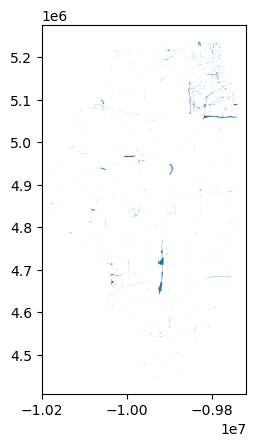

In [93]:
bound_gpd.plot()

In [ ]:
#The Project Boundaries show up a little better than the wetlands, but stil not great due to scale of what we are looking at. I am going to use ArcPro mapping in the PowerPoint presentation for this. 

<Axes: >

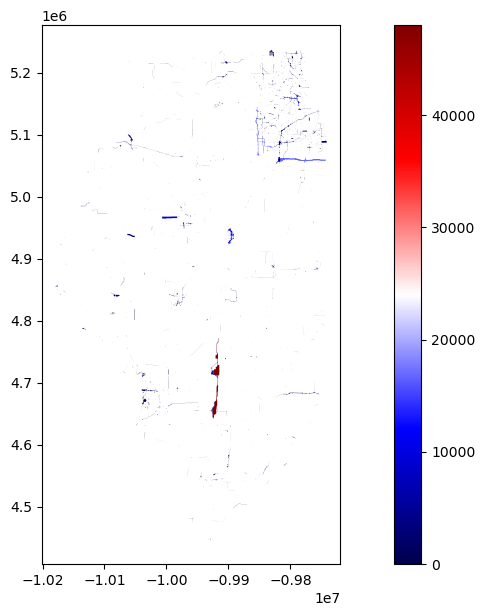

In [94]:
bound_gpd.plot(figsize=(14, 7), column='Acres_SPE', 
           cmap='seismic',legend='true')

In [98]:
print ( ‘In retrospect, it would have been better for a class project to focus on a smaller area but I really wanted to do something that was directly connected to information that is useful for where we are in the process of developing a state wetland inventory. In conclusion, there ended up being a lot of prep work outside of Jupyter Notebooks to get the data in suitable form for use. Digging into multi-decades worth of data enables a more realistic view of what it takes to clean and package necessary for big data analyses. Having a variety of tools such as an access database, GIS, and even finding out that some data is still only in paper form is likely not uncommon for biological surveys in a state survey that has long-term research that pre-dates the common use of digital data. However, these analyses provided valuable time for exploring the data as well as insights into what might be useful and available for machine learning model training and validation in support of Illinois state wetland mapping.’ )

SyntaxError: invalid character in identifier (3446999512.py, line 1)

In [ ]:
#Well, there certainly is a lot more data in the tables that can be queried. Thanks for walking through my project!!!!